In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
train=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Train.csv")
test=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
print(train.shape)
print(test.shape)

(7000, 24)
(3000, 23)


In [268]:
#combining both train and test for common data cleaning
train['train/test']=1
test['train/test']=0
df1=pd.concat([train,test],axis=0)
df=df1.drop(columns=['Employee_ID'],axis=1)   #as employee_id is having completely unique values, we are dropping it.
df.shape

C:\sajan\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


(10000, 24)

In [269]:
df.head()

Age  Attrition_rate Compensation_and_Benefits Decision_skill_possess  \
0  42.0          0.1841                     type2             Conceptual   
1  24.0          0.0670                     type2             Analytical   
2  58.0          0.0851                     type2             Conceptual   
3  26.0          0.0668                     type2             Behavioral   
4  31.0          0.1827                     type3             Conceptual   

   Education_Level Gender     Hometown  Pay_Scale  Post_Level  \
0                4      F     Franklin        7.0           1   
1                3      M  Springfield        6.0           3   
2                3      F      Clinton        8.0           2   
3                3      F      Lebanon        8.0           3   
4                1      F  Springfield        2.0           3   

  Relationship_Status  ...  VAR1    VAR2    VAR3 VAR4  VAR5  VAR6  VAR7  \
0             Married  ...     4  0.7516  1.8688  2.0     4     5     3   
1              Single  ...     3 -0.9612 -0.4537  2.0     3     5     3   
2             Married  ...     4 -0.9612 -0.4537  3.0     3     8     3   
3              Single  ...     3 -1.8176 -0.4537  NaN     3     7     3   
4             Married  ...     1  0.7516 -0.4537  2.0     2     8     2   

   Work_Life_balance  growth_rate  train/test  
0                3.0           33           1  
1                4.0           36           1  
2                1.0           51           1  
3                1.0           56           1  
4                3.0           62           1  

[5 rows x 24 columns]

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 24 columns):
Age                          9427 non-null float64
Attrition_rate               7000 non-null float64
Compensation_and_Benefits    10000 non-null object
Decision_skill_possess       10000 non-null object
Education_Level              10000 non-null int64
Gender                       10000 non-null object
Hometown                     10000 non-null object
Pay_Scale                    9988 non-null float64
Post_Level                   10000 non-null int64
Relationship_Status          10000 non-null object
Time_of_service              9804 non-null float64
Time_since_promotion         10000 non-null int64
Travel_Rate                  10000 non-null int64
Unit                         10000 non-null object
VAR1                         10000 non-null int64
VAR2                         9206 non-null float64
VAR3                         10000 non-null float64
VAR4                         

# checking null values

In [271]:
pd.DataFrame(df.isnull().sum()*100/df.shape[0],columns=['percentage_null_values'] )

percentage_null_values
Age                                          5.73
Attrition_rate                              30.00
Compensation_and_Benefits                    0.00
Decision_skill_possess                       0.00
Education_Level                              0.00
Gender                                       0.00
Hometown                                     0.00
Pay_Scale                                    0.12
Post_Level                                   0.00
Relationship_Status                          0.00
Time_of_service                              1.96
Time_since_promotion                         0.00
Travel_Rate                                  0.00
Unit                                         0.00
VAR1                                         0.00
VAR2                                         7.94
VAR3                                         0.00
VAR4                                         9.54
VAR5                                         0.00
VAR6                                         0.00
VAR7                                         0.00
Work_Life_balance                            0.16
growth_rate                                  0.00
train/test                                   0.00

### 1- AGE

C:\sajan\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\sajan\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


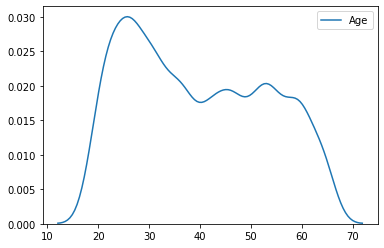

In [272]:
sns.kdeplot(df['Age'])

In [273]:
#we shall impute the null value in "age" feature with its median.
df['Age']=df['Age'].fillna(df['Age'].median())

### 2- Pay_Scale
we cant fill the null values of "pay_scale" feature with mode as it doesnt make sense.
Hence we shall falg it.

In [274]:
df['Pay_Scale'].value_counts(normalize=True)*100

8.0     19.663596
6.0     18.221866
5.0     16.419704
4.0     14.066880
7.0     11.643973
9.0      7.038446
2.0      3.834602
3.0      3.664397
10.0     3.143773
1.0      2.302763
Name: Pay_Scale, dtype: float64

In [275]:
df['Pay_Scale']=df['Pay_Scale'].fillna(0)

### 3 - Time_of_service

In [276]:
df['Time_of_service'].nunique()

44

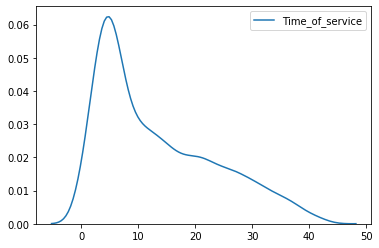

In [277]:
sns.kdeplot(df['Time_of_service'])

In [278]:
# we shall impute with median
df['Time_of_service']=df['Time_of_service'].fillna(df['Time_of_service'].median())

### 4 - VAR2

In [279]:
df['VAR2'].nunique()

5

In [280]:
df['VAR2'].value_counts(normalize=True)*100

 0.7516    38.909407
-0.1048    24.853357
-0.9612    15.956985
-1.8176    12.741690
 1.6081     7.538562
Name: VAR2, dtype: float64

In [281]:
# we shall flag the missing value rather than imputing with mode
df['VAR2']=df['VAR2'].fillna('miss_value')

### 5- VAR5

In [282]:
df['VAR5'].nunique()

5

In [283]:
df['VAR4'].value_counts(normalize=True)*100

2.0    70.406810
1.0    19.997789
3.0     9.595401
Name: VAR4, dtype: float64

In [284]:
# we shall flag the missing value rather than imputing with mode
df['VAR4']=df['VAR4'].fillna('miss_value')

### 6- Work_Life_balance

In [285]:
df['Work_Life_balance'].nunique()

5

In [286]:
df['Work_Life_balance'].value_counts(normalize=True)*100

1.0    29.557292
3.0    28.625801
2.0    22.906651
4.0    17.217548
5.0     1.692708
Name: Work_Life_balance, dtype: float64

In [287]:
# we shall flag the missing value rather than imputing with mode
df['Work_Life_balance']=df['Work_Life_balance'].fillna(-1)

In [288]:
# target feature shows missing values as we have combined both our train and test dataset. we shall ignore it now.

# Converting the datatype of the features as per the data inside it

In [289]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print(df[i].dtype)
    print(df[i].value_counts(normalize=True),'\n')

Age
47
float64
38.0    0.0708
22.0    0.0347
27.0    0.0336
25.0    0.0320
26.0    0.0305
54.0    0.0304
37.0    0.0302
60.0    0.0300
52.0    0.0299
35.0    0.0288
30.0    0.0286
31.0    0.0283
28.0    0.0277
42.0    0.0277
45.0    0.0274
32.0    0.0270
47.0    0.0270
24.0    0.0264
21.0    0.0242
19.0    0.0213
65.0    0.0213
23.0    0.0208
59.0    0.0194
20.0    0.0176
58.0    0.0170
50.0    0.0156
29.0    0.0154
33.0    0.0145
51.0    0.0142
41.0    0.0141
34.0    0.0140
56.0    0.0140
36.0    0.0138
49.0    0.0137
43.0    0.0137
57.0    0.0136
55.0    0.0135
53.0    0.0133
46.0    0.0132
64.0    0.0125
44.0    0.0123
40.0    0.0123
48.0    0.0122
39.0    0.0120
63.0    0.0103
62.0    0.0101
61.0    0.0091
Name: Age, dtype: float64 

Attrition_rate
3317
float64
0.1042    0.001429
0.1294    0.001286
0.0312    0.001286
0.1506    0.001143
0.0015    0.001143
0.0370    0.001143
0.1500    0.001143
0.1153    0.001000
0.1125    0.001000
0.0482    0.001000
0.0366    0.001000
0.0293    0.001

In [290]:
df[["Education_Level",'Post_Level','Time_since_promotion','Travel_Rate','VAR1','VAR3','VAR5','VAR6',"VAR7"]] = df[["Education_Level",'Post_Level','Time_since_promotion','Travel_Rate','VAR1','VAR3','VAR5','VAR6',"VAR7"]].astype('object')

# Exploratory Data Analysis

### univariate Analysis

Age


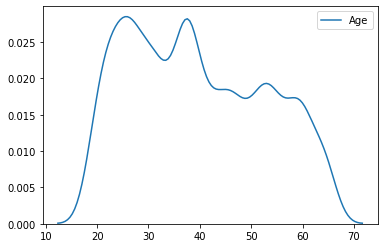

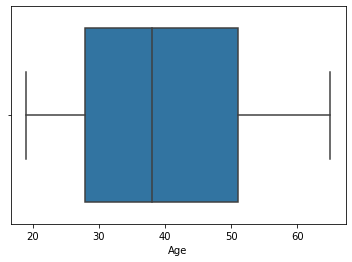

Attrition_rate


C:\sajan\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\sajan\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


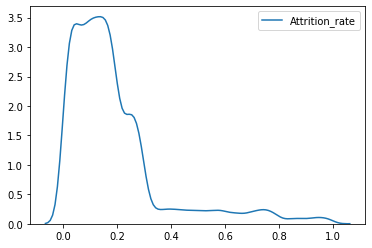

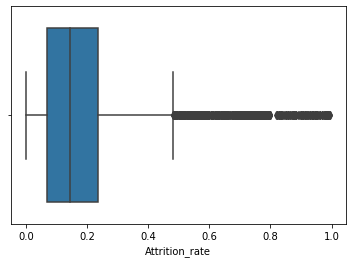

Pay_Scale


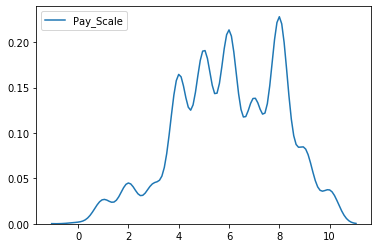

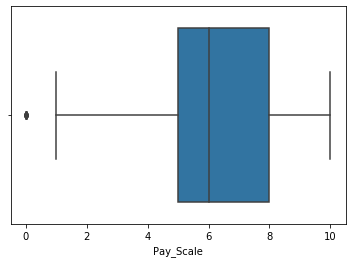

Time_of_service


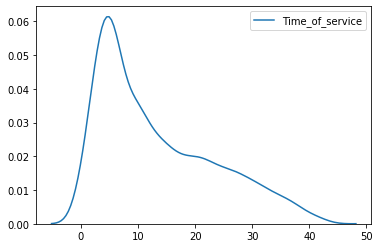

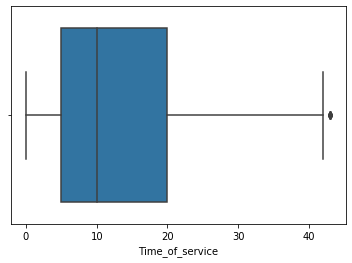

Work_Life_balance


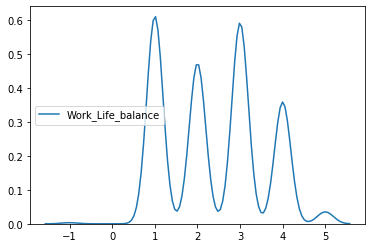

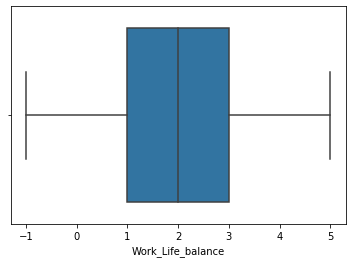

growth_rate


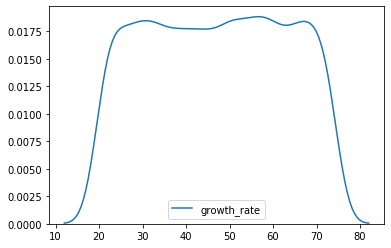

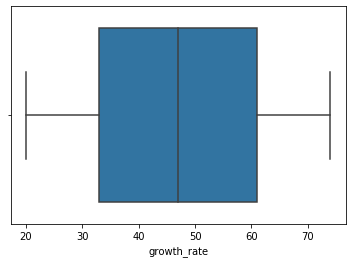

train/test


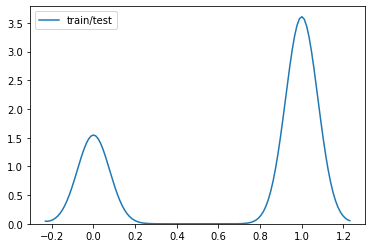

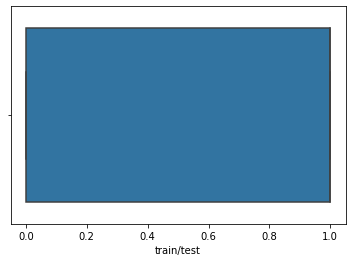

In [291]:
for i in df.select_dtypes(exclude=['object']):
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()

### categorical columns

Compensation_and_Benefits


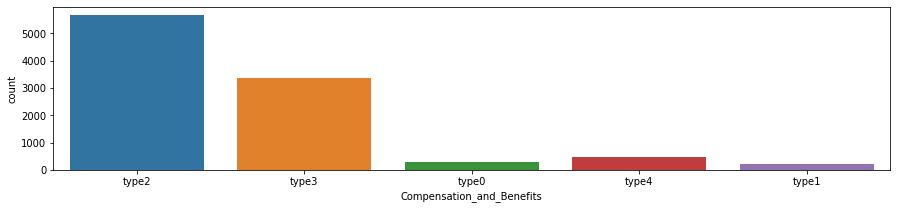

Decision_skill_possess


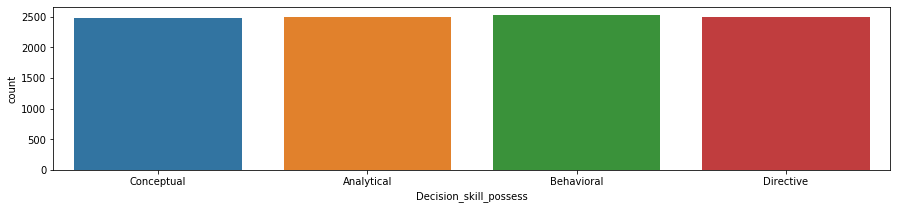

Education_Level


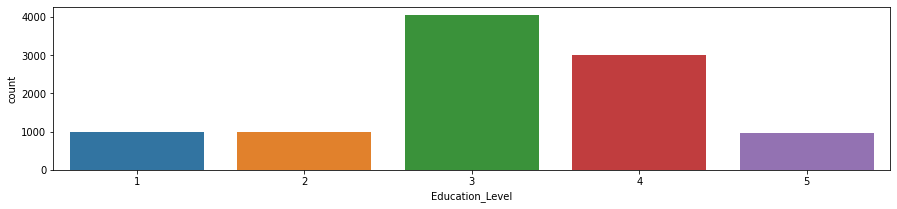

Gender


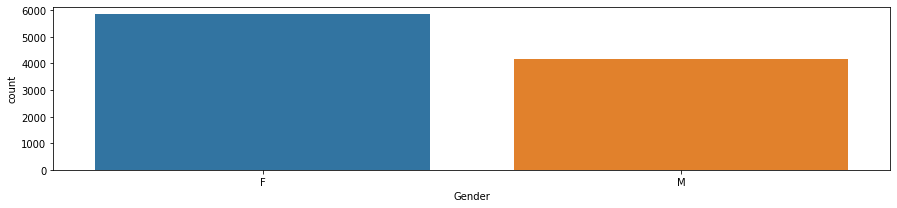

Hometown


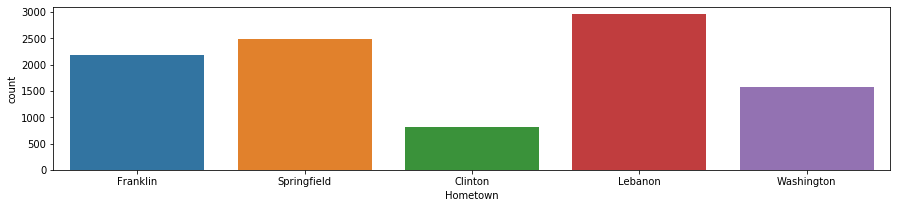

Post_Level


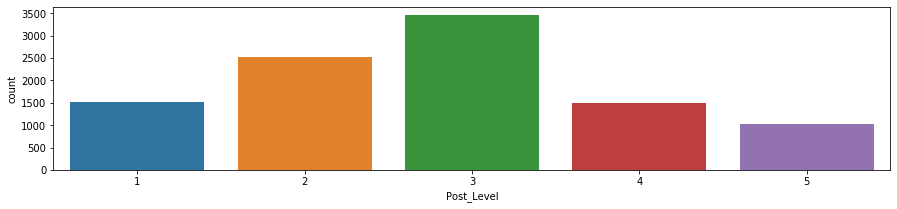

Relationship_Status


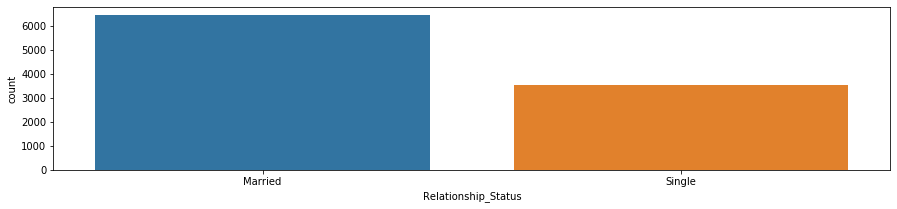

Time_since_promotion


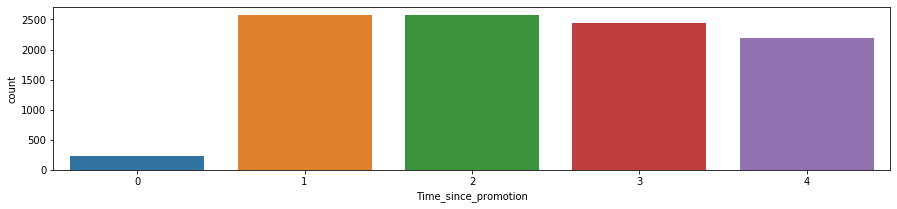

Travel_Rate


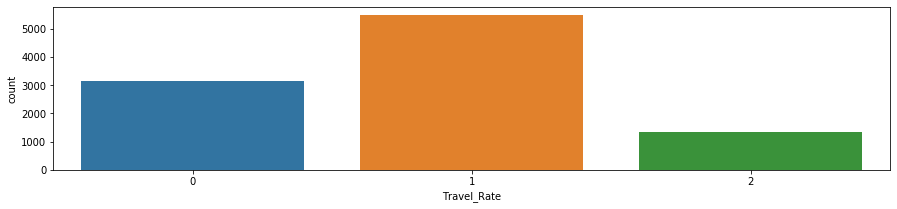

Unit


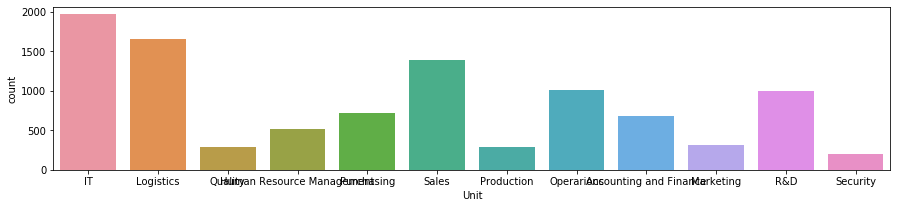

VAR1


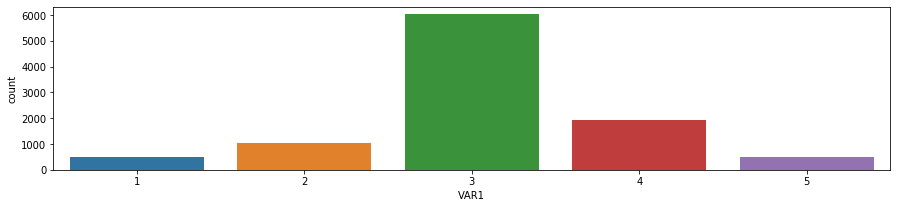

VAR2


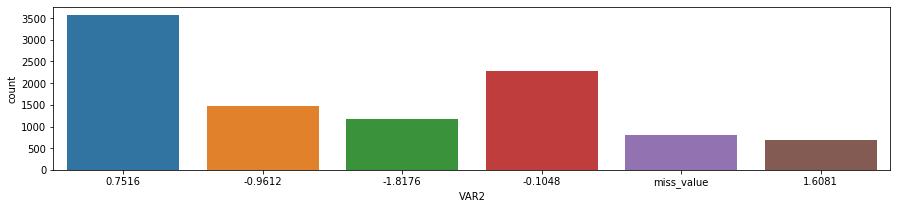

VAR3


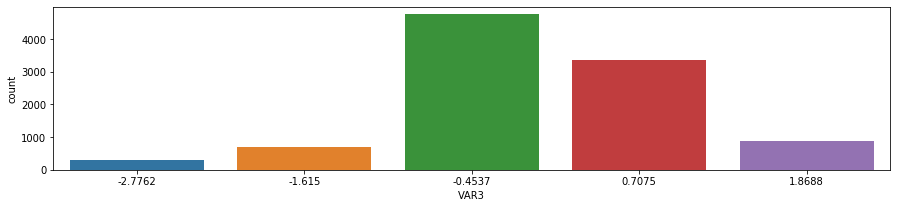

VAR4


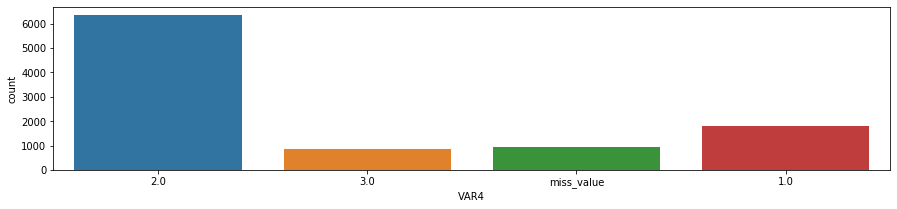

VAR5


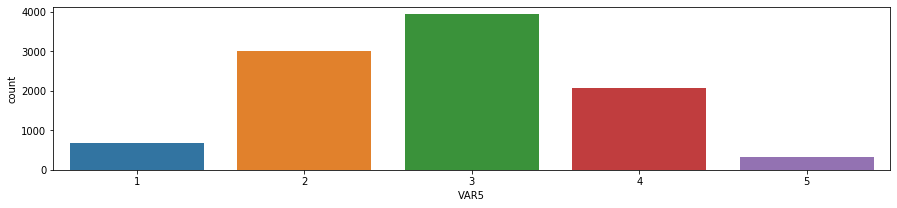

VAR6


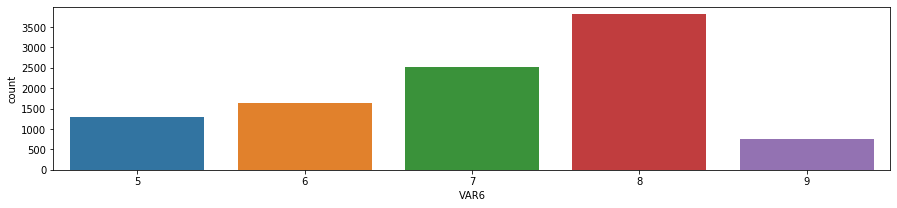

VAR7


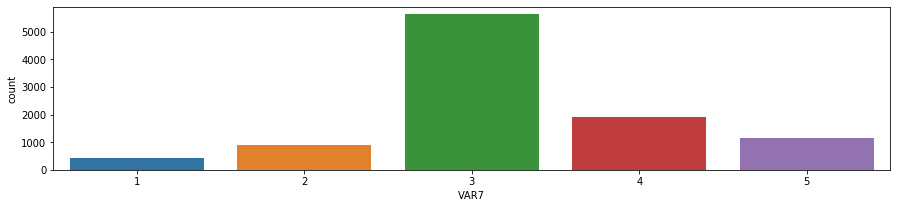

In [292]:
for i in df.select_dtypes(include=['object']):
    print(i)
    plt.figure(figsize=(15,3))
    sns.countplot(x=i,data=df)
    plt.show()

### Numerical features

Compensation_and_Benefits


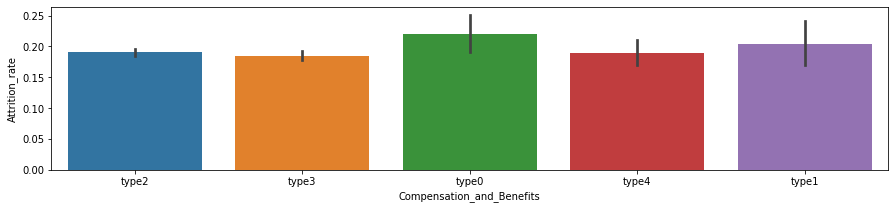

                           Attrition_rate
Compensation_and_Benefits                
type0                            0.219540
type1                            0.203216
type2                            0.190238
type4                            0.189747
type3                            0.184753 

Decision_skill_possess


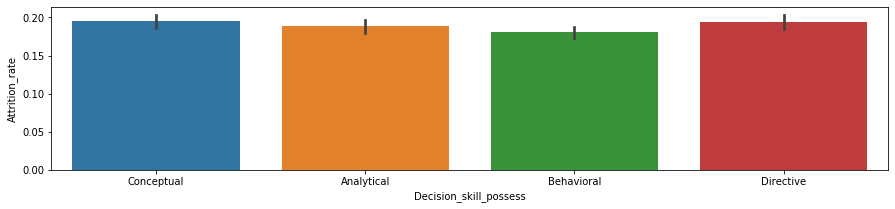

                        Attrition_rate
Decision_skill_possess                
Conceptual                    0.194694
Directive                     0.193772
Analytical                    0.188470
Behavioral                    0.180474 

Education_Level


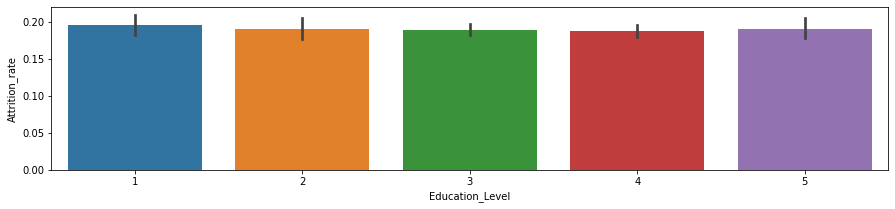

                 Attrition_rate
Education_Level                
1                      0.195189
5                      0.190467
2                      0.190359
3                      0.188861
4                      0.187470 

Gender


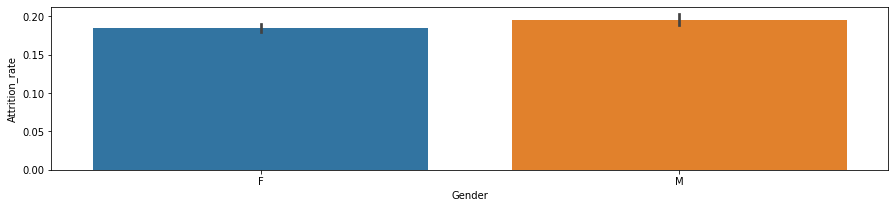

        Attrition_rate
Gender                
M             0.195706
F             0.184936 

Hometown


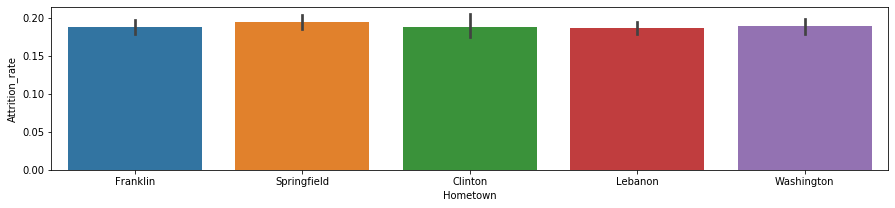

             Attrition_rate
Hometown                   
Springfield        0.194084
Washington         0.188895
Clinton            0.188464
Franklin           0.187901
Lebanon            0.187019 

Post_Level


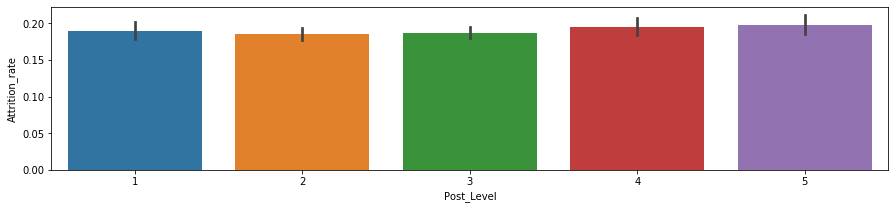

            Attrition_rate
Post_Level                
5                 0.198197
4                 0.195130
1                 0.189832
3                 0.187232
2                 0.185217 

Relationship_Status


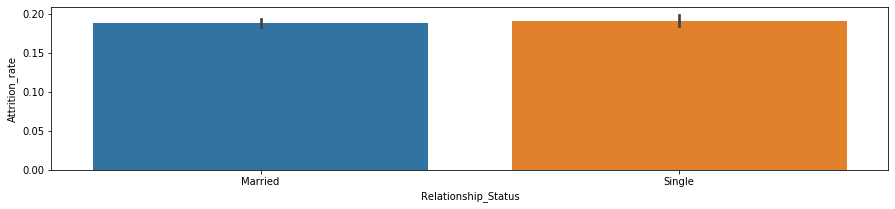

                     Attrition_rate
Relationship_Status                
Single                     0.191660
Married                    0.188123 

Time_since_promotion


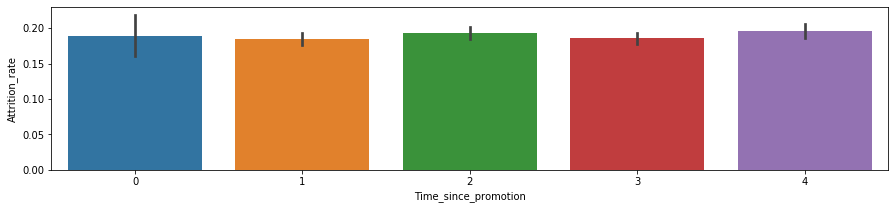

                      Attrition_rate
Time_since_promotion                
4                           0.195506
2                           0.192896
0                           0.188687
3                           0.185435
1                           0.184551 

Travel_Rate


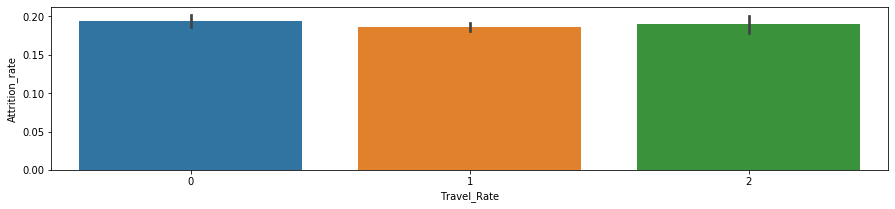

             Attrition_rate
Travel_Rate                
0                  0.194392
2                  0.189936
1                  0.186322 

Unit


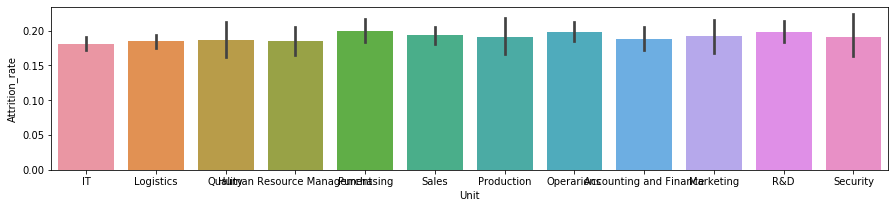

                           Attrition_rate
Unit                                     
Purchasing                       0.199565
Operarions                       0.197777
R&D                              0.197229
Sales                            0.193043
Marketing                        0.191922
Security                         0.190892
Production                       0.190742
Accounting and Finance           0.187362
Quality                          0.185676
Human Resource Management        0.184617
Logistics                        0.184379
IT                               0.180985 

VAR1


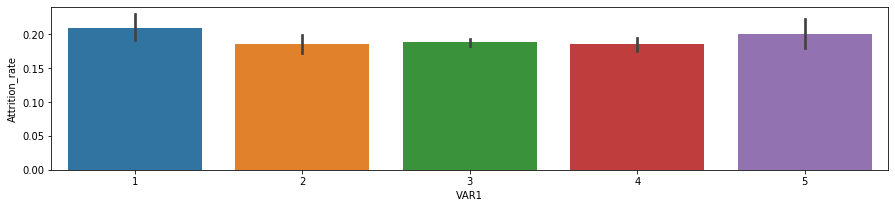

      Attrition_rate
VAR1                
1           0.210123
5           0.201177
3           0.188532
2           0.185756
4           0.185373 

VAR2


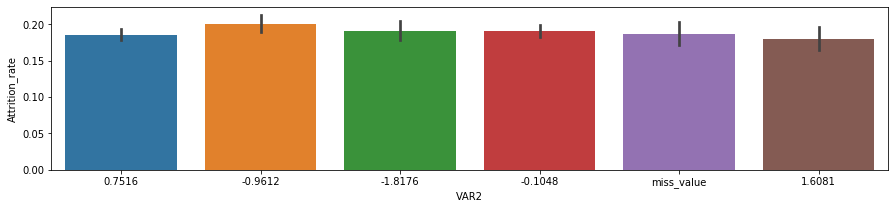

            Attrition_rate
VAR2                      
-0.9612           0.200727
-1.8176           0.191183
-0.1048           0.190488
miss_value        0.186399
0.7516            0.185723
1.6081            0.179917 

VAR3


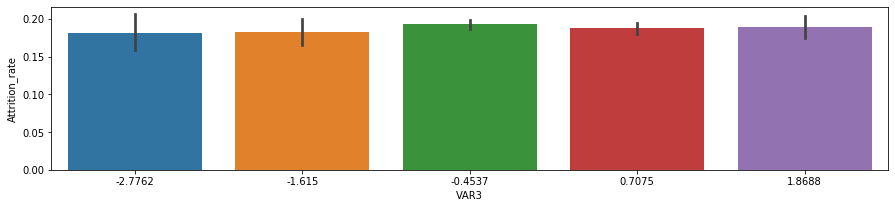

         Attrition_rate
VAR3                   
-0.4537        0.192529
 1.8688        0.188807
 0.7075        0.187246
-1.6150        0.182266
-2.7762        0.180597 

VAR4


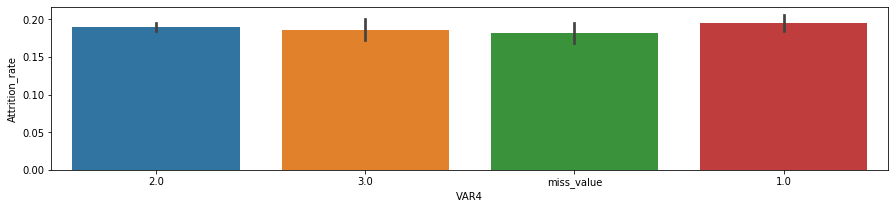

            Attrition_rate
VAR4                      
1.0               0.194880
2.0               0.189302
3.0               0.186325
miss_value        0.181911 

VAR5


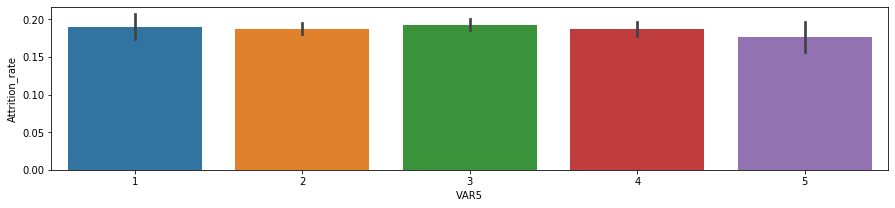

      Attrition_rate
VAR5                
3           0.192985
1           0.189715
2           0.187587
4           0.186926
5           0.176608 

VAR6


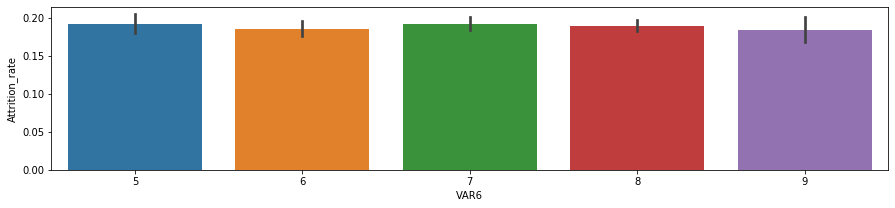

      Attrition_rate
VAR6                
7           0.191837
5           0.191767
8           0.189701
6           0.185582
9           0.183902 

VAR7


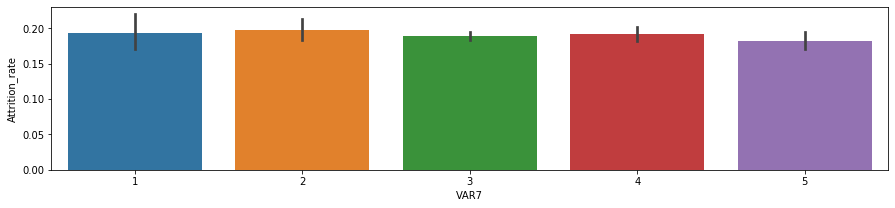

      Attrition_rate
VAR7                
2           0.197934
1           0.193571
4           0.191110
3           0.188765
5           0.181686 



In [293]:
for i in df.select_dtypes(include=['object']):
    print(i)
    plt.figure(figsize=(15,3))
    sns.barplot(x=i,data=df,y='Attrition_rate')
    plt.show()
    print(df.groupby([i]).agg({"Attrition_rate":"mean"}).sort_values(by=['Attrition_rate'],ascending=False),'\n')

### inference:
1) mean attrition rate of group 0 in "compensation_and_benefits"  is very high. we can assume group 0 says about very low compensation and less benefits. mean attrition rate is very less for group 5. hence, we can say group 0 is for entry level and group 5 says about senior level in the organization. 

2) mean attrition_rate of pay_scale group 2,3 etc are high compared to 1. it seems, soon after getting some initial experience people are deciding to switch jobs. this may be due to less compensation or other factors. Interestingly as the pay_scale increases the attrition rate is decreasing. Hence, we can assume people are happy with the work culture. Maybe its the payscale they are not happy with initially.

3) comparitevely male employees are more prone to attrition than females.

4) compared to singles, married people's attrition level is low. as people get married they are looking to get stabilized.

5) attrition level of purchase department is very high compared to other departments. why is it so ??

6) attrition rate of people who gave high rating for work_life_balance seems maximum. this is illogical. Maybe this is due to poor salary/compensation . we need to explore further to get the reality.

# multivariate analysis

###  1 -  "gender" & "relationship_status"   vs  attrition_rate

In [294]:
df.groupby(['Relationship_Status']).agg({"Attrition_rate":"mean"})

Attrition_rate
Relationship_Status                
Married                    0.188123
Single                     0.191660

In [295]:
df.groupby(['Gender']).agg({"Attrition_rate":"mean"})

Attrition_rate
Gender                
F             0.184936
M             0.195706

In [296]:
ms=df[  (df['Gender']=='M')  &  (df['Relationship_Status']=='Single')  ]['Attrition_rate'].mean()
ms

0.19515245901639333

In [297]:
fs=df[  (df['Gender']=='F')  &  (df['Relationship_Status']=='Single')  ]['Attrition_rate'].mean()
fs

0.1891496188496189

In [298]:
mm=df[  (df['Gender']=='M')  &  (df['Relationship_Status']=='Married')  ]['Attrition_rate'].mean()
mm

0.1960167117360738

In [299]:
fm=df[  (df['Gender']=='F')  &  (df['Relationship_Status']=='Married')  ]['Attrition_rate'].mean()
fm

0.18265892923998475

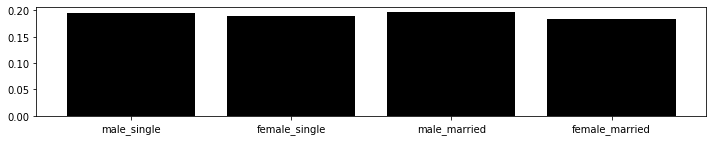

In [300]:
plt.figure(figsize=(12,2))
height = [ms,fs,mm,fm]
bars = ('male_single', 'female_single', 'male_married', 'female_married')
plt.bar(bars,height,color='black')
plt.show()



inference:
    1) we can see men irrespective of the realtionship status, their attrition rate is high. infact, there is a small increase in attrition rate in married men.
    2) where as in female gender, after marriage attrition rate decreases. it shows after marriage female tends to get stabilized.

### 2 -     "work_life_balance"  &  "Compensation_and_benefits"         vs    attrition rate

In [301]:
print(df['Compensation_and_Benefits'].value_counts() )
print(df['Work_Life_balance'].value_counts() )

type2    5686
type3    3346
type4     490
type0     280
type1     198
Name: Compensation_and_Benefits, dtype: int64
 1.0    2951
 3.0    2858
 2.0    2287
 4.0    1719
 5.0     169
-1.0      16
Name: Work_Life_balance, dtype: int64


In [302]:
comp_value=['type0','type1','type2','type3','type4']
work_life_blnc_value=[1,2,3,4,5]
results=[]
for i in comp_value:
    for j in work_life_blnc_value:
        print(i," + ",j)
        print(df[ (df['Compensation_and_Benefits']==i)  &   (df['Work_Life_balance']==j)  ]['Attrition_rate'].mean(),'\n')
        results.append(df[ (df['Compensation_and_Benefits']==i)  &   (df['Work_Life_balance']==j)  ]['Attrition_rate'].mean())

type0  +  1
0.21751636363636365 

type0  +  2
0.23193513513513517 

type0  +  3
0.23791538461538467 

type0  +  4
0.1777384615384615 

type0  +  5
0.4513 

type1  +  1
0.2411390243902439 

type1  +  2
0.20709999999999998 

type1  +  3
0.17439000000000002 

type1  +  4
0.20302631578947372 

type1  +  5
0.0755 

type2  +  1
0.1803022084805655 

type2  +  2
0.19519236812570154 

type2  +  3
0.19660102389078482 

type2  +  4
0.1909282317979198 

type2  +  5
0.1746154929577465 

type3  +  1
0.17679167862266854 

type3  +  2
0.1888662068965516 

type3  +  3
0.1843274096385542 

type3  +  4
0.1904380835380833 

type3  +  5
0.2281032258064516 

type4  +  1
0.1947632478632478 

type4  +  2
0.15202307692307687 

type4  +  3
0.19041157894736843 

type4  +  4
0.2182033898305085 

type4  +  5
0.343125 



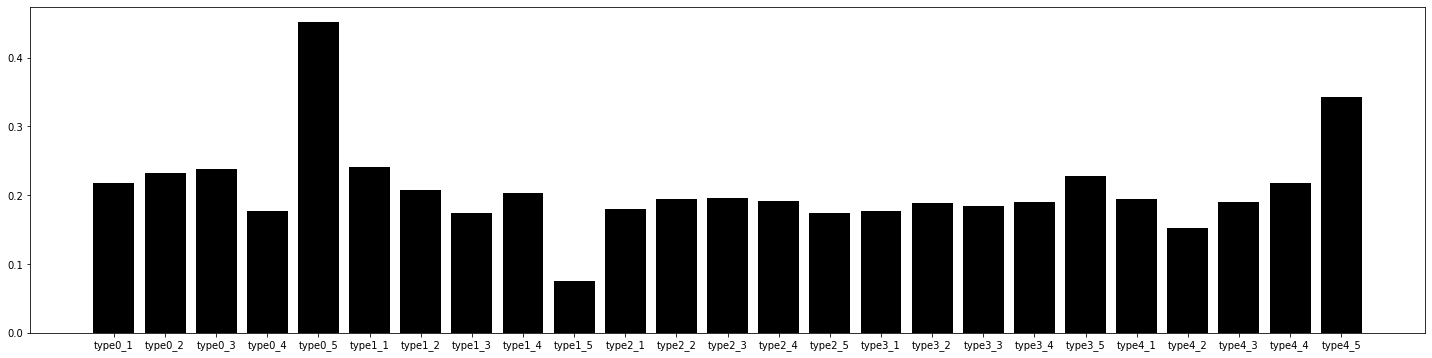

In [303]:
comp_value=['type0','type1','type2','type3','type4']
work_life_blnc_value=[1,2,3,4,5]
bars = []
for i in comp_value:
    for j in work_life_blnc_value:
        bars.append((i+"_"+str(j)))

plt.figure(figsize=(25,6))
height = results

plt.bar(bars,height,color='black')
plt.show()

inference:
    1) we have clubbed 'compensation_benefits' groups with "work_life_balance" to check whether people are going off because they are receiving unsatisfactory compensation&benefits. we cans ee even though few groups are getting very good work_life_balance, their attrition level are high. this means, only providing a good work_life_balance without proper compensations or benefits wont make their employee stick to the company.
    2) interestingly attrition rate of groups having best compensation & benefits with excellent work_life_balance are higher.this validates our assumption above. hence, we can say a good work_life_balance alone cant make a employee stay in a company.

### 3    -    'payscale'   &  "worklife balance"    vs  "attrition rate"

In [304]:
print(df['Pay_Scale'].value_counts() )
print(df['Work_Life_balance'].value_counts() )

8.0     1964
6.0     1820
5.0     1640
4.0     1405
7.0     1163
9.0      703
2.0      383
3.0      366
10.0     314
1.0      230
0.0       12
Name: Pay_Scale, dtype: int64
 1.0    2951
 3.0    2858
 2.0    2287
 4.0    1719
 5.0     169
-1.0      16
Name: Work_Life_balance, dtype: int64


In [305]:
payscale_value=[1,2,3,4,5,6,7,8,9,10]
work_life_blnc_value=[1,2,3,4,5]
results=[]
for i in payscale_value:
    for j in work_life_blnc_value:
        print(i," + ",j)
        print(df[ (df['Pay_Scale']==i)  &   (df['Work_Life_balance']==j)  ]['Attrition_rate'].mean(),'\n')
        results.append(df[ (df['Pay_Scale']==i)  &   (df['Work_Life_balance']==j)  ]['Attrition_rate'].mean())

1  +  1
0.1845152173913044 

1  +  2
0.13504545454545455 

1  +  3
0.16002222222222226 

1  +  4
0.21238965517241382 

1  +  5
0.3197666666666667 

2  +  1
0.19641898734177216 

2  +  2
0.18701044776119405 

2  +  3
0.2063506666666666 

2  +  4
0.19577083333333342 

2  +  5
0.17694285714285712 

3  +  1
0.18121746031746036 

3  +  2
0.22009661016949147 

3  +  3
0.22239480519480517 

3  +  4
0.17646 

3  +  5
0.45502000000000004 

4  +  1
0.18285584905660374 

4  +  2
0.20386400000000005 

4  +  3
0.20051843003412984 

4  +  4
0.1834701657458564 

4  +  5
0.17195555555555556 

5  +  1
0.17913174157303385 

5  +  2
0.2094735507246377 

5  +  3
0.18658627450980397 

5  +  4
0.1976700000000001 

5  +  5
0.1510181818181818 

6  +  1
0.1839846368715086 

6  +  2
0.17744403973509942 

6  +  3
0.18876159999999992 

6  +  4
0.19827500000000006 

6  +  5
0.24667916666666667 

7  +  1
0.19078565891472862 

7  +  2
0.16707783783783792 

7  +  3
0.19393096234309615 

7  +  4
0.21647288135593223 



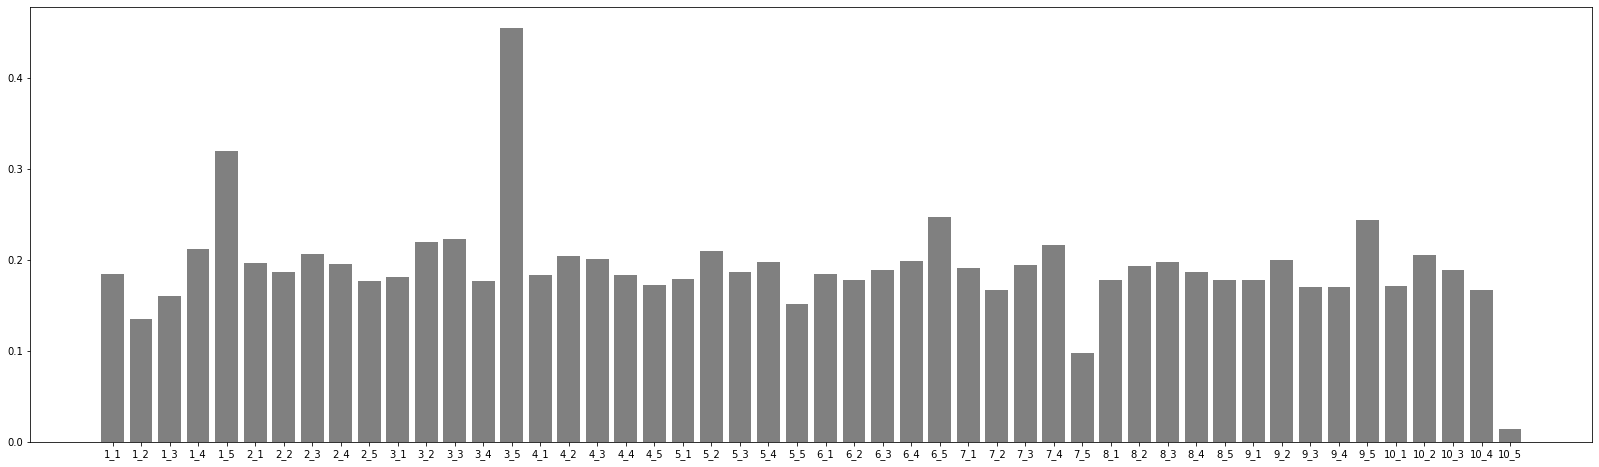

In [306]:
payscale_value=[1,2,3,4,5,6,7,8,9,10]
work_life_blnc_value=[1,2,3,4,5]
bars = []
for i in payscale_value:
    for j in work_life_blnc_value:
        bars.append(str(i)+"_"+str(j))

plt.figure(figsize=(28,8))
height = results

plt.bar(bars,height,color='grey')
plt.show()

inference:
    1)we couldn't see any obvious relationship between payscale,work_life_balance and attrition rate.
    2) attrition level of the people with good payscale and good work_life_balance are similiar to people with low payscale and low work_life_balance.

# Label Encoding/ dummies

In [307]:
for i in df.columns:
    print(i)
    print(df[i].dtype)
    print(df[i].nunique())
    print()

Age
float64
47

Attrition_rate
float64
3317

Compensation_and_Benefits
object
5

Decision_skill_possess
object
4

Education_Level
object
5

Gender
object
2

Hometown
object
5

Pay_Scale
float64
11

Post_Level
object
5

Relationship_Status
object
2

Time_of_service
float64
44

Time_since_promotion
object
5

Travel_Rate
object
3

Unit
object
12

VAR1
object
5

VAR2
object
6

VAR3
object
5

VAR4
object
4

VAR5
object
5

VAR6
object
5

VAR7
object
5

Work_Life_balance
float64
6

growth_rate
int64
55

train/test
int64
2



In [ ]:
#making a new copy of the dataframe for trying different 

In [353]:
df1=df.copy()

In [354]:
le=['Compensation_and_Benefits',"Pay_Scale","Unit",'Work_Life_balance']
dummy=['Decision_skill_possess','Education_Level','Gender','Hometown','Post_Level','Relationship_Status'
      'Time_since_promotion','Travel_Rate',"VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"]

In [355]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le=LabelEncoder()
df1['Compensation_and_Benefits']=le.fit_transform(df1['Compensation_and_Benefits'])
le=LabelEncoder()
df1["Pay_Scale"]=le.fit_transform(df1["Pay_Scale"])
le=LabelEncoder()
df1["Unit"]=le.fit_transform(df1["Unit"])
le=LabelEncoder()
df1['Work_Life_balance']=le.fit_transform(df1['Work_Life_balance'])


In [356]:
df1=pd.get_dummies(data=df1,columns=['Decision_skill_possess','Education_Level','Gender','Hometown','Post_Level','Relationship_Status',
      'Time_since_promotion','Travel_Rate',"VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7"],drop_first=True)

# Base Modelling 

In [357]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 58)
y_train shape is  (7000,)
x_test shape is  (3000, 58)


lr:-0.186223 (0.000092)
knn:-0.200645 (0.000068)
rf:-0.189213 (0.000121)
rf_boost:-0.201087 (0.000103)
gboost:-0.186944 (0.000139)
Learning rate set to 0.054161
0:	learn: 0.1876376	total: 3.09ms	remaining: 3.09s
1:	learn: 0.1875229	total: 5.92ms	remaining: 2.95s
2:	learn: 0.1874137	total: 8.44ms	remaining: 2.81s
3:	learn: 0.1873075	total: 11.1ms	remaining: 2.77s
4:	learn: 0.1872283	total: 13.8ms	remaining: 2.75s
5:	learn: 0.1871039	total: 16.5ms	remaining: 2.73s
6:	learn: 0.1870385	total: 19.1ms	remaining: 2.71s
7:	learn: 0.1868849	total: 21.6ms	remaining: 2.68s
8:	learn: 0.1867738	total: 24.2ms	remaining: 2.66s
9:	learn: 0.1867072	total: 26.9ms	remaining: 2.66s
10:	learn: 0.1865659	total: 29.6ms	remaining: 2.66s
11:	learn: 0.1864450	total: 32.2ms	remaining: 2.65s
12:	learn: 0.1863401	total: 34.8ms	remaining: 2.65s
13:	learn: 0.1862032	total: 37.5ms	remaining: 2.64s
14:	learn: 0.1861334	total: 40.1ms	remaining: 2.63s
15:	learn: 0.1860042	total: 43.1ms	remaining: 2.65s
16:	learn: 0.1859

184:	learn: 0.1714787	total: 495ms	remaining: 2.18s
185:	learn: 0.1714069	total: 499ms	remaining: 2.18s
186:	learn: 0.1713596	total: 502ms	remaining: 2.18s
187:	learn: 0.1712878	total: 505ms	remaining: 2.18s
188:	learn: 0.1711410	total: 508ms	remaining: 2.18s
189:	learn: 0.1710701	total: 511ms	remaining: 2.18s
190:	learn: 0.1709890	total: 514ms	remaining: 2.18s
191:	learn: 0.1709038	total: 521ms	remaining: 2.19s
192:	learn: 0.1708256	total: 524ms	remaining: 2.19s
193:	learn: 0.1707901	total: 527ms	remaining: 2.19s
194:	learn: 0.1706673	total: 530ms	remaining: 2.19s
195:	learn: 0.1706026	total: 533ms	remaining: 2.18s
196:	learn: 0.1705223	total: 535ms	remaining: 2.18s
197:	learn: 0.1704585	total: 538ms	remaining: 2.18s
198:	learn: 0.1703870	total: 541ms	remaining: 2.18s
199:	learn: 0.1703261	total: 543ms	remaining: 2.17s
200:	learn: 0.1702328	total: 546ms	remaining: 2.17s
201:	learn: 0.1701794	total: 549ms	remaining: 2.17s
202:	learn: 0.1700810	total: 552ms	remaining: 2.17s
203:	learn: 

370:	learn: 0.1561496	total: 1s	remaining: 1.7s
371:	learn: 0.1560943	total: 1s	remaining: 1.69s
372:	learn: 0.1560290	total: 1.01s	remaining: 1.69s
373:	learn: 0.1559351	total: 1.01s	remaining: 1.69s
374:	learn: 0.1558605	total: 1.01s	remaining: 1.69s
375:	learn: 0.1557940	total: 1.01s	remaining: 1.68s
376:	learn: 0.1557493	total: 1.02s	remaining: 1.68s
377:	learn: 0.1556796	total: 1.02s	remaining: 1.68s
378:	learn: 0.1555981	total: 1.02s	remaining: 1.68s
379:	learn: 0.1555424	total: 1.02s	remaining: 1.67s
380:	learn: 0.1554429	total: 1.03s	remaining: 1.67s
381:	learn: 0.1553624	total: 1.03s	remaining: 1.67s
382:	learn: 0.1552797	total: 1.03s	remaining: 1.66s
383:	learn: 0.1552409	total: 1.04s	remaining: 1.66s
384:	learn: 0.1551336	total: 1.04s	remaining: 1.66s
385:	learn: 0.1550627	total: 1.04s	remaining: 1.66s
386:	learn: 0.1549840	total: 1.04s	remaining: 1.65s
387:	learn: 0.1548987	total: 1.05s	remaining: 1.65s
388:	learn: 0.1548348	total: 1.05s	remaining: 1.65s
389:	learn: 0.15476

558:	learn: 0.1433452	total: 1.51s	remaining: 1.19s
559:	learn: 0.1432511	total: 1.51s	remaining: 1.19s
560:	learn: 0.1431940	total: 1.51s	remaining: 1.18s
561:	learn: 0.1431111	total: 1.51s	remaining: 1.18s
562:	learn: 0.1430497	total: 1.52s	remaining: 1.18s
563:	learn: 0.1429699	total: 1.52s	remaining: 1.18s
564:	learn: 0.1428704	total: 1.52s	remaining: 1.17s
565:	learn: 0.1428202	total: 1.52s	remaining: 1.17s
566:	learn: 0.1427345	total: 1.53s	remaining: 1.17s
567:	learn: 0.1426442	total: 1.53s	remaining: 1.16s
568:	learn: 0.1425683	total: 1.53s	remaining: 1.16s
569:	learn: 0.1425014	total: 1.54s	remaining: 1.16s
570:	learn: 0.1424247	total: 1.54s	remaining: 1.16s
571:	learn: 0.1424014	total: 1.54s	remaining: 1.15s
572:	learn: 0.1423520	total: 1.54s	remaining: 1.15s
573:	learn: 0.1422754	total: 1.55s	remaining: 1.15s
574:	learn: 0.1422363	total: 1.55s	remaining: 1.15s
575:	learn: 0.1421639	total: 1.55s	remaining: 1.14s
576:	learn: 0.1421259	total: 1.55s	remaining: 1.14s
577:	learn: 

756:	learn: 0.1318843	total: 2.03s	remaining: 653ms
757:	learn: 0.1317979	total: 2.04s	remaining: 650ms
758:	learn: 0.1317216	total: 2.04s	remaining: 647ms
759:	learn: 0.1316513	total: 2.04s	remaining: 645ms
760:	learn: 0.1316132	total: 2.04s	remaining: 642ms
761:	learn: 0.1315645	total: 2.05s	remaining: 639ms
762:	learn: 0.1315210	total: 2.05s	remaining: 637ms
763:	learn: 0.1314754	total: 2.05s	remaining: 634ms
764:	learn: 0.1314024	total: 2.06s	remaining: 631ms
765:	learn: 0.1313657	total: 2.06s	remaining: 629ms
766:	learn: 0.1313139	total: 2.06s	remaining: 626ms
767:	learn: 0.1312759	total: 2.06s	remaining: 623ms
768:	learn: 0.1312274	total: 2.07s	remaining: 621ms
769:	learn: 0.1311943	total: 2.07s	remaining: 618ms
770:	learn: 0.1311532	total: 2.07s	remaining: 615ms
771:	learn: 0.1310586	total: 2.07s	remaining: 613ms
772:	learn: 0.1310183	total: 2.08s	remaining: 610ms
773:	learn: 0.1309383	total: 2.08s	remaining: 607ms
774:	learn: 0.1308874	total: 2.08s	remaining: 605ms
775:	learn: 

941:	learn: 0.1219583	total: 2.53s	remaining: 156ms
942:	learn: 0.1219092	total: 2.54s	remaining: 153ms
943:	learn: 0.1218764	total: 2.54s	remaining: 151ms
944:	learn: 0.1218508	total: 2.54s	remaining: 148ms
945:	learn: 0.1218218	total: 2.54s	remaining: 145ms
946:	learn: 0.1217397	total: 2.55s	remaining: 143ms
947:	learn: 0.1217030	total: 2.55s	remaining: 140ms
948:	learn: 0.1216533	total: 2.55s	remaining: 137ms
949:	learn: 0.1215959	total: 2.56s	remaining: 135ms
950:	learn: 0.1215553	total: 2.56s	remaining: 132ms
951:	learn: 0.1214738	total: 2.56s	remaining: 129ms
952:	learn: 0.1214416	total: 2.56s	remaining: 126ms
953:	learn: 0.1213795	total: 2.57s	remaining: 124ms
954:	learn: 0.1213402	total: 2.57s	remaining: 121ms
955:	learn: 0.1212971	total: 2.57s	remaining: 118ms
956:	learn: 0.1212262	total: 2.58s	remaining: 116ms
957:	learn: 0.1211856	total: 2.58s	remaining: 113ms
958:	learn: 0.1211454	total: 2.58s	remaining: 110ms
959:	learn: 0.1210768	total: 2.58s	remaining: 108ms
960:	learn: 

127:	learn: 0.1743750	total: 341ms	remaining: 2.32s
128:	learn: 0.1743143	total: 343ms	remaining: 2.32s
129:	learn: 0.1742464	total: 346ms	remaining: 2.32s
130:	learn: 0.1741366	total: 349ms	remaining: 2.31s
131:	learn: 0.1740611	total: 352ms	remaining: 2.31s
132:	learn: 0.1739884	total: 354ms	remaining: 2.31s
133:	learn: 0.1739175	total: 357ms	remaining: 2.31s
134:	learn: 0.1738350	total: 360ms	remaining: 2.3s
135:	learn: 0.1737540	total: 362ms	remaining: 2.3s
136:	learn: 0.1736482	total: 365ms	remaining: 2.3s
137:	learn: 0.1735758	total: 367ms	remaining: 2.29s
138:	learn: 0.1735033	total: 370ms	remaining: 2.29s
139:	learn: 0.1734012	total: 373ms	remaining: 2.29s
140:	learn: 0.1732804	total: 376ms	remaining: 2.29s
141:	learn: 0.1731646	total: 378ms	remaining: 2.29s
142:	learn: 0.1731148	total: 381ms	remaining: 2.28s
143:	learn: 0.1730335	total: 383ms	remaining: 2.28s
144:	learn: 0.1729340	total: 386ms	remaining: 2.28s
145:	learn: 0.1728436	total: 389ms	remaining: 2.28s
146:	learn: 0.1

310:	learn: 0.1595732	total: 850ms	remaining: 1.88s
311:	learn: 0.1595448	total: 853ms	remaining: 1.88s
312:	learn: 0.1594095	total: 856ms	remaining: 1.88s
313:	learn: 0.1593329	total: 859ms	remaining: 1.88s
314:	learn: 0.1592453	total: 862ms	remaining: 1.87s
315:	learn: 0.1591440	total: 865ms	remaining: 1.87s
316:	learn: 0.1590881	total: 867ms	remaining: 1.87s
317:	learn: 0.1590303	total: 871ms	remaining: 1.87s
318:	learn: 0.1589543	total: 874ms	remaining: 1.87s
319:	learn: 0.1588956	total: 877ms	remaining: 1.86s
320:	learn: 0.1588465	total: 880ms	remaining: 1.86s
321:	learn: 0.1587520	total: 884ms	remaining: 1.86s
322:	learn: 0.1586613	total: 887ms	remaining: 1.86s
323:	learn: 0.1586051	total: 890ms	remaining: 1.86s
324:	learn: 0.1585123	total: 893ms	remaining: 1.85s
325:	learn: 0.1583825	total: 896ms	remaining: 1.85s
326:	learn: 0.1583248	total: 899ms	remaining: 1.85s
327:	learn: 0.1582670	total: 903ms	remaining: 1.85s
328:	learn: 0.1582066	total: 905ms	remaining: 1.85s
329:	learn: 

484:	learn: 0.1472420	total: 1.35s	remaining: 1.43s
485:	learn: 0.1471970	total: 1.35s	remaining: 1.43s
486:	learn: 0.1471399	total: 1.35s	remaining: 1.43s
487:	learn: 0.1470741	total: 1.36s	remaining: 1.42s
488:	learn: 0.1470119	total: 1.36s	remaining: 1.42s
489:	learn: 0.1469496	total: 1.36s	remaining: 1.42s
490:	learn: 0.1469166	total: 1.36s	remaining: 1.42s
491:	learn: 0.1468511	total: 1.37s	remaining: 1.41s
492:	learn: 0.1467880	total: 1.37s	remaining: 1.41s
493:	learn: 0.1467175	total: 1.37s	remaining: 1.41s
494:	learn: 0.1466457	total: 1.38s	remaining: 1.41s
495:	learn: 0.1465989	total: 1.38s	remaining: 1.4s
496:	learn: 0.1465245	total: 1.38s	remaining: 1.4s
497:	learn: 0.1464774	total: 1.39s	remaining: 1.4s
498:	learn: 0.1464133	total: 1.39s	remaining: 1.39s
499:	learn: 0.1463446	total: 1.39s	remaining: 1.39s
500:	learn: 0.1462687	total: 1.39s	remaining: 1.39s
501:	learn: 0.1462266	total: 1.4s	remaining: 1.39s
502:	learn: 0.1461511	total: 1.4s	remaining: 1.38s
503:	learn: 0.146

660:	learn: 0.1367337	total: 1.85s	remaining: 951ms
661:	learn: 0.1366492	total: 1.86s	remaining: 948ms
662:	learn: 0.1365915	total: 1.86s	remaining: 945ms
663:	learn: 0.1365383	total: 1.86s	remaining: 942ms
664:	learn: 0.1364965	total: 1.86s	remaining: 939ms
665:	learn: 0.1364537	total: 1.87s	remaining: 937ms
666:	learn: 0.1364083	total: 1.87s	remaining: 934ms
667:	learn: 0.1363335	total: 1.87s	remaining: 931ms
668:	learn: 0.1362740	total: 1.88s	remaining: 928ms
669:	learn: 0.1362129	total: 1.88s	remaining: 926ms
670:	learn: 0.1361735	total: 1.88s	remaining: 923ms
671:	learn: 0.1360926	total: 1.88s	remaining: 920ms
672:	learn: 0.1360302	total: 1.89s	remaining: 917ms
673:	learn: 0.1359681	total: 1.89s	remaining: 914ms
674:	learn: 0.1358802	total: 1.89s	remaining: 912ms
675:	learn: 0.1358378	total: 1.9s	remaining: 909ms
676:	learn: 0.1357946	total: 1.9s	remaining: 906ms
677:	learn: 0.1357452	total: 1.9s	remaining: 903ms
678:	learn: 0.1356816	total: 1.9s	remaining: 900ms
679:	learn: 0.13

830:	learn: 0.1273467	total: 2.36s	remaining: 481ms
831:	learn: 0.1273119	total: 2.37s	remaining: 478ms
832:	learn: 0.1272440	total: 2.37s	remaining: 475ms
833:	learn: 0.1271951	total: 2.37s	remaining: 472ms
834:	learn: 0.1271476	total: 2.37s	remaining: 469ms
835:	learn: 0.1271022	total: 2.38s	remaining: 466ms
836:	learn: 0.1270454	total: 2.38s	remaining: 464ms
837:	learn: 0.1269900	total: 2.38s	remaining: 461ms
838:	learn: 0.1269498	total: 2.39s	remaining: 458ms
839:	learn: 0.1268990	total: 2.39s	remaining: 455ms
840:	learn: 0.1268687	total: 2.39s	remaining: 452ms
841:	learn: 0.1267903	total: 2.4s	remaining: 450ms
842:	learn: 0.1267403	total: 2.4s	remaining: 447ms
843:	learn: 0.1267251	total: 2.4s	remaining: 444ms
844:	learn: 0.1266597	total: 2.4s	remaining: 441ms
845:	learn: 0.1266159	total: 2.41s	remaining: 438ms
846:	learn: 0.1265435	total: 2.41s	remaining: 436ms
847:	learn: 0.1264902	total: 2.41s	remaining: 433ms
848:	learn: 0.1264263	total: 2.42s	remaining: 430ms
849:	learn: 0.12

999:	learn: 0.1191164	total: 2.87s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1862444	total: 3.11ms	remaining: 3.1s
1:	learn: 0.1861001	total: 5.73ms	remaining: 2.86s
2:	learn: 0.1859731	total: 8.4ms	remaining: 2.79s
3:	learn: 0.1858997	total: 11.1ms	remaining: 2.75s
4:	learn: 0.1858059	total: 13.7ms	remaining: 2.73s
5:	learn: 0.1857017	total: 16.4ms	remaining: 2.71s
6:	learn: 0.1856066	total: 19.3ms	remaining: 2.73s
7:	learn: 0.1854536	total: 21.8ms	remaining: 2.7s
8:	learn: 0.1853426	total: 24.5ms	remaining: 2.7s
9:	learn: 0.1851951	total: 27ms	remaining: 2.67s
10:	learn: 0.1851060	total: 29.9ms	remaining: 2.69s
11:	learn: 0.1849862	total: 32.5ms	remaining: 2.68s
12:	learn: 0.1848816	total: 35.2ms	remaining: 2.67s
13:	learn: 0.1847904	total: 37.9ms	remaining: 2.67s
14:	learn: 0.1846855	total: 40.4ms	remaining: 2.65s
15:	learn: 0.1845893	total: 43ms	remaining: 2.65s
16:	learn: 0.1844893	total: 45.7ms	remaining: 2.64s
17:	learn: 0.1843962	total: 48.3ms	remaining: 2.63s
18

205:	learn: 0.1681271	total: 619ms	remaining: 2.39s
206:	learn: 0.1680641	total: 622ms	remaining: 2.38s
207:	learn: 0.1679540	total: 625ms	remaining: 2.38s
208:	learn: 0.1678790	total: 628ms	remaining: 2.38s
209:	learn: 0.1678215	total: 630ms	remaining: 2.37s
210:	learn: 0.1677130	total: 633ms	remaining: 2.37s
211:	learn: 0.1676402	total: 636ms	remaining: 2.36s
212:	learn: 0.1675525	total: 638ms	remaining: 2.36s
213:	learn: 0.1674495	total: 641ms	remaining: 2.35s
214:	learn: 0.1673327	total: 644ms	remaining: 2.35s
215:	learn: 0.1672064	total: 647ms	remaining: 2.35s
216:	learn: 0.1671341	total: 650ms	remaining: 2.35s
217:	learn: 0.1670200	total: 653ms	remaining: 2.34s
218:	learn: 0.1669337	total: 656ms	remaining: 2.34s
219:	learn: 0.1668832	total: 659ms	remaining: 2.33s
220:	learn: 0.1668113	total: 661ms	remaining: 2.33s
221:	learn: 0.1667262	total: 664ms	remaining: 2.33s
222:	learn: 0.1665786	total: 667ms	remaining: 2.32s
223:	learn: 0.1664653	total: 670ms	remaining: 2.32s
224:	learn: 

393:	learn: 0.1538405	total: 1.13s	remaining: 1.74s
394:	learn: 0.1537802	total: 1.13s	remaining: 1.73s
395:	learn: 0.1537388	total: 1.13s	remaining: 1.73s
396:	learn: 0.1536615	total: 1.14s	remaining: 1.73s
397:	learn: 0.1536027	total: 1.14s	remaining: 1.72s
398:	learn: 0.1535380	total: 1.14s	remaining: 1.72s
399:	learn: 0.1534427	total: 1.15s	remaining: 1.72s
400:	learn: 0.1533608	total: 1.15s	remaining: 1.72s
401:	learn: 0.1532675	total: 1.15s	remaining: 1.71s
402:	learn: 0.1531819	total: 1.16s	remaining: 1.71s
403:	learn: 0.1530861	total: 1.16s	remaining: 1.71s
404:	learn: 0.1530308	total: 1.16s	remaining: 1.71s
405:	learn: 0.1529796	total: 1.17s	remaining: 1.71s
406:	learn: 0.1529222	total: 1.17s	remaining: 1.7s
407:	learn: 0.1528320	total: 1.17s	remaining: 1.7s
408:	learn: 0.1527635	total: 1.17s	remaining: 1.7s
409:	learn: 0.1526964	total: 1.18s	remaining: 1.69s
410:	learn: 0.1526511	total: 1.18s	remaining: 1.69s
411:	learn: 0.1525555	total: 1.18s	remaining: 1.69s
412:	learn: 0.1

566:	learn: 0.1423748	total: 1.64s	remaining: 1.25s
567:	learn: 0.1423472	total: 1.64s	remaining: 1.25s
568:	learn: 0.1422842	total: 1.65s	remaining: 1.25s
569:	learn: 0.1422417	total: 1.65s	remaining: 1.24s
570:	learn: 0.1421933	total: 1.65s	remaining: 1.24s
571:	learn: 0.1421139	total: 1.66s	remaining: 1.24s
572:	learn: 0.1420816	total: 1.66s	remaining: 1.24s
573:	learn: 0.1420176	total: 1.66s	remaining: 1.23s
574:	learn: 0.1419740	total: 1.67s	remaining: 1.23s
575:	learn: 0.1419153	total: 1.67s	remaining: 1.23s
576:	learn: 0.1418661	total: 1.67s	remaining: 1.22s
577:	learn: 0.1418015	total: 1.67s	remaining: 1.22s
578:	learn: 0.1417385	total: 1.68s	remaining: 1.22s
579:	learn: 0.1416438	total: 1.68s	remaining: 1.22s
580:	learn: 0.1415986	total: 1.68s	remaining: 1.21s
581:	learn: 0.1415293	total: 1.68s	remaining: 1.21s
582:	learn: 0.1414742	total: 1.69s	remaining: 1.21s
583:	learn: 0.1414328	total: 1.69s	remaining: 1.2s
584:	learn: 0.1413784	total: 1.69s	remaining: 1.2s
585:	learn: 0.

745:	learn: 0.1325570	total: 2.15s	remaining: 731ms
746:	learn: 0.1325104	total: 2.15s	remaining: 728ms
747:	learn: 0.1324720	total: 2.15s	remaining: 725ms
748:	learn: 0.1324277	total: 2.15s	remaining: 722ms
749:	learn: 0.1323743	total: 2.16s	remaining: 719ms
750:	learn: 0.1322969	total: 2.16s	remaining: 716ms
751:	learn: 0.1322281	total: 2.16s	remaining: 714ms
752:	learn: 0.1321796	total: 2.17s	remaining: 711ms
753:	learn: 0.1321393	total: 2.17s	remaining: 708ms
754:	learn: 0.1320725	total: 2.17s	remaining: 705ms
755:	learn: 0.1320073	total: 2.17s	remaining: 702ms
756:	learn: 0.1319489	total: 2.18s	remaining: 699ms
757:	learn: 0.1318722	total: 2.18s	remaining: 696ms
758:	learn: 0.1318325	total: 2.18s	remaining: 693ms
759:	learn: 0.1317699	total: 2.19s	remaining: 690ms
760:	learn: 0.1317092	total: 2.19s	remaining: 687ms
761:	learn: 0.1316606	total: 2.19s	remaining: 685ms
762:	learn: 0.1316156	total: 2.19s	remaining: 682ms
763:	learn: 0.1315323	total: 2.2s	remaining: 679ms
764:	learn: 0

930:	learn: 0.1231848	total: 2.66s	remaining: 197ms
931:	learn: 0.1231252	total: 2.66s	remaining: 194ms
932:	learn: 0.1230737	total: 2.67s	remaining: 191ms
933:	learn: 0.1230106	total: 2.67s	remaining: 189ms
934:	learn: 0.1229700	total: 2.67s	remaining: 186ms
935:	learn: 0.1229327	total: 2.67s	remaining: 183ms
936:	learn: 0.1228680	total: 2.68s	remaining: 180ms
937:	learn: 0.1228350	total: 2.68s	remaining: 177ms
938:	learn: 0.1227894	total: 2.68s	remaining: 174ms
939:	learn: 0.1227336	total: 2.69s	remaining: 171ms
940:	learn: 0.1226940	total: 2.69s	remaining: 169ms
941:	learn: 0.1226529	total: 2.69s	remaining: 166ms
942:	learn: 0.1226091	total: 2.69s	remaining: 163ms
943:	learn: 0.1225623	total: 2.7s	remaining: 160ms
944:	learn: 0.1225280	total: 2.7s	remaining: 157ms
945:	learn: 0.1224731	total: 2.7s	remaining: 154ms
946:	learn: 0.1224237	total: 2.7s	remaining: 151ms
947:	learn: 0.1223733	total: 2.71s	remaining: 149ms
948:	learn: 0.1223432	total: 2.71s	remaining: 146ms
949:	learn: 0.12

96:	learn: 0.1760918	total: 255ms	remaining: 2.37s
97:	learn: 0.1760081	total: 258ms	remaining: 2.37s
98:	learn: 0.1759017	total: 260ms	remaining: 2.37s
99:	learn: 0.1758105	total: 263ms	remaining: 2.37s
100:	learn: 0.1757487	total: 266ms	remaining: 2.37s
101:	learn: 0.1756604	total: 269ms	remaining: 2.37s
102:	learn: 0.1755638	total: 272ms	remaining: 2.36s
103:	learn: 0.1754569	total: 274ms	remaining: 2.36s
104:	learn: 0.1753831	total: 277ms	remaining: 2.36s
105:	learn: 0.1753285	total: 280ms	remaining: 2.36s
106:	learn: 0.1752617	total: 283ms	remaining: 2.36s
107:	learn: 0.1751568	total: 286ms	remaining: 2.36s
108:	learn: 0.1750877	total: 288ms	remaining: 2.35s
109:	learn: 0.1750028	total: 290ms	remaining: 2.35s
110:	learn: 0.1749211	total: 293ms	remaining: 2.35s
111:	learn: 0.1748448	total: 295ms	remaining: 2.34s
112:	learn: 0.1747443	total: 298ms	remaining: 2.34s
113:	learn: 0.1746087	total: 300ms	remaining: 2.33s
114:	learn: 0.1744999	total: 302ms	remaining: 2.33s
115:	learn: 0.17

291:	learn: 0.1603027	total: 765ms	remaining: 1.85s
292:	learn: 0.1602233	total: 768ms	remaining: 1.85s
293:	learn: 0.1601651	total: 772ms	remaining: 1.85s
294:	learn: 0.1600515	total: 775ms	remaining: 1.85s
295:	learn: 0.1599591	total: 778ms	remaining: 1.85s
296:	learn: 0.1598796	total: 780ms	remaining: 1.85s
297:	learn: 0.1598033	total: 783ms	remaining: 1.84s
298:	learn: 0.1597489	total: 786ms	remaining: 1.84s
299:	learn: 0.1596289	total: 789ms	remaining: 1.84s
300:	learn: 0.1595425	total: 792ms	remaining: 1.84s
301:	learn: 0.1594603	total: 794ms	remaining: 1.84s
302:	learn: 0.1593936	total: 797ms	remaining: 1.83s
303:	learn: 0.1593101	total: 800ms	remaining: 1.83s
304:	learn: 0.1592205	total: 802ms	remaining: 1.83s
305:	learn: 0.1591466	total: 805ms	remaining: 1.83s
306:	learn: 0.1590410	total: 808ms	remaining: 1.82s
307:	learn: 0.1590060	total: 811ms	remaining: 1.82s
308:	learn: 0.1589522	total: 813ms	remaining: 1.82s
309:	learn: 0.1588528	total: 816ms	remaining: 1.81s
310:	learn: 

484:	learn: 0.1468095	total: 1.28s	remaining: 1.36s
485:	learn: 0.1467169	total: 1.28s	remaining: 1.35s
486:	learn: 0.1466302	total: 1.28s	remaining: 1.35s
487:	learn: 0.1465380	total: 1.29s	remaining: 1.35s
488:	learn: 0.1464260	total: 1.29s	remaining: 1.35s
489:	learn: 0.1464001	total: 1.29s	remaining: 1.34s
490:	learn: 0.1463001	total: 1.29s	remaining: 1.34s
491:	learn: 0.1462199	total: 1.3s	remaining: 1.34s
492:	learn: 0.1461802	total: 1.3s	remaining: 1.34s
493:	learn: 0.1460772	total: 1.3s	remaining: 1.33s
494:	learn: 0.1460364	total: 1.31s	remaining: 1.33s
495:	learn: 0.1459830	total: 1.31s	remaining: 1.33s
496:	learn: 0.1459133	total: 1.31s	remaining: 1.33s
497:	learn: 0.1458441	total: 1.31s	remaining: 1.32s
498:	learn: 0.1457858	total: 1.32s	remaining: 1.32s
499:	learn: 0.1457305	total: 1.32s	remaining: 1.32s
500:	learn: 0.1456497	total: 1.32s	remaining: 1.32s
501:	learn: 0.1455305	total: 1.32s	remaining: 1.31s
502:	learn: 0.1454691	total: 1.33s	remaining: 1.31s
503:	learn: 0.1

674:	learn: 0.1355364	total: 1.78s	remaining: 860ms
675:	learn: 0.1354957	total: 1.79s	remaining: 857ms
676:	learn: 0.1354262	total: 1.79s	remaining: 855ms
677:	learn: 0.1353901	total: 1.79s	remaining: 852ms
678:	learn: 0.1352954	total: 1.8s	remaining: 850ms
679:	learn: 0.1352465	total: 1.8s	remaining: 847ms
680:	learn: 0.1351878	total: 1.8s	remaining: 846ms
681:	learn: 0.1351222	total: 1.81s	remaining: 843ms
682:	learn: 0.1350728	total: 1.81s	remaining: 840ms
683:	learn: 0.1350166	total: 1.81s	remaining: 838ms
684:	learn: 0.1349354	total: 1.81s	remaining: 835ms
685:	learn: 0.1349000	total: 1.82s	remaining: 832ms
686:	learn: 0.1348182	total: 1.82s	remaining: 830ms
687:	learn: 0.1347716	total: 1.82s	remaining: 827ms
688:	learn: 0.1347197	total: 1.83s	remaining: 824ms
689:	learn: 0.1346630	total: 1.83s	remaining: 822ms
690:	learn: 0.1346091	total: 1.83s	remaining: 819ms
691:	learn: 0.1345385	total: 1.83s	remaining: 817ms
692:	learn: 0.1345020	total: 1.84s	remaining: 814ms
693:	learn: 0.1

871:	learn: 0.1254018	total: 2.31s	remaining: 339ms
872:	learn: 0.1253474	total: 2.31s	remaining: 336ms
873:	learn: 0.1253035	total: 2.31s	remaining: 334ms
874:	learn: 0.1252432	total: 2.32s	remaining: 331ms
875:	learn: 0.1251904	total: 2.32s	remaining: 328ms
876:	learn: 0.1251429	total: 2.32s	remaining: 326ms
877:	learn: 0.1251019	total: 2.33s	remaining: 323ms
878:	learn: 0.1250434	total: 2.33s	remaining: 321ms
879:	learn: 0.1249677	total: 2.33s	remaining: 318ms
880:	learn: 0.1249294	total: 2.33s	remaining: 315ms
881:	learn: 0.1248701	total: 2.34s	remaining: 313ms
882:	learn: 0.1248329	total: 2.34s	remaining: 310ms
883:	learn: 0.1247977	total: 2.34s	remaining: 307ms
884:	learn: 0.1247396	total: 2.34s	remaining: 305ms
885:	learn: 0.1246974	total: 2.35s	remaining: 302ms
886:	learn: 0.1246140	total: 2.35s	remaining: 299ms
887:	learn: 0.1245743	total: 2.35s	remaining: 297ms
888:	learn: 0.1245395	total: 2.35s	remaining: 294ms
889:	learn: 0.1244850	total: 2.36s	remaining: 291ms
890:	learn: 

38:	learn: 0.1832832	total: 107ms	remaining: 2.64s
39:	learn: 0.1832022	total: 110ms	remaining: 2.64s
40:	learn: 0.1831024	total: 113ms	remaining: 2.63s
41:	learn: 0.1829910	total: 115ms	remaining: 2.63s
42:	learn: 0.1829028	total: 118ms	remaining: 2.62s
43:	learn: 0.1828098	total: 120ms	remaining: 2.62s
44:	learn: 0.1827433	total: 124ms	remaining: 2.64s
45:	learn: 0.1826247	total: 127ms	remaining: 2.64s
46:	learn: 0.1824889	total: 130ms	remaining: 2.63s
47:	learn: 0.1823713	total: 133ms	remaining: 2.63s
48:	learn: 0.1822750	total: 135ms	remaining: 2.63s
49:	learn: 0.1821708	total: 138ms	remaining: 2.62s
50:	learn: 0.1820862	total: 141ms	remaining: 2.62s
51:	learn: 0.1820023	total: 143ms	remaining: 2.61s
52:	learn: 0.1818828	total: 146ms	remaining: 2.61s
53:	learn: 0.1818089	total: 148ms	remaining: 2.6s
54:	learn: 0.1817338	total: 151ms	remaining: 2.6s
55:	learn: 0.1816512	total: 154ms	remaining: 2.59s
56:	learn: 0.1815526	total: 157ms	remaining: 2.59s
57:	learn: 0.1814584	total: 159ms

230:	learn: 0.1660398	total: 612ms	remaining: 2.04s
231:	learn: 0.1659417	total: 615ms	remaining: 2.03s
232:	learn: 0.1658752	total: 617ms	remaining: 2.03s
233:	learn: 0.1657750	total: 620ms	remaining: 2.03s
234:	learn: 0.1656887	total: 623ms	remaining: 2.03s
235:	learn: 0.1655875	total: 626ms	remaining: 2.02s
236:	learn: 0.1655124	total: 628ms	remaining: 2.02s
237:	learn: 0.1653870	total: 631ms	remaining: 2.02s
238:	learn: 0.1652915	total: 634ms	remaining: 2.02s
239:	learn: 0.1651977	total: 636ms	remaining: 2.02s
240:	learn: 0.1651209	total: 639ms	remaining: 2.01s
241:	learn: 0.1650716	total: 642ms	remaining: 2.01s
242:	learn: 0.1650150	total: 644ms	remaining: 2.01s
243:	learn: 0.1649339	total: 647ms	remaining: 2s
244:	learn: 0.1648479	total: 649ms	remaining: 2s
245:	learn: 0.1647495	total: 652ms	remaining: 2s
246:	learn: 0.1646713	total: 655ms	remaining: 2s
247:	learn: 0.1645954	total: 658ms	remaining: 1.99s
248:	learn: 0.1644728	total: 660ms	remaining: 1.99s
249:	learn: 0.1644074	to

422:	learn: 0.1516064	total: 1.12s	remaining: 1.53s
423:	learn: 0.1515323	total: 1.12s	remaining: 1.53s
424:	learn: 0.1514832	total: 1.13s	remaining: 1.52s
425:	learn: 0.1514303	total: 1.13s	remaining: 1.52s
426:	learn: 0.1513718	total: 1.13s	remaining: 1.52s
427:	learn: 0.1513072	total: 1.13s	remaining: 1.52s
428:	learn: 0.1512285	total: 1.14s	remaining: 1.51s
429:	learn: 0.1511838	total: 1.14s	remaining: 1.51s
430:	learn: 0.1511071	total: 1.14s	remaining: 1.51s
431:	learn: 0.1510558	total: 1.15s	remaining: 1.51s
432:	learn: 0.1510091	total: 1.15s	remaining: 1.5s
433:	learn: 0.1509197	total: 1.15s	remaining: 1.5s
434:	learn: 0.1508603	total: 1.15s	remaining: 1.5s
435:	learn: 0.1507729	total: 1.16s	remaining: 1.5s
436:	learn: 0.1507363	total: 1.16s	remaining: 1.49s
437:	learn: 0.1506596	total: 1.16s	remaining: 1.49s
438:	learn: 0.1505904	total: 1.17s	remaining: 1.49s
439:	learn: 0.1505264	total: 1.17s	remaining: 1.49s
440:	learn: 0.1504575	total: 1.17s	remaining: 1.48s
441:	learn: 0.15

612:	learn: 0.1395498	total: 1.63s	remaining: 1.03s
613:	learn: 0.1395140	total: 1.63s	remaining: 1.03s
614:	learn: 0.1394340	total: 1.64s	remaining: 1.02s
615:	learn: 0.1393859	total: 1.64s	remaining: 1.02s
616:	learn: 0.1393319	total: 1.64s	remaining: 1.02s
617:	learn: 0.1392634	total: 1.64s	remaining: 1.02s
618:	learn: 0.1392114	total: 1.65s	remaining: 1.01s
619:	learn: 0.1391261	total: 1.65s	remaining: 1.01s
620:	learn: 0.1390738	total: 1.65s	remaining: 1.01s
621:	learn: 0.1390119	total: 1.66s	remaining: 1.01s
622:	learn: 0.1389477	total: 1.66s	remaining: 1s
623:	learn: 0.1389331	total: 1.66s	remaining: 1s
624:	learn: 0.1388608	total: 1.66s	remaining: 998ms
625:	learn: 0.1388225	total: 1.67s	remaining: 995ms
626:	learn: 0.1387479	total: 1.67s	remaining: 993ms
627:	learn: 0.1386571	total: 1.67s	remaining: 990ms
628:	learn: 0.1385717	total: 1.67s	remaining: 987ms
629:	learn: 0.1385427	total: 1.68s	remaining: 984ms
630:	learn: 0.1384643	total: 1.68s	remaining: 982ms
631:	learn: 0.1383

805:	learn: 0.1285608	total: 2.14s	remaining: 515ms
806:	learn: 0.1285144	total: 2.14s	remaining: 513ms
807:	learn: 0.1284721	total: 2.15s	remaining: 510ms
808:	learn: 0.1284096	total: 2.15s	remaining: 507ms
809:	learn: 0.1283920	total: 2.15s	remaining: 505ms
810:	learn: 0.1283187	total: 2.15s	remaining: 502ms
811:	learn: 0.1282541	total: 2.16s	remaining: 500ms
812:	learn: 0.1281788	total: 2.16s	remaining: 497ms
813:	learn: 0.1281171	total: 2.16s	remaining: 494ms
814:	learn: 0.1280898	total: 2.17s	remaining: 492ms
815:	learn: 0.1280449	total: 2.17s	remaining: 489ms
816:	learn: 0.1280041	total: 2.17s	remaining: 486ms
817:	learn: 0.1279805	total: 2.17s	remaining: 484ms
818:	learn: 0.1279531	total: 2.17s	remaining: 481ms
819:	learn: 0.1278733	total: 2.18s	remaining: 478ms
820:	learn: 0.1278034	total: 2.18s	remaining: 476ms
821:	learn: 0.1277487	total: 2.18s	remaining: 473ms
822:	learn: 0.1276832	total: 2.19s	remaining: 470ms
823:	learn: 0.1276089	total: 2.19s	remaining: 468ms
824:	learn: 

998:	learn: 0.1191160	total: 2.65s	remaining: 2.65ms
999:	learn: 0.1190557	total: 2.65s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1857554	total: 4.51ms	remaining: 4.51s
1:	learn: 0.1856338	total: 7.01ms	remaining: 3.5s
2:	learn: 0.1855037	total: 9.6ms	remaining: 3.19s
3:	learn: 0.1854327	total: 12.2ms	remaining: 3.04s
4:	learn: 0.1853419	total: 14.7ms	remaining: 2.93s
5:	learn: 0.1852208	total: 17.3ms	remaining: 2.87s
6:	learn: 0.1851361	total: 19.9ms	remaining: 2.82s
7:	learn: 0.1850048	total: 22.6ms	remaining: 2.8s
8:	learn: 0.1848812	total: 25.3ms	remaining: 2.79s
9:	learn: 0.1847819	total: 29.3ms	remaining: 2.9s
10:	learn: 0.1846318	total: 32.1ms	remaining: 2.88s
11:	learn: 0.1845138	total: 35ms	remaining: 2.88s
12:	learn: 0.1844115	total: 38.3ms	remaining: 2.9s
13:	learn: 0.1842890	total: 40.8ms	remaining: 2.87s
14:	learn: 0.1842035	total: 43.5ms	remaining: 2.86s
15:	learn: 0.1841039	total: 46ms	remaining: 2.83s
16:	learn: 0.1840220	total: 48.4ms	remaining: 2.8s
17:

175:	learn: 0.1699460	total: 469ms	remaining: 2.19s
176:	learn: 0.1698240	total: 472ms	remaining: 2.19s
177:	learn: 0.1697375	total: 475ms	remaining: 2.19s
178:	learn: 0.1696507	total: 477ms	remaining: 2.19s
179:	learn: 0.1695632	total: 481ms	remaining: 2.19s
180:	learn: 0.1694446	total: 484ms	remaining: 2.19s
181:	learn: 0.1693922	total: 487ms	remaining: 2.19s
182:	learn: 0.1693184	total: 490ms	remaining: 2.19s
183:	learn: 0.1692638	total: 492ms	remaining: 2.18s
184:	learn: 0.1691675	total: 495ms	remaining: 2.18s
185:	learn: 0.1690823	total: 498ms	remaining: 2.18s
186:	learn: 0.1690143	total: 501ms	remaining: 2.18s
187:	learn: 0.1689263	total: 503ms	remaining: 2.17s
188:	learn: 0.1688529	total: 506ms	remaining: 2.17s
189:	learn: 0.1687775	total: 508ms	remaining: 2.17s
190:	learn: 0.1686432	total: 511ms	remaining: 2.16s
191:	learn: 0.1685592	total: 514ms	remaining: 2.16s
192:	learn: 0.1684583	total: 516ms	remaining: 2.16s
193:	learn: 0.1683784	total: 519ms	remaining: 2.16s
194:	learn: 

366:	learn: 0.1549940	total: 983ms	remaining: 1.69s
367:	learn: 0.1549194	total: 985ms	remaining: 1.69s
368:	learn: 0.1548851	total: 989ms	remaining: 1.69s
369:	learn: 0.1548316	total: 992ms	remaining: 1.69s
370:	learn: 0.1547265	total: 995ms	remaining: 1.69s
371:	learn: 0.1546475	total: 998ms	remaining: 1.68s
372:	learn: 0.1545792	total: 1s	remaining: 1.68s
373:	learn: 0.1544973	total: 1s	remaining: 1.68s
374:	learn: 0.1543896	total: 1.01s	remaining: 1.68s
375:	learn: 0.1542767	total: 1.01s	remaining: 1.68s
376:	learn: 0.1542104	total: 1.01s	remaining: 1.67s
377:	learn: 0.1541284	total: 1.01s	remaining: 1.67s
378:	learn: 0.1540661	total: 1.02s	remaining: 1.67s
379:	learn: 0.1539458	total: 1.02s	remaining: 1.66s
380:	learn: 0.1538958	total: 1.02s	remaining: 1.67s
381:	learn: 0.1538295	total: 1.03s	remaining: 1.66s
382:	learn: 0.1537679	total: 1.03s	remaining: 1.66s
383:	learn: 0.1536981	total: 1.03s	remaining: 1.66s
384:	learn: 0.1536625	total: 1.04s	remaining: 1.66s
385:	learn: 0.1535

555:	learn: 0.1421949	total: 1.49s	remaining: 1.19s
556:	learn: 0.1421415	total: 1.49s	remaining: 1.19s
557:	learn: 0.1420693	total: 1.5s	remaining: 1.19s
558:	learn: 0.1420357	total: 1.5s	remaining: 1.18s
559:	learn: 0.1419749	total: 1.5s	remaining: 1.18s
560:	learn: 0.1418981	total: 1.51s	remaining: 1.18s
561:	learn: 0.1418554	total: 1.51s	remaining: 1.18s
562:	learn: 0.1417896	total: 1.51s	remaining: 1.17s
563:	learn: 0.1417090	total: 1.51s	remaining: 1.17s
564:	learn: 0.1416415	total: 1.52s	remaining: 1.17s
565:	learn: 0.1415394	total: 1.52s	remaining: 1.17s
566:	learn: 0.1414710	total: 1.52s	remaining: 1.16s
567:	learn: 0.1414259	total: 1.52s	remaining: 1.16s
568:	learn: 0.1413792	total: 1.53s	remaining: 1.16s
569:	learn: 0.1412955	total: 1.53s	remaining: 1.15s
570:	learn: 0.1412072	total: 1.53s	remaining: 1.15s
571:	learn: 0.1411486	total: 1.53s	remaining: 1.15s
572:	learn: 0.1410715	total: 1.54s	remaining: 1.15s
573:	learn: 0.1410145	total: 1.54s	remaining: 1.14s
574:	learn: 0.1

749:	learn: 0.1311453	total: 2.01s	remaining: 670ms
750:	learn: 0.1310931	total: 2.01s	remaining: 667ms
751:	learn: 0.1310417	total: 2.02s	remaining: 665ms
752:	learn: 0.1309844	total: 2.02s	remaining: 662ms
753:	learn: 0.1309417	total: 2.02s	remaining: 660ms
754:	learn: 0.1308714	total: 2.02s	remaining: 657ms
755:	learn: 0.1308176	total: 2.03s	remaining: 655ms
756:	learn: 0.1307360	total: 2.03s	remaining: 652ms
757:	learn: 0.1306646	total: 2.03s	remaining: 649ms
758:	learn: 0.1305980	total: 2.04s	remaining: 647ms
759:	learn: 0.1305489	total: 2.04s	remaining: 644ms
760:	learn: 0.1304916	total: 2.04s	remaining: 641ms
761:	learn: 0.1304288	total: 2.04s	remaining: 639ms
762:	learn: 0.1303693	total: 2.05s	remaining: 636ms
763:	learn: 0.1303062	total: 2.05s	remaining: 634ms
764:	learn: 0.1302408	total: 2.05s	remaining: 631ms
765:	learn: 0.1301893	total: 2.06s	remaining: 628ms
766:	learn: 0.1301359	total: 2.06s	remaining: 625ms
767:	learn: 0.1300832	total: 2.06s	remaining: 623ms
768:	learn: 

931:	learn: 0.1220543	total: 2.51s	remaining: 183ms
932:	learn: 0.1220165	total: 2.52s	remaining: 181ms
933:	learn: 0.1219784	total: 2.52s	remaining: 178ms
934:	learn: 0.1219612	total: 2.52s	remaining: 175ms
935:	learn: 0.1219341	total: 2.52s	remaining: 173ms
936:	learn: 0.1218530	total: 2.53s	remaining: 170ms
937:	learn: 0.1218171	total: 2.53s	remaining: 167ms
938:	learn: 0.1217405	total: 2.53s	remaining: 164ms
939:	learn: 0.1217096	total: 2.53s	remaining: 162ms
940:	learn: 0.1216770	total: 2.54s	remaining: 159ms
941:	learn: 0.1216256	total: 2.54s	remaining: 156ms
942:	learn: 0.1215756	total: 2.54s	remaining: 154ms
943:	learn: 0.1215226	total: 2.54s	remaining: 151ms
944:	learn: 0.1214843	total: 2.55s	remaining: 148ms
945:	learn: 0.1214398	total: 2.55s	remaining: 146ms
946:	learn: 0.1213792	total: 2.55s	remaining: 143ms
947:	learn: 0.1213365	total: 2.56s	remaining: 140ms
948:	learn: 0.1212852	total: 2.56s	remaining: 138ms
949:	learn: 0.1212260	total: 2.56s	remaining: 135ms
950:	learn: 

91:	learn: 0.1759401	total: 259ms	remaining: 2.55s
92:	learn: 0.1758525	total: 262ms	remaining: 2.55s
93:	learn: 0.1757420	total: 264ms	remaining: 2.55s
94:	learn: 0.1756460	total: 267ms	remaining: 2.54s
95:	learn: 0.1755707	total: 271ms	remaining: 2.55s
96:	learn: 0.1754666	total: 274ms	remaining: 2.55s
97:	learn: 0.1753886	total: 277ms	remaining: 2.55s
98:	learn: 0.1753368	total: 280ms	remaining: 2.54s
99:	learn: 0.1752499	total: 282ms	remaining: 2.54s
100:	learn: 0.1751694	total: 285ms	remaining: 2.54s
101:	learn: 0.1751242	total: 288ms	remaining: 2.53s
102:	learn: 0.1750199	total: 290ms	remaining: 2.53s
103:	learn: 0.1749343	total: 293ms	remaining: 2.52s
104:	learn: 0.1748722	total: 296ms	remaining: 2.52s
105:	learn: 0.1747767	total: 298ms	remaining: 2.52s
106:	learn: 0.1747112	total: 301ms	remaining: 2.51s
107:	learn: 0.1746330	total: 304ms	remaining: 2.51s
108:	learn: 0.1745420	total: 306ms	remaining: 2.5s
109:	learn: 0.1744656	total: 309ms	remaining: 2.5s
110:	learn: 0.1743956	t

282:	learn: 0.1604163	total: 775ms	remaining: 1.96s
283:	learn: 0.1603255	total: 778ms	remaining: 1.96s
284:	learn: 0.1602503	total: 780ms	remaining: 1.96s
285:	learn: 0.1602057	total: 783ms	remaining: 1.96s
286:	learn: 0.1600921	total: 786ms	remaining: 1.95s
287:	learn: 0.1600083	total: 790ms	remaining: 1.95s
288:	learn: 0.1599399	total: 793ms	remaining: 1.95s
289:	learn: 0.1598392	total: 795ms	remaining: 1.95s
290:	learn: 0.1597861	total: 798ms	remaining: 1.94s
291:	learn: 0.1596786	total: 801ms	remaining: 1.94s
292:	learn: 0.1595293	total: 803ms	remaining: 1.94s
293:	learn: 0.1594360	total: 806ms	remaining: 1.94s
294:	learn: 0.1593171	total: 809ms	remaining: 1.93s
295:	learn: 0.1592425	total: 812ms	remaining: 1.93s
296:	learn: 0.1591438	total: 814ms	remaining: 1.93s
297:	learn: 0.1590576	total: 817ms	remaining: 1.92s
298:	learn: 0.1590057	total: 819ms	remaining: 1.92s
299:	learn: 0.1589641	total: 822ms	remaining: 1.92s
300:	learn: 0.1588902	total: 825ms	remaining: 1.92s
301:	learn: 

472:	learn: 0.1466077	total: 1.29s	remaining: 1.43s
473:	learn: 0.1465524	total: 1.29s	remaining: 1.43s
474:	learn: 0.1465044	total: 1.29s	remaining: 1.43s
475:	learn: 0.1464150	total: 1.29s	remaining: 1.43s
476:	learn: 0.1463583	total: 1.3s	remaining: 1.42s
477:	learn: 0.1463182	total: 1.3s	remaining: 1.42s
478:	learn: 0.1462527	total: 1.3s	remaining: 1.42s
479:	learn: 0.1462001	total: 1.31s	remaining: 1.41s
480:	learn: 0.1461280	total: 1.31s	remaining: 1.41s
481:	learn: 0.1460736	total: 1.31s	remaining: 1.41s
482:	learn: 0.1460116	total: 1.31s	remaining: 1.41s
483:	learn: 0.1459571	total: 1.32s	remaining: 1.4s
484:	learn: 0.1459008	total: 1.32s	remaining: 1.4s
485:	learn: 0.1458462	total: 1.32s	remaining: 1.4s
486:	learn: 0.1457883	total: 1.32s	remaining: 1.4s
487:	learn: 0.1457376	total: 1.33s	remaining: 1.39s
488:	learn: 0.1456458	total: 1.33s	remaining: 1.39s
489:	learn: 0.1455681	total: 1.33s	remaining: 1.39s
490:	learn: 0.1455105	total: 1.33s	remaining: 1.38s
491:	learn: 0.14543

667:	learn: 0.1352465	total: 1.8s	remaining: 896ms
668:	learn: 0.1352002	total: 1.81s	remaining: 894ms
669:	learn: 0.1351400	total: 1.81s	remaining: 891ms
670:	learn: 0.1350754	total: 1.81s	remaining: 888ms
671:	learn: 0.1350200	total: 1.81s	remaining: 886ms
672:	learn: 0.1349599	total: 1.82s	remaining: 883ms
673:	learn: 0.1348913	total: 1.82s	remaining: 880ms
674:	learn: 0.1348279	total: 1.82s	remaining: 878ms
675:	learn: 0.1347928	total: 1.83s	remaining: 876ms
676:	learn: 0.1347328	total: 1.83s	remaining: 873ms
677:	learn: 0.1347061	total: 1.83s	remaining: 870ms
678:	learn: 0.1346536	total: 1.83s	remaining: 868ms
679:	learn: 0.1346055	total: 1.84s	remaining: 865ms
680:	learn: 0.1345670	total: 1.84s	remaining: 862ms
681:	learn: 0.1345088	total: 1.84s	remaining: 860ms
682:	learn: 0.1344331	total: 1.85s	remaining: 857ms
683:	learn: 0.1343796	total: 1.85s	remaining: 854ms
684:	learn: 0.1343215	total: 1.85s	remaining: 852ms
685:	learn: 0.1342668	total: 1.85s	remaining: 849ms
686:	learn: 0

850:	learn: 0.1259046	total: 2.31s	remaining: 405ms
851:	learn: 0.1258685	total: 2.31s	remaining: 402ms
852:	learn: 0.1258317	total: 2.31s	remaining: 399ms
853:	learn: 0.1257518	total: 2.32s	remaining: 396ms
854:	learn: 0.1257116	total: 2.32s	remaining: 394ms
855:	learn: 0.1256285	total: 2.32s	remaining: 391ms
856:	learn: 0.1255637	total: 2.33s	remaining: 388ms
857:	learn: 0.1255147	total: 2.33s	remaining: 385ms
858:	learn: 0.1254722	total: 2.33s	remaining: 383ms
859:	learn: 0.1254547	total: 2.33s	remaining: 380ms
860:	learn: 0.1253965	total: 2.34s	remaining: 377ms
861:	learn: 0.1253066	total: 2.34s	remaining: 375ms
862:	learn: 0.1252720	total: 2.34s	remaining: 372ms
863:	learn: 0.1252093	total: 2.35s	remaining: 369ms
864:	learn: 0.1251627	total: 2.35s	remaining: 366ms
865:	learn: 0.1251108	total: 2.35s	remaining: 364ms
866:	learn: 0.1250694	total: 2.35s	remaining: 361ms
867:	learn: 0.1250166	total: 2.35s	remaining: 358ms
868:	learn: 0.1249773	total: 2.36s	remaining: 356ms
869:	learn: 

24:	learn: 0.1806446	total: 66.4ms	remaining: 2.59s
25:	learn: 0.1805331	total: 69.1ms	remaining: 2.59s
26:	learn: 0.1804262	total: 72ms	remaining: 2.59s
27:	learn: 0.1803207	total: 74.7ms	remaining: 2.59s
28:	learn: 0.1802649	total: 77.4ms	remaining: 2.59s
29:	learn: 0.1801648	total: 80.2ms	remaining: 2.59s
30:	learn: 0.1800308	total: 82.9ms	remaining: 2.59s
31:	learn: 0.1799479	total: 85.9ms	remaining: 2.6s
32:	learn: 0.1798374	total: 88.6ms	remaining: 2.6s
33:	learn: 0.1797203	total: 91.5ms	remaining: 2.6s
34:	learn: 0.1796195	total: 94.2ms	remaining: 2.6s
35:	learn: 0.1795610	total: 97ms	remaining: 2.6s
36:	learn: 0.1795024	total: 99.6ms	remaining: 2.59s
37:	learn: 0.1793960	total: 103ms	remaining: 2.6s
38:	learn: 0.1792832	total: 105ms	remaining: 2.6s
39:	learn: 0.1792229	total: 108ms	remaining: 2.6s
40:	learn: 0.1791161	total: 112ms	remaining: 2.61s
41:	learn: 0.1789788	total: 115ms	remaining: 2.61s
42:	learn: 0.1789143	total: 118ms	remaining: 2.62s
43:	learn: 0.1788092	total: 12

195:	learn: 0.1654658	total: 567ms	remaining: 2.33s
196:	learn: 0.1653940	total: 570ms	remaining: 2.32s
197:	learn: 0.1653437	total: 573ms	remaining: 2.32s
198:	learn: 0.1652504	total: 583ms	remaining: 2.35s
199:	learn: 0.1651771	total: 586ms	remaining: 2.34s
200:	learn: 0.1651039	total: 590ms	remaining: 2.34s
201:	learn: 0.1650236	total: 593ms	remaining: 2.34s
202:	learn: 0.1649264	total: 596ms	remaining: 2.34s
203:	learn: 0.1648483	total: 599ms	remaining: 2.34s
204:	learn: 0.1647505	total: 602ms	remaining: 2.33s
205:	learn: 0.1646638	total: 605ms	remaining: 2.33s
206:	learn: 0.1645758	total: 608ms	remaining: 2.33s
207:	learn: 0.1645219	total: 611ms	remaining: 2.33s
208:	learn: 0.1644307	total: 614ms	remaining: 2.32s
209:	learn: 0.1643192	total: 617ms	remaining: 2.32s
210:	learn: 0.1642500	total: 619ms	remaining: 2.31s
211:	learn: 0.1641830	total: 622ms	remaining: 2.31s
212:	learn: 0.1641057	total: 625ms	remaining: 2.31s
213:	learn: 0.1640531	total: 628ms	remaining: 2.31s
214:	learn: 

370:	learn: 0.1520179	total: 1.07s	remaining: 1.82s
371:	learn: 0.1519659	total: 1.07s	remaining: 1.81s
372:	learn: 0.1519085	total: 1.08s	remaining: 1.81s
373:	learn: 0.1518521	total: 1.08s	remaining: 1.81s
374:	learn: 0.1517638	total: 1.08s	remaining: 1.81s
375:	learn: 0.1516940	total: 1.09s	remaining: 1.8s
376:	learn: 0.1516480	total: 1.09s	remaining: 1.8s
377:	learn: 0.1515750	total: 1.09s	remaining: 1.8s
378:	learn: 0.1514755	total: 1.09s	remaining: 1.79s
379:	learn: 0.1514323	total: 1.1s	remaining: 1.79s
380:	learn: 0.1513572	total: 1.1s	remaining: 1.79s
381:	learn: 0.1512509	total: 1.1s	remaining: 1.79s
382:	learn: 0.1512001	total: 1.11s	remaining: 1.78s
383:	learn: 0.1511175	total: 1.11s	remaining: 1.78s
384:	learn: 0.1510429	total: 1.11s	remaining: 1.78s
385:	learn: 0.1509301	total: 1.11s	remaining: 1.77s
386:	learn: 0.1508753	total: 1.12s	remaining: 1.77s
387:	learn: 0.1508246	total: 1.12s	remaining: 1.77s
388:	learn: 0.1507558	total: 1.12s	remaining: 1.76s
389:	learn: 0.1506

555:	learn: 0.1397925	total: 1.58s	remaining: 1.26s
556:	learn: 0.1397643	total: 1.59s	remaining: 1.26s
557:	learn: 0.1397276	total: 1.59s	remaining: 1.26s
558:	learn: 0.1396383	total: 1.59s	remaining: 1.26s
559:	learn: 0.1395740	total: 1.59s	remaining: 1.25s
560:	learn: 0.1395081	total: 1.6s	remaining: 1.25s
561:	learn: 0.1394589	total: 1.6s	remaining: 1.25s
562:	learn: 0.1394324	total: 1.6s	remaining: 1.25s
563:	learn: 0.1393754	total: 1.61s	remaining: 1.24s
564:	learn: 0.1393076	total: 1.61s	remaining: 1.24s
565:	learn: 0.1392464	total: 1.61s	remaining: 1.24s
566:	learn: 0.1391807	total: 1.61s	remaining: 1.23s
567:	learn: 0.1391173	total: 1.62s	remaining: 1.23s
568:	learn: 0.1390507	total: 1.62s	remaining: 1.23s
569:	learn: 0.1390231	total: 1.62s	remaining: 1.22s
570:	learn: 0.1389582	total: 1.63s	remaining: 1.22s
571:	learn: 0.1389217	total: 1.63s	remaining: 1.22s
572:	learn: 0.1388698	total: 1.63s	remaining: 1.22s
573:	learn: 0.1388249	total: 1.63s	remaining: 1.21s
574:	learn: 0.1

733:	learn: 0.1300392	total: 2.08s	remaining: 755ms
734:	learn: 0.1299798	total: 2.09s	remaining: 752ms
735:	learn: 0.1299352	total: 2.09s	remaining: 750ms
736:	learn: 0.1298906	total: 2.09s	remaining: 747ms
737:	learn: 0.1298234	total: 2.09s	remaining: 744ms
738:	learn: 0.1297974	total: 2.1s	remaining: 741ms
739:	learn: 0.1297298	total: 2.1s	remaining: 738ms
740:	learn: 0.1296585	total: 2.1s	remaining: 735ms
741:	learn: 0.1296170	total: 2.11s	remaining: 732ms
742:	learn: 0.1295596	total: 2.11s	remaining: 730ms
743:	learn: 0.1295003	total: 2.11s	remaining: 727ms
744:	learn: 0.1294479	total: 2.11s	remaining: 724ms
745:	learn: 0.1294019	total: 2.12s	remaining: 721ms
746:	learn: 0.1293862	total: 2.12s	remaining: 718ms
747:	learn: 0.1293640	total: 2.12s	remaining: 715ms
748:	learn: 0.1293147	total: 2.13s	remaining: 712ms
749:	learn: 0.1292598	total: 2.13s	remaining: 710ms
750:	learn: 0.1291687	total: 2.13s	remaining: 707ms
751:	learn: 0.1291010	total: 2.13s	remaining: 704ms
752:	learn: 0.1

910:	learn: 0.1215812	total: 2.6s	remaining: 254ms
911:	learn: 0.1215360	total: 2.61s	remaining: 252ms
912:	learn: 0.1214859	total: 2.61s	remaining: 249ms
913:	learn: 0.1214299	total: 2.61s	remaining: 246ms
914:	learn: 0.1213801	total: 2.62s	remaining: 243ms
915:	learn: 0.1213593	total: 2.62s	remaining: 240ms
916:	learn: 0.1213187	total: 2.62s	remaining: 237ms
917:	learn: 0.1212723	total: 2.62s	remaining: 234ms
918:	learn: 0.1212154	total: 2.63s	remaining: 232ms
919:	learn: 0.1211380	total: 2.63s	remaining: 229ms
920:	learn: 0.1210740	total: 2.63s	remaining: 226ms
921:	learn: 0.1210124	total: 2.64s	remaining: 223ms
922:	learn: 0.1209736	total: 2.64s	remaining: 220ms
923:	learn: 0.1209517	total: 2.65s	remaining: 218ms
924:	learn: 0.1209018	total: 2.65s	remaining: 215ms
925:	learn: 0.1208785	total: 2.66s	remaining: 212ms
926:	learn: 0.1208202	total: 2.66s	remaining: 209ms
927:	learn: 0.1208030	total: 2.66s	remaining: 207ms
928:	learn: 0.1207634	total: 2.66s	remaining: 204ms
929:	learn: 0

75:	learn: 0.1784134	total: 206ms	remaining: 2.51s
76:	learn: 0.1782710	total: 209ms	remaining: 2.51s
77:	learn: 0.1781545	total: 212ms	remaining: 2.51s
78:	learn: 0.1780953	total: 217ms	remaining: 2.53s
79:	learn: 0.1779755	total: 220ms	remaining: 2.53s
80:	learn: 0.1778959	total: 223ms	remaining: 2.53s
81:	learn: 0.1777863	total: 225ms	remaining: 2.52s
82:	learn: 0.1776698	total: 228ms	remaining: 2.52s
83:	learn: 0.1775814	total: 231ms	remaining: 2.52s
84:	learn: 0.1774603	total: 234ms	remaining: 2.52s
85:	learn: 0.1773653	total: 237ms	remaining: 2.51s
86:	learn: 0.1772116	total: 239ms	remaining: 2.51s
87:	learn: 0.1771057	total: 242ms	remaining: 2.5s
88:	learn: 0.1770277	total: 244ms	remaining: 2.5s
89:	learn: 0.1769456	total: 247ms	remaining: 2.5s
90:	learn: 0.1768423	total: 250ms	remaining: 2.49s
91:	learn: 0.1767378	total: 252ms	remaining: 2.49s
92:	learn: 0.1766171	total: 255ms	remaining: 2.48s
93:	learn: 0.1765133	total: 257ms	remaining: 2.48s
94:	learn: 0.1764360	total: 260ms	

269:	learn: 0.1620319	total: 726ms	remaining: 1.96s
270:	learn: 0.1619794	total: 729ms	remaining: 1.96s
271:	learn: 0.1618978	total: 731ms	remaining: 1.96s
272:	learn: 0.1617812	total: 737ms	remaining: 1.96s
273:	learn: 0.1617130	total: 740ms	remaining: 1.96s
274:	learn: 0.1616108	total: 742ms	remaining: 1.96s
275:	learn: 0.1615319	total: 745ms	remaining: 1.95s
276:	learn: 0.1614085	total: 748ms	remaining: 1.95s
277:	learn: 0.1613312	total: 751ms	remaining: 1.95s
278:	learn: 0.1612546	total: 754ms	remaining: 1.95s
279:	learn: 0.1611716	total: 757ms	remaining: 1.95s
280:	learn: 0.1610795	total: 760ms	remaining: 1.94s
281:	learn: 0.1610364	total: 763ms	remaining: 1.94s
282:	learn: 0.1610146	total: 765ms	remaining: 1.94s
283:	learn: 0.1609807	total: 768ms	remaining: 1.94s
284:	learn: 0.1609294	total: 771ms	remaining: 1.93s
285:	learn: 0.1608392	total: 773ms	remaining: 1.93s
286:	learn: 0.1607355	total: 776ms	remaining: 1.93s
287:	learn: 0.1606231	total: 779ms	remaining: 1.93s
288:	learn: 

467:	learn: 0.1480834	total: 1.24s	remaining: 1.41s
468:	learn: 0.1480116	total: 1.24s	remaining: 1.41s
469:	learn: 0.1479474	total: 1.25s	remaining: 1.41s
470:	learn: 0.1478906	total: 1.25s	remaining: 1.4s
471:	learn: 0.1478203	total: 1.25s	remaining: 1.4s
472:	learn: 0.1477541	total: 1.25s	remaining: 1.4s
473:	learn: 0.1476939	total: 1.26s	remaining: 1.4s
474:	learn: 0.1476127	total: 1.26s	remaining: 1.39s
475:	learn: 0.1475362	total: 1.26s	remaining: 1.39s
476:	learn: 0.1474725	total: 1.27s	remaining: 1.39s
477:	learn: 0.1473711	total: 1.27s	remaining: 1.39s
478:	learn: 0.1473257	total: 1.27s	remaining: 1.38s
479:	learn: 0.1472498	total: 1.27s	remaining: 1.38s
480:	learn: 0.1472120	total: 1.28s	remaining: 1.38s
481:	learn: 0.1471767	total: 1.28s	remaining: 1.38s
482:	learn: 0.1471578	total: 1.28s	remaining: 1.37s
483:	learn: 0.1470697	total: 1.28s	remaining: 1.37s
484:	learn: 0.1470231	total: 1.29s	remaining: 1.37s
485:	learn: 0.1469497	total: 1.29s	remaining: 1.36s
486:	learn: 0.14

657:	learn: 0.1363943	total: 1.74s	remaining: 905ms
658:	learn: 0.1363121	total: 1.74s	remaining: 903ms
659:	learn: 0.1362485	total: 1.75s	remaining: 900ms
660:	learn: 0.1361845	total: 1.75s	remaining: 897ms
661:	learn: 0.1361518	total: 1.75s	remaining: 895ms
662:	learn: 0.1360954	total: 1.75s	remaining: 892ms
663:	learn: 0.1360731	total: 1.76s	remaining: 889ms
664:	learn: 0.1359966	total: 1.76s	remaining: 887ms
665:	learn: 0.1359353	total: 1.76s	remaining: 884ms
666:	learn: 0.1358717	total: 1.76s	remaining: 882ms
667:	learn: 0.1358143	total: 1.77s	remaining: 879ms
668:	learn: 0.1357833	total: 1.77s	remaining: 876ms
669:	learn: 0.1357329	total: 1.77s	remaining: 874ms
670:	learn: 0.1357071	total: 1.78s	remaining: 871ms
671:	learn: 0.1356703	total: 1.78s	remaining: 868ms
672:	learn: 0.1355936	total: 1.78s	remaining: 866ms
673:	learn: 0.1355188	total: 1.78s	remaining: 863ms
674:	learn: 0.1354660	total: 1.79s	remaining: 860ms
675:	learn: 0.1354285	total: 1.79s	remaining: 858ms
676:	learn: 

849:	learn: 0.1264382	total: 2.25s	remaining: 397ms
850:	learn: 0.1263569	total: 2.25s	remaining: 395ms
851:	learn: 0.1262786	total: 2.26s	remaining: 392ms
852:	learn: 0.1262435	total: 2.26s	remaining: 390ms
853:	learn: 0.1261903	total: 2.26s	remaining: 387ms
854:	learn: 0.1261091	total: 2.27s	remaining: 384ms
855:	learn: 0.1260393	total: 2.27s	remaining: 382ms
856:	learn: 0.1259847	total: 2.27s	remaining: 379ms
857:	learn: 0.1259271	total: 2.27s	remaining: 377ms
858:	learn: 0.1259054	total: 2.28s	remaining: 374ms
859:	learn: 0.1258436	total: 2.28s	remaining: 372ms
860:	learn: 0.1257968	total: 2.29s	remaining: 369ms
861:	learn: 0.1257780	total: 2.29s	remaining: 366ms
862:	learn: 0.1257415	total: 2.29s	remaining: 364ms
863:	learn: 0.1256826	total: 2.29s	remaining: 361ms
864:	learn: 0.1256481	total: 2.3s	remaining: 359ms
865:	learn: 0.1255828	total: 2.3s	remaining: 356ms
866:	learn: 0.1255457	total: 2.3s	remaining: 353ms
867:	learn: 0.1254940	total: 2.31s	remaining: 351ms
868:	learn: 0.1

25:	learn: 0.1824406	total: 67.3ms	remaining: 2.52s
26:	learn: 0.1823185	total: 70.2ms	remaining: 2.53s
27:	learn: 0.1822236	total: 72.8ms	remaining: 2.52s
28:	learn: 0.1821475	total: 75.4ms	remaining: 2.52s
29:	learn: 0.1820799	total: 78ms	remaining: 2.52s
30:	learn: 0.1819429	total: 80.7ms	remaining: 2.52s
31:	learn: 0.1818638	total: 83.3ms	remaining: 2.52s
32:	learn: 0.1817549	total: 86.1ms	remaining: 2.52s
33:	learn: 0.1816475	total: 88.8ms	remaining: 2.52s
34:	learn: 0.1815417	total: 91.5ms	remaining: 2.52s
35:	learn: 0.1814388	total: 94.1ms	remaining: 2.52s
36:	learn: 0.1813660	total: 96.8ms	remaining: 2.52s
37:	learn: 0.1812686	total: 99.5ms	remaining: 2.52s
38:	learn: 0.1811512	total: 102ms	remaining: 2.52s
39:	learn: 0.1810668	total: 105ms	remaining: 2.52s
40:	learn: 0.1809895	total: 107ms	remaining: 2.51s
41:	learn: 0.1808593	total: 110ms	remaining: 2.51s
42:	learn: 0.1807783	total: 113ms	remaining: 2.51s
43:	learn: 0.1806735	total: 116ms	remaining: 2.51s
44:	learn: 0.1805220

217:	learn: 0.1659908	total: 580ms	remaining: 2.08s
218:	learn: 0.1659246	total: 583ms	remaining: 2.08s
219:	learn: 0.1658336	total: 586ms	remaining: 2.08s
220:	learn: 0.1657296	total: 589ms	remaining: 2.07s
221:	learn: 0.1656239	total: 594ms	remaining: 2.08s
222:	learn: 0.1654905	total: 597ms	remaining: 2.08s
223:	learn: 0.1653989	total: 601ms	remaining: 2.08s
224:	learn: 0.1652997	total: 604ms	remaining: 2.08s
225:	learn: 0.1652571	total: 606ms	remaining: 2.08s
226:	learn: 0.1651624	total: 609ms	remaining: 2.07s
227:	learn: 0.1650221	total: 612ms	remaining: 2.07s
228:	learn: 0.1649841	total: 615ms	remaining: 2.07s
229:	learn: 0.1649097	total: 617ms	remaining: 2.07s
230:	learn: 0.1648336	total: 620ms	remaining: 2.06s
231:	learn: 0.1647308	total: 623ms	remaining: 2.06s
232:	learn: 0.1646360	total: 625ms	remaining: 2.06s
233:	learn: 0.1645606	total: 628ms	remaining: 2.06s
234:	learn: 0.1644871	total: 631ms	remaining: 2.05s
235:	learn: 0.1644428	total: 633ms	remaining: 2.05s
236:	learn: 

408:	learn: 0.1507662	total: 1.09s	remaining: 1.58s
409:	learn: 0.1506842	total: 1.09s	remaining: 1.58s
410:	learn: 0.1506499	total: 1.1s	remaining: 1.57s
411:	learn: 0.1505537	total: 1.1s	remaining: 1.57s
412:	learn: 0.1504838	total: 1.1s	remaining: 1.57s
413:	learn: 0.1504089	total: 1.11s	remaining: 1.57s
414:	learn: 0.1503420	total: 1.11s	remaining: 1.56s
415:	learn: 0.1502491	total: 1.11s	remaining: 1.56s
416:	learn: 0.1501747	total: 1.11s	remaining: 1.56s
417:	learn: 0.1501118	total: 1.12s	remaining: 1.56s
418:	learn: 0.1500603	total: 1.12s	remaining: 1.55s
419:	learn: 0.1499952	total: 1.12s	remaining: 1.55s
420:	learn: 0.1499434	total: 1.13s	remaining: 1.55s
421:	learn: 0.1498806	total: 1.13s	remaining: 1.54s
422:	learn: 0.1497946	total: 1.13s	remaining: 1.54s
423:	learn: 0.1497223	total: 1.13s	remaining: 1.54s
424:	learn: 0.1496881	total: 1.14s	remaining: 1.54s
425:	learn: 0.1496360	total: 1.14s	remaining: 1.53s
426:	learn: 0.1495465	total: 1.14s	remaining: 1.53s
427:	learn: 0.1

600:	learn: 0.1384740	total: 1.6s	remaining: 1.06s
601:	learn: 0.1383972	total: 1.61s	remaining: 1.06s
602:	learn: 0.1383235	total: 1.61s	remaining: 1.06s
603:	learn: 0.1382842	total: 1.61s	remaining: 1.06s
604:	learn: 0.1382273	total: 1.62s	remaining: 1.05s
605:	learn: 0.1381454	total: 1.62s	remaining: 1.05s
606:	learn: 0.1381095	total: 1.62s	remaining: 1.05s
607:	learn: 0.1380628	total: 1.62s	remaining: 1.05s
608:	learn: 0.1379652	total: 1.63s	remaining: 1.04s
609:	learn: 0.1379054	total: 1.63s	remaining: 1.04s
610:	learn: 0.1378283	total: 1.63s	remaining: 1.04s
611:	learn: 0.1377540	total: 1.64s	remaining: 1.04s
612:	learn: 0.1377048	total: 1.64s	remaining: 1.03s
613:	learn: 0.1376127	total: 1.64s	remaining: 1.03s
614:	learn: 0.1375589	total: 1.64s	remaining: 1.03s
615:	learn: 0.1374932	total: 1.65s	remaining: 1.03s
616:	learn: 0.1374214	total: 1.65s	remaining: 1.02s
617:	learn: 0.1373554	total: 1.65s	remaining: 1.02s
618:	learn: 0.1373121	total: 1.65s	remaining: 1.02s
619:	learn: 0

795:	learn: 0.1277921	total: 2.12s	remaining: 543ms
796:	learn: 0.1277402	total: 2.12s	remaining: 540ms
797:	learn: 0.1276799	total: 2.12s	remaining: 538ms
798:	learn: 0.1276287	total: 2.13s	remaining: 535ms
799:	learn: 0.1275843	total: 2.13s	remaining: 532ms
800:	learn: 0.1275360	total: 2.13s	remaining: 530ms
801:	learn: 0.1274568	total: 2.14s	remaining: 527ms
802:	learn: 0.1274300	total: 2.14s	remaining: 525ms
803:	learn: 0.1273869	total: 2.14s	remaining: 522ms
804:	learn: 0.1273412	total: 2.14s	remaining: 520ms
805:	learn: 0.1273163	total: 2.15s	remaining: 517ms
806:	learn: 0.1272721	total: 2.15s	remaining: 514ms
807:	learn: 0.1272143	total: 2.15s	remaining: 512ms
808:	learn: 0.1271600	total: 2.15s	remaining: 509ms
809:	learn: 0.1271154	total: 2.16s	remaining: 506ms
810:	learn: 0.1270509	total: 2.16s	remaining: 503ms
811:	learn: 0.1269791	total: 2.16s	remaining: 501ms
812:	learn: 0.1269295	total: 2.17s	remaining: 498ms
813:	learn: 0.1268684	total: 2.17s	remaining: 495ms
814:	learn: 

988:	learn: 0.1185707	total: 2.63s	remaining: 29.2ms
989:	learn: 0.1185326	total: 2.63s	remaining: 26.6ms
990:	learn: 0.1184880	total: 2.63s	remaining: 23.9ms
991:	learn: 0.1184603	total: 2.63s	remaining: 21.3ms
992:	learn: 0.1184093	total: 2.64s	remaining: 18.6ms
993:	learn: 0.1183714	total: 2.64s	remaining: 15.9ms
994:	learn: 0.1183206	total: 2.64s	remaining: 13.3ms
995:	learn: 0.1182732	total: 2.65s	remaining: 10.6ms
996:	learn: 0.1182428	total: 2.65s	remaining: 7.97ms
997:	learn: 0.1181810	total: 2.65s	remaining: 5.32ms
998:	learn: 0.1181304	total: 2.65s	remaining: 2.66ms
999:	learn: 0.1180730	total: 2.66s	remaining: 0us
cbc:-0.190457 (0.000128)


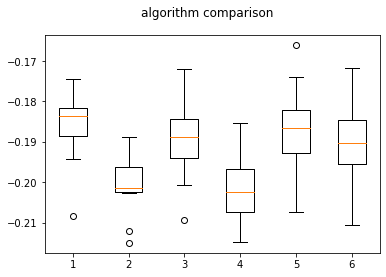

  Description      rmse
0          lr -0.186223
0         knn -0.200645
0          rf -0.189213
0    rf_boost -0.201087
0      gboost -0.186944
0         cbc -0.190457


In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()


linear_models.append(('lr',lr))
linear_models.append(('knn',knn))
non_linear_models.append(('rf',rf))
non_linear_models.append(('rf_boost',rf_boost))
non_linear_models.append(('gboost',gboost))
non_linear_models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [370]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
knn.fit(x,y)
y_pred=knn.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/knn.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf.fit(x,y)
y_pred=rf.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf_boost.fit(x,y)
y_pred=rf_boost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf_boost.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
cbc.fit(x,y)
y_pred=cbc.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/cbc.csv',index=False)

Learning rate set to 0.055186
0:	learn: 0.1856163	total: 4.47ms	remaining: 4.46s
1:	learn: 0.1854897	total: 7.48ms	remaining: 3.73s
2:	learn: 0.1853809	total: 10.3ms	remaining: 3.42s
3:	learn: 0.1852917	total: 13.1ms	remaining: 3.25s
4:	learn: 0.1851717	total: 15.5ms	remaining: 3.09s
5:	learn: 0.1850582	total: 18.2ms	remaining: 3.02s
6:	learn: 0.1849771	total: 20.9ms	remaining: 2.96s
7:	learn: 0.1848298	total: 23.6ms	remaining: 2.93s
8:	learn: 0.1847213	total: 26.3ms	remaining: 2.9s
9:	learn: 0.1846338	total: 29.2ms	remaining: 2.89s
10:	learn: 0.1844945	total: 32.3ms	remaining: 2.9s
11:	learn: 0.1843748	total: 35.1ms	remaining: 2.89s
12:	learn: 0.1842657	total: 38.2ms	remaining: 2.9s
13:	learn: 0.1841429	total: 41.4ms	remaining: 2.91s
14:	learn: 0.1840716	total: 44.3ms	remaining: 2.9s
15:	learn: 0.1839257	total: 47.5ms	remaining: 2.92s
16:	learn: 0.1838462	total: 50.3ms	remaining: 2.91s
17:	learn: 0.1837371	total: 53.1ms	remaining: 2.9s
18:	learn: 0.1836621	total: 56.1ms	remaining: 2.9

205:	learn: 0.1683213	total: 670ms	remaining: 2.58s
206:	learn: 0.1682294	total: 673ms	remaining: 2.58s
207:	learn: 0.1681236	total: 676ms	remaining: 2.57s
208:	learn: 0.1680241	total: 679ms	remaining: 2.57s
209:	learn: 0.1679713	total: 684ms	remaining: 2.57s
210:	learn: 0.1679050	total: 687ms	remaining: 2.57s
211:	learn: 0.1678061	total: 690ms	remaining: 2.56s
212:	learn: 0.1677347	total: 692ms	remaining: 2.56s
213:	learn: 0.1676826	total: 696ms	remaining: 2.56s
214:	learn: 0.1676304	total: 699ms	remaining: 2.55s
215:	learn: 0.1675628	total: 702ms	remaining: 2.55s
216:	learn: 0.1675182	total: 705ms	remaining: 2.54s
217:	learn: 0.1674147	total: 708ms	remaining: 2.54s
218:	learn: 0.1673570	total: 712ms	remaining: 2.54s
219:	learn: 0.1672973	total: 715ms	remaining: 2.54s
220:	learn: 0.1672082	total: 718ms	remaining: 2.53s
221:	learn: 0.1671447	total: 721ms	remaining: 2.53s
222:	learn: 0.1670423	total: 725ms	remaining: 2.52s
223:	learn: 0.1669828	total: 728ms	remaining: 2.52s
224:	learn: 

403:	learn: 0.1539548	total: 1.33s	remaining: 1.96s
404:	learn: 0.1538961	total: 1.33s	remaining: 1.96s
405:	learn: 0.1538555	total: 1.34s	remaining: 1.96s
406:	learn: 0.1537838	total: 1.34s	remaining: 1.95s
407:	learn: 0.1537383	total: 1.34s	remaining: 1.95s
408:	learn: 0.1536861	total: 1.35s	remaining: 1.95s
409:	learn: 0.1536283	total: 1.35s	remaining: 1.94s
410:	learn: 0.1535171	total: 1.35s	remaining: 1.94s
411:	learn: 0.1533977	total: 1.36s	remaining: 1.94s
412:	learn: 0.1533438	total: 1.36s	remaining: 1.93s
413:	learn: 0.1532421	total: 1.36s	remaining: 1.93s
414:	learn: 0.1532146	total: 1.36s	remaining: 1.93s
415:	learn: 0.1531546	total: 1.37s	remaining: 1.92s
416:	learn: 0.1531169	total: 1.37s	remaining: 1.92s
417:	learn: 0.1530425	total: 1.38s	remaining: 1.92s
418:	learn: 0.1529917	total: 1.38s	remaining: 1.91s
419:	learn: 0.1529232	total: 1.38s	remaining: 1.91s
420:	learn: 0.1528741	total: 1.39s	remaining: 1.91s
421:	learn: 0.1528325	total: 1.39s	remaining: 1.9s
422:	learn: 0

610:	learn: 0.1414503	total: 2s	remaining: 1.27s
611:	learn: 0.1413799	total: 2s	remaining: 1.27s
612:	learn: 0.1413345	total: 2s	remaining: 1.26s
613:	learn: 0.1412975	total: 2.01s	remaining: 1.26s
614:	learn: 0.1412257	total: 2.01s	remaining: 1.26s
615:	learn: 0.1411739	total: 2.01s	remaining: 1.25s
616:	learn: 0.1411204	total: 2.02s	remaining: 1.25s
617:	learn: 0.1410814	total: 2.02s	remaining: 1.25s
618:	learn: 0.1409944	total: 2.02s	remaining: 1.24s
619:	learn: 0.1409083	total: 2.02s	remaining: 1.24s
620:	learn: 0.1408676	total: 2.03s	remaining: 1.24s
621:	learn: 0.1407770	total: 2.03s	remaining: 1.23s
622:	learn: 0.1407516	total: 2.03s	remaining: 1.23s
623:	learn: 0.1407002	total: 2.04s	remaining: 1.23s
624:	learn: 0.1406263	total: 2.04s	remaining: 1.22s
625:	learn: 0.1405962	total: 2.04s	remaining: 1.22s
626:	learn: 0.1405368	total: 2.04s	remaining: 1.22s
627:	learn: 0.1404759	total: 2.05s	remaining: 1.21s
628:	learn: 0.1404180	total: 2.05s	remaining: 1.21s
629:	learn: 0.1403581

774:	learn: 0.1326775	total: 2.5s	remaining: 727ms
775:	learn: 0.1326343	total: 2.51s	remaining: 724ms
776:	learn: 0.1326067	total: 2.51s	remaining: 720ms
777:	learn: 0.1325677	total: 2.51s	remaining: 717ms
778:	learn: 0.1325209	total: 2.52s	remaining: 714ms
779:	learn: 0.1324633	total: 2.52s	remaining: 710ms
780:	learn: 0.1324332	total: 2.52s	remaining: 707ms
781:	learn: 0.1323742	total: 2.52s	remaining: 704ms
782:	learn: 0.1323095	total: 2.53s	remaining: 701ms
783:	learn: 0.1322542	total: 2.53s	remaining: 697ms
784:	learn: 0.1322280	total: 2.53s	remaining: 694ms
785:	learn: 0.1321687	total: 2.54s	remaining: 691ms
786:	learn: 0.1321446	total: 2.54s	remaining: 688ms
787:	learn: 0.1320937	total: 2.54s	remaining: 684ms
788:	learn: 0.1320428	total: 2.55s	remaining: 681ms
789:	learn: 0.1319875	total: 2.55s	remaining: 678ms
790:	learn: 0.1319222	total: 2.55s	remaining: 675ms
791:	learn: 0.1318618	total: 2.56s	remaining: 671ms
792:	learn: 0.1318238	total: 2.56s	remaining: 668ms
793:	learn: 0

934:	learn: 0.1247256	total: 3.01s	remaining: 209ms
935:	learn: 0.1246921	total: 3.01s	remaining: 206ms
936:	learn: 0.1246362	total: 3.01s	remaining: 203ms
937:	learn: 0.1245761	total: 3.02s	remaining: 199ms
938:	learn: 0.1245362	total: 3.02s	remaining: 196ms
939:	learn: 0.1244850	total: 3.02s	remaining: 193ms
940:	learn: 0.1244508	total: 3.03s	remaining: 190ms
941:	learn: 0.1243880	total: 3.03s	remaining: 187ms
942:	learn: 0.1243513	total: 3.03s	remaining: 183ms
943:	learn: 0.1243102	total: 3.04s	remaining: 180ms
944:	learn: 0.1242546	total: 3.04s	remaining: 177ms
945:	learn: 0.1242258	total: 3.04s	remaining: 174ms
946:	learn: 0.1241985	total: 3.04s	remaining: 170ms
947:	learn: 0.1241498	total: 3.05s	remaining: 167ms
948:	learn: 0.1241033	total: 3.05s	remaining: 164ms
949:	learn: 0.1240743	total: 3.06s	remaining: 161ms
950:	learn: 0.1240313	total: 3.06s	remaining: 158ms
951:	learn: 0.1239717	total: 3.06s	remaining: 154ms
952:	learn: 0.1239230	total: 3.07s	remaining: 151ms
953:	learn: 

# Different combinaiton of dummy/ label encoding

In [372]:
df2=df.copy()

In [373]:
df2=pd.get_dummies(data=df2,columns=['Decision_skill_possess','Education_Level','Gender','Hometown','Post_Level','Relationship_Status',
      'Time_since_promotion','Travel_Rate',"VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7","Compensation_and_Benefits",
        "Pay_Scale","Unit","Work_Life_balance"],drop_first=True)

In [375]:
train=df2[df2['train/test']==1]
test=df2[df2['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 84)
y_train shape is  (7000,)
x_test shape is  (3000, 84)


lr:-0.186776 (0.000086)
knn:-0.203024 (0.000050)
rf:-0.189268 (0.000123)
rf_boost:-0.201222 (0.000060)
gboost:-0.187118 (0.000134)
Learning rate set to 0.054161
0:	learn: 0.1876942	total: 7.22ms	remaining: 7.21s
1:	learn: 0.1875358	total: 13.6ms	remaining: 6.79s
2:	learn: 0.1873842	total: 19.9ms	remaining: 6.6s
3:	learn: 0.1872664	total: 26.2ms	remaining: 6.52s
4:	learn: 0.1872071	total: 32.6ms	remaining: 6.49s
5:	learn: 0.1870994	total: 38.9ms	remaining: 6.44s
6:	learn: 0.1869879	total: 45.2ms	remaining: 6.41s
7:	learn: 0.1868559	total: 51.2ms	remaining: 6.35s
8:	learn: 0.1867219	total: 57.6ms	remaining: 6.34s
9:	learn: 0.1865933	total: 64ms	remaining: 6.33s
10:	learn: 0.1865072	total: 70.2ms	remaining: 6.31s
11:	learn: 0.1864238	total: 76.4ms	remaining: 6.29s
12:	learn: 0.1863009	total: 82.5ms	remaining: 6.26s
13:	learn: 0.1862373	total: 88.5ms	remaining: 6.23s
14:	learn: 0.1861364	total: 94.6ms	remaining: 6.21s
15:	learn: 0.1860130	total: 101ms	remaining: 6.22s
16:	learn: 0.1859252	

171:	learn: 0.1719346	total: 957ms	remaining: 4.61s
172:	learn: 0.1718477	total: 962ms	remaining: 4.6s
173:	learn: 0.1717222	total: 966ms	remaining: 4.58s
174:	learn: 0.1716593	total: 969ms	remaining: 4.57s
175:	learn: 0.1715937	total: 973ms	remaining: 4.55s
176:	learn: 0.1715376	total: 976ms	remaining: 4.54s
177:	learn: 0.1714700	total: 979ms	remaining: 4.52s
178:	learn: 0.1713902	total: 983ms	remaining: 4.51s
179:	learn: 0.1713377	total: 987ms	remaining: 4.49s
180:	learn: 0.1712362	total: 990ms	remaining: 4.48s
181:	learn: 0.1711659	total: 995ms	remaining: 4.47s
182:	learn: 0.1710571	total: 1s	remaining: 4.48s
183:	learn: 0.1709870	total: 1.01s	remaining: 4.48s
184:	learn: 0.1709296	total: 1.01s	remaining: 4.47s
185:	learn: 0.1708666	total: 1.02s	remaining: 4.47s
186:	learn: 0.1707864	total: 1.03s	remaining: 4.47s
187:	learn: 0.1706744	total: 1.03s	remaining: 4.47s
188:	learn: 0.1705859	total: 1.04s	remaining: 4.47s
189:	learn: 0.1705248	total: 1.05s	remaining: 4.46s
190:	learn: 0.17

349:	learn: 0.1571727	total: 1.97s	remaining: 3.66s
350:	learn: 0.1571011	total: 1.98s	remaining: 3.65s
351:	learn: 0.1570570	total: 1.98s	remaining: 3.65s
352:	learn: 0.1569759	total: 1.99s	remaining: 3.64s
353:	learn: 0.1568944	total: 1.99s	remaining: 3.63s
354:	learn: 0.1568325	total: 1.99s	remaining: 3.62s
355:	learn: 0.1567556	total: 2s	remaining: 3.61s
356:	learn: 0.1566456	total: 2s	remaining: 3.6s
357:	learn: 0.1565703	total: 2s	remaining: 3.6s
358:	learn: 0.1565329	total: 2.01s	remaining: 3.58s
359:	learn: 0.1564549	total: 2.01s	remaining: 3.58s
360:	learn: 0.1563926	total: 2.02s	remaining: 3.57s
361:	learn: 0.1563017	total: 2.02s	remaining: 3.56s
362:	learn: 0.1562295	total: 2.02s	remaining: 3.55s
363:	learn: 0.1561538	total: 2.03s	remaining: 3.55s
364:	learn: 0.1560474	total: 2.04s	remaining: 3.54s
365:	learn: 0.1559605	total: 2.04s	remaining: 3.54s
366:	learn: 0.1558881	total: 2.05s	remaining: 3.53s
367:	learn: 0.1558158	total: 2.06s	remaining: 3.53s
368:	learn: 0.1557416	t

524:	learn: 0.1444112	total: 2.83s	remaining: 2.56s
525:	learn: 0.1443314	total: 2.83s	remaining: 2.55s
526:	learn: 0.1442764	total: 2.83s	remaining: 2.54s
527:	learn: 0.1442019	total: 2.84s	remaining: 2.54s
528:	learn: 0.1441532	total: 2.84s	remaining: 2.53s
529:	learn: 0.1440924	total: 2.85s	remaining: 2.52s
530:	learn: 0.1440655	total: 2.85s	remaining: 2.52s
531:	learn: 0.1440094	total: 2.85s	remaining: 2.51s
532:	learn: 0.1439530	total: 2.86s	remaining: 2.51s
533:	learn: 0.1438607	total: 2.87s	remaining: 2.5s
534:	learn: 0.1438129	total: 2.87s	remaining: 2.5s
535:	learn: 0.1437560	total: 2.88s	remaining: 2.49s
536:	learn: 0.1436844	total: 2.88s	remaining: 2.49s
537:	learn: 0.1436196	total: 2.89s	remaining: 2.48s
538:	learn: 0.1435415	total: 2.9s	remaining: 2.48s
539:	learn: 0.1434564	total: 2.9s	remaining: 2.47s
540:	learn: 0.1434037	total: 2.91s	remaining: 2.47s
541:	learn: 0.1433569	total: 2.92s	remaining: 2.46s
542:	learn: 0.1433141	total: 2.92s	remaining: 2.46s
543:	learn: 0.14

689:	learn: 0.1342673	total: 3.67s	remaining: 1.65s
690:	learn: 0.1342064	total: 3.67s	remaining: 1.64s
691:	learn: 0.1341439	total: 3.68s	remaining: 1.64s
692:	learn: 0.1341097	total: 3.68s	remaining: 1.63s
693:	learn: 0.1340468	total: 3.69s	remaining: 1.63s
694:	learn: 0.1340251	total: 3.69s	remaining: 1.62s
695:	learn: 0.1339755	total: 3.7s	remaining: 1.61s
696:	learn: 0.1339477	total: 3.7s	remaining: 1.61s
697:	learn: 0.1338968	total: 3.7s	remaining: 1.6s
698:	learn: 0.1338338	total: 3.71s	remaining: 1.6s
699:	learn: 0.1337846	total: 3.71s	remaining: 1.59s
700:	learn: 0.1337266	total: 3.71s	remaining: 1.58s
701:	learn: 0.1336413	total: 3.72s	remaining: 1.58s
702:	learn: 0.1336019	total: 3.72s	remaining: 1.57s
703:	learn: 0.1335588	total: 3.72s	remaining: 1.56s
704:	learn: 0.1335057	total: 3.73s	remaining: 1.56s
705:	learn: 0.1334299	total: 3.73s	remaining: 1.55s
706:	learn: 0.1333755	total: 3.73s	remaining: 1.55s
707:	learn: 0.1333267	total: 3.74s	remaining: 1.54s
708:	learn: 0.133

885:	learn: 0.1236315	total: 4.5s	remaining: 580ms
886:	learn: 0.1235972	total: 4.51s	remaining: 574ms
887:	learn: 0.1235434	total: 4.51s	remaining: 569ms
888:	learn: 0.1235040	total: 4.51s	remaining: 564ms
889:	learn: 0.1234637	total: 4.52s	remaining: 558ms
890:	learn: 0.1234145	total: 4.52s	remaining: 553ms
891:	learn: 0.1233694	total: 4.52s	remaining: 548ms
892:	learn: 0.1233332	total: 4.53s	remaining: 542ms
893:	learn: 0.1232751	total: 4.54s	remaining: 538ms
894:	learn: 0.1232460	total: 4.54s	remaining: 533ms
895:	learn: 0.1231774	total: 4.54s	remaining: 527ms
896:	learn: 0.1231330	total: 4.55s	remaining: 522ms
897:	learn: 0.1230718	total: 4.56s	remaining: 518ms
898:	learn: 0.1230264	total: 4.56s	remaining: 512ms
899:	learn: 0.1229586	total: 4.57s	remaining: 507ms
900:	learn: 0.1229027	total: 4.57s	remaining: 502ms
901:	learn: 0.1228494	total: 4.58s	remaining: 497ms
902:	learn: 0.1228143	total: 4.58s	remaining: 492ms
903:	learn: 0.1227470	total: 4.59s	remaining: 487ms
904:	learn: 0

61:	learn: 0.1804269	total: 335ms	remaining: 5.07s
62:	learn: 0.1803546	total: 341ms	remaining: 5.07s
63:	learn: 0.1802407	total: 346ms	remaining: 5.07s
64:	learn: 0.1801621	total: 351ms	remaining: 5.05s
65:	learn: 0.1800364	total: 355ms	remaining: 5.03s
66:	learn: 0.1799570	total: 359ms	remaining: 5s
67:	learn: 0.1798732	total: 363ms	remaining: 4.98s
68:	learn: 0.1798076	total: 366ms	remaining: 4.94s
69:	learn: 0.1796721	total: 369ms	remaining: 4.91s
70:	learn: 0.1795736	total: 374ms	remaining: 4.89s
71:	learn: 0.1794839	total: 377ms	remaining: 4.86s
72:	learn: 0.1794054	total: 380ms	remaining: 4.83s
73:	learn: 0.1793338	total: 385ms	remaining: 4.82s
74:	learn: 0.1792673	total: 389ms	remaining: 4.8s
75:	learn: 0.1791822	total: 393ms	remaining: 4.78s
76:	learn: 0.1790899	total: 398ms	remaining: 4.78s
77:	learn: 0.1789999	total: 405ms	remaining: 4.79s
78:	learn: 0.1789129	total: 411ms	remaining: 4.79s
79:	learn: 0.1788243	total: 416ms	remaining: 4.78s
80:	learn: 0.1787258	total: 421ms	r

221:	learn: 0.1670755	total: 1.17s	remaining: 4.11s
222:	learn: 0.1669800	total: 1.18s	remaining: 4.1s
223:	learn: 0.1669057	total: 1.18s	remaining: 4.09s
224:	learn: 0.1668211	total: 1.19s	remaining: 4.08s
225:	learn: 0.1667288	total: 1.19s	remaining: 4.08s
226:	learn: 0.1666088	total: 1.2s	remaining: 4.07s
227:	learn: 0.1665466	total: 1.2s	remaining: 4.07s
228:	learn: 0.1664732	total: 1.2s	remaining: 4.05s
229:	learn: 0.1663649	total: 1.21s	remaining: 4.04s
230:	learn: 0.1663133	total: 1.21s	remaining: 4.03s
231:	learn: 0.1662058	total: 1.21s	remaining: 4.02s
232:	learn: 0.1660938	total: 1.22s	remaining: 4.01s
233:	learn: 0.1659810	total: 1.22s	remaining: 4s
234:	learn: 0.1658902	total: 1.22s	remaining: 3.98s
235:	learn: 0.1658222	total: 1.23s	remaining: 3.98s
236:	learn: 0.1656901	total: 1.23s	remaining: 3.96s
237:	learn: 0.1655689	total: 1.23s	remaining: 3.95s
238:	learn: 0.1655105	total: 1.24s	remaining: 3.94s
239:	learn: 0.1654462	total: 1.24s	remaining: 3.94s
240:	learn: 0.16537

383:	learn: 0.1537235	total: 2.01s	remaining: 3.22s
384:	learn: 0.1536476	total: 2.01s	remaining: 3.21s
385:	learn: 0.1535831	total: 2.02s	remaining: 3.21s
386:	learn: 0.1535121	total: 2.02s	remaining: 3.2s
387:	learn: 0.1534152	total: 2.02s	remaining: 3.19s
388:	learn: 0.1533442	total: 2.03s	remaining: 3.18s
389:	learn: 0.1532719	total: 2.03s	remaining: 3.17s
390:	learn: 0.1532254	total: 2.03s	remaining: 3.17s
391:	learn: 0.1531435	total: 2.04s	remaining: 3.16s
392:	learn: 0.1530823	total: 2.04s	remaining: 3.15s
393:	learn: 0.1529790	total: 2.04s	remaining: 3.14s
394:	learn: 0.1529024	total: 2.05s	remaining: 3.13s
395:	learn: 0.1528262	total: 2.05s	remaining: 3.13s
396:	learn: 0.1527785	total: 2.06s	remaining: 3.13s
397:	learn: 0.1527375	total: 2.06s	remaining: 3.12s
398:	learn: 0.1526753	total: 2.07s	remaining: 3.12s
399:	learn: 0.1526130	total: 2.07s	remaining: 3.11s
400:	learn: 0.1525190	total: 2.08s	remaining: 3.1s
401:	learn: 0.1524141	total: 2.08s	remaining: 3.1s
402:	learn: 0.1

544:	learn: 0.1426638	total: 2.87s	remaining: 2.39s
545:	learn: 0.1425978	total: 2.87s	remaining: 2.39s
546:	learn: 0.1425695	total: 2.88s	remaining: 2.38s
547:	learn: 0.1424996	total: 2.88s	remaining: 2.37s
548:	learn: 0.1424156	total: 2.88s	remaining: 2.37s
549:	learn: 0.1423727	total: 2.89s	remaining: 2.36s
550:	learn: 0.1423155	total: 2.89s	remaining: 2.35s
551:	learn: 0.1422472	total: 2.89s	remaining: 2.35s
552:	learn: 0.1421964	total: 2.9s	remaining: 2.34s
553:	learn: 0.1421067	total: 2.9s	remaining: 2.34s
554:	learn: 0.1420346	total: 2.91s	remaining: 2.33s
555:	learn: 0.1419742	total: 2.92s	remaining: 2.33s
556:	learn: 0.1418857	total: 2.92s	remaining: 2.33s
557:	learn: 0.1418192	total: 2.93s	remaining: 2.32s
558:	learn: 0.1417738	total: 2.94s	remaining: 2.32s
559:	learn: 0.1416936	total: 2.94s	remaining: 2.31s
560:	learn: 0.1416328	total: 2.95s	remaining: 2.31s
561:	learn: 0.1415792	total: 2.96s	remaining: 2.31s
562:	learn: 0.1415344	total: 2.96s	remaining: 2.3s
563:	learn: 0.1

717:	learn: 0.1323668	total: 3.87s	remaining: 1.52s
718:	learn: 0.1323098	total: 3.87s	remaining: 1.51s
719:	learn: 0.1322588	total: 3.88s	remaining: 1.51s
720:	learn: 0.1322029	total: 3.88s	remaining: 1.5s
721:	learn: 0.1321148	total: 3.89s	remaining: 1.5s
722:	learn: 0.1320355	total: 3.89s	remaining: 1.49s
723:	learn: 0.1319835	total: 3.89s	remaining: 1.48s
724:	learn: 0.1319391	total: 3.9s	remaining: 1.48s
725:	learn: 0.1318926	total: 3.9s	remaining: 1.47s
726:	learn: 0.1318250	total: 3.91s	remaining: 1.47s
727:	learn: 0.1317625	total: 3.92s	remaining: 1.46s
728:	learn: 0.1317303	total: 3.92s	remaining: 1.46s
729:	learn: 0.1316811	total: 3.93s	remaining: 1.45s
730:	learn: 0.1316241	total: 3.94s	remaining: 1.45s
731:	learn: 0.1315891	total: 3.94s	remaining: 1.44s
732:	learn: 0.1315521	total: 3.95s	remaining: 1.44s
733:	learn: 0.1314589	total: 3.95s	remaining: 1.43s
734:	learn: 0.1313878	total: 3.96s	remaining: 1.43s
735:	learn: 0.1313392	total: 3.97s	remaining: 1.42s
736:	learn: 0.13

893:	learn: 0.1232069	total: 4.91s	remaining: 582ms
894:	learn: 0.1231763	total: 4.91s	remaining: 577ms
895:	learn: 0.1231279	total: 4.92s	remaining: 571ms
896:	learn: 0.1230886	total: 4.92s	remaining: 565ms
897:	learn: 0.1230310	total: 4.93s	remaining: 560ms
898:	learn: 0.1229827	total: 4.93s	remaining: 554ms
899:	learn: 0.1229505	total: 4.93s	remaining: 548ms
900:	learn: 0.1229050	total: 4.94s	remaining: 542ms
901:	learn: 0.1228428	total: 4.94s	remaining: 537ms
902:	learn: 0.1227817	total: 4.95s	remaining: 532ms
903:	learn: 0.1227055	total: 4.95s	remaining: 526ms
904:	learn: 0.1226492	total: 4.96s	remaining: 521ms
905:	learn: 0.1225975	total: 4.97s	remaining: 515ms
906:	learn: 0.1225651	total: 4.97s	remaining: 510ms
907:	learn: 0.1225082	total: 4.98s	remaining: 505ms
908:	learn: 0.1224659	total: 4.99s	remaining: 499ms
909:	learn: 0.1224083	total: 4.99s	remaining: 494ms
910:	learn: 0.1223477	total: 5s	remaining: 488ms
911:	learn: 0.1223028	total: 5s	remaining: 483ms
912:	learn: 0.1222

55:	learn: 0.1809041	total: 335ms	remaining: 5.65s
56:	learn: 0.1807899	total: 340ms	remaining: 5.63s
57:	learn: 0.1806924	total: 344ms	remaining: 5.59s
58:	learn: 0.1806208	total: 348ms	remaining: 5.55s
59:	learn: 0.1804835	total: 352ms	remaining: 5.51s
60:	learn: 0.1803958	total: 355ms	remaining: 5.47s
61:	learn: 0.1802820	total: 359ms	remaining: 5.43s
62:	learn: 0.1802091	total: 362ms	remaining: 5.38s
63:	learn: 0.1800773	total: 369ms	remaining: 5.4s
64:	learn: 0.1799794	total: 375ms	remaining: 5.39s
65:	learn: 0.1798962	total: 381ms	remaining: 5.38s
66:	learn: 0.1797982	total: 387ms	remaining: 5.38s
67:	learn: 0.1797018	total: 391ms	remaining: 5.36s
68:	learn: 0.1795797	total: 395ms	remaining: 5.33s
69:	learn: 0.1794779	total: 402ms	remaining: 5.34s
70:	learn: 0.1793749	total: 406ms	remaining: 5.31s
71:	learn: 0.1793189	total: 409ms	remaining: 5.28s
72:	learn: 0.1792345	total: 413ms	remaining: 5.24s
73:	learn: 0.1791602	total: 416ms	remaining: 5.21s
74:	learn: 0.1790698	total: 419m

234:	learn: 0.1657294	total: 1.33s	remaining: 4.34s
235:	learn: 0.1656722	total: 1.34s	remaining: 4.33s
236:	learn: 0.1655983	total: 1.34s	remaining: 4.32s
237:	learn: 0.1655593	total: 1.34s	remaining: 4.31s
238:	learn: 0.1654461	total: 1.35s	remaining: 4.3s
239:	learn: 0.1653694	total: 1.35s	remaining: 4.29s
240:	learn: 0.1653142	total: 1.36s	remaining: 4.28s
241:	learn: 0.1652457	total: 1.36s	remaining: 4.27s
242:	learn: 0.1651655	total: 1.37s	remaining: 4.27s
243:	learn: 0.1650979	total: 1.38s	remaining: 4.26s
244:	learn: 0.1650312	total: 1.38s	remaining: 4.25s
245:	learn: 0.1649465	total: 1.39s	remaining: 4.25s
246:	learn: 0.1648955	total: 1.39s	remaining: 4.25s
247:	learn: 0.1648363	total: 1.4s	remaining: 4.25s
248:	learn: 0.1647837	total: 1.41s	remaining: 4.25s
249:	learn: 0.1646520	total: 1.42s	remaining: 4.26s
250:	learn: 0.1645559	total: 1.42s	remaining: 4.25s
251:	learn: 0.1644840	total: 1.43s	remaining: 4.24s
252:	learn: 0.1644092	total: 1.44s	remaining: 4.24s
253:	learn: 0.

396:	learn: 0.1530198	total: 2.16s	remaining: 3.28s
397:	learn: 0.1529498	total: 2.16s	remaining: 3.27s
398:	learn: 0.1528641	total: 2.16s	remaining: 3.26s
399:	learn: 0.1528105	total: 2.17s	remaining: 3.25s
400:	learn: 0.1527546	total: 2.17s	remaining: 3.24s
401:	learn: 0.1526653	total: 2.17s	remaining: 3.23s
402:	learn: 0.1526300	total: 2.18s	remaining: 3.22s
403:	learn: 0.1525594	total: 2.18s	remaining: 3.22s
404:	learn: 0.1524542	total: 2.19s	remaining: 3.21s
405:	learn: 0.1524046	total: 2.19s	remaining: 3.2s
406:	learn: 0.1523327	total: 2.19s	remaining: 3.19s
407:	learn: 0.1522338	total: 2.19s	remaining: 3.18s
408:	learn: 0.1521971	total: 2.2s	remaining: 3.17s
409:	learn: 0.1520960	total: 2.2s	remaining: 3.17s
410:	learn: 0.1519988	total: 2.2s	remaining: 3.16s
411:	learn: 0.1519577	total: 2.21s	remaining: 3.15s
412:	learn: 0.1519051	total: 2.21s	remaining: 3.14s
413:	learn: 0.1518397	total: 2.21s	remaining: 3.13s
414:	learn: 0.1517792	total: 2.22s	remaining: 3.13s
415:	learn: 0.15

577:	learn: 0.1411372	total: 3s	remaining: 2.19s
578:	learn: 0.1410763	total: 3s	remaining: 2.18s
579:	learn: 0.1409926	total: 3.01s	remaining: 2.18s
580:	learn: 0.1408961	total: 3.01s	remaining: 2.17s
581:	learn: 0.1408112	total: 3.01s	remaining: 2.16s
582:	learn: 0.1407473	total: 3.02s	remaining: 2.16s
583:	learn: 0.1406716	total: 3.02s	remaining: 2.15s
584:	learn: 0.1405801	total: 3.02s	remaining: 2.14s
585:	learn: 0.1405210	total: 3.03s	remaining: 2.14s
586:	learn: 0.1404193	total: 3.03s	remaining: 2.13s
587:	learn: 0.1403722	total: 3.04s	remaining: 2.13s
588:	learn: 0.1403116	total: 3.05s	remaining: 2.13s
589:	learn: 0.1402555	total: 3.05s	remaining: 2.12s
590:	learn: 0.1401931	total: 3.06s	remaining: 2.12s
591:	learn: 0.1401052	total: 3.07s	remaining: 2.11s
592:	learn: 0.1400554	total: 3.07s	remaining: 2.11s
593:	learn: 0.1399805	total: 3.08s	remaining: 2.1s
594:	learn: 0.1398975	total: 3.08s	remaining: 2.1s
595:	learn: 0.1398555	total: 3.1s	remaining: 2.1s
596:	learn: 0.1397853	

748:	learn: 0.1307293	total: 3.99s	remaining: 1.34s
749:	learn: 0.1306653	total: 3.99s	remaining: 1.33s
750:	learn: 0.1305969	total: 4s	remaining: 1.32s
751:	learn: 0.1305422	total: 4s	remaining: 1.32s
752:	learn: 0.1304804	total: 4s	remaining: 1.31s
753:	learn: 0.1304248	total: 4.01s	remaining: 1.31s
754:	learn: 0.1303707	total: 4.01s	remaining: 1.3s
755:	learn: 0.1303091	total: 4.01s	remaining: 1.3s
756:	learn: 0.1302749	total: 4.02s	remaining: 1.29s
757:	learn: 0.1302130	total: 4.02s	remaining: 1.28s
758:	learn: 0.1301417	total: 4.03s	remaining: 1.28s
759:	learn: 0.1301093	total: 4.03s	remaining: 1.27s
760:	learn: 0.1300416	total: 4.04s	remaining: 1.27s
761:	learn: 0.1299630	total: 4.04s	remaining: 1.26s
762:	learn: 0.1299035	total: 4.05s	remaining: 1.26s
763:	learn: 0.1298396	total: 4.06s	remaining: 1.25s
764:	learn: 0.1297665	total: 4.06s	remaining: 1.25s
765:	learn: 0.1297294	total: 4.07s	remaining: 1.24s
766:	learn: 0.1296446	total: 4.08s	remaining: 1.24s
767:	learn: 0.1295567	t

941:	learn: 0.1204139	total: 4.82s	remaining: 297ms
942:	learn: 0.1203779	total: 4.83s	remaining: 292ms
943:	learn: 0.1203421	total: 4.84s	remaining: 287ms
944:	learn: 0.1203039	total: 4.84s	remaining: 282ms
945:	learn: 0.1202261	total: 4.85s	remaining: 277ms
946:	learn: 0.1201849	total: 4.85s	remaining: 271ms
947:	learn: 0.1201341	total: 4.85s	remaining: 266ms
948:	learn: 0.1200890	total: 4.86s	remaining: 261ms
949:	learn: 0.1200318	total: 4.86s	remaining: 256ms
950:	learn: 0.1199648	total: 4.86s	remaining: 251ms
951:	learn: 0.1199129	total: 4.87s	remaining: 245ms
952:	learn: 0.1198558	total: 4.87s	remaining: 240ms
953:	learn: 0.1197845	total: 4.87s	remaining: 235ms
954:	learn: 0.1197309	total: 4.88s	remaining: 230ms
955:	learn: 0.1196813	total: 4.88s	remaining: 225ms
956:	learn: 0.1196642	total: 4.88s	remaining: 219ms
957:	learn: 0.1196313	total: 4.89s	remaining: 214ms
958:	learn: 0.1195703	total: 4.89s	remaining: 209ms
959:	learn: 0.1195293	total: 4.89s	remaining: 204ms
960:	learn: 

119:	learn: 0.1740979	total: 489ms	remaining: 3.58s
120:	learn: 0.1739834	total: 492ms	remaining: 3.57s
121:	learn: 0.1739329	total: 494ms	remaining: 3.56s
122:	learn: 0.1738401	total: 497ms	remaining: 3.55s
123:	learn: 0.1737379	total: 501ms	remaining: 3.54s
124:	learn: 0.1736067	total: 504ms	remaining: 3.53s
125:	learn: 0.1735386	total: 508ms	remaining: 3.52s
126:	learn: 0.1734655	total: 511ms	remaining: 3.51s
127:	learn: 0.1734140	total: 514ms	remaining: 3.5s
128:	learn: 0.1733395	total: 519ms	remaining: 3.51s
129:	learn: 0.1732645	total: 525ms	remaining: 3.51s
130:	learn: 0.1731767	total: 530ms	remaining: 3.52s
131:	learn: 0.1730723	total: 536ms	remaining: 3.52s
132:	learn: 0.1730166	total: 542ms	remaining: 3.53s
133:	learn: 0.1729562	total: 552ms	remaining: 3.56s
134:	learn: 0.1728956	total: 556ms	remaining: 3.56s
135:	learn: 0.1728069	total: 561ms	remaining: 3.57s
136:	learn: 0.1726663	total: 567ms	remaining: 3.57s
137:	learn: 0.1725811	total: 572ms	remaining: 3.57s
138:	learn: 0

287:	learn: 0.1603888	total: 1.34s	remaining: 3.31s
288:	learn: 0.1602929	total: 1.34s	remaining: 3.3s
289:	learn: 0.1602273	total: 1.35s	remaining: 3.29s
290:	learn: 0.1601476	total: 1.35s	remaining: 3.29s
291:	learn: 0.1600663	total: 1.35s	remaining: 3.28s
292:	learn: 0.1599921	total: 1.35s	remaining: 3.27s
293:	learn: 0.1599350	total: 1.36s	remaining: 3.26s
294:	learn: 0.1598407	total: 1.36s	remaining: 3.25s
295:	learn: 0.1597410	total: 1.36s	remaining: 3.24s
296:	learn: 0.1596164	total: 1.37s	remaining: 3.24s
297:	learn: 0.1595194	total: 1.37s	remaining: 3.23s
298:	learn: 0.1594616	total: 1.37s	remaining: 3.22s
299:	learn: 0.1593786	total: 1.38s	remaining: 3.21s
300:	learn: 0.1592919	total: 1.38s	remaining: 3.21s
301:	learn: 0.1592507	total: 1.39s	remaining: 3.2s
302:	learn: 0.1591310	total: 1.39s	remaining: 3.19s
303:	learn: 0.1590118	total: 1.39s	remaining: 3.19s
304:	learn: 0.1589542	total: 1.4s	remaining: 3.18s
305:	learn: 0.1588794	total: 1.4s	remaining: 3.17s
306:	learn: 0.15

462:	learn: 0.1475197	total: 2.17s	remaining: 2.52s
463:	learn: 0.1474524	total: 2.18s	remaining: 2.51s
464:	learn: 0.1473867	total: 2.18s	remaining: 2.51s
465:	learn: 0.1473206	total: 2.18s	remaining: 2.5s
466:	learn: 0.1472466	total: 2.19s	remaining: 2.49s
467:	learn: 0.1471666	total: 2.19s	remaining: 2.49s
468:	learn: 0.1471199	total: 2.19s	remaining: 2.48s
469:	learn: 0.1470590	total: 2.19s	remaining: 2.48s
470:	learn: 0.1470013	total: 2.2s	remaining: 2.47s
471:	learn: 0.1469162	total: 2.2s	remaining: 2.46s
472:	learn: 0.1468479	total: 2.21s	remaining: 2.46s
473:	learn: 0.1467928	total: 2.21s	remaining: 2.45s
474:	learn: 0.1467340	total: 2.21s	remaining: 2.44s
475:	learn: 0.1466703	total: 2.22s	remaining: 2.44s
476:	learn: 0.1466041	total: 2.22s	remaining: 2.44s
477:	learn: 0.1465536	total: 2.22s	remaining: 2.43s
478:	learn: 0.1464681	total: 2.23s	remaining: 2.42s
479:	learn: 0.1463751	total: 2.23s	remaining: 2.42s
480:	learn: 0.1463102	total: 2.23s	remaining: 2.41s
481:	learn: 0.1

652:	learn: 0.1357161	total: 3.02s	remaining: 1.6s
653:	learn: 0.1356557	total: 3.02s	remaining: 1.6s
654:	learn: 0.1355995	total: 3.03s	remaining: 1.59s
655:	learn: 0.1354972	total: 3.03s	remaining: 1.59s
656:	learn: 0.1354613	total: 3.04s	remaining: 1.58s
657:	learn: 0.1354303	total: 3.04s	remaining: 1.58s
658:	learn: 0.1353925	total: 3.04s	remaining: 1.57s
659:	learn: 0.1353569	total: 3.05s	remaining: 1.57s
660:	learn: 0.1353197	total: 3.05s	remaining: 1.56s
661:	learn: 0.1352541	total: 3.06s	remaining: 1.56s
662:	learn: 0.1352111	total: 3.06s	remaining: 1.56s
663:	learn: 0.1351384	total: 3.06s	remaining: 1.55s
664:	learn: 0.1350829	total: 3.07s	remaining: 1.55s
665:	learn: 0.1350353	total: 3.08s	remaining: 1.54s
666:	learn: 0.1349724	total: 3.08s	remaining: 1.54s
667:	learn: 0.1348940	total: 3.09s	remaining: 1.53s
668:	learn: 0.1348402	total: 3.09s	remaining: 1.53s
669:	learn: 0.1347998	total: 3.1s	remaining: 1.53s
670:	learn: 0.1347455	total: 3.11s	remaining: 1.52s
671:	learn: 0.1

842:	learn: 0.1252470	total: 4.03s	remaining: 750ms
843:	learn: 0.1252070	total: 4.03s	remaining: 745ms
844:	learn: 0.1251379	total: 4.03s	remaining: 740ms
845:	learn: 0.1251070	total: 4.04s	remaining: 735ms
846:	learn: 0.1250569	total: 4.04s	remaining: 730ms
847:	learn: 0.1250077	total: 4.04s	remaining: 725ms
848:	learn: 0.1249487	total: 4.05s	remaining: 720ms
849:	learn: 0.1249152	total: 4.05s	remaining: 715ms
850:	learn: 0.1248712	total: 4.06s	remaining: 711ms
851:	learn: 0.1248134	total: 4.06s	remaining: 706ms
852:	learn: 0.1247248	total: 4.07s	remaining: 701ms
853:	learn: 0.1246754	total: 4.07s	remaining: 696ms
854:	learn: 0.1245992	total: 4.08s	remaining: 691ms
855:	learn: 0.1245585	total: 4.08s	remaining: 687ms
856:	learn: 0.1244966	total: 4.09s	remaining: 682ms
857:	learn: 0.1244595	total: 4.09s	remaining: 678ms
858:	learn: 0.1244212	total: 4.1s	remaining: 673ms
859:	learn: 0.1243797	total: 4.1s	remaining: 668ms
860:	learn: 0.1243134	total: 4.11s	remaining: 663ms
861:	learn: 0.

1:	learn: 0.1870006	total: 41.1ms	remaining: 20.5s
2:	learn: 0.1868831	total: 47.9ms	remaining: 15.9s
3:	learn: 0.1867509	total: 54.4ms	remaining: 13.6s
4:	learn: 0.1866672	total: 61.2ms	remaining: 12.2s
5:	learn: 0.1865815	total: 68ms	remaining: 11.3s
6:	learn: 0.1864871	total: 74.6ms	remaining: 10.6s
7:	learn: 0.1863681	total: 80.2ms	remaining: 9.94s
8:	learn: 0.1862701	total: 86ms	remaining: 9.47s
9:	learn: 0.1861168	total: 94ms	remaining: 9.3s
10:	learn: 0.1860316	total: 99.9ms	remaining: 8.98s
11:	learn: 0.1859432	total: 106ms	remaining: 8.71s
12:	learn: 0.1858320	total: 112ms	remaining: 8.49s
13:	learn: 0.1857270	total: 117ms	remaining: 8.25s
14:	learn: 0.1856203	total: 123ms	remaining: 8.07s
15:	learn: 0.1854941	total: 129ms	remaining: 7.96s
16:	learn: 0.1853854	total: 135ms	remaining: 7.83s
17:	learn: 0.1852875	total: 142ms	remaining: 7.72s
18:	learn: 0.1851949	total: 147ms	remaining: 7.61s
19:	learn: 0.1850961	total: 154ms	remaining: 7.54s
20:	learn: 0.1849761	total: 160ms	rem

172:	learn: 0.1710532	total: 1.05s	remaining: 5.02s
173:	learn: 0.1709628	total: 1.05s	remaining: 5s
174:	learn: 0.1708798	total: 1.06s	remaining: 4.99s
175:	learn: 0.1707937	total: 1.06s	remaining: 4.97s
176:	learn: 0.1706660	total: 1.06s	remaining: 4.95s
177:	learn: 0.1705632	total: 1.07s	remaining: 4.93s
178:	learn: 0.1704776	total: 1.07s	remaining: 4.91s
179:	learn: 0.1704133	total: 1.07s	remaining: 4.9s
180:	learn: 0.1702732	total: 1.08s	remaining: 4.9s
181:	learn: 0.1701888	total: 1.09s	remaining: 4.89s
182:	learn: 0.1701302	total: 1.09s	remaining: 4.88s
183:	learn: 0.1700200	total: 1.1s	remaining: 4.87s
184:	learn: 0.1699188	total: 1.1s	remaining: 4.87s
185:	learn: 0.1698003	total: 1.11s	remaining: 4.86s
186:	learn: 0.1696898	total: 1.12s	remaining: 4.86s
187:	learn: 0.1695807	total: 1.12s	remaining: 4.85s
188:	learn: 0.1694916	total: 1.13s	remaining: 4.85s
189:	learn: 0.1693998	total: 1.14s	remaining: 4.84s
190:	learn: 0.1693224	total: 1.14s	remaining: 4.84s
191:	learn: 0.16918

345:	learn: 0.1569156	total: 2.05s	remaining: 3.88s
346:	learn: 0.1568672	total: 2.06s	remaining: 3.87s
347:	learn: 0.1567447	total: 2.06s	remaining: 3.86s
348:	learn: 0.1566400	total: 2.06s	remaining: 3.85s
349:	learn: 0.1565287	total: 2.07s	remaining: 3.84s
350:	learn: 0.1564861	total: 2.07s	remaining: 3.83s
351:	learn: 0.1563863	total: 2.08s	remaining: 3.82s
352:	learn: 0.1562880	total: 2.08s	remaining: 3.81s
353:	learn: 0.1562239	total: 2.08s	remaining: 3.8s
354:	learn: 0.1561164	total: 2.09s	remaining: 3.79s
355:	learn: 0.1560302	total: 2.09s	remaining: 3.78s
356:	learn: 0.1559413	total: 2.09s	remaining: 3.77s
357:	learn: 0.1558634	total: 2.1s	remaining: 3.77s
358:	learn: 0.1557539	total: 2.11s	remaining: 3.76s
359:	learn: 0.1556930	total: 2.11s	remaining: 3.76s
360:	learn: 0.1555904	total: 2.12s	remaining: 3.75s
361:	learn: 0.1555100	total: 2.13s	remaining: 3.75s
362:	learn: 0.1554350	total: 2.13s	remaining: 3.74s
363:	learn: 0.1553318	total: 2.14s	remaining: 3.74s
364:	learn: 0.

515:	learn: 0.1448576	total: 3.08s	remaining: 2.89s
516:	learn: 0.1447787	total: 3.09s	remaining: 2.88s
517:	learn: 0.1446895	total: 3.09s	remaining: 2.88s
518:	learn: 0.1446215	total: 3.1s	remaining: 2.87s
519:	learn: 0.1445692	total: 3.1s	remaining: 2.87s
520:	learn: 0.1445099	total: 3.11s	remaining: 2.86s
521:	learn: 0.1444735	total: 3.11s	remaining: 2.85s
522:	learn: 0.1444270	total: 3.12s	remaining: 2.84s
523:	learn: 0.1443361	total: 3.12s	remaining: 2.84s
524:	learn: 0.1442463	total: 3.13s	remaining: 2.83s
525:	learn: 0.1442009	total: 3.13s	remaining: 2.82s
526:	learn: 0.1440950	total: 3.14s	remaining: 2.82s
527:	learn: 0.1440400	total: 3.15s	remaining: 2.81s
528:	learn: 0.1439929	total: 3.15s	remaining: 2.81s
529:	learn: 0.1439472	total: 3.16s	remaining: 2.8s
530:	learn: 0.1438735	total: 3.16s	remaining: 2.79s
531:	learn: 0.1437734	total: 3.17s	remaining: 2.79s
532:	learn: 0.1436960	total: 3.18s	remaining: 2.78s
533:	learn: 0.1436469	total: 3.18s	remaining: 2.78s
534:	learn: 0.1

683:	learn: 0.1345383	total: 4.09s	remaining: 1.89s
684:	learn: 0.1344852	total: 4.09s	remaining: 1.88s
685:	learn: 0.1344277	total: 4.14s	remaining: 1.89s
686:	learn: 0.1343660	total: 4.14s	remaining: 1.89s
687:	learn: 0.1342976	total: 4.15s	remaining: 1.88s
688:	learn: 0.1342386	total: 4.16s	remaining: 1.88s
689:	learn: 0.1341691	total: 4.16s	remaining: 1.87s
690:	learn: 0.1341216	total: 4.17s	remaining: 1.86s
691:	learn: 0.1340779	total: 4.17s	remaining: 1.86s
692:	learn: 0.1340049	total: 4.18s	remaining: 1.85s
693:	learn: 0.1339538	total: 4.18s	remaining: 1.84s
694:	learn: 0.1338827	total: 4.18s	remaining: 1.83s
695:	learn: 0.1337908	total: 4.19s	remaining: 1.83s
696:	learn: 0.1337542	total: 4.19s	remaining: 1.82s
697:	learn: 0.1336786	total: 4.2s	remaining: 1.82s
698:	learn: 0.1336266	total: 4.2s	remaining: 1.81s
699:	learn: 0.1335870	total: 4.21s	remaining: 1.8s
700:	learn: 0.1335346	total: 4.21s	remaining: 1.8s
701:	learn: 0.1334512	total: 4.22s	remaining: 1.79s
702:	learn: 0.13

853:	learn: 0.1255111	total: 5.1s	remaining: 872ms
854:	learn: 0.1254616	total: 5.11s	remaining: 867ms
855:	learn: 0.1254311	total: 5.12s	remaining: 861ms
856:	learn: 0.1253841	total: 5.12s	remaining: 855ms
857:	learn: 0.1253334	total: 5.13s	remaining: 849ms
858:	learn: 0.1252944	total: 5.14s	remaining: 843ms
859:	learn: 0.1252392	total: 5.14s	remaining: 837ms
860:	learn: 0.1252244	total: 5.15s	remaining: 831ms
861:	learn: 0.1251593	total: 5.16s	remaining: 826ms
862:	learn: 0.1251246	total: 5.17s	remaining: 820ms
863:	learn: 0.1250673	total: 5.17s	remaining: 814ms
864:	learn: 0.1250264	total: 5.18s	remaining: 808ms
865:	learn: 0.1249586	total: 5.19s	remaining: 803ms
866:	learn: 0.1249216	total: 5.2s	remaining: 798ms
867:	learn: 0.1248572	total: 5.21s	remaining: 792ms
868:	learn: 0.1247989	total: 5.21s	remaining: 786ms
869:	learn: 0.1247533	total: 5.22s	remaining: 780ms
870:	learn: 0.1247170	total: 5.22s	remaining: 774ms
871:	learn: 0.1246716	total: 5.23s	remaining: 768ms
872:	learn: 0.

32:	learn: 0.1827386	total: 174ms	remaining: 5.11s
33:	learn: 0.1826117	total: 178ms	remaining: 5.05s
34:	learn: 0.1825456	total: 184ms	remaining: 5.07s
35:	learn: 0.1824590	total: 202ms	remaining: 5.41s
36:	learn: 0.1823544	total: 206ms	remaining: 5.37s
37:	learn: 0.1822462	total: 210ms	remaining: 5.31s
38:	learn: 0.1821370	total: 214ms	remaining: 5.27s
39:	learn: 0.1820457	total: 217ms	remaining: 5.22s
40:	learn: 0.1819312	total: 221ms	remaining: 5.16s
41:	learn: 0.1818301	total: 224ms	remaining: 5.11s
42:	learn: 0.1817202	total: 228ms	remaining: 5.07s
43:	learn: 0.1815910	total: 231ms	remaining: 5.02s
44:	learn: 0.1814879	total: 240ms	remaining: 5.08s
45:	learn: 0.1814486	total: 244ms	remaining: 5.06s
46:	learn: 0.1813360	total: 248ms	remaining: 5.03s
47:	learn: 0.1812722	total: 252ms	remaining: 4.99s
48:	learn: 0.1811760	total: 255ms	remaining: 4.96s
49:	learn: 0.1810362	total: 260ms	remaining: 4.93s
50:	learn: 0.1809149	total: 263ms	remaining: 4.89s
51:	learn: 0.1808201	total: 270

199:	learn: 0.1681986	total: 1.18s	remaining: 4.73s
200:	learn: 0.1680922	total: 1.19s	remaining: 4.72s
201:	learn: 0.1680176	total: 1.21s	remaining: 4.76s
202:	learn: 0.1679366	total: 1.22s	remaining: 4.79s
203:	learn: 0.1678390	total: 1.22s	remaining: 4.78s
204:	learn: 0.1677941	total: 1.23s	remaining: 4.76s
205:	learn: 0.1677116	total: 1.23s	remaining: 4.74s
206:	learn: 0.1676342	total: 1.24s	remaining: 4.73s
207:	learn: 0.1675399	total: 1.24s	remaining: 4.73s
208:	learn: 0.1674461	total: 1.25s	remaining: 4.72s
209:	learn: 0.1673715	total: 1.25s	remaining: 4.72s
210:	learn: 0.1672837	total: 1.26s	remaining: 4.72s
211:	learn: 0.1672263	total: 1.27s	remaining: 4.72s
212:	learn: 0.1671638	total: 1.28s	remaining: 4.71s
213:	learn: 0.1670945	total: 1.28s	remaining: 4.72s
214:	learn: 0.1669626	total: 1.29s	remaining: 4.71s
215:	learn: 0.1668988	total: 1.3s	remaining: 4.71s
216:	learn: 0.1667656	total: 1.3s	remaining: 4.71s
217:	learn: 0.1666632	total: 1.31s	remaining: 4.7s
218:	learn: 0.1

358:	learn: 0.1559086	total: 2.21s	remaining: 3.95s
359:	learn: 0.1558050	total: 2.21s	remaining: 3.94s
360:	learn: 0.1557151	total: 2.22s	remaining: 3.93s
361:	learn: 0.1556713	total: 2.22s	remaining: 3.92s
362:	learn: 0.1556237	total: 2.23s	remaining: 3.91s
363:	learn: 0.1555335	total: 2.23s	remaining: 3.9s
364:	learn: 0.1554757	total: 2.24s	remaining: 3.89s
365:	learn: 0.1553604	total: 2.24s	remaining: 3.88s
366:	learn: 0.1552787	total: 2.24s	remaining: 3.87s
367:	learn: 0.1551906	total: 2.25s	remaining: 3.86s
368:	learn: 0.1551064	total: 2.25s	remaining: 3.85s
369:	learn: 0.1550564	total: 2.26s	remaining: 3.85s
370:	learn: 0.1549898	total: 2.27s	remaining: 3.84s
371:	learn: 0.1549100	total: 2.27s	remaining: 3.84s
372:	learn: 0.1548593	total: 2.28s	remaining: 3.83s
373:	learn: 0.1547907	total: 2.29s	remaining: 3.83s
374:	learn: 0.1547469	total: 2.29s	remaining: 3.82s
375:	learn: 0.1546606	total: 2.3s	remaining: 3.81s
376:	learn: 0.1545701	total: 2.3s	remaining: 3.8s
377:	learn: 0.15

530:	learn: 0.1437096	total: 2.87s	remaining: 2.54s
531:	learn: 0.1436548	total: 2.88s	remaining: 2.53s
532:	learn: 0.1435784	total: 2.88s	remaining: 2.52s
533:	learn: 0.1435156	total: 2.88s	remaining: 2.52s
534:	learn: 0.1434449	total: 2.89s	remaining: 2.51s
535:	learn: 0.1433751	total: 2.89s	remaining: 2.5s
536:	learn: 0.1433068	total: 2.89s	remaining: 2.5s
537:	learn: 0.1432784	total: 2.9s	remaining: 2.49s
538:	learn: 0.1432380	total: 2.9s	remaining: 2.48s
539:	learn: 0.1431792	total: 2.91s	remaining: 2.48s
540:	learn: 0.1431264	total: 2.91s	remaining: 2.47s
541:	learn: 0.1430772	total: 2.92s	remaining: 2.46s
542:	learn: 0.1430178	total: 2.92s	remaining: 2.46s
543:	learn: 0.1429273	total: 2.92s	remaining: 2.45s
544:	learn: 0.1428604	total: 2.93s	remaining: 2.44s
545:	learn: 0.1428028	total: 2.93s	remaining: 2.44s
546:	learn: 0.1427203	total: 2.94s	remaining: 2.43s
547:	learn: 0.1426477	total: 2.94s	remaining: 2.42s
548:	learn: 0.1425884	total: 2.94s	remaining: 2.42s
549:	learn: 0.14

716:	learn: 0.1326818	total: 3.71s	remaining: 1.46s
717:	learn: 0.1325878	total: 3.71s	remaining: 1.46s
718:	learn: 0.1325317	total: 3.71s	remaining: 1.45s
719:	learn: 0.1324786	total: 3.72s	remaining: 1.45s
720:	learn: 0.1324212	total: 3.72s	remaining: 1.44s
721:	learn: 0.1323589	total: 3.73s	remaining: 1.44s
722:	learn: 0.1322799	total: 3.73s	remaining: 1.43s
723:	learn: 0.1322140	total: 3.73s	remaining: 1.42s
724:	learn: 0.1321280	total: 3.74s	remaining: 1.42s
725:	learn: 0.1320692	total: 3.74s	remaining: 1.41s
726:	learn: 0.1320389	total: 3.74s	remaining: 1.41s
727:	learn: 0.1319951	total: 3.75s	remaining: 1.4s
728:	learn: 0.1319220	total: 3.75s	remaining: 1.39s
729:	learn: 0.1318481	total: 3.75s	remaining: 1.39s
730:	learn: 0.1318175	total: 3.75s	remaining: 1.38s
731:	learn: 0.1317667	total: 3.76s	remaining: 1.38s
732:	learn: 0.1317156	total: 3.76s	remaining: 1.37s
733:	learn: 0.1316665	total: 3.76s	remaining: 1.36s
734:	learn: 0.1315888	total: 3.77s	remaining: 1.36s
735:	learn: 0

904:	learn: 0.1226224	total: 4.74s	remaining: 498ms
905:	learn: 0.1225542	total: 4.75s	remaining: 492ms
906:	learn: 0.1225077	total: 4.75s	remaining: 487ms
907:	learn: 0.1224600	total: 4.75s	remaining: 482ms
908:	learn: 0.1224241	total: 4.76s	remaining: 476ms
909:	learn: 0.1223850	total: 4.76s	remaining: 471ms
910:	learn: 0.1223513	total: 4.76s	remaining: 465ms
911:	learn: 0.1222992	total: 4.77s	remaining: 460ms
912:	learn: 0.1222696	total: 4.77s	remaining: 455ms
913:	learn: 0.1222207	total: 4.78s	remaining: 450ms
914:	learn: 0.1221734	total: 4.79s	remaining: 445ms
915:	learn: 0.1221275	total: 4.79s	remaining: 439ms
916:	learn: 0.1220506	total: 4.8s	remaining: 434ms
917:	learn: 0.1220080	total: 4.8s	remaining: 429ms
918:	learn: 0.1219489	total: 4.81s	remaining: 424ms
919:	learn: 0.1218972	total: 4.82s	remaining: 419ms
920:	learn: 0.1218475	total: 4.82s	remaining: 414ms
921:	learn: 0.1217990	total: 4.83s	remaining: 409ms
922:	learn: 0.1217429	total: 4.83s	remaining: 403ms
923:	learn: 0.

93:	learn: 0.1759055	total: 547ms	remaining: 5.27s
94:	learn: 0.1758103	total: 552ms	remaining: 5.25s
95:	learn: 0.1757537	total: 556ms	remaining: 5.24s
96:	learn: 0.1756663	total: 560ms	remaining: 5.21s
97:	learn: 0.1755818	total: 564ms	remaining: 5.19s
98:	learn: 0.1754885	total: 567ms	remaining: 5.16s
99:	learn: 0.1753963	total: 570ms	remaining: 5.13s
100:	learn: 0.1753181	total: 574ms	remaining: 5.11s
101:	learn: 0.1752270	total: 580ms	remaining: 5.11s
102:	learn: 0.1751660	total: 588ms	remaining: 5.12s
103:	learn: 0.1750983	total: 594ms	remaining: 5.12s
104:	learn: 0.1750395	total: 600ms	remaining: 5.11s
105:	learn: 0.1749695	total: 607ms	remaining: 5.12s
106:	learn: 0.1748809	total: 613ms	remaining: 5.12s
107:	learn: 0.1747997	total: 620ms	remaining: 5.12s
108:	learn: 0.1747137	total: 626ms	remaining: 5.12s
109:	learn: 0.1746651	total: 632ms	remaining: 5.12s
110:	learn: 0.1745543	total: 639ms	remaining: 5.12s
111:	learn: 0.1744276	total: 646ms	remaining: 5.12s
112:	learn: 0.17434

272:	learn: 0.1610835	total: 1.57s	remaining: 4.18s
273:	learn: 0.1609653	total: 1.58s	remaining: 4.18s
274:	learn: 0.1608375	total: 1.58s	remaining: 4.17s
275:	learn: 0.1607722	total: 1.58s	remaining: 4.16s
276:	learn: 0.1606868	total: 1.59s	remaining: 4.14s
277:	learn: 0.1606022	total: 1.59s	remaining: 4.13s
278:	learn: 0.1605161	total: 1.59s	remaining: 4.12s
279:	learn: 0.1604552	total: 1.6s	remaining: 4.11s
280:	learn: 0.1604081	total: 1.6s	remaining: 4.1s
281:	learn: 0.1603601	total: 1.61s	remaining: 4.1s
282:	learn: 0.1602586	total: 1.61s	remaining: 4.09s
283:	learn: 0.1601917	total: 1.62s	remaining: 4.08s
284:	learn: 0.1601348	total: 1.62s	remaining: 4.08s
285:	learn: 0.1600603	total: 1.63s	remaining: 4.07s
286:	learn: 0.1599335	total: 1.63s	remaining: 4.06s
287:	learn: 0.1598489	total: 1.64s	remaining: 4.05s
288:	learn: 0.1597793	total: 1.64s	remaining: 4.05s
289:	learn: 0.1596950	total: 1.65s	remaining: 4.04s
290:	learn: 0.1596381	total: 1.65s	remaining: 4.03s
291:	learn: 0.15

451:	learn: 0.1479991	total: 2.41s	remaining: 2.92s
452:	learn: 0.1479363	total: 2.42s	remaining: 2.92s
453:	learn: 0.1478503	total: 2.42s	remaining: 2.91s
454:	learn: 0.1477829	total: 2.42s	remaining: 2.9s
455:	learn: 0.1477357	total: 2.43s	remaining: 2.9s
456:	learn: 0.1476706	total: 2.43s	remaining: 2.89s
457:	learn: 0.1476151	total: 2.43s	remaining: 2.88s
458:	learn: 0.1475724	total: 2.44s	remaining: 2.87s
459:	learn: 0.1474949	total: 2.44s	remaining: 2.87s
460:	learn: 0.1474394	total: 2.44s	remaining: 2.86s
461:	learn: 0.1473558	total: 2.45s	remaining: 2.86s
462:	learn: 0.1472846	total: 2.46s	remaining: 2.85s
463:	learn: 0.1472310	total: 2.46s	remaining: 2.85s
464:	learn: 0.1471590	total: 2.47s	remaining: 2.84s
465:	learn: 0.1470889	total: 2.48s	remaining: 2.84s
466:	learn: 0.1470000	total: 2.48s	remaining: 2.83s
467:	learn: 0.1469343	total: 2.49s	remaining: 2.83s
468:	learn: 0.1468778	total: 2.5s	remaining: 2.83s
469:	learn: 0.1468170	total: 2.5s	remaining: 2.82s
470:	learn: 0.14

627:	learn: 0.1365894	total: 3.42s	remaining: 2.03s
628:	learn: 0.1365309	total: 3.42s	remaining: 2.02s
629:	learn: 0.1364645	total: 3.43s	remaining: 2.01s
630:	learn: 0.1364138	total: 3.43s	remaining: 2.01s
631:	learn: 0.1363657	total: 3.43s	remaining: 2s
632:	learn: 0.1363213	total: 3.44s	remaining: 1.99s
633:	learn: 0.1362679	total: 3.44s	remaining: 1.99s
634:	learn: 0.1362093	total: 3.44s	remaining: 1.98s
635:	learn: 0.1361400	total: 3.45s	remaining: 1.97s
636:	learn: 0.1360864	total: 3.45s	remaining: 1.97s
637:	learn: 0.1360057	total: 3.46s	remaining: 1.96s
638:	learn: 0.1359182	total: 3.46s	remaining: 1.96s
639:	learn: 0.1358662	total: 3.47s	remaining: 1.95s
640:	learn: 0.1357900	total: 3.47s	remaining: 1.94s
641:	learn: 0.1357141	total: 3.48s	remaining: 1.94s
642:	learn: 0.1356499	total: 3.49s	remaining: 1.94s
643:	learn: 0.1355927	total: 3.5s	remaining: 1.93s
644:	learn: 0.1355441	total: 3.5s	remaining: 1.93s
645:	learn: 0.1354781	total: 3.51s	remaining: 1.92s
646:	learn: 0.135

805:	learn: 0.1264249	total: 4.43s	remaining: 1.07s
806:	learn: 0.1263730	total: 4.43s	remaining: 1.06s
807:	learn: 0.1263257	total: 4.44s	remaining: 1.05s
808:	learn: 0.1262587	total: 4.44s	remaining: 1.05s
809:	learn: 0.1262079	total: 4.44s	remaining: 1.04s
810:	learn: 0.1261720	total: 4.45s	remaining: 1.04s
811:	learn: 0.1261267	total: 4.45s	remaining: 1.03s
812:	learn: 0.1260634	total: 4.45s	remaining: 1.02s
813:	learn: 0.1259772	total: 4.46s	remaining: 1.02s
814:	learn: 0.1259366	total: 4.46s	remaining: 1.01s
815:	learn: 0.1258744	total: 4.47s	remaining: 1.01s
816:	learn: 0.1258138	total: 4.47s	remaining: 1s
817:	learn: 0.1257461	total: 4.48s	remaining: 997ms
818:	learn: 0.1256648	total: 4.49s	remaining: 991ms
819:	learn: 0.1255987	total: 4.49s	remaining: 986ms
820:	learn: 0.1255195	total: 4.5s	remaining: 981ms
821:	learn: 0.1254579	total: 4.5s	remaining: 975ms
822:	learn: 0.1254145	total: 4.51s	remaining: 970ms
823:	learn: 0.1253796	total: 4.52s	remaining: 965ms
824:	learn: 0.125

983:	learn: 0.1173115	total: 5.44s	remaining: 88.4ms
984:	learn: 0.1172592	total: 5.44s	remaining: 82.9ms
985:	learn: 0.1172171	total: 5.45s	remaining: 77.3ms
986:	learn: 0.1171506	total: 5.45s	remaining: 71.8ms
987:	learn: 0.1171142	total: 5.45s	remaining: 66.2ms
988:	learn: 0.1170708	total: 5.46s	remaining: 60.7ms
989:	learn: 0.1170405	total: 5.46s	remaining: 55.1ms
990:	learn: 0.1169992	total: 5.46s	remaining: 49.6ms
991:	learn: 0.1169552	total: 5.47s	remaining: 44.1ms
992:	learn: 0.1169164	total: 5.47s	remaining: 38.6ms
993:	learn: 0.1168856	total: 5.48s	remaining: 33.1ms
994:	learn: 0.1168393	total: 5.48s	remaining: 27.6ms
995:	learn: 0.1167773	total: 5.49s	remaining: 22.1ms
996:	learn: 0.1167342	total: 5.5s	remaining: 16.6ms
997:	learn: 0.1166888	total: 5.51s	remaining: 11ms
998:	learn: 0.1166395	total: 5.52s	remaining: 5.52ms
999:	learn: 0.1165873	total: 5.52s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1831304	total: 19.8ms	remaining: 19.8s
1:	learn: 0.1830193	tota

162:	learn: 0.1689719	total: 1.01s	remaining: 5.19s
163:	learn: 0.1688918	total: 1.01s	remaining: 5.18s
164:	learn: 0.1687607	total: 1.02s	remaining: 5.16s
165:	learn: 0.1686670	total: 1.02s	remaining: 5.14s
166:	learn: 0.1685461	total: 1.03s	remaining: 5.12s
167:	learn: 0.1684365	total: 1.03s	remaining: 5.1s
168:	learn: 0.1683535	total: 1.03s	remaining: 5.08s
169:	learn: 0.1682677	total: 1.04s	remaining: 5.07s
170:	learn: 0.1682195	total: 1.04s	remaining: 5.05s
171:	learn: 0.1680884	total: 1.05s	remaining: 5.04s
172:	learn: 0.1680111	total: 1.05s	remaining: 5.03s
173:	learn: 0.1679430	total: 1.06s	remaining: 5.02s
174:	learn: 0.1678776	total: 1.06s	remaining: 5.02s
175:	learn: 0.1678101	total: 1.07s	remaining: 5.01s
176:	learn: 0.1677509	total: 1.08s	remaining: 5.01s
177:	learn: 0.1676602	total: 1.08s	remaining: 5s
178:	learn: 0.1675902	total: 1.09s	remaining: 5s
179:	learn: 0.1675139	total: 1.1s	remaining: 5s
180:	learn: 0.1674442	total: 1.1s	remaining: 4.99s
181:	learn: 0.1674118	to

336:	learn: 0.1550617	total: 2.02s	remaining: 3.98s
337:	learn: 0.1549788	total: 2.03s	remaining: 3.97s
338:	learn: 0.1549238	total: 2.03s	remaining: 3.96s
339:	learn: 0.1548477	total: 2.04s	remaining: 3.96s
340:	learn: 0.1548103	total: 2.04s	remaining: 3.94s
341:	learn: 0.1547592	total: 2.04s	remaining: 3.93s
342:	learn: 0.1546710	total: 2.05s	remaining: 3.92s
343:	learn: 0.1545901	total: 2.05s	remaining: 3.91s
344:	learn: 0.1545519	total: 2.06s	remaining: 3.9s
345:	learn: 0.1545108	total: 2.06s	remaining: 3.9s
346:	learn: 0.1544234	total: 2.07s	remaining: 3.89s
347:	learn: 0.1543492	total: 2.08s	remaining: 3.89s
348:	learn: 0.1542799	total: 2.08s	remaining: 3.88s
349:	learn: 0.1542059	total: 2.09s	remaining: 3.88s
350:	learn: 0.1541410	total: 2.1s	remaining: 3.88s
351:	learn: 0.1540870	total: 2.1s	remaining: 3.87s
352:	learn: 0.1539737	total: 2.11s	remaining: 3.87s
353:	learn: 0.1539103	total: 2.12s	remaining: 3.86s
354:	learn: 0.1538361	total: 2.12s	remaining: 3.85s
355:	learn: 0.15

497:	learn: 0.1439847	total: 3.02s	remaining: 3.05s
498:	learn: 0.1438890	total: 3.03s	remaining: 3.04s
499:	learn: 0.1438326	total: 3.03s	remaining: 3.03s
500:	learn: 0.1437741	total: 3.03s	remaining: 3.02s
501:	learn: 0.1437315	total: 3.04s	remaining: 3.01s
502:	learn: 0.1436605	total: 3.04s	remaining: 3s
503:	learn: 0.1435948	total: 3.04s	remaining: 2.99s
504:	learn: 0.1435244	total: 3.05s	remaining: 2.98s
505:	learn: 0.1434431	total: 3.05s	remaining: 2.98s
506:	learn: 0.1433704	total: 3.06s	remaining: 2.97s
507:	learn: 0.1433230	total: 3.06s	remaining: 2.97s
508:	learn: 0.1432553	total: 3.07s	remaining: 2.96s
509:	learn: 0.1432205	total: 3.08s	remaining: 2.96s
510:	learn: 0.1431537	total: 3.08s	remaining: 2.95s
511:	learn: 0.1430836	total: 3.09s	remaining: 2.95s
512:	learn: 0.1430190	total: 3.1s	remaining: 2.94s
513:	learn: 0.1429439	total: 3.1s	remaining: 2.94s
514:	learn: 0.1428867	total: 3.11s	remaining: 2.93s
515:	learn: 0.1428140	total: 3.12s	remaining: 2.92s
516:	learn: 0.142

663:	learn: 0.1340342	total: 4.04s	remaining: 2.04s
664:	learn: 0.1339556	total: 4.06s	remaining: 2.04s
665:	learn: 0.1339126	total: 4.06s	remaining: 2.04s
666:	learn: 0.1338618	total: 4.06s	remaining: 2.03s
667:	learn: 0.1338099	total: 4.07s	remaining: 2.02s
668:	learn: 0.1337753	total: 4.07s	remaining: 2.01s
669:	learn: 0.1337352	total: 4.08s	remaining: 2.01s
670:	learn: 0.1336770	total: 4.08s	remaining: 2s
671:	learn: 0.1335924	total: 4.09s	remaining: 2s
672:	learn: 0.1335381	total: 4.1s	remaining: 1.99s
673:	learn: 0.1334657	total: 4.1s	remaining: 1.99s
674:	learn: 0.1334049	total: 4.11s	remaining: 1.98s
675:	learn: 0.1333489	total: 4.12s	remaining: 1.97s
676:	learn: 0.1332575	total: 4.14s	remaining: 1.97s
677:	learn: 0.1331874	total: 4.15s	remaining: 1.97s
678:	learn: 0.1331373	total: 4.15s	remaining: 1.96s
679:	learn: 0.1330751	total: 4.16s	remaining: 1.96s
680:	learn: 0.1330132	total: 4.17s	remaining: 1.95s
681:	learn: 0.1329299	total: 4.17s	remaining: 1.95s
682:	learn: 0.132893

831:	learn: 0.1248062	total: 5.08s	remaining: 1.02s
832:	learn: 0.1247649	total: 5.08s	remaining: 1.02s
833:	learn: 0.1247130	total: 5.09s	remaining: 1.01s
834:	learn: 0.1246616	total: 5.09s	remaining: 1s
835:	learn: 0.1245986	total: 5.09s	remaining: 999ms
836:	learn: 0.1245429	total: 5.09s	remaining: 992ms
837:	learn: 0.1244642	total: 5.1s	remaining: 986ms
838:	learn: 0.1244202	total: 5.1s	remaining: 979ms
839:	learn: 0.1243570	total: 5.11s	remaining: 973ms
840:	learn: 0.1243040	total: 5.11s	remaining: 967ms
841:	learn: 0.1242594	total: 5.12s	remaining: 961ms
842:	learn: 0.1242033	total: 5.13s	remaining: 955ms
843:	learn: 0.1241403	total: 5.13s	remaining: 948ms
844:	learn: 0.1241037	total: 5.14s	remaining: 942ms
845:	learn: 0.1240169	total: 5.14s	remaining: 936ms
846:	learn: 0.1239528	total: 5.15s	remaining: 930ms
847:	learn: 0.1238971	total: 5.15s	remaining: 924ms
848:	learn: 0.1238382	total: 5.16s	remaining: 918ms
849:	learn: 0.1237780	total: 5.17s	remaining: 912ms
850:	learn: 0.123

990:	learn: 0.1168364	total: 5.76s	remaining: 52.3ms
991:	learn: 0.1167920	total: 5.76s	remaining: 46.5ms
992:	learn: 0.1167512	total: 5.76s	remaining: 40.6ms
993:	learn: 0.1166956	total: 5.76s	remaining: 34.8ms
994:	learn: 0.1166398	total: 5.77s	remaining: 29ms
995:	learn: 0.1166077	total: 5.77s	remaining: 23.2ms
996:	learn: 0.1165688	total: 5.78s	remaining: 17.4ms
997:	learn: 0.1165264	total: 5.78s	remaining: 11.6ms
998:	learn: 0.1165008	total: 5.78s	remaining: 5.79ms
999:	learn: 0.1164821	total: 5.79s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1857073	total: 12.7ms	remaining: 12.7s
1:	learn: 0.1855657	total: 19.6ms	remaining: 9.76s
2:	learn: 0.1854651	total: 26.3ms	remaining: 8.75s
3:	learn: 0.1853485	total: 32.8ms	remaining: 8.15s
4:	learn: 0.1852419	total: 39.5ms	remaining: 7.85s
5:	learn: 0.1851570	total: 48.9ms	remaining: 8.1s
6:	learn: 0.1850111	total: 54.9ms	remaining: 7.79s
7:	learn: 0.1848604	total: 62.1ms	remaining: 7.7s
8:	learn: 0.1847582	total: 75.1ms	remai

189:	learn: 0.1690106	total: 881ms	remaining: 3.75s
190:	learn: 0.1689586	total: 885ms	remaining: 3.75s
191:	learn: 0.1688819	total: 889ms	remaining: 3.74s
192:	learn: 0.1688018	total: 895ms	remaining: 3.74s
193:	learn: 0.1687390	total: 899ms	remaining: 3.73s
194:	learn: 0.1686532	total: 902ms	remaining: 3.72s
195:	learn: 0.1685959	total: 906ms	remaining: 3.71s
196:	learn: 0.1684920	total: 909ms	remaining: 3.71s
197:	learn: 0.1684290	total: 912ms	remaining: 3.69s
198:	learn: 0.1682931	total: 915ms	remaining: 3.68s
199:	learn: 0.1681979	total: 918ms	remaining: 3.67s
200:	learn: 0.1680948	total: 921ms	remaining: 3.66s
201:	learn: 0.1679847	total: 923ms	remaining: 3.65s
202:	learn: 0.1679096	total: 926ms	remaining: 3.63s
203:	learn: 0.1678251	total: 929ms	remaining: 3.63s
204:	learn: 0.1677351	total: 933ms	remaining: 3.62s
205:	learn: 0.1676678	total: 938ms	remaining: 3.62s
206:	learn: 0.1675577	total: 944ms	remaining: 3.62s
207:	learn: 0.1675069	total: 950ms	remaining: 3.62s
208:	learn: 

372:	learn: 0.1545624	total: 1.9s	remaining: 3.2s
373:	learn: 0.1544952	total: 1.91s	remaining: 3.19s
374:	learn: 0.1544630	total: 1.91s	remaining: 3.19s
375:	learn: 0.1544189	total: 1.92s	remaining: 3.18s
376:	learn: 0.1543209	total: 1.92s	remaining: 3.17s
377:	learn: 0.1542322	total: 1.92s	remaining: 3.17s
378:	learn: 0.1541633	total: 1.93s	remaining: 3.16s
379:	learn: 0.1541038	total: 1.93s	remaining: 3.15s
380:	learn: 0.1540164	total: 1.94s	remaining: 3.14s
381:	learn: 0.1539816	total: 1.94s	remaining: 3.14s
382:	learn: 0.1538972	total: 1.95s	remaining: 3.14s
383:	learn: 0.1538304	total: 1.95s	remaining: 3.13s
384:	learn: 0.1537479	total: 1.96s	remaining: 3.13s
385:	learn: 0.1536731	total: 1.97s	remaining: 3.13s
386:	learn: 0.1535831	total: 1.97s	remaining: 3.12s
387:	learn: 0.1534990	total: 1.98s	remaining: 3.12s
388:	learn: 0.1534056	total: 1.98s	remaining: 3.12s
389:	learn: 0.1533605	total: 1.99s	remaining: 3.11s
390:	learn: 0.1533217	total: 2s	remaining: 3.11s
391:	learn: 0.153

552:	learn: 0.1417860	total: 2.92s	remaining: 2.36s
553:	learn: 0.1417356	total: 2.93s	remaining: 2.36s
554:	learn: 0.1416600	total: 2.93s	remaining: 2.35s
555:	learn: 0.1415801	total: 2.94s	remaining: 2.35s
556:	learn: 0.1415091	total: 2.94s	remaining: 2.34s
557:	learn: 0.1414361	total: 2.94s	remaining: 2.33s
558:	learn: 0.1413682	total: 2.95s	remaining: 2.32s
559:	learn: 0.1413044	total: 2.95s	remaining: 2.32s
560:	learn: 0.1412261	total: 2.95s	remaining: 2.31s
561:	learn: 0.1411504	total: 2.96s	remaining: 2.3s
562:	learn: 0.1411024	total: 2.96s	remaining: 2.3s
563:	learn: 0.1410301	total: 2.97s	remaining: 2.29s
564:	learn: 0.1409672	total: 2.97s	remaining: 2.29s
565:	learn: 0.1409177	total: 2.98s	remaining: 2.28s
566:	learn: 0.1408412	total: 2.99s	remaining: 2.28s
567:	learn: 0.1407796	total: 2.99s	remaining: 2.28s
568:	learn: 0.1407108	total: 3s	remaining: 2.27s
569:	learn: 0.1406688	total: 3s	remaining: 2.27s
570:	learn: 0.1405721	total: 3.01s	remaining: 2.26s
571:	learn: 0.140535

737:	learn: 0.1304276	total: 3.95s	remaining: 1.4s
738:	learn: 0.1303785	total: 3.96s	remaining: 1.4s
739:	learn: 0.1303255	total: 3.96s	remaining: 1.39s
740:	learn: 0.1302408	total: 3.96s	remaining: 1.39s
741:	learn: 0.1301826	total: 3.97s	remaining: 1.38s
742:	learn: 0.1301274	total: 3.97s	remaining: 1.37s
743:	learn: 0.1300673	total: 3.98s	remaining: 1.37s
744:	learn: 0.1299925	total: 3.98s	remaining: 1.36s
745:	learn: 0.1299420	total: 3.98s	remaining: 1.35s
746:	learn: 0.1298733	total: 3.98s	remaining: 1.35s
747:	learn: 0.1298387	total: 3.99s	remaining: 1.34s
748:	learn: 0.1297802	total: 4s	remaining: 1.34s
749:	learn: 0.1297135	total: 4s	remaining: 1.33s
750:	learn: 0.1296352	total: 4.01s	remaining: 1.33s
751:	learn: 0.1295811	total: 4.02s	remaining: 1.32s
752:	learn: 0.1295302	total: 4.02s	remaining: 1.32s
753:	learn: 0.1294634	total: 4.03s	remaining: 1.31s
754:	learn: 0.1293909	total: 4.04s	remaining: 1.31s
755:	learn: 0.1293142	total: 4.04s	remaining: 1.3s
756:	learn: 0.1292651

923:	learn: 0.1205884	total: 4.98s	remaining: 410ms
924:	learn: 0.1205470	total: 4.98s	remaining: 404ms
925:	learn: 0.1205048	total: 4.99s	remaining: 399ms
926:	learn: 0.1204621	total: 4.99s	remaining: 393ms
927:	learn: 0.1204038	total: 5s	remaining: 388ms
928:	learn: 0.1203462	total: 5s	remaining: 382ms
929:	learn: 0.1202769	total: 5s	remaining: 377ms
930:	learn: 0.1202219	total: 5.01s	remaining: 371ms
931:	learn: 0.1201711	total: 5.01s	remaining: 366ms
932:	learn: 0.1201310	total: 5.02s	remaining: 360ms
933:	learn: 0.1200713	total: 5.02s	remaining: 355ms
934:	learn: 0.1200196	total: 5.03s	remaining: 350ms
935:	learn: 0.1199601	total: 5.04s	remaining: 344ms
936:	learn: 0.1199262	total: 5.04s	remaining: 339ms
937:	learn: 0.1198821	total: 5.05s	remaining: 334ms
938:	learn: 0.1198173	total: 5.05s	remaining: 328ms
939:	learn: 0.1197689	total: 5.06s	remaining: 323ms
940:	learn: 0.1197244	total: 5.07s	remaining: 318ms
941:	learn: 0.1196910	total: 5.07s	remaining: 312ms
942:	learn: 0.1196118

87:	learn: 0.1770392	total: 516ms	remaining: 5.35s
88:	learn: 0.1769536	total: 520ms	remaining: 5.32s
89:	learn: 0.1768673	total: 524ms	remaining: 5.3s
90:	learn: 0.1767952	total: 528ms	remaining: 5.27s
91:	learn: 0.1766605	total: 531ms	remaining: 5.24s
92:	learn: 0.1765960	total: 535ms	remaining: 5.21s
93:	learn: 0.1765170	total: 538ms	remaining: 5.18s
94:	learn: 0.1764384	total: 541ms	remaining: 5.16s
95:	learn: 0.1763321	total: 547ms	remaining: 5.15s
96:	learn: 0.1762758	total: 551ms	remaining: 5.13s
97:	learn: 0.1762143	total: 555ms	remaining: 5.11s
98:	learn: 0.1761605	total: 561ms	remaining: 5.11s
99:	learn: 0.1760443	total: 567ms	remaining: 5.11s
100:	learn: 0.1759633	total: 573ms	remaining: 5.1s
101:	learn: 0.1759057	total: 579ms	remaining: 5.09s
102:	learn: 0.1758144	total: 585ms	remaining: 5.09s
103:	learn: 0.1757604	total: 591ms	remaining: 5.09s
104:	learn: 0.1757007	total: 597ms	remaining: 5.09s
105:	learn: 0.1756179	total: 603ms	remaining: 5.09s
106:	learn: 0.1755106	total

268:	learn: 0.1615363	total: 1.54s	remaining: 4.19s
269:	learn: 0.1614558	total: 1.54s	remaining: 4.18s
270:	learn: 0.1614010	total: 1.55s	remaining: 4.17s
271:	learn: 0.1612967	total: 1.55s	remaining: 4.16s
272:	learn: 0.1612056	total: 1.56s	remaining: 4.14s
273:	learn: 0.1610918	total: 1.56s	remaining: 4.13s
274:	learn: 0.1609818	total: 1.57s	remaining: 4.13s
275:	learn: 0.1608996	total: 1.57s	remaining: 4.13s
276:	learn: 0.1608129	total: 1.58s	remaining: 4.12s
277:	learn: 0.1607025	total: 1.58s	remaining: 4.12s
278:	learn: 0.1606515	total: 1.59s	remaining: 4.11s
279:	learn: 0.1605550	total: 1.6s	remaining: 4.11s
280:	learn: 0.1604807	total: 1.6s	remaining: 4.1s
281:	learn: 0.1604271	total: 1.61s	remaining: 4.1s
282:	learn: 0.1603574	total: 1.62s	remaining: 4.09s
283:	learn: 0.1602647	total: 1.62s	remaining: 4.09s
284:	learn: 0.1602235	total: 1.63s	remaining: 4.08s
285:	learn: 0.1601517	total: 1.63s	remaining: 4.08s
286:	learn: 0.1600858	total: 1.64s	remaining: 4.08s
287:	learn: 0.15

447:	learn: 0.1480496	total: 2.56s	remaining: 3.15s
448:	learn: 0.1479931	total: 2.56s	remaining: 3.15s
449:	learn: 0.1479049	total: 2.57s	remaining: 3.14s
450:	learn: 0.1478603	total: 2.57s	remaining: 3.13s
451:	learn: 0.1477976	total: 2.57s	remaining: 3.12s
452:	learn: 0.1477413	total: 2.58s	remaining: 3.11s
453:	learn: 0.1476684	total: 2.58s	remaining: 3.1s
454:	learn: 0.1476205	total: 2.58s	remaining: 3.1s
455:	learn: 0.1475664	total: 2.59s	remaining: 3.09s
456:	learn: 0.1474746	total: 2.59s	remaining: 3.08s
457:	learn: 0.1474306	total: 2.6s	remaining: 3.08s
458:	learn: 0.1473890	total: 2.6s	remaining: 3.07s
459:	learn: 0.1473186	total: 2.61s	remaining: 3.06s
460:	learn: 0.1472372	total: 2.62s	remaining: 3.06s
461:	learn: 0.1471723	total: 2.62s	remaining: 3.06s
462:	learn: 0.1470995	total: 2.63s	remaining: 3.05s
463:	learn: 0.1470072	total: 2.64s	remaining: 3.04s
464:	learn: 0.1469313	total: 2.64s	remaining: 3.04s
465:	learn: 0.1468405	total: 2.65s	remaining: 3.04s
466:	learn: 0.14

626:	learn: 0.1367013	total: 3.58s	remaining: 2.13s
627:	learn: 0.1366495	total: 3.58s	remaining: 2.12s
628:	learn: 0.1365946	total: 3.59s	remaining: 2.12s
629:	learn: 0.1365603	total: 3.59s	remaining: 2.11s
630:	learn: 0.1365213	total: 3.6s	remaining: 2.1s
631:	learn: 0.1364869	total: 3.6s	remaining: 2.1s
632:	learn: 0.1364424	total: 3.6s	remaining: 2.09s
633:	learn: 0.1364038	total: 3.61s	remaining: 2.08s
634:	learn: 0.1363538	total: 3.61s	remaining: 2.07s
635:	learn: 0.1363158	total: 3.62s	remaining: 2.07s
636:	learn: 0.1362323	total: 3.62s	remaining: 2.06s
637:	learn: 0.1361669	total: 3.63s	remaining: 2.06s
638:	learn: 0.1361015	total: 3.63s	remaining: 2.05s
639:	learn: 0.1360109	total: 3.64s	remaining: 2.05s
640:	learn: 0.1359664	total: 3.64s	remaining: 2.04s
641:	learn: 0.1359142	total: 3.65s	remaining: 2.04s
642:	learn: 0.1358745	total: 3.66s	remaining: 2.03s
643:	learn: 0.1358212	total: 3.66s	remaining: 2.02s
644:	learn: 0.1357442	total: 3.67s	remaining: 2.02s
645:	learn: 0.135

808:	learn: 0.1267382	total: 4.6s	remaining: 1.09s
809:	learn: 0.1266555	total: 4.61s	remaining: 1.08s
810:	learn: 0.1266235	total: 4.61s	remaining: 1.07s
811:	learn: 0.1265928	total: 4.61s	remaining: 1.07s
812:	learn: 0.1265471	total: 4.62s	remaining: 1.06s
813:	learn: 0.1264850	total: 4.62s	remaining: 1.05s
814:	learn: 0.1264465	total: 4.62s	remaining: 1.05s
815:	learn: 0.1264100	total: 4.63s	remaining: 1.04s
816:	learn: 0.1263392	total: 4.63s	remaining: 1.04s
817:	learn: 0.1263083	total: 4.64s	remaining: 1.03s
818:	learn: 0.1262611	total: 4.64s	remaining: 1.03s
819:	learn: 0.1262021	total: 4.65s	remaining: 1.02s
820:	learn: 0.1261383	total: 4.65s	remaining: 1.01s
821:	learn: 0.1260762	total: 4.66s	remaining: 1.01s
822:	learn: 0.1259999	total: 4.66s	remaining: 1s
823:	learn: 0.1259027	total: 4.67s	remaining: 998ms
824:	learn: 0.1258367	total: 4.68s	remaining: 992ms
825:	learn: 0.1257819	total: 4.68s	remaining: 987ms
826:	learn: 0.1257402	total: 4.69s	remaining: 982ms
827:	learn: 0.12

981:	learn: 0.1177477	total: 5.61s	remaining: 103ms
982:	learn: 0.1177033	total: 5.62s	remaining: 97.2ms
983:	learn: 0.1176630	total: 5.62s	remaining: 91.4ms
984:	learn: 0.1176085	total: 5.63s	remaining: 85.7ms
985:	learn: 0.1175577	total: 5.63s	remaining: 79.9ms
986:	learn: 0.1175117	total: 5.63s	remaining: 74.2ms
987:	learn: 0.1174637	total: 5.63s	remaining: 68.4ms
988:	learn: 0.1174217	total: 5.64s	remaining: 62.7ms
989:	learn: 0.1173826	total: 5.64s	remaining: 57ms
990:	learn: 0.1173494	total: 5.65s	remaining: 51.3ms
991:	learn: 0.1172795	total: 5.65s	remaining: 45.6ms
992:	learn: 0.1172470	total: 5.66s	remaining: 39.9ms
993:	learn: 0.1172085	total: 5.67s	remaining: 34.2ms
994:	learn: 0.1171517	total: 5.67s	remaining: 28.5ms
995:	learn: 0.1170969	total: 5.68s	remaining: 22.8ms
996:	learn: 0.1170610	total: 5.68s	remaining: 17.1ms
997:	learn: 0.1169941	total: 5.68s	remaining: 11.4ms
998:	learn: 0.1169316	total: 5.69s	remaining: 5.7ms
999:	learn: 0.1168794	total: 5.7s	remaining: 0us
c

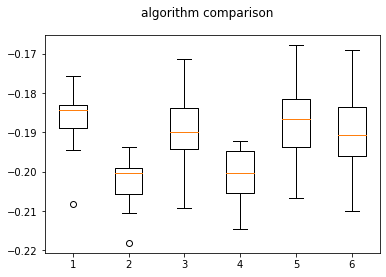

  Description      rmse
0          lr -0.186776
0         knn -0.203024
0          rf -0.189268
0    rf_boost -0.201222
0      gboost -0.187118
0         cbc -0.190100


In [376]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()


linear_models.append(('lr',lr))
linear_models.append(('knn',knn))
non_linear_models.append(('rf',rf))
non_linear_models.append(('rf_boost',rf_boost))
non_linear_models.append(('gboost',gboost))
non_linear_models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [377]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr1.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
knn.fit(x,y)
y_pred=knn.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/knn1.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf.fit(x,y)
y_pred=rf.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf1.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf_boost.fit(x,y)
y_pred=rf_boost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf_boost1.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost1.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
cbc.fit(x,y)
y_pred=cbc.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/cbc1.csv',index=False)

Learning rate set to 0.055186
0:	learn: 0.1856509	total: 7.63ms	remaining: 7.62s
1:	learn: 0.1855258	total: 14.2ms	remaining: 7.06s
2:	learn: 0.1854459	total: 20.8ms	remaining: 6.92s
3:	learn: 0.1853608	total: 27.8ms	remaining: 6.92s
4:	learn: 0.1852856	total: 34.5ms	remaining: 6.87s
5:	learn: 0.1852031	total: 41.2ms	remaining: 6.82s
6:	learn: 0.1850973	total: 48ms	remaining: 6.8s
7:	learn: 0.1849756	total: 52.6ms	remaining: 6.52s
8:	learn: 0.1848710	total: 58.1ms	remaining: 6.4s
9:	learn: 0.1847369	total: 65.5ms	remaining: 6.48s
10:	learn: 0.1846615	total: 72.2ms	remaining: 6.49s
11:	learn: 0.1845564	total: 77ms	remaining: 6.34s
12:	learn: 0.1844484	total: 81.5ms	remaining: 6.18s
13:	learn: 0.1843688	total: 87.7ms	remaining: 6.17s
14:	learn: 0.1842918	total: 93.6ms	remaining: 6.15s
15:	learn: 0.1841719	total: 99.3ms	remaining: 6.11s
16:	learn: 0.1840697	total: 105ms	remaining: 6.06s
17:	learn: 0.1839741	total: 109ms	remaining: 5.94s
18:	learn: 0.1838605	total: 115ms	remaining: 5.93s
1

182:	learn: 0.1705839	total: 1s	remaining: 4.49s
183:	learn: 0.1705076	total: 1.01s	remaining: 4.47s
184:	learn: 0.1703664	total: 1.01s	remaining: 4.45s
185:	learn: 0.1703154	total: 1.01s	remaining: 4.43s
186:	learn: 0.1702489	total: 1.01s	remaining: 4.42s
187:	learn: 0.1701612	total: 1.02s	remaining: 4.4s
188:	learn: 0.1700653	total: 1.02s	remaining: 4.38s
189:	learn: 0.1699587	total: 1.02s	remaining: 4.37s
190:	learn: 0.1698616	total: 1.03s	remaining: 4.35s
191:	learn: 0.1697509	total: 1.03s	remaining: 4.34s
192:	learn: 0.1696882	total: 1.03s	remaining: 4.33s
193:	learn: 0.1696347	total: 1.04s	remaining: 4.31s
194:	learn: 0.1695716	total: 1.04s	remaining: 4.29s
195:	learn: 0.1694247	total: 1.04s	remaining: 4.28s
196:	learn: 0.1693732	total: 1.05s	remaining: 4.26s
197:	learn: 0.1692709	total: 1.05s	remaining: 4.25s
198:	learn: 0.1691833	total: 1.05s	remaining: 4.24s
199:	learn: 0.1690768	total: 1.06s	remaining: 4.23s
200:	learn: 0.1689953	total: 1.06s	remaining: 4.21s
201:	learn: 0.16

362:	learn: 0.1570699	total: 1.68s	remaining: 2.95s
363:	learn: 0.1569839	total: 1.69s	remaining: 2.95s
364:	learn: 0.1569163	total: 1.69s	remaining: 2.94s
365:	learn: 0.1568554	total: 1.69s	remaining: 2.93s
366:	learn: 0.1567482	total: 1.7s	remaining: 2.92s
367:	learn: 0.1566774	total: 1.7s	remaining: 2.92s
368:	learn: 0.1565970	total: 1.7s	remaining: 2.91s
369:	learn: 0.1565216	total: 1.71s	remaining: 2.9s
370:	learn: 0.1564899	total: 1.71s	remaining: 2.9s
371:	learn: 0.1564488	total: 1.72s	remaining: 2.9s
372:	learn: 0.1563769	total: 1.73s	remaining: 2.9s
373:	learn: 0.1563228	total: 1.73s	remaining: 2.9s
374:	learn: 0.1562618	total: 1.74s	remaining: 2.9s
375:	learn: 0.1561684	total: 1.74s	remaining: 2.89s
376:	learn: 0.1561093	total: 1.75s	remaining: 2.89s
377:	learn: 0.1560153	total: 1.75s	remaining: 2.88s
378:	learn: 0.1559495	total: 1.75s	remaining: 2.88s
379:	learn: 0.1558896	total: 1.76s	remaining: 2.87s
380:	learn: 0.1557909	total: 1.76s	remaining: 2.86s
381:	learn: 0.1557403

523:	learn: 0.1465908	total: 2.38s	remaining: 2.16s
524:	learn: 0.1465205	total: 2.38s	remaining: 2.15s
525:	learn: 0.1464338	total: 2.39s	remaining: 2.15s
526:	learn: 0.1463771	total: 2.39s	remaining: 2.15s
527:	learn: 0.1463003	total: 2.39s	remaining: 2.14s
528:	learn: 0.1462491	total: 2.4s	remaining: 2.13s
529:	learn: 0.1461824	total: 2.4s	remaining: 2.13s
530:	learn: 0.1461298	total: 2.41s	remaining: 2.13s
531:	learn: 0.1460493	total: 2.41s	remaining: 2.12s
532:	learn: 0.1459936	total: 2.42s	remaining: 2.12s
533:	learn: 0.1459478	total: 2.42s	remaining: 2.12s
534:	learn: 0.1458809	total: 2.43s	remaining: 2.11s
535:	learn: 0.1458340	total: 2.44s	remaining: 2.11s
536:	learn: 0.1457549	total: 2.44s	remaining: 2.11s
537:	learn: 0.1456861	total: 2.45s	remaining: 2.1s
538:	learn: 0.1455943	total: 2.45s	remaining: 2.1s
539:	learn: 0.1455316	total: 2.46s	remaining: 2.09s
540:	learn: 0.1454773	total: 2.46s	remaining: 2.09s
541:	learn: 0.1454280	total: 2.47s	remaining: 2.09s
542:	learn: 0.14

697:	learn: 0.1362125	total: 3.41s	remaining: 1.48s
698:	learn: 0.1361588	total: 3.41s	remaining: 1.47s
699:	learn: 0.1360913	total: 3.42s	remaining: 1.46s
700:	learn: 0.1360341	total: 3.42s	remaining: 1.46s
701:	learn: 0.1359598	total: 3.42s	remaining: 1.45s
702:	learn: 0.1359065	total: 3.43s	remaining: 1.45s
703:	learn: 0.1358430	total: 3.43s	remaining: 1.44s
704:	learn: 0.1357752	total: 3.44s	remaining: 1.44s
705:	learn: 0.1357219	total: 3.44s	remaining: 1.43s
706:	learn: 0.1356507	total: 3.45s	remaining: 1.43s
707:	learn: 0.1355982	total: 3.45s	remaining: 1.42s
708:	learn: 0.1355544	total: 3.46s	remaining: 1.42s
709:	learn: 0.1355113	total: 3.46s	remaining: 1.42s
710:	learn: 0.1354618	total: 3.47s	remaining: 1.41s
711:	learn: 0.1354332	total: 3.48s	remaining: 1.41s
712:	learn: 0.1353804	total: 3.48s	remaining: 1.4s
713:	learn: 0.1353180	total: 3.49s	remaining: 1.4s
714:	learn: 0.1352547	total: 3.49s	remaining: 1.39s
715:	learn: 0.1352061	total: 3.5s	remaining: 1.39s
716:	learn: 0.1

877:	learn: 0.1266324	total: 4.45s	remaining: 619ms
878:	learn: 0.1265983	total: 4.46s	remaining: 614ms
879:	learn: 0.1265571	total: 4.46s	remaining: 609ms
880:	learn: 0.1264882	total: 4.47s	remaining: 604ms
881:	learn: 0.1264311	total: 4.47s	remaining: 598ms
882:	learn: 0.1263985	total: 4.48s	remaining: 593ms
883:	learn: 0.1263548	total: 4.48s	remaining: 588ms
884:	learn: 0.1262919	total: 4.48s	remaining: 583ms
885:	learn: 0.1262492	total: 4.49s	remaining: 577ms
886:	learn: 0.1262010	total: 4.49s	remaining: 572ms
887:	learn: 0.1261432	total: 4.5s	remaining: 568ms
888:	learn: 0.1261124	total: 4.5s	remaining: 563ms
889:	learn: 0.1260587	total: 4.51s	remaining: 558ms
890:	learn: 0.1260106	total: 4.52s	remaining: 553ms
891:	learn: 0.1259711	total: 4.52s	remaining: 548ms
892:	learn: 0.1259222	total: 4.53s	remaining: 543ms
893:	learn: 0.1258900	total: 4.54s	remaining: 538ms
894:	learn: 0.1258582	total: 4.54s	remaining: 533ms
895:	learn: 0.1258129	total: 4.55s	remaining: 528ms
896:	learn: 0.

Inference:
    we can see model improved after making all categorical features into dummies.

# feature engineering - "age/expereince"

In [426]:
df4=df.copy()

In [427]:
df4['exp/age']=df4['Time_of_service']/df4['Age']

In [428]:
df4=pd.get_dummies(data=df4,columns=['Decision_skill_possess','Education_Level','Gender','Hometown','Post_Level','Relationship_Status',
      'Time_since_promotion','Travel_Rate',"VAR1","VAR2","VAR3","VAR4","VAR5","VAR6","VAR7","Compensation_and_Benefits",
        "Pay_Scale","Unit","Work_Life_balance"],drop_first=True)


In [429]:
train=df4[df4['train/test']==1]
test=df4[df4['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test","Time_of_service"])

x_test=test.drop(columns=["train/test",'Attrition_rate',"Time_of_service"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 84)
y_train shape is  (7000,)
x_test shape is  (3000, 84)


lr:-0.186777 (0.000086)
knn:-0.203304 (0.000052)
rf:-0.188709 (0.000115)
rf_boost:-0.201096 (0.000117)
gboost:-0.187323 (0.000135)
Learning rate set to 0.054161
0:	learn: 0.1876375	total: 5.4ms	remaining: 5.39s
1:	learn: 0.1874794	total: 8.17ms	remaining: 4.08s
2:	learn: 0.1873535	total: 12.6ms	remaining: 4.19s
3:	learn: 0.1872357	total: 18.3ms	remaining: 4.55s
4:	learn: 0.1871513	total: 23.2ms	remaining: 4.63s
5:	learn: 0.1870462	total: 29.9ms	remaining: 4.95s
6:	learn: 0.1869343	total: 36.1ms	remaining: 5.12s
7:	learn: 0.1868019	total: 42.6ms	remaining: 5.28s
8:	learn: 0.1866666	total: 48.7ms	remaining: 5.36s
9:	learn: 0.1865384	total: 54.7ms	remaining: 5.42s
10:	learn: 0.1864520	total: 61.8ms	remaining: 5.56s
11:	learn: 0.1863619	total: 68.1ms	remaining: 5.61s
12:	learn: 0.1862285	total: 74.2ms	remaining: 5.63s
13:	learn: 0.1861276	total: 80.5ms	remaining: 5.67s
14:	learn: 0.1860096	total: 85.7ms	remaining: 5.63s
15:	learn: 0.1859582	total: 92.2ms	remaining: 5.67s
16:	learn: 0.18587

195:	learn: 0.1699069	total: 817ms	remaining: 3.35s
196:	learn: 0.1697903	total: 821ms	remaining: 3.35s
197:	learn: 0.1697042	total: 826ms	remaining: 3.34s
198:	learn: 0.1696503	total: 832ms	remaining: 3.35s
199:	learn: 0.1695380	total: 835ms	remaining: 3.34s
200:	learn: 0.1694673	total: 838ms	remaining: 3.33s
201:	learn: 0.1693917	total: 841ms	remaining: 3.32s
202:	learn: 0.1692726	total: 845ms	remaining: 3.32s
203:	learn: 0.1691945	total: 851ms	remaining: 3.32s
204:	learn: 0.1691172	total: 857ms	remaining: 3.32s
205:	learn: 0.1690247	total: 865ms	remaining: 3.33s
206:	learn: 0.1689244	total: 868ms	remaining: 3.33s
207:	learn: 0.1688293	total: 872ms	remaining: 3.32s
208:	learn: 0.1687420	total: 875ms	remaining: 3.31s
209:	learn: 0.1686002	total: 878ms	remaining: 3.3s
210:	learn: 0.1684783	total: 881ms	remaining: 3.29s
211:	learn: 0.1684136	total: 884ms	remaining: 3.29s
212:	learn: 0.1682912	total: 887ms	remaining: 3.27s
213:	learn: 0.1681677	total: 889ms	remaining: 3.27s
214:	learn: 0

377:	learn: 0.1552332	total: 1.83s	remaining: 3.01s
378:	learn: 0.1551344	total: 1.83s	remaining: 3s
379:	learn: 0.1551032	total: 1.84s	remaining: 3s
380:	learn: 0.1550253	total: 1.84s	remaining: 2.99s
381:	learn: 0.1549608	total: 1.84s	remaining: 2.99s
382:	learn: 0.1549076	total: 1.85s	remaining: 2.98s
383:	learn: 0.1548411	total: 1.85s	remaining: 2.97s
384:	learn: 0.1547538	total: 1.86s	remaining: 2.97s
385:	learn: 0.1546750	total: 1.86s	remaining: 2.96s
386:	learn: 0.1546008	total: 1.87s	remaining: 2.96s
387:	learn: 0.1545126	total: 1.88s	remaining: 2.96s
388:	learn: 0.1544173	total: 1.88s	remaining: 2.95s
389:	learn: 0.1543397	total: 1.89s	remaining: 2.95s
390:	learn: 0.1542974	total: 1.89s	remaining: 2.95s
391:	learn: 0.1542400	total: 1.9s	remaining: 2.94s
392:	learn: 0.1541453	total: 1.9s	remaining: 2.94s
393:	learn: 0.1540669	total: 1.91s	remaining: 2.94s
394:	learn: 0.1539830	total: 1.92s	remaining: 2.93s
395:	learn: 0.1539229	total: 1.92s	remaining: 2.93s
396:	learn: 0.153794

560:	learn: 0.1423862	total: 2.86s	remaining: 2.24s
561:	learn: 0.1423242	total: 2.86s	remaining: 2.23s
562:	learn: 0.1422619	total: 2.87s	remaining: 2.23s
563:	learn: 0.1422271	total: 2.87s	remaining: 2.22s
564:	learn: 0.1421569	total: 2.87s	remaining: 2.21s
565:	learn: 0.1420889	total: 2.88s	remaining: 2.21s
566:	learn: 0.1420452	total: 2.88s	remaining: 2.2s
567:	learn: 0.1419993	total: 2.88s	remaining: 2.19s
568:	learn: 0.1419285	total: 2.89s	remaining: 2.19s
569:	learn: 0.1418246	total: 2.9s	remaining: 2.19s
570:	learn: 0.1417662	total: 2.9s	remaining: 2.18s
571:	learn: 0.1416894	total: 2.91s	remaining: 2.18s
572:	learn: 0.1416098	total: 2.91s	remaining: 2.17s
573:	learn: 0.1415713	total: 2.92s	remaining: 2.17s
574:	learn: 0.1415013	total: 2.93s	remaining: 2.16s
575:	learn: 0.1414711	total: 2.93s	remaining: 2.16s
576:	learn: 0.1414036	total: 2.94s	remaining: 2.15s
577:	learn: 0.1413595	total: 2.94s	remaining: 2.15s
578:	learn: 0.1413124	total: 2.95s	remaining: 2.14s
579:	learn: 0.1

738:	learn: 0.1316911	total: 3.87s	remaining: 1.37s
739:	learn: 0.1316539	total: 3.88s	remaining: 1.36s
740:	learn: 0.1315942	total: 3.88s	remaining: 1.36s
741:	learn: 0.1315490	total: 3.88s	remaining: 1.35s
742:	learn: 0.1314774	total: 3.89s	remaining: 1.34s
743:	learn: 0.1314227	total: 3.89s	remaining: 1.34s
744:	learn: 0.1313826	total: 3.9s	remaining: 1.33s
745:	learn: 0.1313343	total: 3.9s	remaining: 1.33s
746:	learn: 0.1312890	total: 3.9s	remaining: 1.32s
747:	learn: 0.1312491	total: 3.91s	remaining: 1.32s
748:	learn: 0.1311998	total: 3.92s	remaining: 1.31s
749:	learn: 0.1311429	total: 3.92s	remaining: 1.31s
750:	learn: 0.1311120	total: 3.93s	remaining: 1.3s
751:	learn: 0.1310408	total: 3.93s	remaining: 1.3s
752:	learn: 0.1309863	total: 3.94s	remaining: 1.29s
753:	learn: 0.1309540	total: 3.94s	remaining: 1.29s
754:	learn: 0.1308889	total: 3.95s	remaining: 1.28s
755:	learn: 0.1308517	total: 3.96s	remaining: 1.28s
756:	learn: 0.1307917	total: 3.96s	remaining: 1.27s
757:	learn: 0.130

919:	learn: 0.1221919	total: 4.88s	remaining: 424ms
920:	learn: 0.1221407	total: 4.88s	remaining: 419ms
921:	learn: 0.1220956	total: 4.88s	remaining: 413ms
922:	learn: 0.1220610	total: 4.89s	remaining: 408ms
923:	learn: 0.1220028	total: 4.89s	remaining: 402ms
924:	learn: 0.1219564	total: 4.9s	remaining: 397ms
925:	learn: 0.1219105	total: 4.9s	remaining: 392ms
926:	learn: 0.1218798	total: 4.91s	remaining: 386ms
927:	learn: 0.1218236	total: 4.91s	remaining: 381ms
928:	learn: 0.1217717	total: 4.92s	remaining: 376ms
929:	learn: 0.1217276	total: 4.92s	remaining: 371ms
930:	learn: 0.1216892	total: 4.93s	remaining: 365ms
931:	learn: 0.1216444	total: 4.93s	remaining: 360ms
932:	learn: 0.1215885	total: 4.94s	remaining: 355ms
933:	learn: 0.1215640	total: 4.95s	remaining: 350ms
934:	learn: 0.1215117	total: 4.95s	remaining: 344ms
935:	learn: 0.1214556	total: 4.96s	remaining: 339ms
936:	learn: 0.1214034	total: 4.96s	remaining: 334ms
937:	learn: 0.1213544	total: 4.97s	remaining: 329ms
938:	learn: 0.

84:	learn: 0.1783736	total: 510ms	remaining: 5.49s
85:	learn: 0.1783050	total: 514ms	remaining: 5.46s
86:	learn: 0.1782110	total: 521ms	remaining: 5.46s
87:	learn: 0.1781148	total: 526ms	remaining: 5.45s
88:	learn: 0.1781057	total: 528ms	remaining: 5.41s
89:	learn: 0.1780254	total: 532ms	remaining: 5.38s
90:	learn: 0.1779580	total: 536ms	remaining: 5.36s
91:	learn: 0.1778755	total: 540ms	remaining: 5.33s
92:	learn: 0.1778183	total: 545ms	remaining: 5.31s
93:	learn: 0.1777101	total: 551ms	remaining: 5.31s
94:	learn: 0.1776182	total: 557ms	remaining: 5.31s
95:	learn: 0.1775070	total: 563ms	remaining: 5.3s
96:	learn: 0.1774041	total: 569ms	remaining: 5.3s
97:	learn: 0.1773096	total: 575ms	remaining: 5.29s
98:	learn: 0.1772360	total: 581ms	remaining: 5.29s
99:	learn: 0.1771432	total: 587ms	remaining: 5.29s
100:	learn: 0.1770640	total: 594ms	remaining: 5.28s
101:	learn: 0.1769809	total: 600ms	remaining: 5.28s
102:	learn: 0.1768813	total: 606ms	remaining: 5.28s
103:	learn: 0.1767942	total: 6

262:	learn: 0.1626177	total: 1.52s	remaining: 4.27s
263:	learn: 0.1625580	total: 1.53s	remaining: 4.26s
264:	learn: 0.1624647	total: 1.53s	remaining: 4.25s
265:	learn: 0.1623709	total: 1.53s	remaining: 4.24s
266:	learn: 0.1622600	total: 1.54s	remaining: 4.23s
267:	learn: 0.1621639	total: 1.54s	remaining: 4.21s
268:	learn: 0.1620871	total: 1.55s	remaining: 4.2s
269:	learn: 0.1620119	total: 1.55s	remaining: 4.19s
270:	learn: 0.1619602	total: 1.56s	remaining: 4.19s
271:	learn: 0.1618573	total: 1.56s	remaining: 4.18s
272:	learn: 0.1617584	total: 1.57s	remaining: 4.18s
273:	learn: 0.1616632	total: 1.57s	remaining: 4.17s
274:	learn: 0.1616167	total: 1.58s	remaining: 4.17s
275:	learn: 0.1615483	total: 1.59s	remaining: 4.16s
276:	learn: 0.1614793	total: 1.59s	remaining: 4.16s
277:	learn: 0.1614304	total: 1.6s	remaining: 4.15s
278:	learn: 0.1613754	total: 1.6s	remaining: 4.15s
279:	learn: 0.1613321	total: 1.61s	remaining: 4.14s
280:	learn: 0.1612357	total: 1.62s	remaining: 4.14s
281:	learn: 0.1

438:	learn: 0.1494877	total: 2.55s	remaining: 3.26s
439:	learn: 0.1494493	total: 2.55s	remaining: 3.25s
440:	learn: 0.1493927	total: 2.56s	remaining: 3.24s
441:	learn: 0.1493176	total: 2.56s	remaining: 3.23s
442:	learn: 0.1492335	total: 2.56s	remaining: 3.22s
443:	learn: 0.1491477	total: 2.57s	remaining: 3.21s
444:	learn: 0.1491016	total: 2.57s	remaining: 3.21s
445:	learn: 0.1490089	total: 2.58s	remaining: 3.2s
446:	learn: 0.1489227	total: 2.58s	remaining: 3.19s
447:	learn: 0.1488446	total: 2.59s	remaining: 3.19s
448:	learn: 0.1487810	total: 2.59s	remaining: 3.18s
449:	learn: 0.1486985	total: 2.6s	remaining: 3.18s
450:	learn: 0.1486114	total: 2.6s	remaining: 3.17s
451:	learn: 0.1485264	total: 2.61s	remaining: 3.17s
452:	learn: 0.1484918	total: 2.62s	remaining: 3.16s
453:	learn: 0.1484281	total: 2.62s	remaining: 3.15s
454:	learn: 0.1483578	total: 2.63s	remaining: 3.15s
455:	learn: 0.1482678	total: 2.64s	remaining: 3.15s
456:	learn: 0.1481989	total: 2.64s	remaining: 3.14s
457:	learn: 0.1

617:	learn: 0.1375078	total: 3.57s	remaining: 2.21s
618:	learn: 0.1374486	total: 3.58s	remaining: 2.2s
619:	learn: 0.1374019	total: 3.58s	remaining: 2.19s
620:	learn: 0.1373371	total: 3.58s	remaining: 2.19s
621:	learn: 0.1372666	total: 3.59s	remaining: 2.18s
622:	learn: 0.1372233	total: 3.59s	remaining: 2.17s
623:	learn: 0.1371363	total: 3.6s	remaining: 2.17s
624:	learn: 0.1370340	total: 3.6s	remaining: 2.16s
625:	learn: 0.1369708	total: 3.6s	remaining: 2.15s
626:	learn: 0.1369111	total: 3.61s	remaining: 2.15s
627:	learn: 0.1368451	total: 3.62s	remaining: 2.14s
628:	learn: 0.1367673	total: 3.62s	remaining: 2.14s
629:	learn: 0.1367292	total: 3.63s	remaining: 2.13s
630:	learn: 0.1366722	total: 3.63s	remaining: 2.13s
631:	learn: 0.1366449	total: 3.64s	remaining: 2.12s
632:	learn: 0.1365937	total: 3.65s	remaining: 2.11s
633:	learn: 0.1365153	total: 3.65s	remaining: 2.11s
634:	learn: 0.1364719	total: 3.66s	remaining: 2.1s
635:	learn: 0.1364131	total: 3.66s	remaining: 2.1s
636:	learn: 0.1363

802:	learn: 0.1272781	total: 4.62s	remaining: 1.13s
803:	learn: 0.1272333	total: 4.62s	remaining: 1.13s
804:	learn: 0.1271842	total: 4.62s	remaining: 1.12s
805:	learn: 0.1271363	total: 4.63s	remaining: 1.11s
806:	learn: 0.1270879	total: 4.63s	remaining: 1.11s
807:	learn: 0.1270515	total: 4.63s	remaining: 1.1s
808:	learn: 0.1269915	total: 4.64s	remaining: 1.09s
809:	learn: 0.1269393	total: 4.64s	remaining: 1.09s
810:	learn: 0.1268856	total: 4.65s	remaining: 1.08s
811:	learn: 0.1268388	total: 4.65s	remaining: 1.08s
812:	learn: 0.1267875	total: 4.66s	remaining: 1.07s
813:	learn: 0.1267055	total: 4.66s	remaining: 1.06s
814:	learn: 0.1266521	total: 4.67s	remaining: 1.06s
815:	learn: 0.1266046	total: 4.68s	remaining: 1.05s
816:	learn: 0.1265624	total: 4.68s	remaining: 1.05s
817:	learn: 0.1265133	total: 4.69s	remaining: 1.04s
818:	learn: 0.1264661	total: 4.7s	remaining: 1.04s
819:	learn: 0.1264335	total: 4.7s	remaining: 1.03s
820:	learn: 0.1263707	total: 4.71s	remaining: 1.03s
821:	learn: 0.1

994:	learn: 0.1175666	total: 5.63s	remaining: 28.3ms
995:	learn: 0.1175329	total: 5.64s	remaining: 22.6ms
996:	learn: 0.1174672	total: 5.64s	remaining: 17ms
997:	learn: 0.1174388	total: 5.64s	remaining: 11.3ms
998:	learn: 0.1173828	total: 5.65s	remaining: 5.66ms
999:	learn: 0.1173285	total: 5.65s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1862654	total: 3.78ms	remaining: 3.78s
1:	learn: 0.1861294	total: 9.86ms	remaining: 4.92s
2:	learn: 0.1860305	total: 16.1ms	remaining: 5.34s
3:	learn: 0.1859381	total: 22.4ms	remaining: 5.58s
4:	learn: 0.1858647	total: 29.1ms	remaining: 5.8s
5:	learn: 0.1857739	total: 36ms	remaining: 5.96s
6:	learn: 0.1856794	total: 42.5ms	remaining: 6.03s
7:	learn: 0.1855685	total: 48.8ms	remaining: 6.06s
8:	learn: 0.1854991	total: 55ms	remaining: 6.05s
9:	learn: 0.1853503	total: 61.3ms	remaining: 6.07s
10:	learn: 0.1852441	total: 67.7ms	remaining: 6.08s
11:	learn: 0.1851432	total: 74ms	remaining: 6.09s
12:	learn: 0.1850187	total: 80.4ms	remaining: 6.1s

176:	learn: 0.1701401	total: 1.12s	remaining: 5.19s
177:	learn: 0.1700630	total: 1.12s	remaining: 5.18s
178:	learn: 0.1700105	total: 1.13s	remaining: 5.18s
179:	learn: 0.1699253	total: 1.13s	remaining: 5.17s
180:	learn: 0.1698206	total: 1.14s	remaining: 5.16s
181:	learn: 0.1697421	total: 1.15s	remaining: 5.16s
182:	learn: 0.1696288	total: 1.15s	remaining: 5.15s
183:	learn: 0.1695765	total: 1.16s	remaining: 5.16s
184:	learn: 0.1695180	total: 1.17s	remaining: 5.15s
185:	learn: 0.1694383	total: 1.18s	remaining: 5.15s
186:	learn: 0.1693659	total: 1.18s	remaining: 5.14s
187:	learn: 0.1692923	total: 1.19s	remaining: 5.13s
188:	learn: 0.1691791	total: 1.19s	remaining: 5.13s
189:	learn: 0.1690841	total: 1.2s	remaining: 5.12s
190:	learn: 0.1689860	total: 1.21s	remaining: 5.11s
191:	learn: 0.1689056	total: 1.21s	remaining: 5.11s
192:	learn: 0.1687974	total: 1.22s	remaining: 5.1s
193:	learn: 0.1687318	total: 1.23s	remaining: 5.09s
194:	learn: 0.1686132	total: 1.24s	remaining: 5.11s
195:	learn: 0.

367:	learn: 0.1553852	total: 2.11s	remaining: 3.63s
368:	learn: 0.1553151	total: 2.12s	remaining: 3.62s
369:	learn: 0.1552399	total: 2.13s	remaining: 3.63s
370:	learn: 0.1551578	total: 2.13s	remaining: 3.62s
371:	learn: 0.1550988	total: 2.14s	remaining: 3.61s
372:	learn: 0.1550485	total: 2.14s	remaining: 3.6s
373:	learn: 0.1549652	total: 2.15s	remaining: 3.59s
374:	learn: 0.1548931	total: 2.15s	remaining: 3.58s
375:	learn: 0.1548410	total: 2.15s	remaining: 3.57s
376:	learn: 0.1547468	total: 2.16s	remaining: 3.56s
377:	learn: 0.1546689	total: 2.16s	remaining: 3.56s
378:	learn: 0.1546333	total: 2.17s	remaining: 3.55s
379:	learn: 0.1545562	total: 2.17s	remaining: 3.55s
380:	learn: 0.1544732	total: 2.18s	remaining: 3.54s
381:	learn: 0.1543969	total: 2.19s	remaining: 3.54s
382:	learn: 0.1543044	total: 2.2s	remaining: 3.55s
383:	learn: 0.1542144	total: 2.21s	remaining: 3.54s
384:	learn: 0.1540976	total: 2.21s	remaining: 3.53s
385:	learn: 0.1540315	total: 2.21s	remaining: 3.52s
386:	learn: 0.

552:	learn: 0.1427335	total: 3.13s	remaining: 2.53s
553:	learn: 0.1426976	total: 3.13s	remaining: 2.52s
554:	learn: 0.1426514	total: 3.13s	remaining: 2.51s
555:	learn: 0.1425903	total: 3.14s	remaining: 2.51s
556:	learn: 0.1424964	total: 3.14s	remaining: 2.5s
557:	learn: 0.1424216	total: 3.15s	remaining: 2.49s
558:	learn: 0.1423542	total: 3.15s	remaining: 2.48s
559:	learn: 0.1423019	total: 3.15s	remaining: 2.48s
560:	learn: 0.1422214	total: 3.16s	remaining: 2.47s
561:	learn: 0.1421821	total: 3.17s	remaining: 2.47s
562:	learn: 0.1421377	total: 3.17s	remaining: 2.46s
563:	learn: 0.1420936	total: 3.18s	remaining: 2.46s
564:	learn: 0.1420524	total: 3.19s	remaining: 2.45s
565:	learn: 0.1419763	total: 3.19s	remaining: 2.45s
566:	learn: 0.1419075	total: 3.2s	remaining: 2.44s
567:	learn: 0.1418205	total: 3.21s	remaining: 2.44s
568:	learn: 0.1417491	total: 3.21s	remaining: 2.44s
569:	learn: 0.1416607	total: 3.22s	remaining: 2.43s
570:	learn: 0.1415969	total: 3.23s	remaining: 2.42s
571:	learn: 0.

725:	learn: 0.1321432	total: 4.17s	remaining: 1.57s
726:	learn: 0.1320757	total: 4.17s	remaining: 1.57s
727:	learn: 0.1320284	total: 4.18s	remaining: 1.56s
728:	learn: 0.1319613	total: 4.18s	remaining: 1.55s
729:	learn: 0.1318813	total: 4.19s	remaining: 1.55s
730:	learn: 0.1318028	total: 4.19s	remaining: 1.54s
731:	learn: 0.1317262	total: 4.2s	remaining: 1.54s
732:	learn: 0.1316845	total: 4.2s	remaining: 1.53s
733:	learn: 0.1316249	total: 4.21s	remaining: 1.52s
734:	learn: 0.1315627	total: 4.21s	remaining: 1.52s
735:	learn: 0.1315190	total: 4.22s	remaining: 1.51s
736:	learn: 0.1314563	total: 4.22s	remaining: 1.51s
737:	learn: 0.1313830	total: 4.23s	remaining: 1.5s
738:	learn: 0.1312986	total: 4.23s	remaining: 1.5s
739:	learn: 0.1312254	total: 4.24s	remaining: 1.49s
740:	learn: 0.1311720	total: 4.25s	remaining: 1.48s
741:	learn: 0.1311058	total: 4.25s	remaining: 1.48s
742:	learn: 0.1310539	total: 4.26s	remaining: 1.47s
743:	learn: 0.1309921	total: 4.26s	remaining: 1.47s
744:	learn: 0.13

897:	learn: 0.1227383	total: 5.17s	remaining: 588ms
898:	learn: 0.1226906	total: 5.18s	remaining: 582ms
899:	learn: 0.1226458	total: 5.18s	remaining: 576ms
900:	learn: 0.1225901	total: 5.19s	remaining: 570ms
901:	learn: 0.1225431	total: 5.19s	remaining: 564ms
902:	learn: 0.1225006	total: 5.19s	remaining: 558ms
903:	learn: 0.1224208	total: 5.2s	remaining: 552ms
904:	learn: 0.1223455	total: 5.2s	remaining: 546ms
905:	learn: 0.1222952	total: 5.2s	remaining: 540ms
906:	learn: 0.1222599	total: 5.21s	remaining: 534ms
907:	learn: 0.1222129	total: 5.22s	remaining: 529ms
908:	learn: 0.1221642	total: 5.22s	remaining: 523ms
909:	learn: 0.1221141	total: 5.23s	remaining: 517ms
910:	learn: 0.1220624	total: 5.23s	remaining: 511ms
911:	learn: 0.1220047	total: 5.23s	remaining: 505ms
912:	learn: 0.1219699	total: 5.24s	remaining: 499ms
913:	learn: 0.1219033	total: 5.24s	remaining: 493ms
914:	learn: 0.1218662	total: 5.24s	remaining: 487ms
915:	learn: 0.1218159	total: 5.25s	remaining: 481ms
916:	learn: 0.1

90:	learn: 0.1765084	total: 432ms	remaining: 4.31s
91:	learn: 0.1764136	total: 435ms	remaining: 4.29s
92:	learn: 0.1763189	total: 438ms	remaining: 4.27s
93:	learn: 0.1762371	total: 441ms	remaining: 4.25s
94:	learn: 0.1761710	total: 444ms	remaining: 4.23s
95:	learn: 0.1760999	total: 447ms	remaining: 4.21s
96:	learn: 0.1759906	total: 450ms	remaining: 4.19s
97:	learn: 0.1759149	total: 455ms	remaining: 4.18s
98:	learn: 0.1758410	total: 458ms	remaining: 4.17s
99:	learn: 0.1757121	total: 461ms	remaining: 4.15s
100:	learn: 0.1755665	total: 464ms	remaining: 4.13s
101:	learn: 0.1754801	total: 467ms	remaining: 4.11s
102:	learn: 0.1753791	total: 470ms	remaining: 4.09s
103:	learn: 0.1752677	total: 473ms	remaining: 4.08s
104:	learn: 0.1751987	total: 476ms	remaining: 4.06s
105:	learn: 0.1751106	total: 480ms	remaining: 4.04s
106:	learn: 0.1749888	total: 483ms	remaining: 4.03s
107:	learn: 0.1748793	total: 488ms	remaining: 4.03s
108:	learn: 0.1747865	total: 491ms	remaining: 4.01s
109:	learn: 0.1747234	

258:	learn: 0.1620956	total: 1.29s	remaining: 3.69s
259:	learn: 0.1620410	total: 1.29s	remaining: 3.68s
260:	learn: 0.1619213	total: 1.3s	remaining: 3.67s
261:	learn: 0.1618000	total: 1.3s	remaining: 3.66s
262:	learn: 0.1616934	total: 1.3s	remaining: 3.65s
263:	learn: 0.1616289	total: 1.31s	remaining: 3.64s
264:	learn: 0.1615355	total: 1.31s	remaining: 3.63s
265:	learn: 0.1614899	total: 1.31s	remaining: 3.63s
266:	learn: 0.1613910	total: 1.32s	remaining: 3.62s
267:	learn: 0.1613472	total: 1.32s	remaining: 3.62s
268:	learn: 0.1612928	total: 1.33s	remaining: 3.62s
269:	learn: 0.1612059	total: 1.34s	remaining: 3.62s
270:	learn: 0.1610851	total: 1.34s	remaining: 3.62s
271:	learn: 0.1610214	total: 1.35s	remaining: 3.62s
272:	learn: 0.1609718	total: 1.36s	remaining: 3.61s
273:	learn: 0.1608708	total: 1.36s	remaining: 3.61s
274:	learn: 0.1607747	total: 1.37s	remaining: 3.61s
275:	learn: 0.1607181	total: 1.38s	remaining: 3.61s
276:	learn: 0.1606713	total: 1.38s	remaining: 3.61s
277:	learn: 0.1

432:	learn: 0.1499366	total: 2.3s	remaining: 3.02s
433:	learn: 0.1498578	total: 2.31s	remaining: 3.01s
434:	learn: 0.1497990	total: 2.31s	remaining: 3s
435:	learn: 0.1497311	total: 2.31s	remaining: 3s
436:	learn: 0.1496940	total: 2.32s	remaining: 2.99s
437:	learn: 0.1496155	total: 2.32s	remaining: 2.98s
438:	learn: 0.1495800	total: 2.33s	remaining: 2.97s
439:	learn: 0.1495007	total: 2.33s	remaining: 2.96s
440:	learn: 0.1494489	total: 2.33s	remaining: 2.96s
441:	learn: 0.1493734	total: 2.34s	remaining: 2.95s
442:	learn: 0.1493434	total: 2.35s	remaining: 2.95s
443:	learn: 0.1492651	total: 2.35s	remaining: 2.95s
444:	learn: 0.1491922	total: 2.36s	remaining: 2.94s
445:	learn: 0.1491480	total: 2.36s	remaining: 2.94s
446:	learn: 0.1490459	total: 2.37s	remaining: 2.93s
447:	learn: 0.1489591	total: 2.38s	remaining: 2.93s
448:	learn: 0.1489000	total: 2.38s	remaining: 2.92s
449:	learn: 0.1488419	total: 2.39s	remaining: 2.92s
450:	learn: 0.1487709	total: 2.4s	remaining: 2.92s
451:	learn: 0.148705

615:	learn: 0.1378110	total: 3.35s	remaining: 2.09s
616:	learn: 0.1377190	total: 3.35s	remaining: 2.08s
617:	learn: 0.1376849	total: 3.36s	remaining: 2.07s
618:	learn: 0.1376500	total: 3.36s	remaining: 2.07s
619:	learn: 0.1375768	total: 3.36s	remaining: 2.06s
620:	learn: 0.1375166	total: 3.37s	remaining: 2.05s
621:	learn: 0.1374662	total: 3.37s	remaining: 2.05s
622:	learn: 0.1373887	total: 3.37s	remaining: 2.04s
623:	learn: 0.1372922	total: 3.38s	remaining: 2.04s
624:	learn: 0.1372351	total: 3.39s	remaining: 2.03s
625:	learn: 0.1371664	total: 3.39s	remaining: 2.03s
626:	learn: 0.1371184	total: 3.4s	remaining: 2.02s
627:	learn: 0.1370742	total: 3.41s	remaining: 2.02s
628:	learn: 0.1370199	total: 3.41s	remaining: 2.01s
629:	learn: 0.1369459	total: 3.42s	remaining: 2.01s
630:	learn: 0.1368776	total: 3.42s	remaining: 2s
631:	learn: 0.1368241	total: 3.43s	remaining: 2s
632:	learn: 0.1367565	total: 3.44s	remaining: 1.99s
633:	learn: 0.1366909	total: 3.44s	remaining: 1.99s
634:	learn: 0.13664

784:	learn: 0.1277530	total: 4.35s	remaining: 1.19s
785:	learn: 0.1277178	total: 4.36s	remaining: 1.19s
786:	learn: 0.1276442	total: 4.36s	remaining: 1.18s
787:	learn: 0.1275879	total: 4.37s	remaining: 1.17s
788:	learn: 0.1275184	total: 4.37s	remaining: 1.17s
789:	learn: 0.1274712	total: 4.37s	remaining: 1.16s
790:	learn: 0.1273990	total: 4.38s	remaining: 1.16s
791:	learn: 0.1273263	total: 4.38s	remaining: 1.15s
792:	learn: 0.1272832	total: 4.38s	remaining: 1.14s
793:	learn: 0.1272231	total: 4.39s	remaining: 1.14s
794:	learn: 0.1271512	total: 4.4s	remaining: 1.14s
795:	learn: 0.1270978	total: 4.41s	remaining: 1.13s
796:	learn: 0.1270550	total: 4.42s	remaining: 1.12s
797:	learn: 0.1270164	total: 4.42s	remaining: 1.12s
798:	learn: 0.1269618	total: 4.43s	remaining: 1.11s
799:	learn: 0.1269076	total: 4.43s	remaining: 1.11s
800:	learn: 0.1268154	total: 4.44s	remaining: 1.1s
801:	learn: 0.1267650	total: 4.45s	remaining: 1.1s
802:	learn: 0.1267343	total: 4.45s	remaining: 1.09s
803:	learn: 0.1

954:	learn: 0.1193052	total: 5.37s	remaining: 253ms
955:	learn: 0.1192647	total: 5.37s	remaining: 247ms
956:	learn: 0.1192156	total: 5.37s	remaining: 241ms
957:	learn: 0.1191779	total: 5.38s	remaining: 236ms
958:	learn: 0.1191344	total: 5.38s	remaining: 230ms
959:	learn: 0.1191027	total: 5.38s	remaining: 224ms
960:	learn: 0.1190581	total: 5.38s	remaining: 219ms
961:	learn: 0.1190081	total: 5.39s	remaining: 213ms
962:	learn: 0.1189568	total: 5.4s	remaining: 207ms
963:	learn: 0.1188877	total: 5.4s	remaining: 202ms
964:	learn: 0.1188203	total: 5.41s	remaining: 196ms
965:	learn: 0.1187661	total: 5.42s	remaining: 191ms
966:	learn: 0.1187083	total: 5.42s	remaining: 185ms
967:	learn: 0.1186693	total: 5.43s	remaining: 180ms
968:	learn: 0.1186370	total: 5.44s	remaining: 174ms
969:	learn: 0.1185902	total: 5.44s	remaining: 168ms
970:	learn: 0.1185540	total: 5.45s	remaining: 163ms
971:	learn: 0.1184844	total: 5.46s	remaining: 157ms
972:	learn: 0.1184485	total: 5.46s	remaining: 152ms
973:	learn: 0.

116:	learn: 0.1758548	total: 681ms	remaining: 5.14s
117:	learn: 0.1757435	total: 686ms	remaining: 5.13s
118:	learn: 0.1756339	total: 690ms	remaining: 5.11s
119:	learn: 0.1755386	total: 694ms	remaining: 5.09s
120:	learn: 0.1754911	total: 698ms	remaining: 5.07s
121:	learn: 0.1754050	total: 701ms	remaining: 5.04s
122:	learn: 0.1753240	total: 704ms	remaining: 5.02s
123:	learn: 0.1752718	total: 709ms	remaining: 5.01s
124:	learn: 0.1751360	total: 715ms	remaining: 5.01s
125:	learn: 0.1750473	total: 722ms	remaining: 5s
126:	learn: 0.1749844	total: 728ms	remaining: 5s
127:	learn: 0.1748944	total: 735ms	remaining: 5s
128:	learn: 0.1748089	total: 741ms	remaining: 5s
129:	learn: 0.1747046	total: 747ms	remaining: 5s
130:	learn: 0.1746482	total: 753ms	remaining: 5s
131:	learn: 0.1745749	total: 759ms	remaining: 4.99s
132:	learn: 0.1744946	total: 765ms	remaining: 4.99s
133:	learn: 0.1744462	total: 772ms	remaining: 4.99s
134:	learn: 0.1743392	total: 778ms	remaining: 4.99s
135:	learn: 0.1742692	total: 7

296:	learn: 0.1606458	total: 1.7s	remaining: 4.01s
297:	learn: 0.1605403	total: 1.7s	remaining: 4s
298:	learn: 0.1604773	total: 1.7s	remaining: 3.99s
299:	learn: 0.1604058	total: 1.71s	remaining: 3.98s
300:	learn: 0.1603246	total: 1.71s	remaining: 3.97s
301:	learn: 0.1602481	total: 1.71s	remaining: 3.96s
302:	learn: 0.1602139	total: 1.72s	remaining: 3.95s
303:	learn: 0.1601287	total: 1.72s	remaining: 3.94s
304:	learn: 0.1600444	total: 1.73s	remaining: 3.93s
305:	learn: 0.1599805	total: 1.73s	remaining: 3.92s
306:	learn: 0.1598741	total: 1.74s	remaining: 3.92s
307:	learn: 0.1598256	total: 1.74s	remaining: 3.91s
308:	learn: 0.1597548	total: 1.75s	remaining: 3.91s
309:	learn: 0.1596648	total: 1.75s	remaining: 3.9s
310:	learn: 0.1595807	total: 1.76s	remaining: 3.9s
311:	learn: 0.1595101	total: 1.76s	remaining: 3.89s
312:	learn: 0.1594672	total: 1.77s	remaining: 3.89s
313:	learn: 0.1593684	total: 1.78s	remaining: 3.88s
314:	learn: 0.1592913	total: 1.78s	remaining: 3.88s
315:	learn: 0.159216

468:	learn: 0.1480174	total: 2.71s	remaining: 3.07s
469:	learn: 0.1479663	total: 2.71s	remaining: 3.06s
470:	learn: 0.1479033	total: 2.72s	remaining: 3.05s
471:	learn: 0.1478684	total: 2.72s	remaining: 3.04s
472:	learn: 0.1478369	total: 2.73s	remaining: 3.04s
473:	learn: 0.1477698	total: 2.73s	remaining: 3.03s
474:	learn: 0.1476916	total: 2.73s	remaining: 3.02s
475:	learn: 0.1476270	total: 2.73s	remaining: 3.01s
476:	learn: 0.1475870	total: 2.74s	remaining: 3.01s
477:	learn: 0.1475126	total: 2.75s	remaining: 3s
478:	learn: 0.1474812	total: 2.75s	remaining: 3s
479:	learn: 0.1474303	total: 2.76s	remaining: 2.99s
480:	learn: 0.1473119	total: 2.77s	remaining: 2.98s
481:	learn: 0.1472183	total: 2.77s	remaining: 2.98s
482:	learn: 0.1471679	total: 2.78s	remaining: 2.97s
483:	learn: 0.1471127	total: 2.78s	remaining: 2.97s
484:	learn: 0.1470610	total: 2.79s	remaining: 2.96s
485:	learn: 0.1469760	total: 2.79s	remaining: 2.96s
486:	learn: 0.1468935	total: 2.8s	remaining: 2.95s
487:	learn: 0.14681

652:	learn: 0.1363869	total: 3.73s	remaining: 1.98s
653:	learn: 0.1363267	total: 3.73s	remaining: 1.97s
654:	learn: 0.1362795	total: 3.73s	remaining: 1.97s
655:	learn: 0.1362235	total: 3.74s	remaining: 1.96s
656:	learn: 0.1361575	total: 3.74s	remaining: 1.95s
657:	learn: 0.1360995	total: 3.74s	remaining: 1.95s
658:	learn: 0.1360496	total: 3.75s	remaining: 1.94s
659:	learn: 0.1360029	total: 3.75s	remaining: 1.93s
660:	learn: 0.1359104	total: 3.76s	remaining: 1.93s
661:	learn: 0.1358601	total: 3.76s	remaining: 1.92s
662:	learn: 0.1358036	total: 3.77s	remaining: 1.92s
663:	learn: 0.1357547	total: 3.77s	remaining: 1.91s
664:	learn: 0.1356997	total: 3.78s	remaining: 1.9s
665:	learn: 0.1356221	total: 3.79s	remaining: 1.9s
666:	learn: 0.1355673	total: 3.79s	remaining: 1.89s
667:	learn: 0.1355177	total: 3.8s	remaining: 1.89s
668:	learn: 0.1354333	total: 3.81s	remaining: 1.88s
669:	learn: 0.1353483	total: 3.81s	remaining: 1.88s
670:	learn: 0.1353078	total: 3.82s	remaining: 1.87s
671:	learn: 0.1

836:	learn: 0.1262229	total: 4.76s	remaining: 928ms
837:	learn: 0.1261758	total: 4.77s	remaining: 922ms
838:	learn: 0.1261044	total: 4.77s	remaining: 916ms
839:	learn: 0.1260338	total: 4.77s	remaining: 910ms
840:	learn: 0.1259970	total: 4.78s	remaining: 903ms
841:	learn: 0.1259510	total: 4.78s	remaining: 897ms
842:	learn: 0.1258822	total: 4.78s	remaining: 891ms
843:	learn: 0.1258486	total: 4.79s	remaining: 885ms
844:	learn: 0.1257906	total: 4.79s	remaining: 879ms
845:	learn: 0.1257147	total: 4.8s	remaining: 873ms
846:	learn: 0.1256584	total: 4.8s	remaining: 868ms
847:	learn: 0.1256062	total: 4.81s	remaining: 862ms
848:	learn: 0.1255398	total: 4.82s	remaining: 857ms
849:	learn: 0.1254766	total: 4.83s	remaining: 852ms
850:	learn: 0.1254157	total: 4.83s	remaining: 846ms
851:	learn: 0.1253813	total: 4.84s	remaining: 841ms
852:	learn: 0.1253234	total: 4.85s	remaining: 835ms
853:	learn: 0.1253010	total: 4.85s	remaining: 830ms
854:	learn: 0.1252399	total: 4.86s	remaining: 825ms
855:	learn: 0.

Learning rate set to 0.054161
0:	learn: 0.1857981	total: 13.2ms	remaining: 13.1s
1:	learn: 0.1856761	total: 19.8ms	remaining: 9.9s
2:	learn: 0.1855880	total: 26.5ms	remaining: 8.81s
3:	learn: 0.1854586	total: 33.5ms	remaining: 8.33s
4:	learn: 0.1853970	total: 40.3ms	remaining: 8.02s
5:	learn: 0.1852931	total: 47ms	remaining: 7.79s
6:	learn: 0.1851878	total: 53.9ms	remaining: 7.64s
7:	learn: 0.1851165	total: 61.7ms	remaining: 7.66s
8:	learn: 0.1850029	total: 68.2ms	remaining: 7.5s
9:	learn: 0.1849281	total: 75.1ms	remaining: 7.43s
10:	learn: 0.1848356	total: 81.6ms	remaining: 7.34s
11:	learn: 0.1847508	total: 89ms	remaining: 7.33s
12:	learn: 0.1846511	total: 95.7ms	remaining: 7.26s
13:	learn: 0.1845506	total: 102ms	remaining: 7.2s
14:	learn: 0.1844340	total: 109ms	remaining: 7.15s
15:	learn: 0.1843204	total: 115ms	remaining: 7.08s
16:	learn: 0.1842313	total: 122ms	remaining: 7.07s
17:	learn: 0.1841227	total: 129ms	remaining: 7.02s
18:	learn: 0.1840190	total: 135ms	remaining: 6.97s
19:	l

163:	learn: 0.1711330	total: 1.01s	remaining: 5.15s
164:	learn: 0.1710698	total: 1.02s	remaining: 5.14s
165:	learn: 0.1710017	total: 1.02s	remaining: 5.13s
166:	learn: 0.1709083	total: 1.02s	remaining: 5.11s
167:	learn: 0.1707814	total: 1.03s	remaining: 5.09s
168:	learn: 0.1706759	total: 1.03s	remaining: 5.07s
169:	learn: 0.1705687	total: 1.03s	remaining: 5.05s
170:	learn: 0.1704688	total: 1.04s	remaining: 5.05s
171:	learn: 0.1703965	total: 1.05s	remaining: 5.04s
172:	learn: 0.1703284	total: 1.05s	remaining: 5.04s
173:	learn: 0.1702605	total: 1.06s	remaining: 5.02s
174:	learn: 0.1701367	total: 1.06s	remaining: 5.02s
175:	learn: 0.1700688	total: 1.07s	remaining: 5.01s
176:	learn: 0.1700212	total: 1.08s	remaining: 5.01s
177:	learn: 0.1699642	total: 1.08s	remaining: 5s
178:	learn: 0.1698234	total: 1.09s	remaining: 5s
179:	learn: 0.1697028	total: 1.1s	remaining: 4.99s
180:	learn: 0.1696051	total: 1.1s	remaining: 4.99s
181:	learn: 0.1695470	total: 1.11s	remaining: 4.98s
182:	learn: 0.169483

358:	learn: 0.1555710	total: 2.01s	remaining: 3.59s
359:	learn: 0.1555359	total: 2.01s	remaining: 3.58s
360:	learn: 0.1554874	total: 2.01s	remaining: 3.57s
361:	learn: 0.1554105	total: 2.02s	remaining: 3.56s
362:	learn: 0.1552987	total: 2.02s	remaining: 3.54s
363:	learn: 0.1551760	total: 2.03s	remaining: 3.54s
364:	learn: 0.1551084	total: 2.03s	remaining: 3.54s
365:	learn: 0.1550536	total: 2.03s	remaining: 3.52s
366:	learn: 0.1549840	total: 2.04s	remaining: 3.51s
367:	learn: 0.1549356	total: 2.04s	remaining: 3.5s
368:	learn: 0.1548665	total: 2.04s	remaining: 3.5s
369:	learn: 0.1548195	total: 2.05s	remaining: 3.48s
370:	learn: 0.1547323	total: 2.05s	remaining: 3.48s
371:	learn: 0.1546709	total: 2.05s	remaining: 3.47s
372:	learn: 0.1545789	total: 2.06s	remaining: 3.46s
373:	learn: 0.1545087	total: 2.06s	remaining: 3.45s
374:	learn: 0.1544579	total: 2.06s	remaining: 3.44s
375:	learn: 0.1543709	total: 2.06s	remaining: 3.43s
376:	learn: 0.1543405	total: 2.07s	remaining: 3.42s
377:	learn: 0.

526:	learn: 0.1445373	total: 2.69s	remaining: 2.42s
527:	learn: 0.1445065	total: 2.7s	remaining: 2.41s
528:	learn: 0.1444702	total: 2.7s	remaining: 2.4s
529:	learn: 0.1444196	total: 2.7s	remaining: 2.4s
530:	learn: 0.1443571	total: 2.71s	remaining: 2.39s
531:	learn: 0.1443080	total: 2.71s	remaining: 2.38s
532:	learn: 0.1441996	total: 2.71s	remaining: 2.38s
533:	learn: 0.1441278	total: 2.72s	remaining: 2.37s
534:	learn: 0.1440663	total: 2.72s	remaining: 2.36s
535:	learn: 0.1440070	total: 2.72s	remaining: 2.36s
536:	learn: 0.1439627	total: 2.73s	remaining: 2.35s
537:	learn: 0.1438729	total: 2.73s	remaining: 2.34s
538:	learn: 0.1437910	total: 2.74s	remaining: 2.34s
539:	learn: 0.1437511	total: 2.74s	remaining: 2.34s
540:	learn: 0.1437062	total: 2.75s	remaining: 2.33s
541:	learn: 0.1436375	total: 2.75s	remaining: 2.32s
542:	learn: 0.1435274	total: 2.75s	remaining: 2.32s
543:	learn: 0.1434419	total: 2.76s	remaining: 2.31s
544:	learn: 0.1433971	total: 2.76s	remaining: 2.3s
545:	learn: 0.1433

702:	learn: 0.1340838	total: 3.54s	remaining: 1.5s
703:	learn: 0.1340289	total: 3.54s	remaining: 1.49s
704:	learn: 0.1340010	total: 3.55s	remaining: 1.48s
705:	learn: 0.1339395	total: 3.55s	remaining: 1.48s
706:	learn: 0.1338758	total: 3.55s	remaining: 1.47s
707:	learn: 0.1338233	total: 3.56s	remaining: 1.47s
708:	learn: 0.1337774	total: 3.56s	remaining: 1.46s
709:	learn: 0.1337238	total: 3.56s	remaining: 1.46s
710:	learn: 0.1336702	total: 3.57s	remaining: 1.45s
711:	learn: 0.1336034	total: 3.57s	remaining: 1.45s
712:	learn: 0.1335461	total: 3.58s	remaining: 1.44s
713:	learn: 0.1335034	total: 3.58s	remaining: 1.44s
714:	learn: 0.1334523	total: 3.59s	remaining: 1.43s
715:	learn: 0.1333855	total: 3.6s	remaining: 1.43s
716:	learn: 0.1333356	total: 3.6s	remaining: 1.42s
717:	learn: 0.1332794	total: 3.61s	remaining: 1.42s
718:	learn: 0.1332493	total: 3.62s	remaining: 1.41s
719:	learn: 0.1331891	total: 3.62s	remaining: 1.41s
720:	learn: 0.1331405	total: 3.63s	remaining: 1.4s
721:	learn: 0.13

885:	learn: 0.1243375	total: 4.58s	remaining: 589ms
886:	learn: 0.1243035	total: 4.58s	remaining: 584ms
887:	learn: 0.1242252	total: 4.59s	remaining: 579ms
888:	learn: 0.1241741	total: 4.59s	remaining: 573ms
889:	learn: 0.1241325	total: 4.6s	remaining: 568ms
890:	learn: 0.1240953	total: 4.6s	remaining: 563ms
891:	learn: 0.1240472	total: 4.6s	remaining: 557ms
892:	learn: 0.1239884	total: 4.61s	remaining: 552ms
893:	learn: 0.1239350	total: 4.61s	remaining: 547ms
894:	learn: 0.1238642	total: 4.61s	remaining: 541ms
895:	learn: 0.1238200	total: 4.62s	remaining: 536ms
896:	learn: 0.1237836	total: 4.63s	remaining: 531ms
897:	learn: 0.1237158	total: 4.63s	remaining: 526ms
898:	learn: 0.1236649	total: 4.64s	remaining: 521ms
899:	learn: 0.1236286	total: 4.64s	remaining: 516ms
900:	learn: 0.1235613	total: 4.65s	remaining: 511ms
901:	learn: 0.1235031	total: 4.66s	remaining: 506ms
902:	learn: 0.1234508	total: 4.66s	remaining: 501ms
903:	learn: 0.1233826	total: 4.67s	remaining: 496ms
904:	learn: 0.1

54:	learn: 0.1791398	total: 337ms	remaining: 5.78s
55:	learn: 0.1790381	total: 341ms	remaining: 5.75s
56:	learn: 0.1789479	total: 345ms	remaining: 5.71s
57:	learn: 0.1788712	total: 349ms	remaining: 5.66s
58:	learn: 0.1787972	total: 352ms	remaining: 5.62s
59:	learn: 0.1787533	total: 355ms	remaining: 5.57s
60:	learn: 0.1786637	total: 358ms	remaining: 5.52s
61:	learn: 0.1786295	total: 362ms	remaining: 5.48s
62:	learn: 0.1785664	total: 368ms	remaining: 5.48s
63:	learn: 0.1784839	total: 375ms	remaining: 5.49s
64:	learn: 0.1783851	total: 381ms	remaining: 5.49s
65:	learn: 0.1782934	total: 388ms	remaining: 5.49s
66:	learn: 0.1781764	total: 394ms	remaining: 5.49s
67:	learn: 0.1781054	total: 401ms	remaining: 5.49s
68:	learn: 0.1779881	total: 407ms	remaining: 5.49s
69:	learn: 0.1779281	total: 413ms	remaining: 5.49s
70:	learn: 0.1778704	total: 419ms	remaining: 5.49s
71:	learn: 0.1777788	total: 426ms	remaining: 5.49s
72:	learn: 0.1777170	total: 432ms	remaining: 5.49s
73:	learn: 0.1776323	total: 439

227:	learn: 0.1644372	total: 1.34s	remaining: 4.55s
228:	learn: 0.1643818	total: 1.35s	remaining: 4.55s
229:	learn: 0.1643143	total: 1.35s	remaining: 4.54s
230:	learn: 0.1642746	total: 1.36s	remaining: 4.52s
231:	learn: 0.1641702	total: 1.36s	remaining: 4.51s
232:	learn: 0.1640770	total: 1.37s	remaining: 4.5s
233:	learn: 0.1640360	total: 1.37s	remaining: 4.48s
234:	learn: 0.1639546	total: 1.37s	remaining: 4.47s
235:	learn: 0.1638561	total: 1.38s	remaining: 4.46s
236:	learn: 0.1637960	total: 1.38s	remaining: 4.46s
237:	learn: 0.1636953	total: 1.39s	remaining: 4.45s
238:	learn: 0.1636057	total: 1.4s	remaining: 4.44s
239:	learn: 0.1635659	total: 1.4s	remaining: 4.44s
240:	learn: 0.1634719	total: 1.41s	remaining: 4.43s
241:	learn: 0.1633937	total: 1.41s	remaining: 4.43s
242:	learn: 0.1633366	total: 1.42s	remaining: 4.43s
243:	learn: 0.1632192	total: 1.43s	remaining: 4.42s
244:	learn: 0.1630745	total: 1.43s	remaining: 4.42s
245:	learn: 0.1629923	total: 1.44s	remaining: 4.41s
246:	learn: 0.1

402:	learn: 0.1510873	total: 2.37s	remaining: 3.51s
403:	learn: 0.1510158	total: 2.37s	remaining: 3.5s
404:	learn: 0.1509642	total: 2.38s	remaining: 3.49s
405:	learn: 0.1508901	total: 2.38s	remaining: 3.48s
406:	learn: 0.1508379	total: 2.38s	remaining: 3.47s
407:	learn: 0.1507585	total: 2.39s	remaining: 3.46s
408:	learn: 0.1506877	total: 2.39s	remaining: 3.45s
409:	learn: 0.1506417	total: 2.39s	remaining: 3.44s
410:	learn: 0.1505522	total: 2.4s	remaining: 3.44s
411:	learn: 0.1504980	total: 2.4s	remaining: 3.43s
412:	learn: 0.1504271	total: 2.41s	remaining: 3.42s
413:	learn: 0.1503457	total: 2.42s	remaining: 3.42s
414:	learn: 0.1503060	total: 2.42s	remaining: 3.41s
415:	learn: 0.1502415	total: 2.43s	remaining: 3.41s
416:	learn: 0.1501790	total: 2.43s	remaining: 3.4s
417:	learn: 0.1500808	total: 2.44s	remaining: 3.4s
418:	learn: 0.1499949	total: 2.45s	remaining: 3.39s
419:	learn: 0.1499155	total: 2.45s	remaining: 3.39s
420:	learn: 0.1498641	total: 2.46s	remaining: 3.38s
421:	learn: 0.149

580:	learn: 0.1397486	total: 3.38s	remaining: 2.44s
581:	learn: 0.1396895	total: 3.38s	remaining: 2.43s
582:	learn: 0.1396174	total: 3.39s	remaining: 2.42s
583:	learn: 0.1395898	total: 3.39s	remaining: 2.42s
584:	learn: 0.1395235	total: 3.39s	remaining: 2.41s
585:	learn: 0.1394729	total: 3.4s	remaining: 2.4s
586:	learn: 0.1394063	total: 3.4s	remaining: 2.39s
587:	learn: 0.1393373	total: 3.4s	remaining: 2.38s
588:	learn: 0.1392793	total: 3.41s	remaining: 2.38s
589:	learn: 0.1392024	total: 3.41s	remaining: 2.37s
590:	learn: 0.1391265	total: 3.42s	remaining: 2.36s
591:	learn: 0.1390287	total: 3.42s	remaining: 2.36s
592:	learn: 0.1389725	total: 3.43s	remaining: 2.35s
593:	learn: 0.1388887	total: 3.43s	remaining: 2.35s
594:	learn: 0.1388302	total: 3.44s	remaining: 2.34s
595:	learn: 0.1387642	total: 3.45s	remaining: 2.33s
596:	learn: 0.1386946	total: 3.45s	remaining: 2.33s
597:	learn: 0.1386198	total: 3.46s	remaining: 2.33s
598:	learn: 0.1385816	total: 3.46s	remaining: 2.32s
599:	learn: 0.13

761:	learn: 0.1292627	total: 4.39s	remaining: 1.37s
762:	learn: 0.1292120	total: 4.39s	remaining: 1.36s
763:	learn: 0.1291481	total: 4.4s	remaining: 1.36s
764:	learn: 0.1290656	total: 4.4s	remaining: 1.35s
765:	learn: 0.1290121	total: 4.4s	remaining: 1.34s
766:	learn: 0.1289667	total: 4.41s	remaining: 1.34s
767:	learn: 0.1289293	total: 4.41s	remaining: 1.33s
768:	learn: 0.1288399	total: 4.41s	remaining: 1.32s
769:	learn: 0.1287876	total: 4.42s	remaining: 1.32s
770:	learn: 0.1287170	total: 4.42s	remaining: 1.31s
771:	learn: 0.1286719	total: 4.43s	remaining: 1.31s
772:	learn: 0.1285889	total: 4.43s	remaining: 1.3s
773:	learn: 0.1285374	total: 4.44s	remaining: 1.3s
774:	learn: 0.1284582	total: 4.45s	remaining: 1.29s
775:	learn: 0.1284286	total: 4.45s	remaining: 1.28s
776:	learn: 0.1283734	total: 4.46s	remaining: 1.28s
777:	learn: 0.1283320	total: 4.46s	remaining: 1.27s
778:	learn: 0.1282936	total: 4.47s	remaining: 1.27s
779:	learn: 0.1282439	total: 4.48s	remaining: 1.26s
780:	learn: 0.128

940:	learn: 0.1201296	total: 5.42s	remaining: 340ms
941:	learn: 0.1200821	total: 5.42s	remaining: 334ms
942:	learn: 0.1200278	total: 5.42s	remaining: 328ms
943:	learn: 0.1199878	total: 5.43s	remaining: 322ms
944:	learn: 0.1199308	total: 5.43s	remaining: 316ms
945:	learn: 0.1198777	total: 5.43s	remaining: 310ms
946:	learn: 0.1198461	total: 5.44s	remaining: 304ms
947:	learn: 0.1197932	total: 5.44s	remaining: 298ms
948:	learn: 0.1197445	total: 5.45s	remaining: 293ms
949:	learn: 0.1197106	total: 5.45s	remaining: 287ms
950:	learn: 0.1196558	total: 5.46s	remaining: 281ms
951:	learn: 0.1196016	total: 5.46s	remaining: 276ms
952:	learn: 0.1195407	total: 5.47s	remaining: 270ms
953:	learn: 0.1194757	total: 5.48s	remaining: 264ms
954:	learn: 0.1194161	total: 5.48s	remaining: 258ms
955:	learn: 0.1193790	total: 5.49s	remaining: 253ms
956:	learn: 0.1193261	total: 5.5s	remaining: 247ms
957:	learn: 0.1192845	total: 5.5s	remaining: 241ms
958:	learn: 0.1192438	total: 5.51s	remaining: 235ms
959:	learn: 0.

111:	learn: 0.1730828	total: 676ms	remaining: 5.36s
112:	learn: 0.1730008	total: 681ms	remaining: 5.34s
113:	learn: 0.1729159	total: 685ms	remaining: 5.32s
114:	learn: 0.1728145	total: 688ms	remaining: 5.29s
115:	learn: 0.1727254	total: 692ms	remaining: 5.27s
116:	learn: 0.1726370	total: 695ms	remaining: 5.24s
117:	learn: 0.1724844	total: 698ms	remaining: 5.22s
118:	learn: 0.1724135	total: 702ms	remaining: 5.19s
119:	learn: 0.1723101	total: 707ms	remaining: 5.19s
120:	learn: 0.1722159	total: 712ms	remaining: 5.17s
121:	learn: 0.1721581	total: 718ms	remaining: 5.17s
122:	learn: 0.1720463	total: 724ms	remaining: 5.16s
123:	learn: 0.1719917	total: 730ms	remaining: 5.16s
124:	learn: 0.1718823	total: 737ms	remaining: 5.16s
125:	learn: 0.1718087	total: 743ms	remaining: 5.16s
126:	learn: 0.1717236	total: 750ms	remaining: 5.15s
127:	learn: 0.1716316	total: 756ms	remaining: 5.15s
128:	learn: 0.1715726	total: 763ms	remaining: 5.15s
129:	learn: 0.1714741	total: 769ms	remaining: 5.15s
130:	learn: 

285:	learn: 0.1588707	total: 1.69s	remaining: 4.21s
286:	learn: 0.1587934	total: 1.69s	remaining: 4.2s
287:	learn: 0.1587061	total: 1.7s	remaining: 4.19s
288:	learn: 0.1586212	total: 1.7s	remaining: 4.18s
289:	learn: 0.1585409	total: 1.7s	remaining: 4.17s
290:	learn: 0.1584385	total: 1.71s	remaining: 4.16s
291:	learn: 0.1583601	total: 1.71s	remaining: 4.14s
292:	learn: 0.1582904	total: 1.71s	remaining: 4.13s
293:	learn: 0.1581937	total: 1.72s	remaining: 4.13s
294:	learn: 0.1580943	total: 1.73s	remaining: 4.12s
295:	learn: 0.1580094	total: 1.73s	remaining: 4.12s
296:	learn: 0.1579282	total: 1.74s	remaining: 4.11s
297:	learn: 0.1578838	total: 1.74s	remaining: 4.11s
298:	learn: 0.1578107	total: 1.75s	remaining: 4.1s
299:	learn: 0.1577300	total: 1.76s	remaining: 4.1s
300:	learn: 0.1576184	total: 1.76s	remaining: 4.09s
301:	learn: 0.1575252	total: 1.77s	remaining: 4.09s
302:	learn: 0.1574821	total: 1.78s	remaining: 4.09s
303:	learn: 0.1574086	total: 1.78s	remaining: 4.08s
304:	learn: 0.1573

456:	learn: 0.1466681	total: 2.71s	remaining: 3.21s
457:	learn: 0.1466247	total: 2.71s	remaining: 3.21s
458:	learn: 0.1465553	total: 2.71s	remaining: 3.2s
459:	learn: 0.1465086	total: 2.72s	remaining: 3.19s
460:	learn: 0.1464176	total: 2.72s	remaining: 3.18s
461:	learn: 0.1463620	total: 2.72s	remaining: 3.17s
462:	learn: 0.1462774	total: 2.73s	remaining: 3.16s
463:	learn: 0.1462091	total: 2.73s	remaining: 3.15s
464:	learn: 0.1461268	total: 2.73s	remaining: 3.15s
465:	learn: 0.1460878	total: 2.74s	remaining: 3.14s
466:	learn: 0.1460169	total: 2.74s	remaining: 3.13s
467:	learn: 0.1459507	total: 2.75s	remaining: 3.12s
468:	learn: 0.1458662	total: 2.75s	remaining: 3.11s
469:	learn: 0.1457822	total: 2.75s	remaining: 3.1s
470:	learn: 0.1457235	total: 2.76s	remaining: 3.1s
471:	learn: 0.1456595	total: 2.77s	remaining: 3.1s
472:	learn: 0.1455698	total: 2.78s	remaining: 3.1s
473:	learn: 0.1455029	total: 2.78s	remaining: 3.09s
474:	learn: 0.1454487	total: 2.79s	remaining: 3.08s
475:	learn: 0.145

632:	learn: 0.1354059	total: 3.73s	remaining: 2.16s
633:	learn: 0.1353375	total: 3.73s	remaining: 2.15s
634:	learn: 0.1352689	total: 3.73s	remaining: 2.15s
635:	learn: 0.1351744	total: 3.74s	remaining: 2.14s
636:	learn: 0.1351202	total: 3.74s	remaining: 2.13s
637:	learn: 0.1350685	total: 3.75s	remaining: 2.12s
638:	learn: 0.1349962	total: 3.75s	remaining: 2.12s
639:	learn: 0.1349381	total: 3.75s	remaining: 2.11s
640:	learn: 0.1348707	total: 3.75s	remaining: 2.1s
641:	learn: 0.1348158	total: 3.76s	remaining: 2.1s
642:	learn: 0.1347517	total: 3.77s	remaining: 2.09s
643:	learn: 0.1347060	total: 3.77s	remaining: 2.09s
644:	learn: 0.1346664	total: 3.78s	remaining: 2.08s
645:	learn: 0.1346261	total: 3.79s	remaining: 2.07s
646:	learn: 0.1345772	total: 3.79s	remaining: 2.07s
647:	learn: 0.1344888	total: 3.8s	remaining: 2.06s
648:	learn: 0.1344269	total: 3.81s	remaining: 2.06s
649:	learn: 0.1343625	total: 3.81s	remaining: 2.05s
650:	learn: 0.1343076	total: 3.82s	remaining: 2.05s
651:	learn: 0.1

805:	learn: 0.1258193	total: 4.73s	remaining: 1.14s
806:	learn: 0.1257733	total: 4.74s	remaining: 1.13s
807:	learn: 0.1257186	total: 4.74s	remaining: 1.13s
808:	learn: 0.1256351	total: 4.74s	remaining: 1.12s
809:	learn: 0.1255789	total: 4.75s	remaining: 1.11s
810:	learn: 0.1255355	total: 4.75s	remaining: 1.11s
811:	learn: 0.1255028	total: 4.75s	remaining: 1.1s
812:	learn: 0.1254606	total: 4.76s	remaining: 1.09s
813:	learn: 0.1253954	total: 4.76s	remaining: 1.09s
814:	learn: 0.1253206	total: 4.77s	remaining: 1.08s
815:	learn: 0.1252518	total: 4.77s	remaining: 1.07s
816:	learn: 0.1252049	total: 4.78s	remaining: 1.07s
817:	learn: 0.1251820	total: 4.78s	remaining: 1.06s
818:	learn: 0.1251173	total: 4.78s	remaining: 1.06s
819:	learn: 0.1250816	total: 4.79s	remaining: 1.05s
820:	learn: 0.1250296	total: 4.79s	remaining: 1.04s
821:	learn: 0.1249908	total: 4.79s	remaining: 1.04s
822:	learn: 0.1249647	total: 4.8s	remaining: 1.03s
823:	learn: 0.1249329	total: 4.8s	remaining: 1.02s
824:	learn: 0.1

993:	learn: 0.1164884	total: 5.39s	remaining: 32.5ms
994:	learn: 0.1164649	total: 5.39s	remaining: 27.1ms
995:	learn: 0.1164357	total: 5.39s	remaining: 21.7ms
996:	learn: 0.1163880	total: 5.4s	remaining: 16.2ms
997:	learn: 0.1163332	total: 5.4s	remaining: 10.8ms
998:	learn: 0.1162936	total: 5.4s	remaining: 5.41ms
999:	learn: 0.1162579	total: 5.41s	remaining: 0us
Learning rate set to 0.054161
0:	learn: 0.1857139	total: 7.38ms	remaining: 7.37s
1:	learn: 0.1855723	total: 13.8ms	remaining: 6.87s
2:	learn: 0.1854716	total: 18.4ms	remaining: 6.11s
3:	learn: 0.1853705	total: 25.2ms	remaining: 6.28s
4:	learn: 0.1852641	total: 28.7ms	remaining: 5.71s
5:	learn: 0.1851734	total: 32.1ms	remaining: 5.32s
6:	learn: 0.1850284	total: 35.3ms	remaining: 5.01s
7:	learn: 0.1849095	total: 38.6ms	remaining: 4.79s
8:	learn: 0.1848358	total: 41.8ms	remaining: 4.61s
9:	learn: 0.1846890	total: 44.8ms	remaining: 4.43s
10:	learn: 0.1845569	total: 47.8ms	remaining: 4.29s
11:	learn: 0.1844470	total: 50.7ms	remainin

160:	learn: 0.1713187	total: 737ms	remaining: 3.84s
161:	learn: 0.1712239	total: 742ms	remaining: 3.84s
162:	learn: 0.1711263	total: 745ms	remaining: 3.83s
163:	learn: 0.1710718	total: 748ms	remaining: 3.81s
164:	learn: 0.1709804	total: 752ms	remaining: 3.8s
165:	learn: 0.1709129	total: 754ms	remaining: 3.79s
166:	learn: 0.1708325	total: 757ms	remaining: 3.78s
167:	learn: 0.1707574	total: 761ms	remaining: 3.77s
168:	learn: 0.1706174	total: 767ms	remaining: 3.77s
169:	learn: 0.1705498	total: 773ms	remaining: 3.77s
170:	learn: 0.1704299	total: 779ms	remaining: 3.78s
171:	learn: 0.1703283	total: 785ms	remaining: 3.78s
172:	learn: 0.1702406	total: 791ms	remaining: 3.78s
173:	learn: 0.1701655	total: 797ms	remaining: 3.78s
174:	learn: 0.1700540	total: 803ms	remaining: 3.79s
175:	learn: 0.1699651	total: 809ms	remaining: 3.79s
176:	learn: 0.1698817	total: 816ms	remaining: 3.79s
177:	learn: 0.1698213	total: 822ms	remaining: 3.79s
178:	learn: 0.1697445	total: 828ms	remaining: 3.8s
179:	learn: 0.

344:	learn: 0.1568824	total: 1.75s	remaining: 3.33s
345:	learn: 0.1568199	total: 1.76s	remaining: 3.32s
346:	learn: 0.1567166	total: 1.76s	remaining: 3.32s
347:	learn: 0.1566511	total: 1.77s	remaining: 3.31s
348:	learn: 0.1565863	total: 1.77s	remaining: 3.3s
349:	learn: 0.1564842	total: 1.77s	remaining: 3.29s
350:	learn: 0.1564255	total: 1.77s	remaining: 3.28s
351:	learn: 0.1563600	total: 1.78s	remaining: 3.27s
352:	learn: 0.1562866	total: 1.78s	remaining: 3.27s
353:	learn: 0.1562021	total: 1.79s	remaining: 3.26s
354:	learn: 0.1561310	total: 1.79s	remaining: 3.26s
355:	learn: 0.1560519	total: 1.8s	remaining: 3.25s
356:	learn: 0.1559894	total: 1.8s	remaining: 3.25s
357:	learn: 0.1559155	total: 1.81s	remaining: 3.25s
358:	learn: 0.1558413	total: 1.82s	remaining: 3.24s
359:	learn: 0.1557819	total: 1.82s	remaining: 3.24s
360:	learn: 0.1557142	total: 1.83s	remaining: 3.24s
361:	learn: 0.1556311	total: 1.83s	remaining: 3.23s
362:	learn: 0.1555515	total: 1.84s	remaining: 3.23s
363:	learn: 0.1

530:	learn: 0.1435168	total: 2.8s	remaining: 2.47s
531:	learn: 0.1434968	total: 2.81s	remaining: 2.47s
532:	learn: 0.1433953	total: 2.81s	remaining: 2.46s
533:	learn: 0.1433330	total: 2.81s	remaining: 2.46s
534:	learn: 0.1432601	total: 2.82s	remaining: 2.45s
535:	learn: 0.1432097	total: 2.82s	remaining: 2.44s
536:	learn: 0.1431410	total: 2.82s	remaining: 2.44s
537:	learn: 0.1430628	total: 2.83s	remaining: 2.43s
538:	learn: 0.1429921	total: 2.83s	remaining: 2.42s
539:	learn: 0.1429596	total: 2.84s	remaining: 2.42s
540:	learn: 0.1429003	total: 2.84s	remaining: 2.41s
541:	learn: 0.1428250	total: 2.85s	remaining: 2.41s
542:	learn: 0.1427679	total: 2.85s	remaining: 2.4s
543:	learn: 0.1426909	total: 2.86s	remaining: 2.4s
544:	learn: 0.1426266	total: 2.87s	remaining: 2.39s
545:	learn: 0.1425482	total: 2.87s	remaining: 2.39s
546:	learn: 0.1424805	total: 2.88s	remaining: 2.38s
547:	learn: 0.1424161	total: 2.89s	remaining: 2.38s
548:	learn: 0.1422955	total: 2.89s	remaining: 2.38s
549:	learn: 0.1

712:	learn: 0.1325062	total: 3.83s	remaining: 1.54s
713:	learn: 0.1324596	total: 3.83s	remaining: 1.53s
714:	learn: 0.1324102	total: 3.84s	remaining: 1.53s
715:	learn: 0.1323546	total: 3.84s	remaining: 1.52s
716:	learn: 0.1323291	total: 3.84s	remaining: 1.52s
717:	learn: 0.1322803	total: 3.85s	remaining: 1.51s
718:	learn: 0.1322526	total: 3.85s	remaining: 1.5s
719:	learn: 0.1321675	total: 3.85s	remaining: 1.5s
720:	learn: 0.1320736	total: 3.86s	remaining: 1.49s
721:	learn: 0.1320097	total: 3.86s	remaining: 1.49s
722:	learn: 0.1319373	total: 3.87s	remaining: 1.48s
723:	learn: 0.1319062	total: 3.88s	remaining: 1.48s
724:	learn: 0.1318561	total: 3.88s	remaining: 1.47s
725:	learn: 0.1317801	total: 3.89s	remaining: 1.47s
726:	learn: 0.1317181	total: 3.89s	remaining: 1.46s
727:	learn: 0.1316985	total: 3.9s	remaining: 1.46s
728:	learn: 0.1316414	total: 3.91s	remaining: 1.45s
729:	learn: 0.1315956	total: 3.91s	remaining: 1.45s
730:	learn: 0.1315210	total: 3.92s	remaining: 1.44s
731:	learn: 0.1

892:	learn: 0.1227399	total: 4.85s	remaining: 581ms
893:	learn: 0.1226938	total: 4.85s	remaining: 575ms
894:	learn: 0.1226553	total: 4.86s	remaining: 570ms
895:	learn: 0.1226159	total: 4.86s	remaining: 564ms
896:	learn: 0.1225538	total: 4.86s	remaining: 558ms
897:	learn: 0.1224905	total: 4.87s	remaining: 553ms
898:	learn: 0.1224620	total: 4.87s	remaining: 547ms
899:	learn: 0.1223983	total: 4.87s	remaining: 541ms
900:	learn: 0.1223612	total: 4.88s	remaining: 536ms
901:	learn: 0.1223178	total: 4.88s	remaining: 531ms
902:	learn: 0.1222648	total: 4.89s	remaining: 525ms
903:	learn: 0.1222113	total: 4.89s	remaining: 520ms
904:	learn: 0.1221605	total: 4.9s	remaining: 514ms
905:	learn: 0.1221275	total: 4.91s	remaining: 509ms
906:	learn: 0.1220714	total: 4.91s	remaining: 504ms
907:	learn: 0.1220203	total: 4.92s	remaining: 498ms
908:	learn: 0.1219546	total: 4.92s	remaining: 493ms
909:	learn: 0.1218939	total: 4.93s	remaining: 488ms
910:	learn: 0.1218601	total: 4.94s	remaining: 482ms
911:	learn: 0

54:	learn: 0.1798424	total: 331ms	remaining: 5.69s
55:	learn: 0.1797554	total: 335ms	remaining: 5.65s
56:	learn: 0.1796434	total: 339ms	remaining: 5.61s
57:	learn: 0.1795375	total: 342ms	remaining: 5.56s
58:	learn: 0.1794309	total: 346ms	remaining: 5.52s
59:	learn: 0.1793319	total: 349ms	remaining: 5.47s
60:	learn: 0.1792463	total: 352ms	remaining: 5.42s
61:	learn: 0.1791747	total: 355ms	remaining: 5.37s
62:	learn: 0.1791041	total: 361ms	remaining: 5.37s
63:	learn: 0.1790042	total: 367ms	remaining: 5.37s
64:	learn: 0.1789229	total: 373ms	remaining: 5.37s
65:	learn: 0.1788319	total: 378ms	remaining: 5.36s
66:	learn: 0.1787465	total: 382ms	remaining: 5.32s
67:	learn: 0.1786156	total: 388ms	remaining: 5.32s
68:	learn: 0.1785457	total: 394ms	remaining: 5.32s
69:	learn: 0.1784447	total: 401ms	remaining: 5.32s
70:	learn: 0.1783340	total: 407ms	remaining: 5.33s
71:	learn: 0.1782789	total: 413ms	remaining: 5.33s
72:	learn: 0.1782177	total: 420ms	remaining: 5.33s
73:	learn: 0.1781260	total: 425

234:	learn: 0.1643171	total: 1.35s	remaining: 4.41s
235:	learn: 0.1642304	total: 1.36s	remaining: 4.4s
236:	learn: 0.1641094	total: 1.36s	remaining: 4.39s
237:	learn: 0.1639646	total: 1.37s	remaining: 4.38s
238:	learn: 0.1638956	total: 1.37s	remaining: 4.37s
239:	learn: 0.1638225	total: 1.37s	remaining: 4.35s
240:	learn: 0.1637068	total: 1.38s	remaining: 4.34s
241:	learn: 0.1636282	total: 1.38s	remaining: 4.32s
242:	learn: 0.1635332	total: 1.39s	remaining: 4.32s
243:	learn: 0.1634047	total: 1.39s	remaining: 4.32s
244:	learn: 0.1633211	total: 1.4s	remaining: 4.31s
245:	learn: 0.1631918	total: 1.4s	remaining: 4.3s
246:	learn: 0.1631085	total: 1.41s	remaining: 4.3s
247:	learn: 0.1630273	total: 1.42s	remaining: 4.29s
248:	learn: 0.1629613	total: 1.42s	remaining: 4.29s
249:	learn: 0.1628427	total: 1.43s	remaining: 4.28s
250:	learn: 0.1627695	total: 1.43s	remaining: 4.28s
251:	learn: 0.1626750	total: 1.44s	remaining: 4.27s
252:	learn: 0.1626049	total: 1.45s	remaining: 4.27s
253:	learn: 0.162

415:	learn: 0.1499071	total: 2.37s	remaining: 3.33s
416:	learn: 0.1498312	total: 2.38s	remaining: 3.32s
417:	learn: 0.1497779	total: 2.38s	remaining: 3.31s
418:	learn: 0.1496806	total: 2.38s	remaining: 3.31s
419:	learn: 0.1496105	total: 2.39s	remaining: 3.3s
420:	learn: 0.1495165	total: 2.39s	remaining: 3.29s
421:	learn: 0.1494271	total: 2.39s	remaining: 3.28s
422:	learn: 0.1493768	total: 2.4s	remaining: 3.27s
423:	learn: 0.1493086	total: 2.4s	remaining: 3.27s
424:	learn: 0.1492335	total: 2.41s	remaining: 3.26s
425:	learn: 0.1491767	total: 2.42s	remaining: 3.25s
426:	learn: 0.1491152	total: 2.42s	remaining: 3.25s
427:	learn: 0.1490369	total: 2.43s	remaining: 3.24s
428:	learn: 0.1489800	total: 2.43s	remaining: 3.24s
429:	learn: 0.1489223	total: 2.44s	remaining: 3.23s
430:	learn: 0.1488214	total: 2.44s	remaining: 3.23s
431:	learn: 0.1487613	total: 2.45s	remaining: 3.22s
432:	learn: 0.1486980	total: 2.46s	remaining: 3.22s
433:	learn: 0.1486573	total: 2.46s	remaining: 3.21s
434:	learn: 0.1

599:	learn: 0.1378378	total: 3.39s	remaining: 2.26s
600:	learn: 0.1377743	total: 3.4s	remaining: 2.26s
601:	learn: 0.1377135	total: 3.4s	remaining: 2.25s
602:	learn: 0.1376756	total: 3.4s	remaining: 2.24s
603:	learn: 0.1375958	total: 3.41s	remaining: 2.23s
604:	learn: 0.1375373	total: 3.41s	remaining: 2.23s
605:	learn: 0.1374850	total: 3.42s	remaining: 2.22s
606:	learn: 0.1374498	total: 3.42s	remaining: 2.21s
607:	learn: 0.1373990	total: 3.42s	remaining: 2.21s
608:	learn: 0.1373740	total: 3.43s	remaining: 2.2s
609:	learn: 0.1373199	total: 3.44s	remaining: 2.2s
610:	learn: 0.1372561	total: 3.44s	remaining: 2.19s
611:	learn: 0.1371913	total: 3.45s	remaining: 2.19s
612:	learn: 0.1371325	total: 3.45s	remaining: 2.18s
613:	learn: 0.1370389	total: 3.46s	remaining: 2.17s
614:	learn: 0.1369733	total: 3.46s	remaining: 2.17s
615:	learn: 0.1369190	total: 3.47s	remaining: 2.16s
616:	learn: 0.1368623	total: 3.48s	remaining: 2.16s
617:	learn: 0.1367557	total: 3.48s	remaining: 2.15s
618:	learn: 0.136

783:	learn: 0.1275599	total: 4.43s	remaining: 1.22s
784:	learn: 0.1275331	total: 4.43s	remaining: 1.21s
785:	learn: 0.1274624	total: 4.43s	remaining: 1.21s
786:	learn: 0.1274103	total: 4.44s	remaining: 1.2s
787:	learn: 0.1273522	total: 4.44s	remaining: 1.2s
788:	learn: 0.1273032	total: 4.45s	remaining: 1.19s
789:	learn: 0.1272428	total: 4.45s	remaining: 1.18s
790:	learn: 0.1272219	total: 4.45s	remaining: 1.18s
791:	learn: 0.1271910	total: 4.46s	remaining: 1.17s
792:	learn: 0.1271484	total: 4.46s	remaining: 1.17s
793:	learn: 0.1270912	total: 4.47s	remaining: 1.16s
794:	learn: 0.1270442	total: 4.48s	remaining: 1.16s
795:	learn: 0.1269851	total: 4.49s	remaining: 1.15s
796:	learn: 0.1269317	total: 4.49s	remaining: 1.14s
797:	learn: 0.1268736	total: 4.5s	remaining: 1.14s
798:	learn: 0.1268441	total: 4.5s	remaining: 1.13s
799:	learn: 0.1268206	total: 4.51s	remaining: 1.13s
800:	learn: 0.1267752	total: 4.52s	remaining: 1.12s
801:	learn: 0.1267308	total: 4.52s	remaining: 1.12s
802:	learn: 0.12

965:	learn: 0.1185464	total: 5.44s	remaining: 191ms
966:	learn: 0.1184919	total: 5.44s	remaining: 186ms
967:	learn: 0.1184658	total: 5.45s	remaining: 180ms
968:	learn: 0.1183859	total: 5.45s	remaining: 174ms
969:	learn: 0.1183222	total: 5.45s	remaining: 169ms
970:	learn: 0.1182508	total: 5.46s	remaining: 163ms
971:	learn: 0.1181959	total: 5.46s	remaining: 157ms
972:	learn: 0.1181523	total: 5.46s	remaining: 152ms
973:	learn: 0.1180976	total: 5.47s	remaining: 146ms
974:	learn: 0.1180466	total: 5.47s	remaining: 140ms
975:	learn: 0.1179995	total: 5.48s	remaining: 135ms
976:	learn: 0.1179394	total: 5.49s	remaining: 129ms
977:	learn: 0.1178727	total: 5.49s	remaining: 124ms
978:	learn: 0.1178525	total: 5.5s	remaining: 118ms
979:	learn: 0.1178154	total: 5.5s	remaining: 112ms
980:	learn: 0.1177818	total: 5.51s	remaining: 107ms
981:	learn: 0.1177256	total: 5.51s	remaining: 101ms
982:	learn: 0.1176555	total: 5.52s	remaining: 95.5ms
983:	learn: 0.1175859	total: 5.53s	remaining: 89.9ms
984:	learn: 

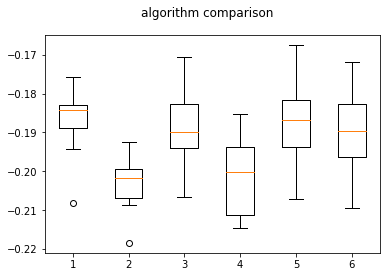

  Description      rmse
0          lr -0.186777
0         knn -0.203304
0          rf -0.188709
0    rf_boost -0.201096
0      gboost -0.187323
0         cbc -0.189770


In [430]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()


linear_models.append(('lr',lr))
linear_models.append(('knn',knn))
non_linear_models.append(('rf',rf))
non_linear_models.append(('rf_boost',rf_boost))
non_linear_models.append(('gboost',gboost))
non_linear_models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [432]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr4.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
knn.fit(x,y)
y_pred=knn.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/knn4.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf.fit(x,y)
y_pred=rf.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf4.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf_boost.fit(x,y)
y_pred=rf_boost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf_boost4.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost4.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
cbc.fit(x,y)
y_pred=cbc.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/cbc4.csv',index=False)

Learning rate set to 0.055186
0:	learn: 0.1856706	total: 3.33ms	remaining: 3.33s
1:	learn: 0.1855454	total: 6.38ms	remaining: 3.18s
2:	learn: 0.1854359	total: 9.38ms	remaining: 3.12s
3:	learn: 0.1853507	total: 12.4ms	remaining: 3.1s
4:	learn: 0.1852853	total: 15.3ms	remaining: 3.04s
5:	learn: 0.1852027	total: 18.2ms	remaining: 3.01s
6:	learn: 0.1850967	total: 21ms	remaining: 2.98s
7:	learn: 0.1849749	total: 24ms	remaining: 2.98s
8:	learn: 0.1848700	total: 26.9ms	remaining: 2.97s
9:	learn: 0.1847682	total: 29.9ms	remaining: 2.96s
10:	learn: 0.1846756	total: 33.3ms	remaining: 2.99s
11:	learn: 0.1845588	total: 36.8ms	remaining: 3.03s
12:	learn: 0.1844510	total: 40ms	remaining: 3.04s
13:	learn: 0.1843700	total: 43ms	remaining: 3.03s
14:	learn: 0.1842502	total: 46.1ms	remaining: 3.02s
15:	learn: 0.1841935	total: 49.1ms	remaining: 3.02s
16:	learn: 0.1840771	total: 52.2ms	remaining: 3.02s
17:	learn: 0.1839740	total: 55.1ms	remaining: 3s
18:	learn: 0.1838602	total: 58.1ms	remaining: 3s
19:	lea

163:	learn: 0.1716974	total: 509ms	remaining: 2.6s
164:	learn: 0.1716217	total: 513ms	remaining: 2.59s
165:	learn: 0.1715661	total: 515ms	remaining: 2.59s
166:	learn: 0.1714825	total: 519ms	remaining: 2.59s
167:	learn: 0.1714034	total: 522ms	remaining: 2.58s
168:	learn: 0.1713260	total: 525ms	remaining: 2.58s
169:	learn: 0.1712343	total: 528ms	remaining: 2.58s
170:	learn: 0.1711335	total: 532ms	remaining: 2.58s
171:	learn: 0.1710501	total: 535ms	remaining: 2.58s
172:	learn: 0.1709960	total: 538ms	remaining: 2.57s
173:	learn: 0.1709177	total: 541ms	remaining: 2.57s
174:	learn: 0.1707956	total: 544ms	remaining: 2.57s
175:	learn: 0.1707170	total: 547ms	remaining: 2.56s
176:	learn: 0.1706546	total: 551ms	remaining: 2.56s
177:	learn: 0.1705796	total: 554ms	remaining: 2.56s
178:	learn: 0.1705064	total: 557ms	remaining: 2.55s
179:	learn: 0.1704360	total: 560ms	remaining: 2.55s
180:	learn: 0.1703377	total: 564ms	remaining: 2.55s
181:	learn: 0.1702798	total: 567ms	remaining: 2.55s
182:	learn: 0

332:	learn: 0.1588482	total: 1.02s	remaining: 2.04s
333:	learn: 0.1587918	total: 1.02s	remaining: 2.04s
334:	learn: 0.1587425	total: 1.02s	remaining: 2.04s
335:	learn: 0.1587022	total: 1.03s	remaining: 2.03s
336:	learn: 0.1586461	total: 1.03s	remaining: 2.03s
337:	learn: 0.1585718	total: 1.03s	remaining: 2.03s
338:	learn: 0.1584804	total: 1.04s	remaining: 2.02s
339:	learn: 0.1583994	total: 1.04s	remaining: 2.02s
340:	learn: 0.1582940	total: 1.05s	remaining: 2.03s
341:	learn: 0.1582305	total: 1.05s	remaining: 2.03s
342:	learn: 0.1581103	total: 1.07s	remaining: 2.04s
343:	learn: 0.1580336	total: 1.07s	remaining: 2.04s
344:	learn: 0.1579756	total: 1.07s	remaining: 2.04s
345:	learn: 0.1578842	total: 1.08s	remaining: 2.04s
346:	learn: 0.1578162	total: 1.08s	remaining: 2.04s
347:	learn: 0.1577789	total: 1.08s	remaining: 2.03s
348:	learn: 0.1576879	total: 1.09s	remaining: 2.03s
349:	learn: 0.1576036	total: 1.09s	remaining: 2.03s
350:	learn: 0.1575603	total: 1.09s	remaining: 2.02s
351:	learn: 

492:	learn: 0.1483572	total: 1.53s	remaining: 1.57s
493:	learn: 0.1483265	total: 1.53s	remaining: 1.57s
494:	learn: 0.1482844	total: 1.53s	remaining: 1.57s
495:	learn: 0.1482362	total: 1.54s	remaining: 1.56s
496:	learn: 0.1481759	total: 1.54s	remaining: 1.56s
497:	learn: 0.1481121	total: 1.54s	remaining: 1.56s
498:	learn: 0.1480324	total: 1.55s	remaining: 1.55s
499:	learn: 0.1479532	total: 1.55s	remaining: 1.55s
500:	learn: 0.1479095	total: 1.55s	remaining: 1.55s
501:	learn: 0.1478471	total: 1.56s	remaining: 1.54s
502:	learn: 0.1477950	total: 1.56s	remaining: 1.54s
503:	learn: 0.1477572	total: 1.56s	remaining: 1.54s
504:	learn: 0.1476739	total: 1.57s	remaining: 1.53s
505:	learn: 0.1476038	total: 1.57s	remaining: 1.53s
506:	learn: 0.1475327	total: 1.57s	remaining: 1.53s
507:	learn: 0.1474537	total: 1.58s	remaining: 1.53s
508:	learn: 0.1474084	total: 1.58s	remaining: 1.52s
509:	learn: 0.1473630	total: 1.58s	remaining: 1.52s
510:	learn: 0.1472887	total: 1.58s	remaining: 1.52s
511:	learn: 

661:	learn: 0.1384134	total: 2.04s	remaining: 1.04s
662:	learn: 0.1383695	total: 2.05s	remaining: 1.04s
663:	learn: 0.1383007	total: 2.05s	remaining: 1.04s
664:	learn: 0.1382487	total: 2.05s	remaining: 1.03s
665:	learn: 0.1381705	total: 2.06s	remaining: 1.03s
666:	learn: 0.1381198	total: 2.06s	remaining: 1.03s
667:	learn: 0.1380664	total: 2.06s	remaining: 1.02s
668:	learn: 0.1380145	total: 2.06s	remaining: 1.02s
669:	learn: 0.1379691	total: 2.07s	remaining: 1.02s
670:	learn: 0.1379192	total: 2.07s	remaining: 1.01s
671:	learn: 0.1378828	total: 2.07s	remaining: 1.01s
672:	learn: 0.1377956	total: 2.08s	remaining: 1.01s
673:	learn: 0.1377714	total: 2.08s	remaining: 1s
674:	learn: 0.1377397	total: 2.08s	remaining: 1s
675:	learn: 0.1376930	total: 2.08s	remaining: 1000ms
676:	learn: 0.1376379	total: 2.09s	remaining: 997ms
677:	learn: 0.1375667	total: 2.09s	remaining: 993ms
678:	learn: 0.1375195	total: 2.1s	remaining: 990ms
679:	learn: 0.1374743	total: 2.1s	remaining: 987ms
680:	learn: 0.13742

821:	learn: 0.1301996	total: 2.55s	remaining: 553ms
822:	learn: 0.1301581	total: 2.56s	remaining: 550ms
823:	learn: 0.1301045	total: 2.56s	remaining: 547ms
824:	learn: 0.1300390	total: 2.56s	remaining: 544ms
825:	learn: 0.1299816	total: 2.57s	remaining: 541ms
826:	learn: 0.1299403	total: 2.57s	remaining: 537ms
827:	learn: 0.1299003	total: 2.57s	remaining: 534ms
828:	learn: 0.1298516	total: 2.58s	remaining: 531ms
829:	learn: 0.1298099	total: 2.58s	remaining: 528ms
830:	learn: 0.1297721	total: 2.58s	remaining: 525ms
831:	learn: 0.1297440	total: 2.58s	remaining: 522ms
832:	learn: 0.1297043	total: 2.59s	remaining: 519ms
833:	learn: 0.1296396	total: 2.59s	remaining: 516ms
834:	learn: 0.1296000	total: 2.59s	remaining: 512ms
835:	learn: 0.1295721	total: 2.6s	remaining: 509ms
836:	learn: 0.1295413	total: 2.6s	remaining: 506ms
837:	learn: 0.1294963	total: 2.6s	remaining: 503ms
838:	learn: 0.1294433	total: 2.6s	remaining: 500ms
839:	learn: 0.1293743	total: 2.61s	remaining: 497ms
840:	learn: 0.12

994:	learn: 0.1222184	total: 3.06s	remaining: 15.4ms
995:	learn: 0.1221647	total: 3.07s	remaining: 12.3ms
996:	learn: 0.1221189	total: 3.07s	remaining: 9.24ms
997:	learn: 0.1220562	total: 3.07s	remaining: 6.16ms
998:	learn: 0.1220097	total: 3.08s	remaining: 3.08ms
999:	learn: 0.1219826	total: 3.08s	remaining: 0us


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 24 columns):
Age                          10000 non-null float64
Attrition_rate               7000 non-null float64
Compensation_and_Benefits    10000 non-null object
Decision_skill_possess       10000 non-null object
Education_Level              10000 non-null object
Gender                       10000 non-null object
Hometown                     10000 non-null object
Pay_Scale                    10000 non-null float64
Post_Level                   10000 non-null object
Relationship_Status          10000 non-null object
Time_of_service              10000 non-null float64
Time_since_promotion         10000 non-null object
Travel_Rate                  10000 non-null object
Unit                         10000 non-null object
VAR1                         10000 non-null object
VAR2                         10000 non-null object
VAR3                         10000 non-null object
VAR4                  

# model performance

In [481]:
df5=df.copy()

In [482]:
df5['VAR2']=df5['VAR2'].apply(lambda x: 0 if x=="miss_value" else x )
#df5['VAR3']=df5['VAR3'].astype("float64")

In [483]:
df5=pd.get_dummies(data=df5,columns=['Decision_skill_possess','Education_Level','Gender','Hometown','Post_Level','Relationship_Status',
      'Time_since_promotion','Travel_Rate',"VAR1","VAR4","VAR5","VAR6","VAR3","VAR7","Compensation_and_Benefits",
        "Pay_Scale","Unit","Work_Life_balance"],drop_first=True)

In [484]:
train=df5[df5['train/test']==1]
test=df5[df5['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 80)
y_train shape is  (7000,)
x_test shape is  (3000, 80)


lr:-0.186691 (0.000086)
knn:-0.204716 (0.000079)
rf:-0.189375 (0.000128)
rf_boost:-0.202597 (0.000141)
gboost:-0.187151 (0.000132)
Learning rate set to 0.054161
0:	learn: 0.1876702	total: 7.09ms	remaining: 7.08s
1:	learn: 0.1875972	total: 13.1ms	remaining: 6.53s
2:	learn: 0.1875187	total: 19.1ms	remaining: 6.34s
3:	learn: 0.1873990	total: 25.1ms	remaining: 6.25s
4:	learn: 0.1872863	total: 30.5ms	remaining: 6.08s
5:	learn: 0.1871594	total: 36.5ms	remaining: 6.04s
6:	learn: 0.1870803	total: 42.5ms	remaining: 6.03s
7:	learn: 0.1869774	total: 48.4ms	remaining: 6s
8:	learn: 0.1868713	total: 54.4ms	remaining: 5.99s
9:	learn: 0.1867673	total: 60.4ms	remaining: 5.97s
10:	learn: 0.1866403	total: 66.3ms	remaining: 5.96s
11:	learn: 0.1865269	total: 72.4ms	remaining: 5.96s
12:	learn: 0.1864376	total: 79ms	remaining: 6s
13:	learn: 0.1863559	total: 84.9ms	remaining: 5.98s
14:	learn: 0.1862527	total: 90.7ms	remaining: 5.96s
15:	learn: 0.1861434	total: 96.8ms	remaining: 5.95s
16:	learn: 0.1860507	tota

159:	learn: 0.1733334	total: 790ms	remaining: 4.15s
160:	learn: 0.1732357	total: 796ms	remaining: 4.15s
161:	learn: 0.1731684	total: 802ms	remaining: 4.15s
162:	learn: 0.1731014	total: 807ms	remaining: 4.14s
163:	learn: 0.1730047	total: 811ms	remaining: 4.13s
164:	learn: 0.1729409	total: 814ms	remaining: 4.12s
165:	learn: 0.1728505	total: 818ms	remaining: 4.11s
166:	learn: 0.1727240	total: 822ms	remaining: 4.1s
167:	learn: 0.1726696	total: 825ms	remaining: 4.08s
168:	learn: 0.1726038	total: 829ms	remaining: 4.07s
169:	learn: 0.1725095	total: 832ms	remaining: 4.06s
170:	learn: 0.1724676	total: 838ms	remaining: 4.06s
171:	learn: 0.1723384	total: 844ms	remaining: 4.06s
172:	learn: 0.1722602	total: 850ms	remaining: 4.06s
173:	learn: 0.1722000	total: 856ms	remaining: 4.06s
174:	learn: 0.1721074	total: 864ms	remaining: 4.07s
175:	learn: 0.1719880	total: 870ms	remaining: 4.08s
176:	learn: 0.1719272	total: 876ms	remaining: 4.07s
177:	learn: 0.1718239	total: 883ms	remaining: 4.08s
178:	learn: 0

337:	learn: 0.1582613	total: 1.8s	remaining: 3.52s
338:	learn: 0.1582204	total: 1.8s	remaining: 3.51s
339:	learn: 0.1581499	total: 1.81s	remaining: 3.51s
340:	learn: 0.1580634	total: 1.81s	remaining: 3.5s
341:	learn: 0.1580078	total: 1.81s	remaining: 3.49s
342:	learn: 0.1579316	total: 1.82s	remaining: 3.48s
343:	learn: 0.1578615	total: 1.82s	remaining: 3.47s
344:	learn: 0.1577775	total: 1.82s	remaining: 3.46s
345:	learn: 0.1576974	total: 1.83s	remaining: 3.45s
346:	learn: 0.1576196	total: 1.83s	remaining: 3.45s
347:	learn: 0.1575789	total: 1.84s	remaining: 3.44s
348:	learn: 0.1574968	total: 1.84s	remaining: 3.44s
349:	learn: 0.1574535	total: 1.85s	remaining: 3.43s
350:	learn: 0.1573668	total: 1.85s	remaining: 3.43s
351:	learn: 0.1572695	total: 1.86s	remaining: 3.43s
352:	learn: 0.1571932	total: 1.87s	remaining: 3.42s
353:	learn: 0.1571619	total: 1.87s	remaining: 3.42s
354:	learn: 0.1570964	total: 1.88s	remaining: 3.41s
355:	learn: 0.1569975	total: 1.89s	remaining: 3.41s
356:	learn: 0.1

521:	learn: 0.1456481	total: 2.82s	remaining: 2.59s
522:	learn: 0.1455962	total: 2.83s	remaining: 2.58s
523:	learn: 0.1455159	total: 2.83s	remaining: 2.57s
524:	learn: 0.1454636	total: 2.84s	remaining: 2.57s
525:	learn: 0.1453958	total: 2.84s	remaining: 2.56s
526:	learn: 0.1453045	total: 2.84s	remaining: 2.55s
527:	learn: 0.1452443	total: 2.85s	remaining: 2.54s
528:	learn: 0.1451750	total: 2.85s	remaining: 2.54s
529:	learn: 0.1451172	total: 2.85s	remaining: 2.53s
530:	learn: 0.1450684	total: 2.86s	remaining: 2.52s
531:	learn: 0.1450035	total: 2.86s	remaining: 2.52s
532:	learn: 0.1449192	total: 2.87s	remaining: 2.51s
533:	learn: 0.1448615	total: 2.88s	remaining: 2.51s
534:	learn: 0.1448129	total: 2.88s	remaining: 2.5s
535:	learn: 0.1447564	total: 2.89s	remaining: 2.5s
536:	learn: 0.1447097	total: 2.89s	remaining: 2.49s
537:	learn: 0.1446345	total: 2.9s	remaining: 2.49s
538:	learn: 0.1445471	total: 2.91s	remaining: 2.49s
539:	learn: 0.1444766	total: 2.91s	remaining: 2.48s
540:	learn: 0.1

699:	learn: 0.1345104	total: 3.82s	remaining: 1.64s
700:	learn: 0.1344661	total: 3.83s	remaining: 1.63s
701:	learn: 0.1343933	total: 3.83s	remaining: 1.63s
702:	learn: 0.1343502	total: 3.84s	remaining: 1.62s
703:	learn: 0.1342965	total: 3.84s	remaining: 1.61s
704:	learn: 0.1342441	total: 3.84s	remaining: 1.61s
705:	learn: 0.1341956	total: 3.85s	remaining: 1.6s
706:	learn: 0.1341646	total: 3.85s	remaining: 1.59s
707:	learn: 0.1340983	total: 3.85s	remaining: 1.59s
708:	learn: 0.1340497	total: 3.86s	remaining: 1.58s
709:	learn: 0.1339848	total: 3.87s	remaining: 1.58s
710:	learn: 0.1339066	total: 3.87s	remaining: 1.57s
711:	learn: 0.1338399	total: 3.88s	remaining: 1.57s
712:	learn: 0.1337901	total: 3.89s	remaining: 1.56s
713:	learn: 0.1337189	total: 3.89s	remaining: 1.56s
714:	learn: 0.1336129	total: 3.9s	remaining: 1.55s
715:	learn: 0.1335475	total: 3.9s	remaining: 1.55s
716:	learn: 0.1334484	total: 3.91s	remaining: 1.54s
717:	learn: 0.1333798	total: 3.92s	remaining: 1.54s
718:	learn: 0.1

903:	learn: 0.1234465	total: 4.85s	remaining: 515ms
904:	learn: 0.1234173	total: 4.86s	remaining: 510ms
905:	learn: 0.1233499	total: 4.86s	remaining: 504ms
906:	learn: 0.1233105	total: 4.86s	remaining: 499ms
907:	learn: 0.1232750	total: 4.87s	remaining: 493ms
908:	learn: 0.1232080	total: 4.87s	remaining: 487ms
909:	learn: 0.1231562	total: 4.87s	remaining: 482ms
910:	learn: 0.1231212	total: 4.87s	remaining: 476ms
911:	learn: 0.1230782	total: 4.88s	remaining: 471ms
912:	learn: 0.1230247	total: 4.88s	remaining: 465ms
913:	learn: 0.1229881	total: 4.88s	remaining: 459ms
914:	learn: 0.1229333	total: 4.88s	remaining: 454ms
915:	learn: 0.1228635	total: 4.89s	remaining: 448ms
916:	learn: 0.1228066	total: 4.89s	remaining: 443ms
917:	learn: 0.1227553	total: 4.89s	remaining: 437ms
918:	learn: 0.1226848	total: 4.9s	remaining: 432ms
919:	learn: 0.1226510	total: 4.9s	remaining: 426ms
920:	learn: 0.1226104	total: 4.9s	remaining: 421ms
921:	learn: 0.1225763	total: 4.91s	remaining: 415ms
922:	learn: 0.1

70:	learn: 0.1797407	total: 350ms	remaining: 4.58s
71:	learn: 0.1796472	total: 355ms	remaining: 4.57s
72:	learn: 0.1795522	total: 358ms	remaining: 4.55s
73:	learn: 0.1794897	total: 362ms	remaining: 4.53s
74:	learn: 0.1794038	total: 366ms	remaining: 4.51s
75:	learn: 0.1792835	total: 369ms	remaining: 4.49s
76:	learn: 0.1791886	total: 372ms	remaining: 4.46s
77:	learn: 0.1790875	total: 376ms	remaining: 4.44s
78:	learn: 0.1789642	total: 378ms	remaining: 4.41s
79:	learn: 0.1789173	total: 381ms	remaining: 4.38s
80:	learn: 0.1788633	total: 384ms	remaining: 4.36s
81:	learn: 0.1787991	total: 387ms	remaining: 4.33s
82:	learn: 0.1786958	total: 392ms	remaining: 4.33s
83:	learn: 0.1786028	total: 398ms	remaining: 4.34s
84:	learn: 0.1785575	total: 403ms	remaining: 4.34s
85:	learn: 0.1784911	total: 409ms	remaining: 4.35s
86:	learn: 0.1783824	total: 415ms	remaining: 4.35s
87:	learn: 0.1783111	total: 421ms	remaining: 4.36s
88:	learn: 0.1782481	total: 427ms	remaining: 4.37s
89:	learn: 0.1781882	total: 433

242:	learn: 0.1655035	total: 1.04s	remaining: 3.23s
243:	learn: 0.1654355	total: 1.04s	remaining: 3.23s
244:	learn: 0.1653325	total: 1.04s	remaining: 3.22s
245:	learn: 0.1652315	total: 1.05s	remaining: 3.21s
246:	learn: 0.1651652	total: 1.05s	remaining: 3.2s
247:	learn: 0.1650975	total: 1.05s	remaining: 3.19s
248:	learn: 0.1649930	total: 1.05s	remaining: 3.18s
249:	learn: 0.1648564	total: 1.06s	remaining: 3.17s
250:	learn: 0.1647524	total: 1.06s	remaining: 3.17s
251:	learn: 0.1646360	total: 1.06s	remaining: 3.16s
252:	learn: 0.1645693	total: 1.07s	remaining: 3.15s
253:	learn: 0.1644990	total: 1.07s	remaining: 3.15s
254:	learn: 0.1643818	total: 1.08s	remaining: 3.15s
255:	learn: 0.1643183	total: 1.08s	remaining: 3.15s
256:	learn: 0.1642134	total: 1.09s	remaining: 3.15s
257:	learn: 0.1641617	total: 1.1s	remaining: 3.16s
258:	learn: 0.1640742	total: 1.1s	remaining: 3.16s
259:	learn: 0.1639815	total: 1.11s	remaining: 3.16s
260:	learn: 0.1638425	total: 1.11s	remaining: 3.16s
261:	learn: 0.1

427:	learn: 0.1513955	total: 2.06s	remaining: 2.76s
428:	learn: 0.1513518	total: 2.07s	remaining: 2.75s
429:	learn: 0.1512810	total: 2.07s	remaining: 2.75s
430:	learn: 0.1512381	total: 2.08s	remaining: 2.74s
431:	learn: 0.1511779	total: 2.08s	remaining: 2.73s
432:	learn: 0.1510925	total: 2.08s	remaining: 2.73s
433:	learn: 0.1510312	total: 2.08s	remaining: 2.72s
434:	learn: 0.1509390	total: 2.09s	remaining: 2.71s
435:	learn: 0.1508949	total: 2.09s	remaining: 2.71s
436:	learn: 0.1508242	total: 2.1s	remaining: 2.7s
437:	learn: 0.1507410	total: 2.1s	remaining: 2.7s
438:	learn: 0.1506905	total: 2.11s	remaining: 2.69s
439:	learn: 0.1505923	total: 2.12s	remaining: 2.69s
440:	learn: 0.1505108	total: 2.12s	remaining: 2.69s
441:	learn: 0.1504131	total: 2.13s	remaining: 2.69s
442:	learn: 0.1503560	total: 2.13s	remaining: 2.68s
443:	learn: 0.1502997	total: 2.14s	remaining: 2.68s
444:	learn: 0.1502361	total: 2.15s	remaining: 2.68s
445:	learn: 0.1501723	total: 2.15s	remaining: 2.67s
446:	learn: 0.15

600:	learn: 0.1400817	total: 2.92s	remaining: 1.94s
601:	learn: 0.1399935	total: 2.93s	remaining: 1.94s
602:	learn: 0.1399177	total: 2.94s	remaining: 1.93s
603:	learn: 0.1398688	total: 2.94s	remaining: 1.93s
604:	learn: 0.1398117	total: 2.95s	remaining: 1.92s
605:	learn: 0.1397686	total: 2.95s	remaining: 1.92s
606:	learn: 0.1396780	total: 2.96s	remaining: 1.92s
607:	learn: 0.1396235	total: 2.96s	remaining: 1.91s
608:	learn: 0.1395136	total: 2.97s	remaining: 1.91s
609:	learn: 0.1394377	total: 2.97s	remaining: 1.9s
610:	learn: 0.1393862	total: 2.98s	remaining: 1.9s
611:	learn: 0.1393026	total: 2.99s	remaining: 1.89s
612:	learn: 0.1392466	total: 2.99s	remaining: 1.89s
613:	learn: 0.1391803	total: 3s	remaining: 1.88s
614:	learn: 0.1391022	total: 3s	remaining: 1.88s
615:	learn: 0.1390365	total: 3.01s	remaining: 1.88s
616:	learn: 0.1389422	total: 3.02s	remaining: 1.87s
617:	learn: 0.1388898	total: 3.02s	remaining: 1.87s
618:	learn: 0.1388524	total: 3.03s	remaining: 1.86s
619:	learn: 0.138790

764:	learn: 0.1304184	total: 3.94s	remaining: 1.21s
765:	learn: 0.1303767	total: 3.94s	remaining: 1.2s
766:	learn: 0.1303067	total: 3.95s	remaining: 1.2s
767:	learn: 0.1302690	total: 3.96s	remaining: 1.19s
768:	learn: 0.1301808	total: 3.96s	remaining: 1.19s
769:	learn: 0.1300955	total: 3.97s	remaining: 1.19s
770:	learn: 0.1300202	total: 3.97s	remaining: 1.18s
771:	learn: 0.1299486	total: 3.98s	remaining: 1.18s
772:	learn: 0.1299115	total: 3.99s	remaining: 1.17s
773:	learn: 0.1298105	total: 3.99s	remaining: 1.17s
774:	learn: 0.1297481	total: 4s	remaining: 1.16s
775:	learn: 0.1296629	total: 4.01s	remaining: 1.16s
776:	learn: 0.1296099	total: 4.01s	remaining: 1.15s
777:	learn: 0.1295392	total: 4.02s	remaining: 1.15s
778:	learn: 0.1294792	total: 4.02s	remaining: 1.14s
779:	learn: 0.1294385	total: 4.03s	remaining: 1.14s
780:	learn: 0.1294068	total: 4.04s	remaining: 1.13s
781:	learn: 0.1293419	total: 4.04s	remaining: 1.13s
782:	learn: 0.1293033	total: 4.05s	remaining: 1.12s
783:	learn: 0.129

925:	learn: 0.1219436	total: 4.78s	remaining: 382ms
926:	learn: 0.1218792	total: 4.79s	remaining: 377ms
927:	learn: 0.1218254	total: 4.79s	remaining: 372ms
928:	learn: 0.1217854	total: 4.8s	remaining: 367ms
929:	learn: 0.1217251	total: 4.8s	remaining: 361ms
930:	learn: 0.1216674	total: 4.8s	remaining: 356ms
931:	learn: 0.1216337	total: 4.8s	remaining: 351ms
932:	learn: 0.1215623	total: 4.81s	remaining: 345ms
933:	learn: 0.1215205	total: 4.82s	remaining: 340ms
934:	learn: 0.1214677	total: 4.82s	remaining: 335ms
935:	learn: 0.1214180	total: 4.83s	remaining: 330ms
936:	learn: 0.1213259	total: 4.83s	remaining: 325ms
937:	learn: 0.1212861	total: 4.84s	remaining: 320ms
938:	learn: 0.1212435	total: 4.84s	remaining: 315ms
939:	learn: 0.1211881	total: 4.85s	remaining: 310ms
940:	learn: 0.1211351	total: 4.86s	remaining: 305ms
941:	learn: 0.1211019	total: 4.86s	remaining: 299ms
942:	learn: 0.1210507	total: 4.87s	remaining: 294ms
943:	learn: 0.1210009	total: 4.88s	remaining: 289ms
944:	learn: 0.12

88:	learn: 0.1782635	total: 516ms	remaining: 5.28s
89:	learn: 0.1781619	total: 520ms	remaining: 5.26s
90:	learn: 0.1780708	total: 524ms	remaining: 5.24s
91:	learn: 0.1780051	total: 528ms	remaining: 5.21s
92:	learn: 0.1779542	total: 532ms	remaining: 5.18s
93:	learn: 0.1778481	total: 535ms	remaining: 5.16s
94:	learn: 0.1777509	total: 538ms	remaining: 5.13s
95:	learn: 0.1776360	total: 542ms	remaining: 5.11s
96:	learn: 0.1775812	total: 549ms	remaining: 5.11s
97:	learn: 0.1775111	total: 553ms	remaining: 5.09s
98:	learn: 0.1774001	total: 559ms	remaining: 5.08s
99:	learn: 0.1772998	total: 565ms	remaining: 5.08s
100:	learn: 0.1772090	total: 571ms	remaining: 5.08s
101:	learn: 0.1770945	total: 577ms	remaining: 5.08s
102:	learn: 0.1770113	total: 583ms	remaining: 5.07s
103:	learn: 0.1769325	total: 588ms	remaining: 5.07s
104:	learn: 0.1768707	total: 594ms	remaining: 5.06s
105:	learn: 0.1768154	total: 600ms	remaining: 5.06s
106:	learn: 0.1766724	total: 606ms	remaining: 5.06s
107:	learn: 0.1765969	to

271:	learn: 0.1624345	total: 1.53s	remaining: 4.08s
272:	learn: 0.1623231	total: 1.53s	remaining: 4.07s
273:	learn: 0.1622420	total: 1.54s	remaining: 4.07s
274:	learn: 0.1621889	total: 1.54s	remaining: 4.07s
275:	learn: 0.1621102	total: 1.55s	remaining: 4.06s
276:	learn: 0.1620582	total: 1.55s	remaining: 4.06s
277:	learn: 0.1619889	total: 1.56s	remaining: 4.05s
278:	learn: 0.1619186	total: 1.56s	remaining: 4.05s
279:	learn: 0.1618590	total: 1.57s	remaining: 4.04s
280:	learn: 0.1617740	total: 1.57s	remaining: 4.03s
281:	learn: 0.1616792	total: 1.58s	remaining: 4.02s
282:	learn: 0.1616333	total: 1.58s	remaining: 4.02s
283:	learn: 0.1615753	total: 1.59s	remaining: 4.01s
284:	learn: 0.1615096	total: 1.59s	remaining: 4s
285:	learn: 0.1614210	total: 1.6s	remaining: 4s
286:	learn: 0.1613433	total: 1.6s	remaining: 3.99s
287:	learn: 0.1612785	total: 1.61s	remaining: 3.98s
288:	learn: 0.1612387	total: 1.62s	remaining: 3.98s
289:	learn: 0.1611835	total: 1.62s	remaining: 3.97s
290:	learn: 0.161101

454:	learn: 0.1491446	total: 2.55s	remaining: 3.05s
455:	learn: 0.1490938	total: 2.55s	remaining: 3.05s
456:	learn: 0.1490395	total: 2.56s	remaining: 3.04s
457:	learn: 0.1489445	total: 2.56s	remaining: 3.03s
458:	learn: 0.1488838	total: 2.57s	remaining: 3.03s
459:	learn: 0.1488188	total: 2.57s	remaining: 3.02s
460:	learn: 0.1487368	total: 2.58s	remaining: 3.02s
461:	learn: 0.1486506	total: 2.58s	remaining: 3.01s
462:	learn: 0.1485682	total: 2.59s	remaining: 3s
463:	learn: 0.1484925	total: 2.6s	remaining: 3s
464:	learn: 0.1484112	total: 2.6s	remaining: 2.99s
465:	learn: 0.1483600	total: 2.6s	remaining: 2.98s
466:	learn: 0.1482766	total: 2.61s	remaining: 2.98s
467:	learn: 0.1482057	total: 2.62s	remaining: 2.97s
468:	learn: 0.1481386	total: 2.62s	remaining: 2.97s
469:	learn: 0.1480766	total: 2.63s	remaining: 2.96s
470:	learn: 0.1480136	total: 2.63s	remaining: 2.96s
471:	learn: 0.1479213	total: 2.64s	remaining: 2.95s
472:	learn: 0.1478250	total: 2.64s	remaining: 2.95s
473:	learn: 0.1477670

638:	learn: 0.1371209	total: 3.58s	remaining: 2.02s
639:	learn: 0.1370526	total: 3.58s	remaining: 2.02s
640:	learn: 0.1369877	total: 3.59s	remaining: 2.01s
641:	learn: 0.1369375	total: 3.59s	remaining: 2s
642:	learn: 0.1368922	total: 3.6s	remaining: 2s
643:	learn: 0.1368361	total: 3.6s	remaining: 1.99s
644:	learn: 0.1367897	total: 3.6s	remaining: 1.98s
645:	learn: 0.1367379	total: 3.61s	remaining: 1.98s
646:	learn: 0.1366975	total: 3.61s	remaining: 1.97s
647:	learn: 0.1366326	total: 3.62s	remaining: 1.96s
648:	learn: 0.1365779	total: 3.62s	remaining: 1.96s
649:	learn: 0.1365072	total: 3.63s	remaining: 1.95s
650:	learn: 0.1364209	total: 3.63s	remaining: 1.95s
651:	learn: 0.1363554	total: 3.64s	remaining: 1.94s
652:	learn: 0.1362836	total: 3.64s	remaining: 1.94s
653:	learn: 0.1362426	total: 3.65s	remaining: 1.93s
654:	learn: 0.1362053	total: 3.65s	remaining: 1.92s
655:	learn: 0.1361302	total: 3.66s	remaining: 1.92s
656:	learn: 0.1360758	total: 3.67s	remaining: 1.91s
657:	learn: 0.1360180

817:	learn: 0.1272951	total: 4.58s	remaining: 1.02s
818:	learn: 0.1272372	total: 4.59s	remaining: 1.01s
819:	learn: 0.1271662	total: 4.59s	remaining: 1.01s
820:	learn: 0.1271110	total: 4.59s	remaining: 1s
821:	learn: 0.1270653	total: 4.6s	remaining: 996ms
822:	learn: 0.1270007	total: 4.6s	remaining: 990ms
823:	learn: 0.1269406	total: 4.6s	remaining: 983ms
824:	learn: 0.1269096	total: 4.61s	remaining: 977ms
825:	learn: 0.1268421	total: 4.61s	remaining: 971ms
826:	learn: 0.1267687	total: 4.61s	remaining: 965ms
827:	learn: 0.1267049	total: 4.62s	remaining: 959ms
828:	learn: 0.1266665	total: 4.62s	remaining: 953ms
829:	learn: 0.1265864	total: 4.62s	remaining: 947ms
830:	learn: 0.1265096	total: 4.63s	remaining: 941ms
831:	learn: 0.1264496	total: 4.63s	remaining: 935ms
832:	learn: 0.1263919	total: 4.64s	remaining: 930ms
833:	learn: 0.1263543	total: 4.64s	remaining: 924ms
834:	learn: 0.1263097	total: 4.65s	remaining: 919ms
835:	learn: 0.1262455	total: 4.66s	remaining: 913ms
836:	learn: 0.1261

Learning rate set to 0.054161
0:	learn: 0.1850746	total: 9.8ms	remaining: 9.79s
1:	learn: 0.1849963	total: 16.3ms	remaining: 8.15s
2:	learn: 0.1849085	total: 22.8ms	remaining: 7.59s
3:	learn: 0.1848013	total: 29.5ms	remaining: 7.35s
4:	learn: 0.1846779	total: 35.7ms	remaining: 7.11s
5:	learn: 0.1845700	total: 42.1ms	remaining: 6.97s
6:	learn: 0.1844558	total: 48.3ms	remaining: 6.86s
7:	learn: 0.1843422	total: 54.9ms	remaining: 6.81s
8:	learn: 0.1842525	total: 61.1ms	remaining: 6.73s
9:	learn: 0.1841492	total: 68.1ms	remaining: 6.75s
10:	learn: 0.1840092	total: 74.4ms	remaining: 6.69s
11:	learn: 0.1839113	total: 80.8ms	remaining: 6.65s
12:	learn: 0.1838297	total: 87.1ms	remaining: 6.62s
13:	learn: 0.1837426	total: 93.9ms	remaining: 6.61s
14:	learn: 0.1836293	total: 100ms	remaining: 6.58s
15:	learn: 0.1835509	total: 107ms	remaining: 6.56s
16:	learn: 0.1834516	total: 114ms	remaining: 6.58s
17:	learn: 0.1832989	total: 121ms	remaining: 6.57s
18:	learn: 0.1831900	total: 127ms	remaining: 6.53

171:	learn: 0.1700396	total: 1.01s	remaining: 4.85s
172:	learn: 0.1699549	total: 1.01s	remaining: 4.83s
173:	learn: 0.1698202	total: 1.01s	remaining: 4.81s
174:	learn: 0.1697322	total: 1.02s	remaining: 4.79s
175:	learn: 0.1696638	total: 1.02s	remaining: 4.77s
176:	learn: 0.1696046	total: 1.02s	remaining: 4.75s
177:	learn: 0.1695086	total: 1.02s	remaining: 4.73s
178:	learn: 0.1693958	total: 1.03s	remaining: 4.72s
179:	learn: 0.1693390	total: 1.03s	remaining: 4.7s
180:	learn: 0.1692601	total: 1.03s	remaining: 4.68s
181:	learn: 0.1691279	total: 1.04s	remaining: 4.67s
182:	learn: 0.1690593	total: 1.04s	remaining: 4.65s
183:	learn: 0.1689928	total: 1.04s	remaining: 4.64s
184:	learn: 0.1689405	total: 1.05s	remaining: 4.62s
185:	learn: 0.1688531	total: 1.05s	remaining: 4.62s
186:	learn: 0.1687207	total: 1.06s	remaining: 4.61s
187:	learn: 0.1686316	total: 1.07s	remaining: 4.61s
188:	learn: 0.1685553	total: 1.07s	remaining: 4.61s
189:	learn: 0.1684343	total: 1.08s	remaining: 4.59s
190:	learn: 0

354:	learn: 0.1555401	total: 2.02s	remaining: 3.67s
355:	learn: 0.1554782	total: 2.03s	remaining: 3.67s
356:	learn: 0.1553706	total: 2.03s	remaining: 3.66s
357:	learn: 0.1552816	total: 2.04s	remaining: 3.65s
358:	learn: 0.1552140	total: 2.04s	remaining: 3.64s
359:	learn: 0.1551761	total: 2.04s	remaining: 3.63s
360:	learn: 0.1550776	total: 2.05s	remaining: 3.63s
361:	learn: 0.1549754	total: 2.05s	remaining: 3.62s
362:	learn: 0.1548899	total: 2.06s	remaining: 3.61s
363:	learn: 0.1548478	total: 2.06s	remaining: 3.61s
364:	learn: 0.1547915	total: 2.07s	remaining: 3.6s
365:	learn: 0.1547349	total: 2.07s	remaining: 3.59s
366:	learn: 0.1546790	total: 2.08s	remaining: 3.59s
367:	learn: 0.1546020	total: 2.09s	remaining: 3.58s
368:	learn: 0.1545206	total: 2.09s	remaining: 3.58s
369:	learn: 0.1544281	total: 2.1s	remaining: 3.57s
370:	learn: 0.1543687	total: 2.1s	remaining: 3.57s
371:	learn: 0.1542922	total: 2.11s	remaining: 3.56s
372:	learn: 0.1542389	total: 2.12s	remaining: 3.56s
373:	learn: 0.1

541:	learn: 0.1427917	total: 2.87s	remaining: 2.42s
542:	learn: 0.1427467	total: 2.87s	remaining: 2.42s
543:	learn: 0.1426659	total: 2.87s	remaining: 2.41s
544:	learn: 0.1426271	total: 2.88s	remaining: 2.4s
545:	learn: 0.1425527	total: 2.88s	remaining: 2.39s
546:	learn: 0.1424775	total: 2.88s	remaining: 2.39s
547:	learn: 0.1423914	total: 2.88s	remaining: 2.38s
548:	learn: 0.1423411	total: 2.89s	remaining: 2.37s
549:	learn: 0.1422645	total: 2.89s	remaining: 2.36s
550:	learn: 0.1421953	total: 2.89s	remaining: 2.36s
551:	learn: 0.1421071	total: 2.9s	remaining: 2.35s
552:	learn: 0.1420413	total: 2.9s	remaining: 2.34s
553:	learn: 0.1419904	total: 2.9s	remaining: 2.34s
554:	learn: 0.1418924	total: 2.9s	remaining: 2.33s
555:	learn: 0.1418352	total: 2.91s	remaining: 2.32s
556:	learn: 0.1417699	total: 2.91s	remaining: 2.31s
557:	learn: 0.1417136	total: 2.91s	remaining: 2.31s
558:	learn: 0.1416666	total: 2.92s	remaining: 2.3s
559:	learn: 0.1415769	total: 2.92s	remaining: 2.29s
560:	learn: 0.1415

717:	learn: 0.1322161	total: 3.55s	remaining: 1.39s
718:	learn: 0.1321624	total: 3.56s	remaining: 1.39s
719:	learn: 0.1321185	total: 3.56s	remaining: 1.38s
720:	learn: 0.1320797	total: 3.56s	remaining: 1.38s
721:	learn: 0.1320308	total: 3.57s	remaining: 1.37s
722:	learn: 0.1320038	total: 3.57s	remaining: 1.37s
723:	learn: 0.1319440	total: 3.58s	remaining: 1.36s
724:	learn: 0.1318589	total: 3.58s	remaining: 1.36s
725:	learn: 0.1318005	total: 3.58s	remaining: 1.35s
726:	learn: 0.1317686	total: 3.58s	remaining: 1.35s
727:	learn: 0.1316982	total: 3.59s	remaining: 1.34s
728:	learn: 0.1316541	total: 3.59s	remaining: 1.33s
729:	learn: 0.1315940	total: 3.59s	remaining: 1.33s
730:	learn: 0.1315419	total: 3.6s	remaining: 1.32s
731:	learn: 0.1315116	total: 3.6s	remaining: 1.32s
732:	learn: 0.1314680	total: 3.6s	remaining: 1.31s
733:	learn: 0.1314011	total: 3.61s	remaining: 1.31s
734:	learn: 0.1313438	total: 3.61s	remaining: 1.3s
735:	learn: 0.1312962	total: 3.61s	remaining: 1.29s
736:	learn: 0.13

905:	learn: 0.1224655	total: 4.39s	remaining: 456ms
906:	learn: 0.1224451	total: 4.4s	remaining: 451ms
907:	learn: 0.1223924	total: 4.4s	remaining: 446ms
908:	learn: 0.1223416	total: 4.41s	remaining: 441ms
909:	learn: 0.1222848	total: 4.41s	remaining: 436ms
910:	learn: 0.1222459	total: 4.41s	remaining: 431ms
911:	learn: 0.1221915	total: 4.42s	remaining: 426ms
912:	learn: 0.1221193	total: 4.42s	remaining: 421ms
913:	learn: 0.1220538	total: 4.42s	remaining: 416ms
914:	learn: 0.1219972	total: 4.43s	remaining: 411ms
915:	learn: 0.1219297	total: 4.43s	remaining: 406ms
916:	learn: 0.1218454	total: 4.44s	remaining: 402ms
917:	learn: 0.1217816	total: 4.44s	remaining: 397ms
918:	learn: 0.1217302	total: 4.45s	remaining: 392ms
919:	learn: 0.1216683	total: 4.45s	remaining: 387ms
920:	learn: 0.1216396	total: 4.46s	remaining: 383ms
921:	learn: 0.1216164	total: 4.46s	remaining: 378ms
922:	learn: 0.1215650	total: 4.47s	remaining: 373ms
923:	learn: 0.1215127	total: 4.48s	remaining: 368ms
924:	learn: 0.

93:	learn: 0.1783800	total: 543ms	remaining: 5.24s
94:	learn: 0.1783015	total: 549ms	remaining: 5.23s
95:	learn: 0.1782319	total: 555ms	remaining: 5.22s
96:	learn: 0.1781291	total: 559ms	remaining: 5.21s
97:	learn: 0.1780497	total: 563ms	remaining: 5.18s
98:	learn: 0.1779220	total: 567ms	remaining: 5.16s
99:	learn: 0.1778322	total: 570ms	remaining: 5.13s
100:	learn: 0.1777898	total: 574ms	remaining: 5.11s
101:	learn: 0.1776794	total: 577ms	remaining: 5.08s
102:	learn: 0.1775943	total: 581ms	remaining: 5.05s
103:	learn: 0.1775105	total: 583ms	remaining: 5.03s
104:	learn: 0.1774336	total: 587ms	remaining: 5s
105:	learn: 0.1773761	total: 592ms	remaining: 4.99s
106:	learn: 0.1772891	total: 596ms	remaining: 4.97s
107:	learn: 0.1772224	total: 602ms	remaining: 4.97s
108:	learn: 0.1771555	total: 608ms	remaining: 4.97s
109:	learn: 0.1770390	total: 614ms	remaining: 4.96s
110:	learn: 0.1769401	total: 618ms	remaining: 4.95s
111:	learn: 0.1768494	total: 624ms	remaining: 4.95s
112:	learn: 0.1767891	

253:	learn: 0.1645133	total: 1.4s	remaining: 4.11s
254:	learn: 0.1644259	total: 1.4s	remaining: 4.1s
255:	learn: 0.1643549	total: 1.41s	remaining: 4.09s
256:	learn: 0.1642288	total: 1.41s	remaining: 4.08s
257:	learn: 0.1641595	total: 1.42s	remaining: 4.07s
258:	learn: 0.1640885	total: 1.42s	remaining: 4.06s
259:	learn: 0.1640119	total: 1.42s	remaining: 4.05s
260:	learn: 0.1639325	total: 1.42s	remaining: 4.03s
261:	learn: 0.1638549	total: 1.43s	remaining: 4.02s
262:	learn: 0.1638082	total: 1.43s	remaining: 4.02s
263:	learn: 0.1636934	total: 1.44s	remaining: 4.01s
264:	learn: 0.1636154	total: 1.45s	remaining: 4.01s
265:	learn: 0.1635134	total: 1.45s	remaining: 4s
266:	learn: 0.1634258	total: 1.46s	remaining: 4s
267:	learn: 0.1633255	total: 1.46s	remaining: 4s
268:	learn: 0.1632660	total: 1.47s	remaining: 3.99s
269:	learn: 0.1632132	total: 1.48s	remaining: 3.99s
270:	learn: 0.1631402	total: 1.48s	remaining: 3.98s
271:	learn: 0.1630576	total: 1.49s	remaining: 3.98s
272:	learn: 0.1629648	to

441:	learn: 0.1503183	total: 2.41s	remaining: 3.04s
442:	learn: 0.1502783	total: 2.42s	remaining: 3.04s
443:	learn: 0.1501971	total: 2.42s	remaining: 3.03s
444:	learn: 0.1501237	total: 2.42s	remaining: 3.02s
445:	learn: 0.1500486	total: 2.43s	remaining: 3.01s
446:	learn: 0.1499453	total: 2.43s	remaining: 3.01s
447:	learn: 0.1498646	total: 2.43s	remaining: 3s
448:	learn: 0.1497873	total: 2.44s	remaining: 2.99s
449:	learn: 0.1497617	total: 2.44s	remaining: 2.98s
450:	learn: 0.1497148	total: 2.44s	remaining: 2.97s
451:	learn: 0.1496157	total: 2.45s	remaining: 2.97s
452:	learn: 0.1495651	total: 2.46s	remaining: 2.96s
453:	learn: 0.1494909	total: 2.46s	remaining: 2.96s
454:	learn: 0.1493683	total: 2.46s	remaining: 2.95s
455:	learn: 0.1492918	total: 2.47s	remaining: 2.95s
456:	learn: 0.1492100	total: 2.48s	remaining: 2.94s
457:	learn: 0.1491641	total: 2.48s	remaining: 2.94s
458:	learn: 0.1490956	total: 2.49s	remaining: 2.93s
459:	learn: 0.1490056	total: 2.49s	remaining: 2.93s
460:	learn: 0.1

603:	learn: 0.1400707	total: 3.26s	remaining: 2.14s
604:	learn: 0.1400290	total: 3.27s	remaining: 2.13s
605:	learn: 0.1399629	total: 3.27s	remaining: 2.13s
606:	learn: 0.1399096	total: 3.27s	remaining: 2.12s
607:	learn: 0.1398729	total: 3.28s	remaining: 2.11s
608:	learn: 0.1397986	total: 3.28s	remaining: 2.1s
609:	learn: 0.1397122	total: 3.28s	remaining: 2.1s
610:	learn: 0.1396682	total: 3.29s	remaining: 2.09s
611:	learn: 0.1395813	total: 3.29s	remaining: 2.08s
612:	learn: 0.1394973	total: 3.29s	remaining: 2.08s
613:	learn: 0.1394583	total: 3.3s	remaining: 2.07s
614:	learn: 0.1393985	total: 3.31s	remaining: 2.07s
615:	learn: 0.1393166	total: 3.31s	remaining: 2.06s
616:	learn: 0.1392589	total: 3.32s	remaining: 2.06s
617:	learn: 0.1392138	total: 3.32s	remaining: 2.05s
618:	learn: 0.1391707	total: 3.33s	remaining: 2.05s
619:	learn: 0.1391311	total: 3.33s	remaining: 2.04s
620:	learn: 0.1390540	total: 3.34s	remaining: 2.04s
621:	learn: 0.1390035	total: 3.35s	remaining: 2.03s
622:	learn: 0.1

763:	learn: 0.1307358	total: 4.11s	remaining: 1.27s
764:	learn: 0.1306930	total: 4.12s	remaining: 1.26s
765:	learn: 0.1306467	total: 4.12s	remaining: 1.26s
766:	learn: 0.1305861	total: 4.12s	remaining: 1.25s
767:	learn: 0.1305506	total: 4.13s	remaining: 1.25s
768:	learn: 0.1305000	total: 4.13s	remaining: 1.24s
769:	learn: 0.1304417	total: 4.13s	remaining: 1.23s
770:	learn: 0.1303719	total: 4.14s	remaining: 1.23s
771:	learn: 0.1303189	total: 4.14s	remaining: 1.22s
772:	learn: 0.1302680	total: 4.14s	remaining: 1.22s
773:	learn: 0.1301993	total: 4.15s	remaining: 1.21s
774:	learn: 0.1301083	total: 4.16s	remaining: 1.21s
775:	learn: 0.1300696	total: 4.16s	remaining: 1.2s
776:	learn: 0.1299900	total: 4.17s	remaining: 1.2s
777:	learn: 0.1299516	total: 4.17s	remaining: 1.19s
778:	learn: 0.1298936	total: 4.18s	remaining: 1.19s
779:	learn: 0.1298257	total: 4.19s	remaining: 1.18s
780:	learn: 0.1297676	total: 4.2s	remaining: 1.18s
781:	learn: 0.1297121	total: 4.2s	remaining: 1.17s
782:	learn: 0.12

950:	learn: 0.1208049	total: 5.14s	remaining: 265ms
951:	learn: 0.1207511	total: 5.15s	remaining: 260ms
952:	learn: 0.1207030	total: 5.15s	remaining: 254ms
953:	learn: 0.1206335	total: 5.16s	remaining: 249ms
954:	learn: 0.1205738	total: 5.16s	remaining: 243ms
955:	learn: 0.1205280	total: 5.17s	remaining: 238ms
956:	learn: 0.1205039	total: 5.17s	remaining: 232ms
957:	learn: 0.1204500	total: 5.17s	remaining: 227ms
958:	learn: 0.1204076	total: 5.18s	remaining: 221ms
959:	learn: 0.1203516	total: 5.19s	remaining: 216ms
960:	learn: 0.1202974	total: 5.19s	remaining: 211ms
961:	learn: 0.1202694	total: 5.2s	remaining: 205ms
962:	learn: 0.1202011	total: 5.2s	remaining: 200ms
963:	learn: 0.1201337	total: 5.21s	remaining: 194ms
964:	learn: 0.1201143	total: 5.21s	remaining: 189ms
965:	learn: 0.1200303	total: 5.21s	remaining: 184ms
966:	learn: 0.1199875	total: 5.22s	remaining: 178ms
967:	learn: 0.1199539	total: 5.23s	remaining: 173ms
968:	learn: 0.1199026	total: 5.23s	remaining: 167ms
969:	learn: 0.

112:	learn: 0.1758378	total: 668ms	remaining: 5.25s
113:	learn: 0.1757596	total: 674ms	remaining: 5.24s
114:	learn: 0.1756774	total: 678ms	remaining: 5.22s
115:	learn: 0.1755869	total: 682ms	remaining: 5.2s
116:	learn: 0.1755060	total: 686ms	remaining: 5.18s
117:	learn: 0.1754484	total: 690ms	remaining: 5.15s
118:	learn: 0.1753124	total: 693ms	remaining: 5.13s
119:	learn: 0.1752026	total: 696ms	remaining: 5.1s
120:	learn: 0.1751136	total: 699ms	remaining: 5.08s
121:	learn: 0.1750174	total: 702ms	remaining: 5.05s
122:	learn: 0.1749357	total: 707ms	remaining: 5.04s
123:	learn: 0.1747744	total: 713ms	remaining: 5.04s
124:	learn: 0.1746701	total: 717ms	remaining: 5.02s
125:	learn: 0.1745888	total: 723ms	remaining: 5.01s
126:	learn: 0.1744991	total: 729ms	remaining: 5.01s
127:	learn: 0.1744506	total: 734ms	remaining: 5s
128:	learn: 0.1743348	total: 740ms	remaining: 4.99s
129:	learn: 0.1742480	total: 745ms	remaining: 4.99s
130:	learn: 0.1741648	total: 751ms	remaining: 4.98s
131:	learn: 0.174

296:	learn: 0.1608119	total: 1.68s	remaining: 3.98s
297:	learn: 0.1607668	total: 1.69s	remaining: 3.98s
298:	learn: 0.1606920	total: 1.7s	remaining: 3.98s
299:	learn: 0.1606338	total: 1.7s	remaining: 3.97s
300:	learn: 0.1605569	total: 1.71s	remaining: 3.96s
301:	learn: 0.1605004	total: 1.71s	remaining: 3.95s
302:	learn: 0.1604272	total: 1.71s	remaining: 3.94s
303:	learn: 0.1603589	total: 1.72s	remaining: 3.93s
304:	learn: 0.1602937	total: 1.72s	remaining: 3.92s
305:	learn: 0.1602604	total: 1.72s	remaining: 3.9s
306:	learn: 0.1601430	total: 1.73s	remaining: 3.9s
307:	learn: 0.1600818	total: 1.73s	remaining: 3.89s
308:	learn: 0.1600050	total: 1.74s	remaining: 3.89s
309:	learn: 0.1599610	total: 1.74s	remaining: 3.88s
310:	learn: 0.1598670	total: 1.75s	remaining: 3.88s
311:	learn: 0.1598147	total: 1.75s	remaining: 3.87s
312:	learn: 0.1597490	total: 1.76s	remaining: 3.87s
313:	learn: 0.1596553	total: 1.77s	remaining: 3.86s
314:	learn: 0.1595921	total: 1.77s	remaining: 3.86s
315:	learn: 0.15

456:	learn: 0.1486912	total: 2.54s	remaining: 3.01s
457:	learn: 0.1486015	total: 2.54s	remaining: 3s
458:	learn: 0.1485532	total: 2.54s	remaining: 3s
459:	learn: 0.1484816	total: 2.55s	remaining: 2.99s
460:	learn: 0.1484000	total: 2.55s	remaining: 2.98s
461:	learn: 0.1483384	total: 2.55s	remaining: 2.97s
462:	learn: 0.1482743	total: 2.56s	remaining: 2.96s
463:	learn: 0.1482016	total: 2.56s	remaining: 2.96s
464:	learn: 0.1481267	total: 2.56s	remaining: 2.95s
465:	learn: 0.1480562	total: 2.57s	remaining: 2.95s
466:	learn: 0.1479861	total: 2.58s	remaining: 2.94s
467:	learn: 0.1479344	total: 2.58s	remaining: 2.94s
468:	learn: 0.1478647	total: 2.59s	remaining: 2.93s
469:	learn: 0.1477697	total: 2.6s	remaining: 2.93s
470:	learn: 0.1476753	total: 2.6s	remaining: 2.92s
471:	learn: 0.1475785	total: 2.61s	remaining: 2.92s
472:	learn: 0.1474875	total: 2.61s	remaining: 2.91s
473:	learn: 0.1474444	total: 2.62s	remaining: 2.91s
474:	learn: 0.1473861	total: 2.63s	remaining: 2.9s
475:	learn: 0.1473181

643:	learn: 0.1370684	total: 3.56s	remaining: 1.97s
644:	learn: 0.1370223	total: 3.56s	remaining: 1.96s
645:	learn: 0.1369566	total: 3.57s	remaining: 1.96s
646:	learn: 0.1368980	total: 3.57s	remaining: 1.95s
647:	learn: 0.1368397	total: 3.58s	remaining: 1.94s
648:	learn: 0.1367948	total: 3.58s	remaining: 1.94s
649:	learn: 0.1367144	total: 3.58s	remaining: 1.93s
650:	learn: 0.1366575	total: 3.59s	remaining: 1.92s
651:	learn: 0.1365919	total: 3.59s	remaining: 1.92s
652:	learn: 0.1365413	total: 3.6s	remaining: 1.91s
653:	learn: 0.1364863	total: 3.6s	remaining: 1.9s
654:	learn: 0.1364277	total: 3.6s	remaining: 1.9s
655:	learn: 0.1363435	total: 3.61s	remaining: 1.89s
656:	learn: 0.1363245	total: 3.62s	remaining: 1.89s
657:	learn: 0.1362683	total: 3.62s	remaining: 1.88s
658:	learn: 0.1361917	total: 3.63s	remaining: 1.88s
659:	learn: 0.1361145	total: 3.63s	remaining: 1.87s
660:	learn: 0.1360801	total: 3.64s	remaining: 1.87s
661:	learn: 0.1359885	total: 3.65s	remaining: 1.86s
662:	learn: 0.135

824:	learn: 0.1265183	total: 4.58s	remaining: 971ms
825:	learn: 0.1264755	total: 4.58s	remaining: 966ms
826:	learn: 0.1264252	total: 4.59s	remaining: 960ms
827:	learn: 0.1263627	total: 4.59s	remaining: 954ms
828:	learn: 0.1263164	total: 4.59s	remaining: 948ms
829:	learn: 0.1262791	total: 4.6s	remaining: 942ms
830:	learn: 0.1262156	total: 4.6s	remaining: 936ms
831:	learn: 0.1261629	total: 4.61s	remaining: 930ms
832:	learn: 0.1261101	total: 4.61s	remaining: 924ms
833:	learn: 0.1260692	total: 4.61s	remaining: 918ms
834:	learn: 0.1260159	total: 4.62s	remaining: 913ms
835:	learn: 0.1259859	total: 4.62s	remaining: 907ms
836:	learn: 0.1259478	total: 4.63s	remaining: 902ms
837:	learn: 0.1259047	total: 4.64s	remaining: 896ms
838:	learn: 0.1258391	total: 4.64s	remaining: 891ms
839:	learn: 0.1257823	total: 4.65s	remaining: 886ms
840:	learn: 0.1257230	total: 4.66s	remaining: 881ms
841:	learn: 0.1256709	total: 4.66s	remaining: 875ms
842:	learn: 0.1256248	total: 4.67s	remaining: 870ms
843:	learn: 0.

Learning rate set to 0.054161
0:	learn: 0.1843170	total: 18.4ms	remaining: 18.4s
1:	learn: 0.1842263	total: 25.1ms	remaining: 12.5s
2:	learn: 0.1841307	total: 32.3ms	remaining: 10.7s
3:	learn: 0.1839977	total: 39.5ms	remaining: 9.84s
4:	learn: 0.1839004	total: 46.4ms	remaining: 9.24s
5:	learn: 0.1837943	total: 52.9ms	remaining: 8.76s
6:	learn: 0.1836860	total: 58.8ms	remaining: 8.34s
7:	learn: 0.1836014	total: 66.9ms	remaining: 8.29s
8:	learn: 0.1835201	total: 73.3ms	remaining: 8.07s
9:	learn: 0.1833897	total: 79.6ms	remaining: 7.88s
10:	learn: 0.1832650	total: 85.7ms	remaining: 7.71s
11:	learn: 0.1831458	total: 93.3ms	remaining: 7.68s
12:	learn: 0.1830610	total: 98.6ms	remaining: 7.48s
13:	learn: 0.1829636	total: 105ms	remaining: 7.37s
14:	learn: 0.1828067	total: 110ms	remaining: 7.24s
15:	learn: 0.1827428	total: 116ms	remaining: 7.13s
16:	learn: 0.1826723	total: 120ms	remaining: 6.95s
17:	learn: 0.1825559	total: 125ms	remaining: 6.83s
18:	learn: 0.1824571	total: 131ms	remaining: 6.79

174:	learn: 0.1693486	total: 1s	remaining: 4.71s
175:	learn: 0.1692372	total: 1s	remaining: 4.7s
176:	learn: 0.1691846	total: 1.01s	remaining: 4.69s
177:	learn: 0.1691344	total: 1.01s	remaining: 4.67s
178:	learn: 0.1690579	total: 1.02s	remaining: 4.68s
179:	learn: 0.1689993	total: 1.02s	remaining: 4.66s
180:	learn: 0.1689251	total: 1.03s	remaining: 4.64s
181:	learn: 0.1688195	total: 1.03s	remaining: 4.63s
182:	learn: 0.1687107	total: 1.03s	remaining: 4.61s
183:	learn: 0.1686256	total: 1.03s	remaining: 4.59s
184:	learn: 0.1685441	total: 1.04s	remaining: 4.57s
185:	learn: 0.1684676	total: 1.04s	remaining: 4.56s
186:	learn: 0.1683700	total: 1.04s	remaining: 4.54s
187:	learn: 0.1682748	total: 1.05s	remaining: 4.52s
188:	learn: 0.1681862	total: 1.05s	remaining: 4.5s
189:	learn: 0.1681052	total: 1.05s	remaining: 4.49s
190:	learn: 0.1680273	total: 1.05s	remaining: 4.47s
191:	learn: 0.1679645	total: 1.06s	remaining: 4.45s
192:	learn: 0.1678949	total: 1.06s	remaining: 4.44s
193:	learn: 0.167838

361:	learn: 0.1550464	total: 1.67s	remaining: 2.94s
362:	learn: 0.1549817	total: 1.67s	remaining: 2.94s
363:	learn: 0.1549137	total: 1.68s	remaining: 2.93s
364:	learn: 0.1548193	total: 1.68s	remaining: 2.92s
365:	learn: 0.1547129	total: 1.68s	remaining: 2.92s
366:	learn: 0.1546711	total: 1.69s	remaining: 2.91s
367:	learn: 0.1546120	total: 1.69s	remaining: 2.9s
368:	learn: 0.1545723	total: 1.7s	remaining: 2.9s
369:	learn: 0.1544896	total: 1.7s	remaining: 2.9s
370:	learn: 0.1544126	total: 1.71s	remaining: 2.9s
371:	learn: 0.1543466	total: 1.71s	remaining: 2.89s
372:	learn: 0.1542798	total: 1.72s	remaining: 2.89s
373:	learn: 0.1542030	total: 1.73s	remaining: 2.89s
374:	learn: 0.1541202	total: 1.73s	remaining: 2.88s
375:	learn: 0.1540664	total: 1.74s	remaining: 2.88s
376:	learn: 0.1539940	total: 1.74s	remaining: 2.88s
377:	learn: 0.1539299	total: 1.75s	remaining: 2.88s
378:	learn: 0.1538804	total: 1.75s	remaining: 2.87s
379:	learn: 0.1537628	total: 1.76s	remaining: 2.87s
380:	learn: 0.1537

520:	learn: 0.1439395	total: 2.36s	remaining: 2.17s
521:	learn: 0.1438590	total: 2.37s	remaining: 2.17s
522:	learn: 0.1438059	total: 2.37s	remaining: 2.16s
523:	learn: 0.1437443	total: 2.37s	remaining: 2.16s
524:	learn: 0.1436804	total: 2.38s	remaining: 2.15s
525:	learn: 0.1436268	total: 2.38s	remaining: 2.14s
526:	learn: 0.1435530	total: 2.38s	remaining: 2.14s
527:	learn: 0.1434719	total: 2.38s	remaining: 2.13s
528:	learn: 0.1433991	total: 2.39s	remaining: 2.13s
529:	learn: 0.1433407	total: 2.39s	remaining: 2.12s
530:	learn: 0.1432727	total: 2.4s	remaining: 2.12s
531:	learn: 0.1431925	total: 2.4s	remaining: 2.12s
532:	learn: 0.1431398	total: 2.41s	remaining: 2.11s
533:	learn: 0.1430811	total: 2.41s	remaining: 2.1s
534:	learn: 0.1430189	total: 2.41s	remaining: 2.1s
535:	learn: 0.1429542	total: 2.42s	remaining: 2.09s
536:	learn: 0.1429199	total: 2.42s	remaining: 2.09s
537:	learn: 0.1428443	total: 2.42s	remaining: 2.08s
538:	learn: 0.1428003	total: 2.43s	remaining: 2.08s
539:	learn: 0.14

692:	learn: 0.1338373	total: 3.22s	remaining: 1.43s
693:	learn: 0.1337715	total: 3.22s	remaining: 1.42s
694:	learn: 0.1337279	total: 3.23s	remaining: 1.42s
695:	learn: 0.1336709	total: 3.23s	remaining: 1.41s
696:	learn: 0.1335807	total: 3.23s	remaining: 1.41s
697:	learn: 0.1335308	total: 3.24s	remaining: 1.4s
698:	learn: 0.1334614	total: 3.24s	remaining: 1.4s
699:	learn: 0.1334125	total: 3.25s	remaining: 1.39s
700:	learn: 0.1333591	total: 3.25s	remaining: 1.39s
701:	learn: 0.1333019	total: 3.25s	remaining: 1.38s
702:	learn: 0.1332642	total: 3.25s	remaining: 1.37s
703:	learn: 0.1332200	total: 3.26s	remaining: 1.37s
704:	learn: 0.1331964	total: 3.26s	remaining: 1.36s
705:	learn: 0.1331331	total: 3.27s	remaining: 1.36s
706:	learn: 0.1330677	total: 3.27s	remaining: 1.36s
707:	learn: 0.1330277	total: 3.28s	remaining: 1.35s
708:	learn: 0.1329817	total: 3.29s	remaining: 1.35s
709:	learn: 0.1329456	total: 3.29s	remaining: 1.34s
710:	learn: 0.1329055	total: 3.3s	remaining: 1.34s
711:	learn: 0.1

880:	learn: 0.1234585	total: 4.26s	remaining: 575ms
881:	learn: 0.1234076	total: 4.26s	remaining: 571ms
882:	learn: 0.1233683	total: 4.27s	remaining: 566ms
883:	learn: 0.1233189	total: 4.28s	remaining: 561ms
884:	learn: 0.1232514	total: 4.28s	remaining: 557ms
885:	learn: 0.1232253	total: 4.29s	remaining: 552ms
886:	learn: 0.1231642	total: 4.3s	remaining: 547ms
887:	learn: 0.1230988	total: 4.3s	remaining: 543ms
888:	learn: 0.1230730	total: 4.31s	remaining: 538ms
889:	learn: 0.1230164	total: 4.32s	remaining: 533ms
890:	learn: 0.1229534	total: 4.32s	remaining: 529ms
891:	learn: 0.1229134	total: 4.33s	remaining: 524ms
892:	learn: 0.1228487	total: 4.33s	remaining: 519ms
893:	learn: 0.1227973	total: 4.34s	remaining: 515ms
894:	learn: 0.1227469	total: 4.34s	remaining: 510ms
895:	learn: 0.1226861	total: 4.35s	remaining: 505ms
896:	learn: 0.1226545	total: 4.36s	remaining: 500ms
897:	learn: 0.1226205	total: 4.36s	remaining: 495ms
898:	learn: 0.1225856	total: 4.37s	remaining: 491ms
899:	learn: 0.

58:	learn: 0.1778482	total: 345ms	remaining: 5.51s
59:	learn: 0.1777690	total: 349ms	remaining: 5.47s
60:	learn: 0.1776891	total: 352ms	remaining: 5.42s
61:	learn: 0.1776134	total: 356ms	remaining: 5.38s
62:	learn: 0.1775258	total: 358ms	remaining: 5.33s
63:	learn: 0.1774653	total: 361ms	remaining: 5.28s
64:	learn: 0.1773869	total: 364ms	remaining: 5.24s
65:	learn: 0.1772943	total: 367ms	remaining: 5.19s
66:	learn: 0.1772022	total: 371ms	remaining: 5.16s
67:	learn: 0.1771083	total: 374ms	remaining: 5.13s
68:	learn: 0.1770362	total: 378ms	remaining: 5.1s
69:	learn: 0.1769863	total: 384ms	remaining: 5.1s
70:	learn: 0.1768719	total: 390ms	remaining: 5.1s
71:	learn: 0.1767667	total: 396ms	remaining: 5.1s
72:	learn: 0.1766990	total: 402ms	remaining: 5.1s
73:	learn: 0.1766278	total: 408ms	remaining: 5.1s
74:	learn: 0.1765271	total: 413ms	remaining: 5.09s
75:	learn: 0.1764407	total: 419ms	remaining: 5.1s
76:	learn: 0.1763125	total: 425ms	remaining: 5.1s
77:	learn: 0.1762174	total: 432ms	remai

248:	learn: 0.1616682	total: 1.36s	remaining: 4.12s
249:	learn: 0.1616036	total: 1.37s	remaining: 4.11s
250:	learn: 0.1615299	total: 1.37s	remaining: 4.1s
251:	learn: 0.1614657	total: 1.38s	remaining: 4.09s
252:	learn: 0.1613585	total: 1.38s	remaining: 4.08s
253:	learn: 0.1612727	total: 1.38s	remaining: 4.07s
254:	learn: 0.1611931	total: 1.39s	remaining: 4.05s
255:	learn: 0.1611156	total: 1.39s	remaining: 4.04s
256:	learn: 0.1610769	total: 1.39s	remaining: 4.03s
257:	learn: 0.1610174	total: 1.4s	remaining: 4.02s
258:	learn: 0.1609110	total: 1.4s	remaining: 4.01s
259:	learn: 0.1608091	total: 1.41s	remaining: 4.01s
260:	learn: 0.1607224	total: 1.41s	remaining: 4s
261:	learn: 0.1606087	total: 1.42s	remaining: 4s
262:	learn: 0.1605410	total: 1.42s	remaining: 3.99s
263:	learn: 0.1604741	total: 1.43s	remaining: 3.98s
264:	learn: 0.1604094	total: 1.43s	remaining: 3.98s
265:	learn: 0.1603314	total: 1.44s	remaining: 3.98s
266:	learn: 0.1602593	total: 1.45s	remaining: 3.97s
267:	learn: 0.1601676

410:	learn: 0.1495908	total: 2.21s	remaining: 3.16s
411:	learn: 0.1495217	total: 2.21s	remaining: 3.16s
412:	learn: 0.1494538	total: 2.22s	remaining: 3.15s
413:	learn: 0.1493753	total: 2.22s	remaining: 3.14s
414:	learn: 0.1493456	total: 2.22s	remaining: 3.13s
415:	learn: 0.1493059	total: 2.23s	remaining: 3.13s
416:	learn: 0.1492513	total: 2.23s	remaining: 3.12s
417:	learn: 0.1491875	total: 2.23s	remaining: 3.11s
418:	learn: 0.1490976	total: 2.23s	remaining: 3.1s
419:	learn: 0.1490414	total: 2.24s	remaining: 3.1s
420:	learn: 0.1490049	total: 2.25s	remaining: 3.09s
421:	learn: 0.1489317	total: 2.25s	remaining: 3.09s
422:	learn: 0.1488701	total: 2.26s	remaining: 3.08s
423:	learn: 0.1487601	total: 2.26s	remaining: 3.08s
424:	learn: 0.1486896	total: 2.27s	remaining: 3.07s
425:	learn: 0.1486222	total: 2.27s	remaining: 3.06s
426:	learn: 0.1485373	total: 2.28s	remaining: 3.06s
427:	learn: 0.1484708	total: 2.29s	remaining: 3.06s
428:	learn: 0.1483972	total: 2.29s	remaining: 3.05s
429:	learn: 0.

598:	learn: 0.1372336	total: 3.22s	remaining: 2.16s
599:	learn: 0.1371915	total: 3.23s	remaining: 2.15s
600:	learn: 0.1371187	total: 3.23s	remaining: 2.14s
601:	learn: 0.1370468	total: 3.23s	remaining: 2.14s
602:	learn: 0.1369831	total: 3.24s	remaining: 2.13s
603:	learn: 0.1369215	total: 3.24s	remaining: 2.13s
604:	learn: 0.1368705	total: 3.24s	remaining: 2.12s
605:	learn: 0.1367967	total: 3.25s	remaining: 2.11s
606:	learn: 0.1367235	total: 3.25s	remaining: 2.1s
607:	learn: 0.1366716	total: 3.25s	remaining: 2.1s
608:	learn: 0.1366109	total: 3.26s	remaining: 2.09s
609:	learn: 0.1365500	total: 3.26s	remaining: 2.09s
610:	learn: 0.1364839	total: 3.27s	remaining: 2.08s
611:	learn: 0.1364320	total: 3.27s	remaining: 2.08s
612:	learn: 0.1363634	total: 3.28s	remaining: 2.07s
613:	learn: 0.1363155	total: 3.28s	remaining: 2.06s
614:	learn: 0.1362645	total: 3.29s	remaining: 2.06s
615:	learn: 0.1361707	total: 3.29s	remaining: 2.05s
616:	learn: 0.1361226	total: 3.3s	remaining: 2.05s
617:	learn: 0.1

787:	learn: 0.1263444	total: 4.25s	remaining: 1.14s
788:	learn: 0.1262644	total: 4.25s	remaining: 1.14s
789:	learn: 0.1262023	total: 4.26s	remaining: 1.13s
790:	learn: 0.1261601	total: 4.26s	remaining: 1.13s
791:	learn: 0.1261164	total: 4.26s	remaining: 1.12s
792:	learn: 0.1260560	total: 4.27s	remaining: 1.11s
793:	learn: 0.1259953	total: 4.27s	remaining: 1.11s
794:	learn: 0.1259265	total: 4.27s	remaining: 1.1s
795:	learn: 0.1258676	total: 4.28s	remaining: 1.1s
796:	learn: 0.1257912	total: 4.28s	remaining: 1.09s
797:	learn: 0.1257544	total: 4.29s	remaining: 1.08s
798:	learn: 0.1256963	total: 4.29s	remaining: 1.08s
799:	learn: 0.1256417	total: 4.3s	remaining: 1.07s
800:	learn: 0.1255881	total: 4.3s	remaining: 1.07s
801:	learn: 0.1255441	total: 4.31s	remaining: 1.06s
802:	learn: 0.1254939	total: 4.32s	remaining: 1.06s
803:	learn: 0.1254448	total: 4.32s	remaining: 1.05s
804:	learn: 0.1253989	total: 4.33s	remaining: 1.05s
805:	learn: 0.1253450	total: 4.34s	remaining: 1.04s
806:	learn: 0.12

973:	learn: 0.1170860	total: 5.26s	remaining: 140ms
974:	learn: 0.1170390	total: 5.27s	remaining: 135ms
975:	learn: 0.1170019	total: 5.27s	remaining: 130ms
976:	learn: 0.1169228	total: 5.27s	remaining: 124ms
977:	learn: 0.1168775	total: 5.28s	remaining: 119ms
978:	learn: 0.1168550	total: 5.28s	remaining: 113ms
979:	learn: 0.1168130	total: 5.28s	remaining: 108ms
980:	learn: 0.1167858	total: 5.29s	remaining: 102ms
981:	learn: 0.1167159	total: 5.29s	remaining: 97ms
982:	learn: 0.1166531	total: 5.29s	remaining: 91.5ms
983:	learn: 0.1165984	total: 5.3s	remaining: 86.1ms
984:	learn: 0.1165640	total: 5.3s	remaining: 80.8ms
985:	learn: 0.1165313	total: 5.31s	remaining: 75.4ms
986:	learn: 0.1164933	total: 5.31s	remaining: 70ms
987:	learn: 0.1164389	total: 5.32s	remaining: 64.6ms
988:	learn: 0.1164050	total: 5.33s	remaining: 59.2ms
989:	learn: 0.1163697	total: 5.33s	remaining: 53.9ms
990:	learn: 0.1163114	total: 5.34s	remaining: 48.5ms
991:	learn: 0.1162845	total: 5.34s	remaining: 43.1ms
992:	le

152:	learn: 0.1722052	total: 853ms	remaining: 4.72s
153:	learn: 0.1721398	total: 857ms	remaining: 4.71s
154:	learn: 0.1720544	total: 861ms	remaining: 4.69s
155:	learn: 0.1719690	total: 864ms	remaining: 4.68s
156:	learn: 0.1718900	total: 868ms	remaining: 4.66s
157:	learn: 0.1717949	total: 871ms	remaining: 4.64s
158:	learn: 0.1717418	total: 874ms	remaining: 4.62s
159:	learn: 0.1716454	total: 877ms	remaining: 4.6s
160:	learn: 0.1715854	total: 881ms	remaining: 4.59s
161:	learn: 0.1715061	total: 885ms	remaining: 4.58s
162:	learn: 0.1714468	total: 891ms	remaining: 4.58s
163:	learn: 0.1713061	total: 897ms	remaining: 4.57s
164:	learn: 0.1711953	total: 903ms	remaining: 4.57s
165:	learn: 0.1711130	total: 910ms	remaining: 4.57s
166:	learn: 0.1710156	total: 916ms	remaining: 4.57s
167:	learn: 0.1709122	total: 922ms	remaining: 4.57s
168:	learn: 0.1708345	total: 929ms	remaining: 4.57s
169:	learn: 0.1707368	total: 935ms	remaining: 4.57s
170:	learn: 0.1706282	total: 941ms	remaining: 4.56s
171:	learn: 0

340:	learn: 0.1570462	total: 1.87s	remaining: 3.61s
341:	learn: 0.1569743	total: 1.87s	remaining: 3.6s
342:	learn: 0.1568613	total: 1.88s	remaining: 3.6s
343:	learn: 0.1567938	total: 1.88s	remaining: 3.59s
344:	learn: 0.1567140	total: 1.88s	remaining: 3.58s
345:	learn: 0.1566383	total: 1.89s	remaining: 3.57s
346:	learn: 0.1565920	total: 1.89s	remaining: 3.56s
347:	learn: 0.1565319	total: 1.89s	remaining: 3.55s
348:	learn: 0.1564615	total: 1.9s	remaining: 3.54s
349:	learn: 0.1564175	total: 1.9s	remaining: 3.53s
350:	learn: 0.1563455	total: 1.91s	remaining: 3.52s
351:	learn: 0.1562534	total: 1.91s	remaining: 3.52s
352:	learn: 0.1562101	total: 1.92s	remaining: 3.51s
353:	learn: 0.1561221	total: 1.92s	remaining: 3.51s
354:	learn: 0.1560208	total: 1.93s	remaining: 3.5s
355:	learn: 0.1559039	total: 1.94s	remaining: 3.5s
356:	learn: 0.1558401	total: 1.94s	remaining: 3.5s
357:	learn: 0.1557500	total: 1.95s	remaining: 3.49s
358:	learn: 0.1556553	total: 1.95s	remaining: 3.49s
359:	learn: 0.15554

529:	learn: 0.1436766	total: 2.88s	remaining: 2.55s
530:	learn: 0.1436148	total: 2.88s	remaining: 2.55s
531:	learn: 0.1435324	total: 2.89s	remaining: 2.54s
532:	learn: 0.1434765	total: 2.89s	remaining: 2.53s
533:	learn: 0.1434042	total: 2.89s	remaining: 2.53s
534:	learn: 0.1433553	total: 2.9s	remaining: 2.52s
535:	learn: 0.1433052	total: 2.9s	remaining: 2.51s
536:	learn: 0.1432277	total: 2.9s	remaining: 2.5s
537:	learn: 0.1431890	total: 2.91s	remaining: 2.5s
538:	learn: 0.1431159	total: 2.92s	remaining: 2.49s
539:	learn: 0.1430342	total: 2.92s	remaining: 2.49s
540:	learn: 0.1429627	total: 2.93s	remaining: 2.48s
541:	learn: 0.1429035	total: 2.93s	remaining: 2.48s
542:	learn: 0.1428352	total: 2.94s	remaining: 2.47s
543:	learn: 0.1427699	total: 2.94s	remaining: 2.47s
544:	learn: 0.1426972	total: 2.95s	remaining: 2.46s
545:	learn: 0.1426164	total: 2.96s	remaining: 2.46s
546:	learn: 0.1425502	total: 2.96s	remaining: 2.45s
547:	learn: 0.1424965	total: 2.97s	remaining: 2.45s
548:	learn: 0.142

713:	learn: 0.1323588	total: 3.9s	remaining: 1.56s
714:	learn: 0.1322936	total: 3.9s	remaining: 1.55s
715:	learn: 0.1322514	total: 3.9s	remaining: 1.55s
716:	learn: 0.1321980	total: 3.91s	remaining: 1.54s
717:	learn: 0.1321349	total: 3.91s	remaining: 1.54s
718:	learn: 0.1321042	total: 3.92s	remaining: 1.53s
719:	learn: 0.1320439	total: 3.92s	remaining: 1.52s
720:	learn: 0.1319659	total: 3.92s	remaining: 1.52s
721:	learn: 0.1319227	total: 3.92s	remaining: 1.51s
722:	learn: 0.1318383	total: 3.93s	remaining: 1.5s
723:	learn: 0.1317889	total: 3.93s	remaining: 1.5s
724:	learn: 0.1317070	total: 3.94s	remaining: 1.49s
725:	learn: 0.1316361	total: 3.94s	remaining: 1.49s
726:	learn: 0.1315997	total: 3.95s	remaining: 1.48s
727:	learn: 0.1315384	total: 3.96s	remaining: 1.48s
728:	learn: 0.1314911	total: 3.96s	remaining: 1.47s
729:	learn: 0.1314432	total: 3.97s	remaining: 1.47s
730:	learn: 0.1313832	total: 3.97s	remaining: 1.46s
731:	learn: 0.1313447	total: 3.98s	remaining: 1.46s
732:	learn: 0.131

908:	learn: 0.1214694	total: 4.93s	remaining: 493ms
909:	learn: 0.1214318	total: 4.93s	remaining: 488ms
910:	learn: 0.1214056	total: 4.93s	remaining: 482ms
911:	learn: 0.1213411	total: 4.94s	remaining: 476ms
912:	learn: 0.1212515	total: 4.94s	remaining: 471ms
913:	learn: 0.1211933	total: 4.94s	remaining: 465ms
914:	learn: 0.1211403	total: 4.95s	remaining: 459ms
915:	learn: 0.1210992	total: 4.95s	remaining: 454ms
916:	learn: 0.1210571	total: 4.95s	remaining: 448ms
917:	learn: 0.1210047	total: 4.96s	remaining: 443ms
918:	learn: 0.1209534	total: 4.96s	remaining: 437ms
919:	learn: 0.1209017	total: 4.96s	remaining: 431ms
920:	learn: 0.1208584	total: 4.96s	remaining: 426ms
921:	learn: 0.1208006	total: 4.97s	remaining: 420ms
922:	learn: 0.1207466	total: 4.97s	remaining: 415ms
923:	learn: 0.1206846	total: 4.97s	remaining: 409ms
924:	learn: 0.1206451	total: 4.98s	remaining: 404ms
925:	learn: 0.1205906	total: 4.98s	remaining: 398ms
926:	learn: 0.1205486	total: 4.98s	remaining: 392ms
927:	learn: 

68:	learn: 0.1785661	total: 341ms	remaining: 4.6s
69:	learn: 0.1784958	total: 345ms	remaining: 4.58s
70:	learn: 0.1784081	total: 349ms	remaining: 4.56s
71:	learn: 0.1783310	total: 352ms	remaining: 4.54s
72:	learn: 0.1782432	total: 356ms	remaining: 4.51s
73:	learn: 0.1781733	total: 359ms	remaining: 4.49s
74:	learn: 0.1780563	total: 362ms	remaining: 4.46s
75:	learn: 0.1779947	total: 365ms	remaining: 4.43s
76:	learn: 0.1778778	total: 367ms	remaining: 4.4s
77:	learn: 0.1777850	total: 370ms	remaining: 4.37s
78:	learn: 0.1777272	total: 373ms	remaining: 4.34s
79:	learn: 0.1776472	total: 375ms	remaining: 4.31s
80:	learn: 0.1775525	total: 378ms	remaining: 4.29s
81:	learn: 0.1774963	total: 381ms	remaining: 4.27s
82:	learn: 0.1774295	total: 384ms	remaining: 4.24s
83:	learn: 0.1773505	total: 387ms	remaining: 4.22s
84:	learn: 0.1772490	total: 390ms	remaining: 4.2s
85:	learn: 0.1771730	total: 392ms	remaining: 4.17s
86:	learn: 0.1770519	total: 395ms	remaining: 4.14s
87:	learn: 0.1769073	total: 398ms	

242:	learn: 0.1637395	total: 1.01s	remaining: 3.14s
243:	learn: 0.1636862	total: 1.01s	remaining: 3.14s
244:	learn: 0.1636196	total: 1.02s	remaining: 3.14s
245:	learn: 0.1635050	total: 1.02s	remaining: 3.13s
246:	learn: 0.1634143	total: 1.03s	remaining: 3.13s
247:	learn: 0.1632970	total: 1.03s	remaining: 3.12s
248:	learn: 0.1632059	total: 1.03s	remaining: 3.12s
249:	learn: 0.1631311	total: 1.04s	remaining: 3.11s
250:	learn: 0.1630033	total: 1.04s	remaining: 3.1s
251:	learn: 0.1629269	total: 1.04s	remaining: 3.1s
252:	learn: 0.1628717	total: 1.05s	remaining: 3.1s
253:	learn: 0.1627681	total: 1.06s	remaining: 3.11s
254:	learn: 0.1626973	total: 1.06s	remaining: 3.1s
255:	learn: 0.1625714	total: 1.07s	remaining: 3.1s
256:	learn: 0.1625176	total: 1.07s	remaining: 3.11s
257:	learn: 0.1624322	total: 1.08s	remaining: 3.1s
258:	learn: 0.1623642	total: 1.09s	remaining: 3.11s
259:	learn: 0.1623128	total: 1.09s	remaining: 3.11s
260:	learn: 0.1622302	total: 1.1s	remaining: 3.12s
261:	learn: 0.16217

401:	learn: 0.1514981	total: 1.86s	remaining: 2.77s
402:	learn: 0.1514227	total: 1.87s	remaining: 2.77s
403:	learn: 0.1513913	total: 1.87s	remaining: 2.76s
404:	learn: 0.1513640	total: 1.88s	remaining: 2.75s
405:	learn: 0.1512993	total: 1.88s	remaining: 2.75s
406:	learn: 0.1512341	total: 1.88s	remaining: 2.74s
407:	learn: 0.1511553	total: 1.88s	remaining: 2.73s
408:	learn: 0.1510614	total: 1.89s	remaining: 2.73s
409:	learn: 0.1509951	total: 1.89s	remaining: 2.72s
410:	learn: 0.1509215	total: 1.9s	remaining: 2.72s
411:	learn: 0.1508068	total: 1.9s	remaining: 2.71s
412:	learn: 0.1507464	total: 1.9s	remaining: 2.71s
413:	learn: 0.1507060	total: 1.91s	remaining: 2.7s
414:	learn: 0.1506606	total: 1.92s	remaining: 2.7s
415:	learn: 0.1505879	total: 1.92s	remaining: 2.7s
416:	learn: 0.1505243	total: 1.93s	remaining: 2.69s
417:	learn: 0.1504745	total: 1.93s	remaining: 2.69s
418:	learn: 0.1503595	total: 1.94s	remaining: 2.69s
419:	learn: 0.1503122	total: 1.95s	remaining: 2.69s
420:	learn: 0.1502

585:	learn: 0.1394621	total: 2.86s	remaining: 2.02s
586:	learn: 0.1394214	total: 2.87s	remaining: 2.02s
587:	learn: 0.1393383	total: 2.87s	remaining: 2.01s
588:	learn: 0.1392971	total: 2.88s	remaining: 2.01s
589:	learn: 0.1392120	total: 2.88s	remaining: 2s
590:	learn: 0.1391531	total: 2.88s	remaining: 1.99s
591:	learn: 0.1391269	total: 2.88s	remaining: 1.99s
592:	learn: 0.1390654	total: 2.89s	remaining: 1.98s
593:	learn: 0.1390027	total: 2.89s	remaining: 1.98s
594:	learn: 0.1389360	total: 2.89s	remaining: 1.97s
595:	learn: 0.1388728	total: 2.9s	remaining: 1.96s
596:	learn: 0.1388363	total: 2.9s	remaining: 1.96s
597:	learn: 0.1387889	total: 2.9s	remaining: 1.95s
598:	learn: 0.1387266	total: 2.9s	remaining: 1.95s
599:	learn: 0.1386869	total: 2.91s	remaining: 1.94s
600:	learn: 0.1386014	total: 2.91s	remaining: 1.93s
601:	learn: 0.1385313	total: 2.92s	remaining: 1.93s
602:	learn: 0.1384739	total: 2.92s	remaining: 1.92s
603:	learn: 0.1383638	total: 2.93s	remaining: 1.92s
604:	learn: 0.13828

748:	learn: 0.1299184	total: 3.71s	remaining: 1.24s
749:	learn: 0.1298675	total: 3.71s	remaining: 1.24s
750:	learn: 0.1298029	total: 3.71s	remaining: 1.23s
751:	learn: 0.1297464	total: 3.72s	remaining: 1.23s
752:	learn: 0.1297064	total: 3.72s	remaining: 1.22s
753:	learn: 0.1296699	total: 3.72s	remaining: 1.21s
754:	learn: 0.1296190	total: 3.73s	remaining: 1.21s
755:	learn: 0.1295860	total: 3.73s	remaining: 1.2s
756:	learn: 0.1295547	total: 3.73s	remaining: 1.2s
757:	learn: 0.1295117	total: 3.74s	remaining: 1.19s
758:	learn: 0.1294459	total: 3.74s	remaining: 1.19s
759:	learn: 0.1293786	total: 3.75s	remaining: 1.18s
760:	learn: 0.1293216	total: 3.75s	remaining: 1.18s
761:	learn: 0.1292713	total: 3.76s	remaining: 1.17s
762:	learn: 0.1291893	total: 3.77s	remaining: 1.17s
763:	learn: 0.1291279	total: 3.77s	remaining: 1.17s
764:	learn: 0.1290469	total: 3.78s	remaining: 1.16s
765:	learn: 0.1289593	total: 3.78s	remaining: 1.16s
766:	learn: 0.1289290	total: 3.79s	remaining: 1.15s
767:	learn: 0.

913:	learn: 0.1211936	total: 4.56s	remaining: 429ms
914:	learn: 0.1211533	total: 4.57s	remaining: 424ms
915:	learn: 0.1210998	total: 4.57s	remaining: 419ms
916:	learn: 0.1210711	total: 4.57s	remaining: 414ms
917:	learn: 0.1210201	total: 4.58s	remaining: 409ms
918:	learn: 0.1209802	total: 4.58s	remaining: 404ms
919:	learn: 0.1209348	total: 4.58s	remaining: 398ms
920:	learn: 0.1208792	total: 4.58s	remaining: 393ms
921:	learn: 0.1208319	total: 4.59s	remaining: 388ms
922:	learn: 0.1207729	total: 4.59s	remaining: 383ms
923:	learn: 0.1207232	total: 4.6s	remaining: 378ms
924:	learn: 0.1206843	total: 4.6s	remaining: 373ms
925:	learn: 0.1206362	total: 4.61s	remaining: 368ms
926:	learn: 0.1205942	total: 4.61s	remaining: 363ms
927:	learn: 0.1205576	total: 4.62s	remaining: 359ms
928:	learn: 0.1205075	total: 4.63s	remaining: 354ms
929:	learn: 0.1204590	total: 4.63s	remaining: 349ms
930:	learn: 0.1204084	total: 4.64s	remaining: 344ms
931:	learn: 0.1203408	total: 4.64s	remaining: 339ms
932:	learn: 0.

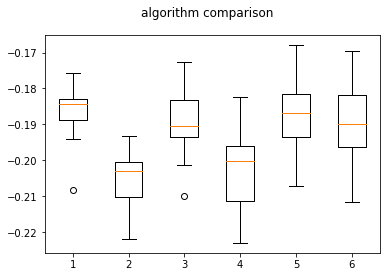

  Description      rmse
0          lr -0.186691
0         knn -0.204716
0          rf -0.189375
0    rf_boost -0.202597
0      gboost -0.187151
0         cbc -0.189739


In [485]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()


linear_models.append(('lr',lr))
linear_models.append(('knn',knn))
non_linear_models.append(('rf',rf))
non_linear_models.append(('rf_boost',rf_boost))
non_linear_models.append(('gboost',gboost))
non_linear_models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [457]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr5.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
knn.fit(x,y)
y_pred=knn.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/knn5.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf.fit(x,y)
y_pred=rf.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf5.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
rf_boost.fit(x,y)
y_pred=rf_boost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/rf_boost5.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost5.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
cbc.fit(x,y)
y_pred=cbc.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/cbc5.csv',index=False)

Learning rate set to 0.055186
0:	learn: 0.1856442	total: 11.6ms	remaining: 11.6s
1:	learn: 0.1855551	total: 18.1ms	remaining: 9.03s
2:	learn: 0.1854978	total: 24.4ms	remaining: 8.11s
3:	learn: 0.1854013	total: 30.6ms	remaining: 7.61s
4:	learn: 0.1852744	total: 36.9ms	remaining: 7.33s
5:	learn: 0.1851476	total: 42.8ms	remaining: 7.09s
6:	learn: 0.1850899	total: 49.1ms	remaining: 6.96s
7:	learn: 0.1850118	total: 55.4ms	remaining: 6.87s
8:	learn: 0.1849142	total: 61.8ms	remaining: 6.8s
9:	learn: 0.1848342	total: 67.9ms	remaining: 6.72s
10:	learn: 0.1846777	total: 74.1ms	remaining: 6.66s
11:	learn: 0.1845910	total: 80.5ms	remaining: 6.63s
12:	learn: 0.1845007	total: 87.2ms	remaining: 6.62s
13:	learn: 0.1844141	total: 93ms	remaining: 6.55s
14:	learn: 0.1842904	total: 99ms	remaining: 6.5s
15:	learn: 0.1841903	total: 105ms	remaining: 6.47s
16:	learn: 0.1841023	total: 111ms	remaining: 6.44s
17:	learn: 0.1839925	total: 118ms	remaining: 6.42s
18:	learn: 0.1839078	total: 124ms	remaining: 6.4s
19:

181:	learn: 0.1709853	total: 1.02s	remaining: 4.59s
182:	learn: 0.1709084	total: 1.03s	remaining: 4.58s
183:	learn: 0.1708578	total: 1.03s	remaining: 4.57s
184:	learn: 0.1707895	total: 1.03s	remaining: 4.56s
185:	learn: 0.1707283	total: 1.04s	remaining: 4.54s
186:	learn: 0.1706073	total: 1.04s	remaining: 4.53s
187:	learn: 0.1705105	total: 1.04s	remaining: 4.51s
188:	learn: 0.1704212	total: 1.05s	remaining: 4.5s
189:	learn: 0.1703598	total: 1.05s	remaining: 4.49s
190:	learn: 0.1703107	total: 1.06s	remaining: 4.49s
191:	learn: 0.1702396	total: 1.07s	remaining: 4.49s
192:	learn: 0.1701650	total: 1.07s	remaining: 4.49s
193:	learn: 0.1700979	total: 1.08s	remaining: 4.49s
194:	learn: 0.1700401	total: 1.09s	remaining: 4.49s
195:	learn: 0.1699788	total: 1.09s	remaining: 4.48s
196:	learn: 0.1698620	total: 1.1s	remaining: 4.48s
197:	learn: 0.1697684	total: 1.1s	remaining: 4.48s
198:	learn: 0.1696914	total: 1.11s	remaining: 4.48s
199:	learn: 0.1696336	total: 1.12s	remaining: 4.47s
200:	learn: 0.1

340:	learn: 0.1590087	total: 1.87s	remaining: 3.61s
341:	learn: 0.1589536	total: 1.87s	remaining: 3.61s
342:	learn: 0.1588617	total: 1.88s	remaining: 3.6s
343:	learn: 0.1587979	total: 1.88s	remaining: 3.59s
344:	learn: 0.1587228	total: 1.89s	remaining: 3.58s
345:	learn: 0.1586396	total: 1.89s	remaining: 3.57s
346:	learn: 0.1585853	total: 1.89s	remaining: 3.56s
347:	learn: 0.1585175	total: 1.9s	remaining: 3.56s
348:	learn: 0.1584491	total: 1.9s	remaining: 3.54s
349:	learn: 0.1583453	total: 1.9s	remaining: 3.54s
350:	learn: 0.1582518	total: 1.91s	remaining: 3.53s
351:	learn: 0.1581790	total: 1.92s	remaining: 3.52s
352:	learn: 0.1581020	total: 1.92s	remaining: 3.52s
353:	learn: 0.1580006	total: 1.93s	remaining: 3.52s
354:	learn: 0.1579402	total: 1.93s	remaining: 3.51s
355:	learn: 0.1578779	total: 1.94s	remaining: 3.51s
356:	learn: 0.1578054	total: 1.94s	remaining: 3.5s
357:	learn: 0.1577197	total: 1.95s	remaining: 3.5s
358:	learn: 0.1576212	total: 1.95s	remaining: 3.49s
359:	learn: 0.1575

506:	learn: 0.1479235	total: 2.71s	remaining: 2.63s
507:	learn: 0.1478865	total: 2.71s	remaining: 2.63s
508:	learn: 0.1478428	total: 2.72s	remaining: 2.62s
509:	learn: 0.1477558	total: 2.73s	remaining: 2.62s
510:	learn: 0.1477043	total: 2.73s	remaining: 2.61s
511:	learn: 0.1476470	total: 2.73s	remaining: 2.6s
512:	learn: 0.1476084	total: 2.74s	remaining: 2.6s
513:	learn: 0.1475607	total: 2.75s	remaining: 2.6s
514:	learn: 0.1474694	total: 2.75s	remaining: 2.59s
515:	learn: 0.1473785	total: 2.76s	remaining: 2.59s
516:	learn: 0.1473172	total: 2.76s	remaining: 2.58s
517:	learn: 0.1472401	total: 2.77s	remaining: 2.58s
518:	learn: 0.1471847	total: 2.77s	remaining: 2.57s
519:	learn: 0.1471413	total: 2.77s	remaining: 2.56s
520:	learn: 0.1470943	total: 2.78s	remaining: 2.56s
521:	learn: 0.1470226	total: 2.79s	remaining: 2.55s
522:	learn: 0.1469860	total: 2.79s	remaining: 2.55s
523:	learn: 0.1469229	total: 2.8s	remaining: 2.54s
524:	learn: 0.1468842	total: 2.8s	remaining: 2.54s
525:	learn: 0.146

666:	learn: 0.1384494	total: 3.57s	remaining: 1.78s
667:	learn: 0.1383899	total: 3.57s	remaining: 1.77s
668:	learn: 0.1383314	total: 3.58s	remaining: 1.77s
669:	learn: 0.1382727	total: 3.58s	remaining: 1.76s
670:	learn: 0.1381964	total: 3.58s	remaining: 1.76s
671:	learn: 0.1381557	total: 3.59s	remaining: 1.75s
672:	learn: 0.1381290	total: 3.59s	remaining: 1.74s
673:	learn: 0.1380840	total: 3.6s	remaining: 1.74s
674:	learn: 0.1380096	total: 3.6s	remaining: 1.74s
675:	learn: 0.1379463	total: 3.61s	remaining: 1.73s
676:	learn: 0.1378808	total: 3.62s	remaining: 1.73s
677:	learn: 0.1378240	total: 3.62s	remaining: 1.72s
678:	learn: 0.1377559	total: 3.63s	remaining: 1.72s
679:	learn: 0.1377139	total: 3.63s	remaining: 1.71s
680:	learn: 0.1376598	total: 3.64s	remaining: 1.7s
681:	learn: 0.1376020	total: 3.64s	remaining: 1.7s
682:	learn: 0.1375424	total: 3.65s	remaining: 1.69s
683:	learn: 0.1374944	total: 3.65s	remaining: 1.69s
684:	learn: 0.1374128	total: 3.65s	remaining: 1.68s
685:	learn: 0.13

834:	learn: 0.1295759	total: 4.41s	remaining: 871ms
835:	learn: 0.1295224	total: 4.41s	remaining: 866ms
836:	learn: 0.1294346	total: 4.42s	remaining: 860ms
837:	learn: 0.1293880	total: 4.42s	remaining: 855ms
838:	learn: 0.1293495	total: 4.42s	remaining: 849ms
839:	learn: 0.1292972	total: 4.43s	remaining: 844ms
840:	learn: 0.1292407	total: 4.43s	remaining: 838ms
841:	learn: 0.1292084	total: 4.44s	remaining: 833ms
842:	learn: 0.1291706	total: 4.44s	remaining: 828ms
843:	learn: 0.1291261	total: 4.45s	remaining: 822ms
844:	learn: 0.1290587	total: 4.45s	remaining: 817ms
845:	learn: 0.1289894	total: 4.46s	remaining: 811ms
846:	learn: 0.1289336	total: 4.46s	remaining: 806ms
847:	learn: 0.1288902	total: 4.47s	remaining: 801ms
848:	learn: 0.1288575	total: 4.47s	remaining: 795ms
849:	learn: 0.1287886	total: 4.48s	remaining: 790ms
850:	learn: 0.1287284	total: 4.48s	remaining: 785ms
851:	learn: 0.1286895	total: 4.49s	remaining: 780ms
852:	learn: 0.1286383	total: 4.49s	remaining: 774ms
853:	learn: 

# feature selection

In [487]:
gboost.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [488]:
imp=pd.DataFrame(gboost.feature_importances_,index=x.columns,columns=['sign'])

sign_df=imp.sort_values(by="sign",ascending=False)
sign_df1=sign_df.reset_index()
sign_df1


index      sign
0                         growth_rate  0.138547
1                                 Age  0.089545
2                     Time_of_service  0.084779
3                              VAR1_5  0.034431
4                                VAR2  0.031143
5                          Unit_Sales  0.030450
6                              VAR6_6  0.026371
7                   Education_Level_2  0.026095
8                       Unit_Security  0.018784
9                       Pay_Scale_4.0  0.018455
10                             VAR7_2  0.018064
11     Unit_Human Resource Management  0.016446
12                             VAR6_7  0.015926
13                      Travel_Rate_1  0.015224
14                      Pay_Scale_2.0  0.014599
15                      Pay_Scale_9.0  0.014545
16                      Pay_Scale_5.0  0.014381
17                    Unit_Purchasing  0.012787
18              Work_Life_balance_2.0  0.012656
19                      Pay_Scale_3.0  0.011432
20                  Education_Level_4  0.010680
21  Decision_skill_possess_Behavioral  0.010610
22                           Unit_R&D  0.010484
23         Relationship_Status_Single  0.010394
24                             VAR5_4  0.009775
25                           Gender_M  0.009389
26    Compensation_and_Benefits_type3  0.009244
27                             VAR5_3  0.009221
28                       Post_Level_2  0.009180
29    Compensation_and_Benefits_type2  0.009048
..                                ...       ...
50                            Unit_IT  0.006308
51                             VAR6_9  0.006288
52                       Unit_Quality  0.006206
53             Time_since_promotion_4  0.005897
54                    VAR4_miss_value  0.005728
55   Decision_skill_possess_Directive  0.005531
56             Time_since_promotion_2  0.005449
57                           VAR4_2.0  0.005313
58                        VAR3_1.8688  0.004958
59                             VAR7_5  0.004870
60              Work_Life_balance_5.0  0.004609
61             Time_since_promotion_1  0.004426
62                       Post_Level_3  0.004335
63                    Unit_Operarions  0.004295
64                     Unit_Logistics  0.004124
65               Hometown_Springfield  0.004054
66  Decision_skill_possess_Conceptual  0.003833
67                Hometown_Washington  0.003051
68                             VAR1_2  0.003006
69              Work_Life_balance_3.0  0.002879
70                             VAR1_4  0.002791
71                      Travel_Rate_2  0.002775
72                   Hometown_Lebanon  0.002032
73                             VAR1_3  0.001772
74                           VAR4_3.0  0.001631
75                      Pay_Scale_1.0  0.001408
76                    Unit_Production  0.001249
77             Time_since_promotion_3  0.000918
78                      Pay_Scale_8.0  0.000000
79                             VAR6_8  0.000000

[80 rows x 2 columns]

In [548]:
sign_df_final=sign_df1[sign_df1['sign']>=0.010609]
sign_df_final

index      sign
0                         growth_rate  0.138547
1                                 Age  0.089545
2                     Time_of_service  0.084779
3                              VAR1_5  0.034431
4                                VAR2  0.031143
5                          Unit_Sales  0.030450
6                              VAR6_6  0.026371
7                   Education_Level_2  0.026095
8                       Unit_Security  0.018784
9                       Pay_Scale_4.0  0.018455
10                             VAR7_2  0.018064
11     Unit_Human Resource Management  0.016446
12                             VAR6_7  0.015926
13                      Travel_Rate_1  0.015224
14                      Pay_Scale_2.0  0.014599
15                      Pay_Scale_9.0  0.014545
16                      Pay_Scale_5.0  0.014381
17                    Unit_Purchasing  0.012787
18              Work_Life_balance_2.0  0.012656
19                      Pay_Scale_3.0  0.011432
20                  Education_Level_4  0.010680
21  Decision_skill_possess_Behavioral  0.010610

In [549]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Attrition_rate')
print(len(list_cols))

24


In [550]:
df_fs=df5[list_cols]
print(df_fs.shape)

(10000, 24)


In [551]:
train=df_fs[df_fs['train/test']==1]
test=df_fs[df_fs['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 22)
y_train shape is  (7000,)
x_test shape is  (3000, 22)


lr:-0.185853 (0.000094)
knn:-0.202729 (0.000105)
rf:-0.192337 (0.000122)
rf_boost:-0.198650 (0.000097)
gboost:-0.186020 (0.000138)
Learning rate set to 0.054161
0:	learn: 0.1876900	total: 2.27ms	remaining: 2.27s
1:	learn: 0.1876043	total: 4.58ms	remaining: 2.29s
2:	learn: 0.1875264	total: 6.74ms	remaining: 2.24s
3:	learn: 0.1874353	total: 8.86ms	remaining: 2.21s
4:	learn: 0.1873225	total: 11ms	remaining: 2.18s
5:	learn: 0.1872257	total: 13.1ms	remaining: 2.17s
6:	learn: 0.1871182	total: 15.3ms	remaining: 2.17s
7:	learn: 0.1870571	total: 17.4ms	remaining: 2.16s
8:	learn: 0.1869806	total: 19.5ms	remaining: 2.15s
9:	learn: 0.1869233	total: 21.7ms	remaining: 2.14s
10:	learn: 0.1868558	total: 23.8ms	remaining: 2.14s
11:	learn: 0.1867556	total: 26ms	remaining: 2.14s
12:	learn: 0.1866681	total: 28.1ms	remaining: 2.13s
13:	learn: 0.1866160	total: 30.2ms	remaining: 2.13s
14:	learn: 0.1865427	total: 32.4ms	remaining: 2.13s
15:	learn: 0.1864350	total: 34.4ms	remaining: 2.12s
16:	learn: 0.1863583	

222:	learn: 0.1745749	total: 491ms	remaining: 1.71s
223:	learn: 0.1745377	total: 493ms	remaining: 1.71s
224:	learn: 0.1744798	total: 495ms	remaining: 1.7s
225:	learn: 0.1744111	total: 497ms	remaining: 1.7s
226:	learn: 0.1743755	total: 499ms	remaining: 1.7s
227:	learn: 0.1743198	total: 501ms	remaining: 1.69s
228:	learn: 0.1742864	total: 503ms	remaining: 1.69s
229:	learn: 0.1741998	total: 505ms	remaining: 1.69s
230:	learn: 0.1741764	total: 506ms	remaining: 1.69s
231:	learn: 0.1741446	total: 508ms	remaining: 1.68s
232:	learn: 0.1740659	total: 510ms	remaining: 1.68s
233:	learn: 0.1740056	total: 512ms	remaining: 1.68s
234:	learn: 0.1739201	total: 514ms	remaining: 1.67s
235:	learn: 0.1738409	total: 516ms	remaining: 1.67s
236:	learn: 0.1737847	total: 518ms	remaining: 1.67s
237:	learn: 0.1737184	total: 521ms	remaining: 1.67s
238:	learn: 0.1736810	total: 523ms	remaining: 1.66s
239:	learn: 0.1736070	total: 525ms	remaining: 1.66s
240:	learn: 0.1735692	total: 526ms	remaining: 1.66s
241:	learn: 0.1

395:	learn: 0.1664016	total: 819ms	remaining: 1.25s
396:	learn: 0.1663582	total: 821ms	remaining: 1.25s
397:	learn: 0.1662984	total: 823ms	remaining: 1.24s
398:	learn: 0.1662510	total: 825ms	remaining: 1.24s
399:	learn: 0.1661847	total: 827ms	remaining: 1.24s
400:	learn: 0.1661668	total: 829ms	remaining: 1.24s
401:	learn: 0.1661291	total: 830ms	remaining: 1.24s
402:	learn: 0.1661052	total: 832ms	remaining: 1.23s
403:	learn: 0.1660683	total: 834ms	remaining: 1.23s
404:	learn: 0.1660078	total: 836ms	remaining: 1.23s
405:	learn: 0.1659800	total: 838ms	remaining: 1.23s
406:	learn: 0.1659543	total: 840ms	remaining: 1.22s
407:	learn: 0.1659175	total: 842ms	remaining: 1.22s
408:	learn: 0.1658760	total: 844ms	remaining: 1.22s
409:	learn: 0.1658319	total: 846ms	remaining: 1.22s
410:	learn: 0.1657874	total: 848ms	remaining: 1.21s
411:	learn: 0.1657445	total: 849ms	remaining: 1.21s
412:	learn: 0.1657169	total: 851ms	remaining: 1.21s
413:	learn: 0.1656822	total: 853ms	remaining: 1.21s
414:	learn: 

566:	learn: 0.1595746	total: 1.15s	remaining: 880ms
567:	learn: 0.1595538	total: 1.15s	remaining: 878ms
568:	learn: 0.1595207	total: 1.16s	remaining: 876ms
569:	learn: 0.1594686	total: 1.16s	remaining: 874ms
570:	learn: 0.1594365	total: 1.16s	remaining: 872ms
571:	learn: 0.1593905	total: 1.16s	remaining: 869ms
572:	learn: 0.1593630	total: 1.16s	remaining: 867ms
573:	learn: 0.1593253	total: 1.17s	remaining: 865ms
574:	learn: 0.1592687	total: 1.17s	remaining: 863ms
575:	learn: 0.1592037	total: 1.17s	remaining: 861ms
576:	learn: 0.1591571	total: 1.17s	remaining: 859ms
577:	learn: 0.1591319	total: 1.17s	remaining: 857ms
578:	learn: 0.1590923	total: 1.18s	remaining: 855ms
579:	learn: 0.1590704	total: 1.18s	remaining: 853ms
580:	learn: 0.1590344	total: 1.18s	remaining: 851ms
581:	learn: 0.1590233	total: 1.18s	remaining: 849ms
582:	learn: 0.1589745	total: 1.18s	remaining: 847ms
583:	learn: 0.1589309	total: 1.19s	remaining: 844ms
584:	learn: 0.1588963	total: 1.19s	remaining: 842ms
585:	learn: 

743:	learn: 0.1532786	total: 1.49s	remaining: 512ms
744:	learn: 0.1532246	total: 1.49s	remaining: 511ms
745:	learn: 0.1532074	total: 1.49s	remaining: 509ms
746:	learn: 0.1531867	total: 1.5s	remaining: 506ms
747:	learn: 0.1531589	total: 1.5s	remaining: 504ms
748:	learn: 0.1531257	total: 1.5s	remaining: 502ms
749:	learn: 0.1530864	total: 1.5s	remaining: 500ms
750:	learn: 0.1530702	total: 1.5s	remaining: 498ms
751:	learn: 0.1530300	total: 1.5s	remaining: 496ms
752:	learn: 0.1529815	total: 1.51s	remaining: 494ms
753:	learn: 0.1529425	total: 1.51s	remaining: 492ms
754:	learn: 0.1529127	total: 1.51s	remaining: 490ms
755:	learn: 0.1528826	total: 1.51s	remaining: 488ms
756:	learn: 0.1528510	total: 1.51s	remaining: 486ms
757:	learn: 0.1528397	total: 1.52s	remaining: 484ms
758:	learn: 0.1528115	total: 1.52s	remaining: 482ms
759:	learn: 0.1527942	total: 1.52s	remaining: 480ms
760:	learn: 0.1527649	total: 1.52s	remaining: 478ms
761:	learn: 0.1527455	total: 1.52s	remaining: 476ms
762:	learn: 0.1527

911:	learn: 0.1481376	total: 1.82s	remaining: 176ms
912:	learn: 0.1481149	total: 1.82s	remaining: 174ms
913:	learn: 0.1480686	total: 1.83s	remaining: 172ms
914:	learn: 0.1480290	total: 1.83s	remaining: 170ms
915:	learn: 0.1480040	total: 1.83s	remaining: 168ms
916:	learn: 0.1479689	total: 1.83s	remaining: 166ms
917:	learn: 0.1479321	total: 1.83s	remaining: 164ms
918:	learn: 0.1478927	total: 1.84s	remaining: 162ms
919:	learn: 0.1478637	total: 1.84s	remaining: 160ms
920:	learn: 0.1478314	total: 1.84s	remaining: 158ms
921:	learn: 0.1478239	total: 1.84s	remaining: 156ms
922:	learn: 0.1477924	total: 1.84s	remaining: 154ms
923:	learn: 0.1477748	total: 1.85s	remaining: 152ms
924:	learn: 0.1477493	total: 1.85s	remaining: 150ms
925:	learn: 0.1477187	total: 1.85s	remaining: 148ms
926:	learn: 0.1476928	total: 1.85s	remaining: 146ms
927:	learn: 0.1476699	total: 1.85s	remaining: 144ms
928:	learn: 0.1476436	total: 1.86s	remaining: 142ms
929:	learn: 0.1475965	total: 1.86s	remaining: 140ms
930:	learn: 

133:	learn: 0.1781780	total: 306ms	remaining: 1.98s
134:	learn: 0.1781353	total: 311ms	remaining: 1.99s
135:	learn: 0.1780944	total: 314ms	remaining: 1.99s
136:	learn: 0.1780461	total: 317ms	remaining: 2s
137:	learn: 0.1779747	total: 319ms	remaining: 1.99s
138:	learn: 0.1778946	total: 321ms	remaining: 1.99s
139:	learn: 0.1778395	total: 324ms	remaining: 1.99s
140:	learn: 0.1778014	total: 327ms	remaining: 1.99s
141:	learn: 0.1777598	total: 329ms	remaining: 1.99s
142:	learn: 0.1777077	total: 332ms	remaining: 1.99s
143:	learn: 0.1776457	total: 334ms	remaining: 1.99s
144:	learn: 0.1776042	total: 337ms	remaining: 1.98s
145:	learn: 0.1775230	total: 339ms	remaining: 1.98s
146:	learn: 0.1774825	total: 341ms	remaining: 1.98s
147:	learn: 0.1774434	total: 343ms	remaining: 1.98s
148:	learn: 0.1773693	total: 346ms	remaining: 1.98s
149:	learn: 0.1773489	total: 348ms	remaining: 1.97s
150:	learn: 0.1772941	total: 350ms	remaining: 1.97s
151:	learn: 0.1772353	total: 353ms	remaining: 1.97s
152:	learn: 0.1

346:	learn: 0.1670462	total: 792ms	remaining: 1.49s
347:	learn: 0.1670061	total: 794ms	remaining: 1.49s
348:	learn: 0.1669534	total: 796ms	remaining: 1.48s
349:	learn: 0.1668899	total: 798ms	remaining: 1.48s
350:	learn: 0.1668537	total: 800ms	remaining: 1.48s
351:	learn: 0.1668121	total: 802ms	remaining: 1.48s
352:	learn: 0.1667853	total: 804ms	remaining: 1.47s
353:	learn: 0.1667303	total: 806ms	remaining: 1.47s
354:	learn: 0.1666778	total: 808ms	remaining: 1.47s
355:	learn: 0.1666330	total: 810ms	remaining: 1.47s
356:	learn: 0.1665913	total: 812ms	remaining: 1.46s
357:	learn: 0.1665562	total: 819ms	remaining: 1.47s
358:	learn: 0.1665024	total: 824ms	remaining: 1.47s
359:	learn: 0.1664625	total: 828ms	remaining: 1.47s
360:	learn: 0.1664235	total: 831ms	remaining: 1.47s
361:	learn: 0.1663801	total: 835ms	remaining: 1.47s
362:	learn: 0.1663420	total: 837ms	remaining: 1.47s
363:	learn: 0.1662830	total: 840ms	remaining: 1.47s
364:	learn: 0.1662385	total: 843ms	remaining: 1.47s
365:	learn: 

507:	learn: 0.1604202	total: 1.12s	remaining: 1.09s
508:	learn: 0.1603869	total: 1.12s	remaining: 1.08s
509:	learn: 0.1603229	total: 1.13s	remaining: 1.08s
510:	learn: 0.1602882	total: 1.13s	remaining: 1.08s
511:	learn: 0.1602490	total: 1.13s	remaining: 1.08s
512:	learn: 0.1602206	total: 1.13s	remaining: 1.07s
513:	learn: 0.1601825	total: 1.13s	remaining: 1.07s
514:	learn: 0.1601591	total: 1.14s	remaining: 1.07s
515:	learn: 0.1601238	total: 1.14s	remaining: 1.07s
516:	learn: 0.1600929	total: 1.14s	remaining: 1.06s
517:	learn: 0.1600458	total: 1.14s	remaining: 1.06s
518:	learn: 0.1600127	total: 1.14s	remaining: 1.06s
519:	learn: 0.1599807	total: 1.15s	remaining: 1.06s
520:	learn: 0.1599359	total: 1.15s	remaining: 1.05s
521:	learn: 0.1599137	total: 1.15s	remaining: 1.05s
522:	learn: 0.1598794	total: 1.15s	remaining: 1.05s
523:	learn: 0.1598404	total: 1.15s	remaining: 1.05s
524:	learn: 0.1597698	total: 1.16s	remaining: 1.04s
525:	learn: 0.1597576	total: 1.16s	remaining: 1.04s
526:	learn: 

677:	learn: 0.1545842	total: 1.45s	remaining: 691ms
678:	learn: 0.1545417	total: 1.46s	remaining: 688ms
679:	learn: 0.1545090	total: 1.46s	remaining: 686ms
680:	learn: 0.1544807	total: 1.46s	remaining: 684ms
681:	learn: 0.1544511	total: 1.46s	remaining: 682ms
682:	learn: 0.1544134	total: 1.46s	remaining: 679ms
683:	learn: 0.1543945	total: 1.47s	remaining: 677ms
684:	learn: 0.1543475	total: 1.47s	remaining: 675ms
685:	learn: 0.1542972	total: 1.47s	remaining: 673ms
686:	learn: 0.1542718	total: 1.47s	remaining: 671ms
687:	learn: 0.1542270	total: 1.47s	remaining: 669ms
688:	learn: 0.1542035	total: 1.48s	remaining: 667ms
689:	learn: 0.1541719	total: 1.48s	remaining: 664ms
690:	learn: 0.1541417	total: 1.48s	remaining: 662ms
691:	learn: 0.1541246	total: 1.48s	remaining: 660ms
692:	learn: 0.1541021	total: 1.48s	remaining: 657ms
693:	learn: 0.1540808	total: 1.49s	remaining: 655ms
694:	learn: 0.1540610	total: 1.49s	remaining: 653ms
695:	learn: 0.1540166	total: 1.49s	remaining: 651ms
696:	learn: 

898:	learn: 0.1478945	total: 1.94s	remaining: 218ms
899:	learn: 0.1478829	total: 1.94s	remaining: 215ms
900:	learn: 0.1478621	total: 1.94s	remaining: 213ms
901:	learn: 0.1478331	total: 1.94s	remaining: 211ms
902:	learn: 0.1478130	total: 1.95s	remaining: 209ms
903:	learn: 0.1477659	total: 1.95s	remaining: 207ms
904:	learn: 0.1477427	total: 1.95s	remaining: 205ms
905:	learn: 0.1477316	total: 1.95s	remaining: 202ms
906:	learn: 0.1476807	total: 1.95s	remaining: 200ms
907:	learn: 0.1476433	total: 1.96s	remaining: 198ms
908:	learn: 0.1476266	total: 1.96s	remaining: 196ms
909:	learn: 0.1475897	total: 1.96s	remaining: 194ms
910:	learn: 0.1475797	total: 1.96s	remaining: 192ms
911:	learn: 0.1475474	total: 1.97s	remaining: 190ms
912:	learn: 0.1475239	total: 1.97s	remaining: 188ms
913:	learn: 0.1474835	total: 1.97s	remaining: 185ms
914:	learn: 0.1474488	total: 1.97s	remaining: 183ms
915:	learn: 0.1474265	total: 1.97s	remaining: 181ms
916:	learn: 0.1473823	total: 1.98s	remaining: 179ms
917:	learn: 

100:	learn: 0.1795047	total: 246ms	remaining: 2.19s
101:	learn: 0.1794407	total: 250ms	remaining: 2.2s
102:	learn: 0.1793893	total: 252ms	remaining: 2.19s
103:	learn: 0.1793416	total: 254ms	remaining: 2.19s
104:	learn: 0.1792868	total: 257ms	remaining: 2.19s
105:	learn: 0.1792308	total: 259ms	remaining: 2.19s
106:	learn: 0.1791817	total: 263ms	remaining: 2.19s
107:	learn: 0.1791417	total: 265ms	remaining: 2.19s
108:	learn: 0.1790864	total: 269ms	remaining: 2.2s
109:	learn: 0.1790518	total: 272ms	remaining: 2.2s
110:	learn: 0.1789948	total: 274ms	remaining: 2.2s
111:	learn: 0.1789520	total: 277ms	remaining: 2.19s
112:	learn: 0.1789272	total: 279ms	remaining: 2.19s
113:	learn: 0.1788770	total: 281ms	remaining: 2.18s
114:	learn: 0.1788293	total: 283ms	remaining: 2.18s
115:	learn: 0.1787636	total: 285ms	remaining: 2.17s
116:	learn: 0.1786930	total: 288ms	remaining: 2.17s
117:	learn: 0.1786666	total: 291ms	remaining: 2.18s
118:	learn: 0.1786090	total: 294ms	remaining: 2.17s
119:	learn: 0.17

316:	learn: 0.1680696	total: 735ms	remaining: 1.58s
317:	learn: 0.1680344	total: 737ms	remaining: 1.58s
318:	learn: 0.1679916	total: 739ms	remaining: 1.58s
319:	learn: 0.1679052	total: 741ms	remaining: 1.57s
320:	learn: 0.1678433	total: 743ms	remaining: 1.57s
321:	learn: 0.1677989	total: 745ms	remaining: 1.57s
322:	learn: 0.1677480	total: 747ms	remaining: 1.57s
323:	learn: 0.1676918	total: 749ms	remaining: 1.56s
324:	learn: 0.1676568	total: 751ms	remaining: 1.56s
325:	learn: 0.1675777	total: 754ms	remaining: 1.56s
326:	learn: 0.1675355	total: 756ms	remaining: 1.55s
327:	learn: 0.1674918	total: 758ms	remaining: 1.55s
328:	learn: 0.1674695	total: 760ms	remaining: 1.55s
329:	learn: 0.1674243	total: 766ms	remaining: 1.55s
330:	learn: 0.1673954	total: 768ms	remaining: 1.55s
331:	learn: 0.1673297	total: 771ms	remaining: 1.55s
332:	learn: 0.1672852	total: 773ms	remaining: 1.55s
333:	learn: 0.1672407	total: 775ms	remaining: 1.54s
334:	learn: 0.1671854	total: 777ms	remaining: 1.54s
335:	learn: 

476:	learn: 0.1612916	total: 1.06s	remaining: 1.17s
477:	learn: 0.1612511	total: 1.06s	remaining: 1.16s
478:	learn: 0.1612035	total: 1.07s	remaining: 1.16s
479:	learn: 0.1611720	total: 1.07s	remaining: 1.16s
480:	learn: 0.1611387	total: 1.07s	remaining: 1.16s
481:	learn: 0.1610918	total: 1.07s	remaining: 1.15s
482:	learn: 0.1610420	total: 1.07s	remaining: 1.15s
483:	learn: 0.1609772	total: 1.08s	remaining: 1.15s
484:	learn: 0.1609385	total: 1.08s	remaining: 1.15s
485:	learn: 0.1609071	total: 1.08s	remaining: 1.14s
486:	learn: 0.1608867	total: 1.08s	remaining: 1.14s
487:	learn: 0.1608528	total: 1.09s	remaining: 1.14s
488:	learn: 0.1608068	total: 1.09s	remaining: 1.14s
489:	learn: 0.1607861	total: 1.09s	remaining: 1.13s
490:	learn: 0.1607252	total: 1.09s	remaining: 1.13s
491:	learn: 0.1607003	total: 1.09s	remaining: 1.13s
492:	learn: 0.1606633	total: 1.09s	remaining: 1.13s
493:	learn: 0.1605889	total: 1.1s	remaining: 1.12s
494:	learn: 0.1605620	total: 1.1s	remaining: 1.12s
495:	learn: 0.

716:	learn: 0.1529597	total: 1.56s	remaining: 615ms
717:	learn: 0.1529319	total: 1.56s	remaining: 613ms
718:	learn: 0.1529079	total: 1.56s	remaining: 611ms
719:	learn: 0.1528547	total: 1.56s	remaining: 609ms
720:	learn: 0.1528243	total: 1.57s	remaining: 607ms
721:	learn: 0.1527700	total: 1.57s	remaining: 605ms
722:	learn: 0.1527204	total: 1.57s	remaining: 602ms
723:	learn: 0.1527068	total: 1.57s	remaining: 600ms
724:	learn: 0.1526853	total: 1.58s	remaining: 598ms
725:	learn: 0.1526446	total: 1.58s	remaining: 596ms
726:	learn: 0.1526203	total: 1.58s	remaining: 594ms
727:	learn: 0.1525849	total: 1.58s	remaining: 591ms
728:	learn: 0.1525587	total: 1.58s	remaining: 589ms
729:	learn: 0.1525247	total: 1.59s	remaining: 587ms
730:	learn: 0.1525119	total: 1.59s	remaining: 585ms
731:	learn: 0.1524877	total: 1.59s	remaining: 583ms
732:	learn: 0.1524444	total: 1.59s	remaining: 581ms
733:	learn: 0.1523882	total: 1.6s	remaining: 579ms
734:	learn: 0.1523664	total: 1.6s	remaining: 577ms
735:	learn: 0.

955:	learn: 0.1456943	total: 2.04s	remaining: 94ms
956:	learn: 0.1456401	total: 2.04s	remaining: 91.9ms
957:	learn: 0.1455963	total: 2.05s	remaining: 89.8ms
958:	learn: 0.1455747	total: 2.05s	remaining: 87.6ms
959:	learn: 0.1455456	total: 2.05s	remaining: 85.5ms
960:	learn: 0.1455168	total: 2.05s	remaining: 83.3ms
961:	learn: 0.1454850	total: 2.06s	remaining: 81.2ms
962:	learn: 0.1454662	total: 2.06s	remaining: 79.1ms
963:	learn: 0.1454290	total: 2.06s	remaining: 76.9ms
964:	learn: 0.1454018	total: 2.06s	remaining: 74.8ms
965:	learn: 0.1453756	total: 2.06s	remaining: 72.6ms
966:	learn: 0.1453369	total: 2.06s	remaining: 70.5ms
967:	learn: 0.1453061	total: 2.07s	remaining: 68.4ms
968:	learn: 0.1452628	total: 2.07s	remaining: 66.2ms
969:	learn: 0.1452335	total: 2.07s	remaining: 64.1ms
970:	learn: 0.1452139	total: 2.07s	remaining: 61.9ms
971:	learn: 0.1451922	total: 2.08s	remaining: 59.8ms
972:	learn: 0.1451580	total: 2.08s	remaining: 57.6ms
973:	learn: 0.1451173	total: 2.08s	remaining: 55

146:	learn: 0.1756508	total: 380ms	remaining: 2.2s
147:	learn: 0.1755846	total: 382ms	remaining: 2.2s
148:	learn: 0.1754859	total: 385ms	remaining: 2.2s
149:	learn: 0.1754542	total: 387ms	remaining: 2.19s
150:	learn: 0.1754021	total: 391ms	remaining: 2.2s
151:	learn: 0.1753683	total: 393ms	remaining: 2.19s
152:	learn: 0.1753292	total: 396ms	remaining: 2.19s
153:	learn: 0.1752483	total: 404ms	remaining: 2.22s
154:	learn: 0.1751701	total: 406ms	remaining: 2.21s
155:	learn: 0.1750966	total: 409ms	remaining: 2.21s
156:	learn: 0.1750458	total: 411ms	remaining: 2.21s
157:	learn: 0.1749783	total: 414ms	remaining: 2.21s
158:	learn: 0.1749239	total: 417ms	remaining: 2.21s
159:	learn: 0.1748549	total: 420ms	remaining: 2.2s
160:	learn: 0.1747921	total: 422ms	remaining: 2.2s
161:	learn: 0.1747526	total: 424ms	remaining: 2.19s
162:	learn: 0.1746905	total: 427ms	remaining: 2.19s
163:	learn: 0.1746058	total: 429ms	remaining: 2.19s
164:	learn: 0.1745319	total: 431ms	remaining: 2.18s
165:	learn: 0.1744

345:	learn: 0.1651337	total: 876ms	remaining: 1.65s
346:	learn: 0.1650760	total: 878ms	remaining: 1.65s
347:	learn: 0.1650072	total: 880ms	remaining: 1.65s
348:	learn: 0.1649615	total: 883ms	remaining: 1.65s
349:	learn: 0.1649110	total: 886ms	remaining: 1.64s
350:	learn: 0.1648635	total: 888ms	remaining: 1.64s
351:	learn: 0.1648270	total: 891ms	remaining: 1.64s
352:	learn: 0.1647736	total: 894ms	remaining: 1.64s
353:	learn: 0.1647406	total: 896ms	remaining: 1.64s
354:	learn: 0.1646950	total: 900ms	remaining: 1.63s
355:	learn: 0.1646666	total: 902ms	remaining: 1.63s
356:	learn: 0.1646402	total: 904ms	remaining: 1.63s
357:	learn: 0.1646061	total: 906ms	remaining: 1.63s
358:	learn: 0.1645816	total: 908ms	remaining: 1.62s
359:	learn: 0.1645224	total: 911ms	remaining: 1.62s
360:	learn: 0.1644729	total: 913ms	remaining: 1.61s
361:	learn: 0.1644345	total: 914ms	remaining: 1.61s
362:	learn: 0.1644130	total: 916ms	remaining: 1.61s
363:	learn: 0.1643490	total: 919ms	remaining: 1.6s
364:	learn: 0

511:	learn: 0.1579454	total: 1.21s	remaining: 1.16s
512:	learn: 0.1578743	total: 1.21s	remaining: 1.15s
513:	learn: 0.1578102	total: 1.22s	remaining: 1.15s
514:	learn: 0.1577815	total: 1.22s	remaining: 1.15s
515:	learn: 0.1577323	total: 1.22s	remaining: 1.14s
516:	learn: 0.1577014	total: 1.22s	remaining: 1.14s
517:	learn: 0.1576534	total: 1.22s	remaining: 1.14s
518:	learn: 0.1576107	total: 1.23s	remaining: 1.14s
519:	learn: 0.1575659	total: 1.23s	remaining: 1.13s
520:	learn: 0.1575366	total: 1.23s	remaining: 1.13s
521:	learn: 0.1574973	total: 1.23s	remaining: 1.13s
522:	learn: 0.1574518	total: 1.24s	remaining: 1.13s
523:	learn: 0.1574146	total: 1.24s	remaining: 1.12s
524:	learn: 0.1573708	total: 1.24s	remaining: 1.12s
525:	learn: 0.1573482	total: 1.24s	remaining: 1.12s
526:	learn: 0.1573285	total: 1.24s	remaining: 1.12s
527:	learn: 0.1572956	total: 1.25s	remaining: 1.11s
528:	learn: 0.1572611	total: 1.25s	remaining: 1.11s
529:	learn: 0.1572200	total: 1.25s	remaining: 1.11s
530:	learn: 

734:	learn: 0.1504257	total: 1.7s	remaining: 611ms
735:	learn: 0.1503797	total: 1.7s	remaining: 609ms
736:	learn: 0.1503361	total: 1.7s	remaining: 607ms
737:	learn: 0.1503150	total: 1.7s	remaining: 604ms
738:	learn: 0.1502828	total: 1.7s	remaining: 602ms
739:	learn: 0.1502698	total: 1.71s	remaining: 600ms
740:	learn: 0.1502303	total: 1.71s	remaining: 597ms
741:	learn: 0.1501972	total: 1.71s	remaining: 595ms
742:	learn: 0.1501743	total: 1.71s	remaining: 592ms
743:	learn: 0.1501376	total: 1.71s	remaining: 590ms
744:	learn: 0.1500977	total: 1.72s	remaining: 587ms
745:	learn: 0.1500700	total: 1.72s	remaining: 585ms
746:	learn: 0.1500480	total: 1.72s	remaining: 583ms
747:	learn: 0.1500166	total: 1.72s	remaining: 580ms
748:	learn: 0.1499882	total: 1.72s	remaining: 578ms
749:	learn: 0.1499547	total: 1.73s	remaining: 576ms
750:	learn: 0.1499385	total: 1.73s	remaining: 573ms
751:	learn: 0.1498836	total: 1.73s	remaining: 571ms
752:	learn: 0.1498673	total: 1.73s	remaining: 568ms
753:	learn: 0.149

971:	learn: 0.1431115	total: 2.18s	remaining: 62.7ms
972:	learn: 0.1430612	total: 2.18s	remaining: 60.5ms
973:	learn: 0.1430238	total: 2.18s	remaining: 58.2ms
974:	learn: 0.1429922	total: 2.19s	remaining: 56ms
975:	learn: 0.1429688	total: 2.19s	remaining: 53.8ms
976:	learn: 0.1429263	total: 2.19s	remaining: 51.6ms
977:	learn: 0.1429061	total: 2.19s	remaining: 49.3ms
978:	learn: 0.1428764	total: 2.19s	remaining: 47.1ms
979:	learn: 0.1428452	total: 2.2s	remaining: 44.8ms
980:	learn: 0.1428112	total: 2.2s	remaining: 42.6ms
981:	learn: 0.1427776	total: 2.2s	remaining: 40.4ms
982:	learn: 0.1427320	total: 2.2s	remaining: 38.1ms
983:	learn: 0.1427125	total: 2.21s	remaining: 35.9ms
984:	learn: 0.1426852	total: 2.21s	remaining: 33.6ms
985:	learn: 0.1426509	total: 2.21s	remaining: 31.4ms
986:	learn: 0.1426291	total: 2.21s	remaining: 29.1ms
987:	learn: 0.1425876	total: 2.21s	remaining: 26.9ms
988:	learn: 0.1425420	total: 2.22s	remaining: 24.7ms
989:	learn: 0.1425059	total: 2.22s	remaining: 22.4ms

195:	learn: 0.1746207	total: 393ms	remaining: 1.61s
196:	learn: 0.1745352	total: 395ms	remaining: 1.61s
197:	learn: 0.1744554	total: 398ms	remaining: 1.61s
198:	learn: 0.1744219	total: 400ms	remaining: 1.61s
199:	learn: 0.1743698	total: 402ms	remaining: 1.61s
200:	learn: 0.1743086	total: 404ms	remaining: 1.61s
201:	learn: 0.1742324	total: 406ms	remaining: 1.6s
202:	learn: 0.1741549	total: 409ms	remaining: 1.6s
203:	learn: 0.1740562	total: 411ms	remaining: 1.6s
204:	learn: 0.1739929	total: 413ms	remaining: 1.6s
205:	learn: 0.1739432	total: 415ms	remaining: 1.6s
206:	learn: 0.1738919	total: 417ms	remaining: 1.6s
207:	learn: 0.1738025	total: 419ms	remaining: 1.59s
208:	learn: 0.1737455	total: 421ms	remaining: 1.59s
209:	learn: 0.1737016	total: 423ms	remaining: 1.59s
210:	learn: 0.1736656	total: 425ms	remaining: 1.59s
211:	learn: 0.1735702	total: 427ms	remaining: 1.59s
212:	learn: 0.1735313	total: 429ms	remaining: 1.58s
213:	learn: 0.1734789	total: 431ms	remaining: 1.58s
214:	learn: 0.1734

354:	learn: 0.1665305	total: 716ms	remaining: 1.3s
355:	learn: 0.1664998	total: 719ms	remaining: 1.3s
356:	learn: 0.1664628	total: 721ms	remaining: 1.3s
357:	learn: 0.1664254	total: 723ms	remaining: 1.3s
358:	learn: 0.1663962	total: 726ms	remaining: 1.29s
359:	learn: 0.1663346	total: 728ms	remaining: 1.29s
360:	learn: 0.1663183	total: 730ms	remaining: 1.29s
361:	learn: 0.1662878	total: 732ms	remaining: 1.29s
362:	learn: 0.1662482	total: 734ms	remaining: 1.29s
363:	learn: 0.1662117	total: 736ms	remaining: 1.29s
364:	learn: 0.1661645	total: 739ms	remaining: 1.28s
365:	learn: 0.1661053	total: 741ms	remaining: 1.28s
366:	learn: 0.1660767	total: 743ms	remaining: 1.28s
367:	learn: 0.1660313	total: 745ms	remaining: 1.28s
368:	learn: 0.1659717	total: 747ms	remaining: 1.28s
369:	learn: 0.1659418	total: 749ms	remaining: 1.27s
370:	learn: 0.1658839	total: 751ms	remaining: 1.27s
371:	learn: 0.1658593	total: 753ms	remaining: 1.27s
372:	learn: 0.1658037	total: 757ms	remaining: 1.27s
373:	learn: 0.16

513:	learn: 0.1601653	total: 1.04s	remaining: 988ms
514:	learn: 0.1601450	total: 1.05s	remaining: 987ms
515:	learn: 0.1600936	total: 1.05s	remaining: 985ms
516:	learn: 0.1600668	total: 1.05s	remaining: 983ms
517:	learn: 0.1600363	total: 1.05s	remaining: 981ms
518:	learn: 0.1599921	total: 1.06s	remaining: 979ms
519:	learn: 0.1599505	total: 1.06s	remaining: 977ms
520:	learn: 0.1599216	total: 1.06s	remaining: 975ms
521:	learn: 0.1598692	total: 1.06s	remaining: 973ms
522:	learn: 0.1598283	total: 1.06s	remaining: 972ms
523:	learn: 0.1597544	total: 1.07s	remaining: 970ms
524:	learn: 0.1597161	total: 1.07s	remaining: 968ms
525:	learn: 0.1596668	total: 1.07s	remaining: 966ms
526:	learn: 0.1596226	total: 1.07s	remaining: 964ms
527:	learn: 0.1595799	total: 1.07s	remaining: 961ms
528:	learn: 0.1595405	total: 1.08s	remaining: 959ms
529:	learn: 0.1594880	total: 1.08s	remaining: 957ms
530:	learn: 0.1594618	total: 1.08s	remaining: 955ms
531:	learn: 0.1594273	total: 1.08s	remaining: 953ms
532:	learn: 

679:	learn: 0.1541216	total: 1.37s	remaining: 646ms
680:	learn: 0.1540843	total: 1.37s	remaining: 644ms
681:	learn: 0.1540364	total: 1.38s	remaining: 642ms
682:	learn: 0.1539799	total: 1.38s	remaining: 640ms
683:	learn: 0.1539535	total: 1.38s	remaining: 638ms
684:	learn: 0.1539320	total: 1.38s	remaining: 636ms
685:	learn: 0.1539027	total: 1.38s	remaining: 634ms
686:	learn: 0.1538591	total: 1.39s	remaining: 632ms
687:	learn: 0.1538169	total: 1.39s	remaining: 630ms
688:	learn: 0.1537749	total: 1.39s	remaining: 628ms
689:	learn: 0.1537497	total: 1.39s	remaining: 626ms
690:	learn: 0.1537227	total: 1.39s	remaining: 624ms
691:	learn: 0.1536856	total: 1.4s	remaining: 622ms
692:	learn: 0.1536396	total: 1.4s	remaining: 619ms
693:	learn: 0.1536099	total: 1.4s	remaining: 617ms
694:	learn: 0.1535925	total: 1.4s	remaining: 615ms
695:	learn: 0.1535576	total: 1.4s	remaining: 613ms
696:	learn: 0.1535247	total: 1.41s	remaining: 611ms
697:	learn: 0.1534753	total: 1.41s	remaining: 609ms
698:	learn: 0.153

840:	learn: 0.1489737	total: 1.7s	remaining: 321ms
841:	learn: 0.1489500	total: 1.7s	remaining: 319ms
842:	learn: 0.1489140	total: 1.7s	remaining: 317ms
843:	learn: 0.1488832	total: 1.7s	remaining: 315ms
844:	learn: 0.1488670	total: 1.7s	remaining: 313ms
845:	learn: 0.1488300	total: 1.71s	remaining: 311ms
846:	learn: 0.1487956	total: 1.71s	remaining: 309ms
847:	learn: 0.1487598	total: 1.71s	remaining: 307ms
848:	learn: 0.1487376	total: 1.71s	remaining: 305ms
849:	learn: 0.1486945	total: 1.72s	remaining: 303ms
850:	learn: 0.1486589	total: 1.72s	remaining: 301ms
851:	learn: 0.1486222	total: 1.72s	remaining: 299ms
852:	learn: 0.1485818	total: 1.72s	remaining: 297ms
853:	learn: 0.1485584	total: 1.72s	remaining: 295ms
854:	learn: 0.1485342	total: 1.73s	remaining: 293ms
855:	learn: 0.1485109	total: 1.73s	remaining: 291ms
856:	learn: 0.1484959	total: 1.73s	remaining: 289ms
857:	learn: 0.1484696	total: 1.73s	remaining: 287ms
858:	learn: 0.1484450	total: 1.73s	remaining: 285ms
859:	learn: 0.148

59:	learn: 0.1815148	total: 126ms	remaining: 1.98s
60:	learn: 0.1814068	total: 128ms	remaining: 1.98s
61:	learn: 0.1813274	total: 131ms	remaining: 1.98s
62:	learn: 0.1812385	total: 133ms	remaining: 1.97s
63:	learn: 0.1811820	total: 135ms	remaining: 1.97s
64:	learn: 0.1811409	total: 137ms	remaining: 1.97s
65:	learn: 0.1811036	total: 139ms	remaining: 1.97s
66:	learn: 0.1810236	total: 141ms	remaining: 1.97s
67:	learn: 0.1809836	total: 144ms	remaining: 1.97s
68:	learn: 0.1809081	total: 146ms	remaining: 1.96s
69:	learn: 0.1808269	total: 148ms	remaining: 1.96s
70:	learn: 0.1807592	total: 150ms	remaining: 1.96s
71:	learn: 0.1807033	total: 152ms	remaining: 1.96s
72:	learn: 0.1806124	total: 154ms	remaining: 1.96s
73:	learn: 0.1805631	total: 156ms	remaining: 1.96s
74:	learn: 0.1805017	total: 158ms	remaining: 1.95s
75:	learn: 0.1804443	total: 160ms	remaining: 1.95s
76:	learn: 0.1804148	total: 162ms	remaining: 1.94s
77:	learn: 0.1803549	total: 164ms	remaining: 1.94s
78:	learn: 0.1802676	total: 166

281:	learn: 0.1691360	total: 594ms	remaining: 1.51s
282:	learn: 0.1690715	total: 596ms	remaining: 1.51s
283:	learn: 0.1690076	total: 599ms	remaining: 1.51s
284:	learn: 0.1689764	total: 601ms	remaining: 1.51s
285:	learn: 0.1689292	total: 603ms	remaining: 1.51s
286:	learn: 0.1688927	total: 606ms	remaining: 1.51s
287:	learn: 0.1688463	total: 608ms	remaining: 1.5s
288:	learn: 0.1687753	total: 610ms	remaining: 1.5s
289:	learn: 0.1687368	total: 612ms	remaining: 1.5s
290:	learn: 0.1686839	total: 615ms	remaining: 1.5s
291:	learn: 0.1686386	total: 617ms	remaining: 1.5s
292:	learn: 0.1685808	total: 619ms	remaining: 1.49s
293:	learn: 0.1685509	total: 621ms	remaining: 1.49s
294:	learn: 0.1685029	total: 623ms	remaining: 1.49s
295:	learn: 0.1684677	total: 625ms	remaining: 1.49s
296:	learn: 0.1684208	total: 627ms	remaining: 1.48s
297:	learn: 0.1684023	total: 629ms	remaining: 1.48s
298:	learn: 0.1683264	total: 632ms	remaining: 1.48s
299:	learn: 0.1682842	total: 634ms	remaining: 1.48s
300:	learn: 0.168

508:	learn: 0.1593679	total: 1.08s	remaining: 1.04s
509:	learn: 0.1593446	total: 1.08s	remaining: 1.04s
510:	learn: 0.1592981	total: 1.09s	remaining: 1.04s
511:	learn: 0.1592299	total: 1.09s	remaining: 1.04s
512:	learn: 0.1592023	total: 1.09s	remaining: 1.04s
513:	learn: 0.1591728	total: 1.09s	remaining: 1.03s
514:	learn: 0.1591096	total: 1.1s	remaining: 1.03s
515:	learn: 0.1590780	total: 1.1s	remaining: 1.03s
516:	learn: 0.1590137	total: 1.1s	remaining: 1.03s
517:	learn: 0.1589937	total: 1.1s	remaining: 1.03s
518:	learn: 0.1589698	total: 1.1s	remaining: 1.02s
519:	learn: 0.1589208	total: 1.11s	remaining: 1.02s
520:	learn: 0.1588726	total: 1.11s	remaining: 1.02s
521:	learn: 0.1588392	total: 1.11s	remaining: 1.02s
522:	learn: 0.1588130	total: 1.11s	remaining: 1.02s
523:	learn: 0.1587672	total: 1.12s	remaining: 1.01s
524:	learn: 0.1587290	total: 1.12s	remaining: 1.01s
525:	learn: 0.1586963	total: 1.12s	remaining: 1.01s
526:	learn: 0.1586704	total: 1.12s	remaining: 1.01s
527:	learn: 0.158

697:	learn: 0.1528777	total: 1.57s	remaining: 680ms
698:	learn: 0.1528429	total: 1.57s	remaining: 678ms
699:	learn: 0.1528178	total: 1.58s	remaining: 679ms
700:	learn: 0.1527998	total: 1.6s	remaining: 682ms
701:	learn: 0.1527894	total: 1.61s	remaining: 684ms
702:	learn: 0.1527717	total: 1.61s	remaining: 682ms
703:	learn: 0.1527248	total: 1.62s	remaining: 680ms
704:	learn: 0.1527002	total: 1.62s	remaining: 678ms
705:	learn: 0.1526655	total: 1.62s	remaining: 676ms
706:	learn: 0.1526411	total: 1.63s	remaining: 674ms
707:	learn: 0.1526178	total: 1.63s	remaining: 671ms
708:	learn: 0.1525903	total: 1.63s	remaining: 669ms
709:	learn: 0.1525635	total: 1.64s	remaining: 671ms
710:	learn: 0.1525436	total: 1.65s	remaining: 669ms
711:	learn: 0.1524912	total: 1.65s	remaining: 667ms
712:	learn: 0.1524657	total: 1.65s	remaining: 665ms
713:	learn: 0.1524364	total: 1.66s	remaining: 663ms
714:	learn: 0.1524219	total: 1.66s	remaining: 661ms
715:	learn: 0.1523819	total: 1.66s	remaining: 659ms
716:	learn: 0

855:	learn: 0.1477868	total: 2.07s	remaining: 348ms
856:	learn: 0.1477591	total: 2.07s	remaining: 346ms
857:	learn: 0.1477264	total: 2.07s	remaining: 343ms
858:	learn: 0.1476885	total: 2.08s	remaining: 341ms
859:	learn: 0.1476718	total: 2.08s	remaining: 338ms
860:	learn: 0.1476468	total: 2.08s	remaining: 336ms
861:	learn: 0.1476124	total: 2.08s	remaining: 334ms
862:	learn: 0.1475966	total: 2.09s	remaining: 331ms
863:	learn: 0.1475579	total: 2.09s	remaining: 329ms
864:	learn: 0.1475306	total: 2.09s	remaining: 327ms
865:	learn: 0.1474782	total: 2.1s	remaining: 324ms
866:	learn: 0.1474500	total: 2.1s	remaining: 322ms
867:	learn: 0.1474220	total: 2.1s	remaining: 320ms
868:	learn: 0.1474110	total: 2.1s	remaining: 317ms
869:	learn: 0.1473787	total: 2.11s	remaining: 315ms
870:	learn: 0.1473599	total: 2.11s	remaining: 313ms
871:	learn: 0.1473209	total: 2.11s	remaining: 310ms
872:	learn: 0.1473158	total: 2.12s	remaining: 308ms
873:	learn: 0.1472893	total: 2.12s	remaining: 306ms
874:	learn: 0.14

53:	learn: 0.1802393	total: 203ms	remaining: 3.56s
54:	learn: 0.1801861	total: 206ms	remaining: 3.54s
55:	learn: 0.1801807	total: 208ms	remaining: 3.5s
56:	learn: 0.1800997	total: 211ms	remaining: 3.48s
57:	learn: 0.1800518	total: 214ms	remaining: 3.48s
58:	learn: 0.1799946	total: 218ms	remaining: 3.47s
59:	learn: 0.1799531	total: 221ms	remaining: 3.47s
60:	learn: 0.1799210	total: 225ms	remaining: 3.47s
61:	learn: 0.1798271	total: 229ms	remaining: 3.46s
62:	learn: 0.1797944	total: 232ms	remaining: 3.45s
63:	learn: 0.1797564	total: 235ms	remaining: 3.44s
64:	learn: 0.1797025	total: 239ms	remaining: 3.44s
65:	learn: 0.1796465	total: 242ms	remaining: 3.42s
66:	learn: 0.1796211	total: 245ms	remaining: 3.41s
67:	learn: 0.1795900	total: 248ms	remaining: 3.4s
68:	learn: 0.1795183	total: 255ms	remaining: 3.44s
69:	learn: 0.1794609	total: 260ms	remaining: 3.46s
70:	learn: 0.1794207	total: 264ms	remaining: 3.45s
71:	learn: 0.1793610	total: 267ms	remaining: 3.44s
72:	learn: 0.1792982	total: 270ms

257:	learn: 0.1695977	total: 885ms	remaining: 2.54s
258:	learn: 0.1695491	total: 888ms	remaining: 2.54s
259:	learn: 0.1695208	total: 894ms	remaining: 2.54s
260:	learn: 0.1694772	total: 897ms	remaining: 2.54s
261:	learn: 0.1694006	total: 900ms	remaining: 2.54s
262:	learn: 0.1693585	total: 905ms	remaining: 2.54s
263:	learn: 0.1693234	total: 913ms	remaining: 2.55s
264:	learn: 0.1692520	total: 918ms	remaining: 2.54s
265:	learn: 0.1692096	total: 921ms	remaining: 2.54s
266:	learn: 0.1691340	total: 923ms	remaining: 2.53s
267:	learn: 0.1690907	total: 928ms	remaining: 2.53s
268:	learn: 0.1690584	total: 931ms	remaining: 2.53s
269:	learn: 0.1690201	total: 935ms	remaining: 2.53s
270:	learn: 0.1689556	total: 938ms	remaining: 2.52s
271:	learn: 0.1689053	total: 942ms	remaining: 2.52s
272:	learn: 0.1688209	total: 946ms	remaining: 2.52s
273:	learn: 0.1687765	total: 949ms	remaining: 2.51s
274:	learn: 0.1687469	total: 952ms	remaining: 2.51s
275:	learn: 0.1686816	total: 956ms	remaining: 2.51s
276:	learn: 

457:	learn: 0.1604814	total: 1.55s	remaining: 1.84s
458:	learn: 0.1604151	total: 1.56s	remaining: 1.84s
459:	learn: 0.1603670	total: 1.56s	remaining: 1.83s
460:	learn: 0.1603227	total: 1.57s	remaining: 1.83s
461:	learn: 0.1602599	total: 1.57s	remaining: 1.83s
462:	learn: 0.1602223	total: 1.58s	remaining: 1.83s
463:	learn: 0.1601739	total: 1.58s	remaining: 1.82s
464:	learn: 0.1601285	total: 1.58s	remaining: 1.82s
465:	learn: 0.1600791	total: 1.59s	remaining: 1.82s
466:	learn: 0.1600348	total: 1.59s	remaining: 1.82s
467:	learn: 0.1599998	total: 1.6s	remaining: 1.82s
468:	learn: 0.1599510	total: 1.6s	remaining: 1.81s
469:	learn: 0.1599205	total: 1.6s	remaining: 1.81s
470:	learn: 0.1598672	total: 1.61s	remaining: 1.81s
471:	learn: 0.1598463	total: 1.61s	remaining: 1.8s
472:	learn: 0.1598142	total: 1.61s	remaining: 1.8s
473:	learn: 0.1597736	total: 1.62s	remaining: 1.79s
474:	learn: 0.1597437	total: 1.62s	remaining: 1.79s
475:	learn: 0.1597094	total: 1.62s	remaining: 1.79s
476:	learn: 0.159

647:	learn: 0.1535000	total: 2.06s	remaining: 1.12s
648:	learn: 0.1534721	total: 2.06s	remaining: 1.12s
649:	learn: 0.1534288	total: 2.07s	remaining: 1.11s
650:	learn: 0.1534077	total: 2.07s	remaining: 1.11s
651:	learn: 0.1533746	total: 2.08s	remaining: 1.11s
652:	learn: 0.1533617	total: 2.08s	remaining: 1.1s
653:	learn: 0.1533383	total: 2.08s	remaining: 1.1s
654:	learn: 0.1532957	total: 2.08s	remaining: 1.1s
655:	learn: 0.1532442	total: 2.09s	remaining: 1.09s
656:	learn: 0.1532121	total: 2.09s	remaining: 1.09s
657:	learn: 0.1531732	total: 2.09s	remaining: 1.09s
658:	learn: 0.1531378	total: 2.09s	remaining: 1.08s
659:	learn: 0.1530921	total: 2.1s	remaining: 1.08s
660:	learn: 0.1530575	total: 2.1s	remaining: 1.08s
661:	learn: 0.1530092	total: 2.1s	remaining: 1.07s
662:	learn: 0.1529791	total: 2.11s	remaining: 1.07s
663:	learn: 0.1529466	total: 2.11s	remaining: 1.07s
664:	learn: 0.1529048	total: 2.11s	remaining: 1.06s
665:	learn: 0.1528712	total: 2.12s	remaining: 1.06s
666:	learn: 0.1528

832:	learn: 0.1477462	total: 2.55s	remaining: 511ms
833:	learn: 0.1477063	total: 2.55s	remaining: 508ms
834:	learn: 0.1476855	total: 2.55s	remaining: 504ms
835:	learn: 0.1476417	total: 2.56s	remaining: 501ms
836:	learn: 0.1476108	total: 2.56s	remaining: 498ms
837:	learn: 0.1475864	total: 2.56s	remaining: 495ms
838:	learn: 0.1475751	total: 2.56s	remaining: 492ms
839:	learn: 0.1475472	total: 2.56s	remaining: 489ms
840:	learn: 0.1475245	total: 2.57s	remaining: 486ms
841:	learn: 0.1474744	total: 2.57s	remaining: 482ms
842:	learn: 0.1474603	total: 2.57s	remaining: 479ms
843:	learn: 0.1474368	total: 2.58s	remaining: 476ms
844:	learn: 0.1474023	total: 2.58s	remaining: 473ms
845:	learn: 0.1473753	total: 2.58s	remaining: 470ms
846:	learn: 0.1473362	total: 2.58s	remaining: 467ms
847:	learn: 0.1473083	total: 2.58s	remaining: 463ms
848:	learn: 0.1472877	total: 2.59s	remaining: 460ms
849:	learn: 0.1472661	total: 2.59s	remaining: 457ms
850:	learn: 0.1472389	total: 2.59s	remaining: 454ms
851:	learn: 

6:	learn: 0.1825971	total: 22.8ms	remaining: 3.24s
7:	learn: 0.1825110	total: 25.7ms	remaining: 3.18s
8:	learn: 0.1824313	total: 33.6ms	remaining: 3.7s
9:	learn: 0.1823704	total: 37.1ms	remaining: 3.67s
10:	learn: 0.1822570	total: 39.9ms	remaining: 3.59s
11:	learn: 0.1821389	total: 43.2ms	remaining: 3.56s
12:	learn: 0.1820521	total: 46.1ms	remaining: 3.5s
13:	learn: 0.1819648	total: 50.5ms	remaining: 3.56s
14:	learn: 0.1819009	total: 53.4ms	remaining: 3.5s
15:	learn: 0.1818005	total: 61.7ms	remaining: 3.8s
16:	learn: 0.1817422	total: 64.5ms	remaining: 3.73s
17:	learn: 0.1816786	total: 67.2ms	remaining: 3.67s
18:	learn: 0.1816150	total: 70ms	remaining: 3.61s
19:	learn: 0.1815293	total: 72.9ms	remaining: 3.57s
20:	learn: 0.1814784	total: 76ms	remaining: 3.54s
21:	learn: 0.1814475	total: 78.7ms	remaining: 3.5s
22:	learn: 0.1813987	total: 81.5ms	remaining: 3.46s
23:	learn: 0.1813556	total: 86.9ms	remaining: 3.53s
24:	learn: 0.1812463	total: 90.3ms	remaining: 3.52s
25:	learn: 0.1812184	tota

167:	learn: 0.1733695	total: 531ms	remaining: 2.63s
168:	learn: 0.1733098	total: 537ms	remaining: 2.64s
169:	learn: 0.1732278	total: 552ms	remaining: 2.69s
170:	learn: 0.1731819	total: 556ms	remaining: 2.69s
171:	learn: 0.1730892	total: 560ms	remaining: 2.69s
172:	learn: 0.1730385	total: 562ms	remaining: 2.69s
173:	learn: 0.1729844	total: 566ms	remaining: 2.69s
174:	learn: 0.1729448	total: 569ms	remaining: 2.68s
175:	learn: 0.1728847	total: 573ms	remaining: 2.68s
176:	learn: 0.1728216	total: 576ms	remaining: 2.68s
177:	learn: 0.1727714	total: 579ms	remaining: 2.67s
178:	learn: 0.1727165	total: 585ms	remaining: 2.69s
179:	learn: 0.1726538	total: 589ms	remaining: 2.68s
180:	learn: 0.1726153	total: 592ms	remaining: 2.68s
181:	learn: 0.1725778	total: 596ms	remaining: 2.68s
182:	learn: 0.1725466	total: 599ms	remaining: 2.67s
183:	learn: 0.1724847	total: 602ms	remaining: 2.67s
184:	learn: 0.1724146	total: 605ms	remaining: 2.67s
185:	learn: 0.1723329	total: 608ms	remaining: 2.66s
186:	learn: 

355:	learn: 0.1638410	total: 1.19s	remaining: 2.16s
356:	learn: 0.1637979	total: 1.2s	remaining: 2.16s
357:	learn: 0.1637435	total: 1.2s	remaining: 2.16s
358:	learn: 0.1637126	total: 1.21s	remaining: 2.15s
359:	learn: 0.1636525	total: 1.21s	remaining: 2.15s
360:	learn: 0.1636075	total: 1.21s	remaining: 2.15s
361:	learn: 0.1635421	total: 1.22s	remaining: 2.15s
362:	learn: 0.1635071	total: 1.22s	remaining: 2.14s
363:	learn: 0.1634473	total: 1.23s	remaining: 2.14s
364:	learn: 0.1634187	total: 1.23s	remaining: 2.15s
365:	learn: 0.1633898	total: 1.24s	remaining: 2.14s
366:	learn: 0.1633535	total: 1.24s	remaining: 2.14s
367:	learn: 0.1632960	total: 1.24s	remaining: 2.14s
368:	learn: 0.1632464	total: 1.25s	remaining: 2.13s
369:	learn: 0.1632193	total: 1.25s	remaining: 2.13s
370:	learn: 0.1631720	total: 1.25s	remaining: 2.12s
371:	learn: 0.1631475	total: 1.25s	remaining: 2.12s
372:	learn: 0.1631227	total: 1.26s	remaining: 2.12s
373:	learn: 0.1631001	total: 1.26s	remaining: 2.11s
374:	learn: 0.

515:	learn: 0.1575594	total: 1.72s	remaining: 1.61s
516:	learn: 0.1575014	total: 1.72s	remaining: 1.61s
517:	learn: 0.1574482	total: 1.73s	remaining: 1.61s
518:	learn: 0.1574231	total: 1.74s	remaining: 1.61s
519:	learn: 0.1573686	total: 1.74s	remaining: 1.61s
520:	learn: 0.1573454	total: 1.74s	remaining: 1.6s
521:	learn: 0.1572879	total: 1.75s	remaining: 1.6s
522:	learn: 0.1572501	total: 1.75s	remaining: 1.6s
523:	learn: 0.1572045	total: 1.75s	remaining: 1.59s
524:	learn: 0.1571612	total: 1.76s	remaining: 1.59s
525:	learn: 0.1571054	total: 1.76s	remaining: 1.59s
526:	learn: 0.1570532	total: 1.76s	remaining: 1.58s
527:	learn: 0.1570066	total: 1.77s	remaining: 1.58s
528:	learn: 0.1569956	total: 1.77s	remaining: 1.58s
529:	learn: 0.1569656	total: 1.78s	remaining: 1.57s
530:	learn: 0.1569109	total: 1.78s	remaining: 1.57s
531:	learn: 0.1568529	total: 1.78s	remaining: 1.57s
532:	learn: 0.1568320	total: 1.78s	remaining: 1.56s
533:	learn: 0.1567926	total: 1.79s	remaining: 1.56s
534:	learn: 0.1

724:	learn: 0.1504641	total: 2.38s	remaining: 904ms
725:	learn: 0.1504174	total: 2.39s	remaining: 901ms
726:	learn: 0.1503528	total: 2.39s	remaining: 898ms
727:	learn: 0.1503159	total: 2.39s	remaining: 895ms
728:	learn: 0.1502852	total: 2.41s	remaining: 895ms
729:	learn: 0.1502373	total: 2.41s	remaining: 891ms
730:	learn: 0.1502064	total: 2.41s	remaining: 888ms
731:	learn: 0.1501599	total: 2.42s	remaining: 885ms
732:	learn: 0.1501203	total: 2.42s	remaining: 881ms
733:	learn: 0.1500711	total: 2.42s	remaining: 878ms
734:	learn: 0.1500383	total: 2.42s	remaining: 874ms
735:	learn: 0.1499936	total: 2.43s	remaining: 871ms
736:	learn: 0.1499548	total: 2.43s	remaining: 868ms
737:	learn: 0.1499246	total: 2.43s	remaining: 864ms
738:	learn: 0.1499001	total: 2.44s	remaining: 861ms
739:	learn: 0.1498841	total: 2.44s	remaining: 857ms
740:	learn: 0.1498592	total: 2.44s	remaining: 854ms
741:	learn: 0.1498476	total: 2.44s	remaining: 850ms
742:	learn: 0.1497978	total: 2.45s	remaining: 847ms
743:	learn: 

904:	learn: 0.1448242	total: 2.87s	remaining: 302ms
905:	learn: 0.1447820	total: 2.88s	remaining: 299ms
906:	learn: 0.1447604	total: 2.88s	remaining: 295ms
907:	learn: 0.1447325	total: 2.88s	remaining: 292ms
908:	learn: 0.1447086	total: 2.89s	remaining: 289ms
909:	learn: 0.1446735	total: 2.89s	remaining: 286ms
910:	learn: 0.1446610	total: 2.89s	remaining: 283ms
911:	learn: 0.1446260	total: 2.9s	remaining: 280ms
912:	learn: 0.1446013	total: 2.9s	remaining: 276ms
913:	learn: 0.1445902	total: 2.9s	remaining: 273ms
914:	learn: 0.1445801	total: 2.91s	remaining: 270ms
915:	learn: 0.1445334	total: 2.91s	remaining: 267ms
916:	learn: 0.1445148	total: 2.91s	remaining: 264ms
917:	learn: 0.1444663	total: 2.91s	remaining: 260ms
918:	learn: 0.1444461	total: 2.92s	remaining: 257ms
919:	learn: 0.1444111	total: 2.92s	remaining: 254ms
920:	learn: 0.1443912	total: 2.92s	remaining: 251ms
921:	learn: 0.1443553	total: 2.92s	remaining: 247ms
922:	learn: 0.1443155	total: 2.93s	remaining: 244ms
923:	learn: 0.1

68:	learn: 0.1809090	total: 221ms	remaining: 2.98s
69:	learn: 0.1808458	total: 224ms	remaining: 2.98s
70:	learn: 0.1807860	total: 228ms	remaining: 2.98s
71:	learn: 0.1807218	total: 231ms	remaining: 2.98s
72:	learn: 0.1806827	total: 234ms	remaining: 2.98s
73:	learn: 0.1806252	total: 237ms	remaining: 2.97s
74:	learn: 0.1805746	total: 240ms	remaining: 2.96s
75:	learn: 0.1805342	total: 244ms	remaining: 2.97s
76:	learn: 0.1804900	total: 247ms	remaining: 2.96s
77:	learn: 0.1804553	total: 250ms	remaining: 2.95s
78:	learn: 0.1803523	total: 253ms	remaining: 2.95s
79:	learn: 0.1802629	total: 256ms	remaining: 2.94s
80:	learn: 0.1802204	total: 258ms	remaining: 2.93s
81:	learn: 0.1801784	total: 261ms	remaining: 2.93s
82:	learn: 0.1800843	total: 265ms	remaining: 2.92s
83:	learn: 0.1799960	total: 267ms	remaining: 2.92s
84:	learn: 0.1799567	total: 271ms	remaining: 2.91s
85:	learn: 0.1799119	total: 273ms	remaining: 2.9s
86:	learn: 0.1798652	total: 276ms	remaining: 2.89s
87:	learn: 0.1798078	total: 279m

240:	learn: 0.1712231	total: 713ms	remaining: 2.25s
241:	learn: 0.1711892	total: 716ms	remaining: 2.24s
242:	learn: 0.1711470	total: 720ms	remaining: 2.24s
243:	learn: 0.1711174	total: 722ms	remaining: 2.24s
244:	learn: 0.1710468	total: 725ms	remaining: 2.23s
245:	learn: 0.1710005	total: 727ms	remaining: 2.23s
246:	learn: 0.1709121	total: 730ms	remaining: 2.22s
247:	learn: 0.1708626	total: 732ms	remaining: 2.22s
248:	learn: 0.1708059	total: 735ms	remaining: 2.22s
249:	learn: 0.1707600	total: 737ms	remaining: 2.21s
250:	learn: 0.1707095	total: 740ms	remaining: 2.21s
251:	learn: 0.1706186	total: 743ms	remaining: 2.21s
252:	learn: 0.1705712	total: 746ms	remaining: 2.2s
253:	learn: 0.1705466	total: 748ms	remaining: 2.2s
254:	learn: 0.1705049	total: 751ms	remaining: 2.19s
255:	learn: 0.1704612	total: 753ms	remaining: 2.19s
256:	learn: 0.1703732	total: 755ms	remaining: 2.18s
257:	learn: 0.1703351	total: 758ms	remaining: 2.18s
258:	learn: 0.1702430	total: 761ms	remaining: 2.18s
259:	learn: 0.

435:	learn: 0.1619219	total: 1.22s	remaining: 1.57s
436:	learn: 0.1618796	total: 1.22s	remaining: 1.57s
437:	learn: 0.1618551	total: 1.22s	remaining: 1.57s
438:	learn: 0.1618079	total: 1.23s	remaining: 1.57s
439:	learn: 0.1617472	total: 1.23s	remaining: 1.56s
440:	learn: 0.1617289	total: 1.23s	remaining: 1.56s
441:	learn: 0.1616867	total: 1.23s	remaining: 1.56s
442:	learn: 0.1616632	total: 1.24s	remaining: 1.55s
443:	learn: 0.1616169	total: 1.24s	remaining: 1.55s
444:	learn: 0.1615597	total: 1.24s	remaining: 1.55s
445:	learn: 0.1615307	total: 1.24s	remaining: 1.54s
446:	learn: 0.1615054	total: 1.25s	remaining: 1.54s
447:	learn: 0.1614790	total: 1.25s	remaining: 1.54s
448:	learn: 0.1614451	total: 1.25s	remaining: 1.54s
449:	learn: 0.1614108	total: 1.25s	remaining: 1.53s
450:	learn: 0.1613404	total: 1.26s	remaining: 1.53s
451:	learn: 0.1612977	total: 1.26s	remaining: 1.53s
452:	learn: 0.1612752	total: 1.26s	remaining: 1.52s
453:	learn: 0.1612319	total: 1.26s	remaining: 1.52s
454:	learn: 

622:	learn: 0.1549423	total: 1.7s	remaining: 1.03s
623:	learn: 0.1548843	total: 1.7s	remaining: 1.02s
624:	learn: 0.1548586	total: 1.7s	remaining: 1.02s
625:	learn: 0.1548418	total: 1.7s	remaining: 1.02s
626:	learn: 0.1547950	total: 1.71s	remaining: 1.01s
627:	learn: 0.1547615	total: 1.71s	remaining: 1.01s
628:	learn: 0.1547481	total: 1.71s	remaining: 1.01s
629:	learn: 0.1547191	total: 1.71s	remaining: 1.01s
630:	learn: 0.1546675	total: 1.72s	remaining: 1s
631:	learn: 0.1546058	total: 1.72s	remaining: 1s
632:	learn: 0.1545615	total: 1.72s	remaining: 998ms
633:	learn: 0.1545296	total: 1.72s	remaining: 996ms
634:	learn: 0.1544710	total: 1.73s	remaining: 993ms
635:	learn: 0.1544524	total: 1.73s	remaining: 990ms
636:	learn: 0.1544342	total: 1.73s	remaining: 987ms
637:	learn: 0.1544046	total: 1.73s	remaining: 984ms
638:	learn: 0.1543720	total: 1.74s	remaining: 981ms
639:	learn: 0.1543346	total: 1.74s	remaining: 978ms
640:	learn: 0.1542990	total: 1.74s	remaining: 975ms
641:	learn: 0.1542809	

842:	learn: 0.1478538	total: 2.21s	remaining: 412ms
843:	learn: 0.1478179	total: 2.21s	remaining: 409ms
844:	learn: 0.1477996	total: 2.21s	remaining: 406ms
845:	learn: 0.1477735	total: 2.22s	remaining: 404ms
846:	learn: 0.1477333	total: 2.22s	remaining: 401ms
847:	learn: 0.1477088	total: 2.22s	remaining: 399ms
848:	learn: 0.1476686	total: 2.23s	remaining: 396ms
849:	learn: 0.1476445	total: 2.23s	remaining: 393ms
850:	learn: 0.1476221	total: 2.23s	remaining: 391ms
851:	learn: 0.1475953	total: 2.23s	remaining: 388ms
852:	learn: 0.1475602	total: 2.23s	remaining: 385ms
853:	learn: 0.1475255	total: 2.24s	remaining: 383ms
854:	learn: 0.1475110	total: 2.24s	remaining: 380ms
855:	learn: 0.1474810	total: 2.24s	remaining: 377ms
856:	learn: 0.1474458	total: 2.25s	remaining: 375ms
857:	learn: 0.1474058	total: 2.25s	remaining: 372ms
858:	learn: 0.1473872	total: 2.25s	remaining: 369ms
859:	learn: 0.1473424	total: 2.25s	remaining: 367ms
860:	learn: 0.1473218	total: 2.25s	remaining: 364ms
861:	learn: 

25:	learn: 0.1832590	total: 67.6ms	remaining: 2.53s
26:	learn: 0.1831926	total: 70.4ms	remaining: 2.54s
27:	learn: 0.1830809	total: 72.9ms	remaining: 2.53s
28:	learn: 0.1830089	total: 75.5ms	remaining: 2.53s
29:	learn: 0.1829288	total: 78.1ms	remaining: 2.52s
30:	learn: 0.1828607	total: 80.6ms	remaining: 2.52s
31:	learn: 0.1827935	total: 85.2ms	remaining: 2.58s
32:	learn: 0.1827377	total: 88.7ms	remaining: 2.6s
33:	learn: 0.1826532	total: 91.3ms	remaining: 2.59s
34:	learn: 0.1826012	total: 94.4ms	remaining: 2.6s
35:	learn: 0.1825020	total: 97.2ms	remaining: 2.6s
36:	learn: 0.1824359	total: 99.9ms	remaining: 2.6s
37:	learn: 0.1823999	total: 102ms	remaining: 2.59s
38:	learn: 0.1823866	total: 104ms	remaining: 2.57s
39:	learn: 0.1823199	total: 107ms	remaining: 2.57s
40:	learn: 0.1822508	total: 109ms	remaining: 2.56s
41:	learn: 0.1821582	total: 112ms	remaining: 2.56s
42:	learn: 0.1820742	total: 115ms	remaining: 2.55s
43:	learn: 0.1820146	total: 117ms	remaining: 2.55s
44:	learn: 0.1819635	to

217:	learn: 0.1720710	total: 585ms	remaining: 2.1s
218:	learn: 0.1720350	total: 588ms	remaining: 2.1s
219:	learn: 0.1719790	total: 591ms	remaining: 2.09s
220:	learn: 0.1719259	total: 593ms	remaining: 2.09s
221:	learn: 0.1718854	total: 597ms	remaining: 2.09s
222:	learn: 0.1718490	total: 599ms	remaining: 2.09s
223:	learn: 0.1718025	total: 602ms	remaining: 2.08s
224:	learn: 0.1717190	total: 605ms	remaining: 2.08s
225:	learn: 0.1716344	total: 608ms	remaining: 2.08s
226:	learn: 0.1715864	total: 611ms	remaining: 2.08s
227:	learn: 0.1715142	total: 616ms	remaining: 2.08s
228:	learn: 0.1714546	total: 619ms	remaining: 2.08s
229:	learn: 0.1714256	total: 621ms	remaining: 2.08s
230:	learn: 0.1713745	total: 624ms	remaining: 2.08s
231:	learn: 0.1713302	total: 627ms	remaining: 2.07s
232:	learn: 0.1712641	total: 629ms	remaining: 2.07s
233:	learn: 0.1712166	total: 632ms	remaining: 2.07s
234:	learn: 0.1711655	total: 635ms	remaining: 2.07s
235:	learn: 0.1711224	total: 637ms	remaining: 2.06s
236:	learn: 0.

400:	learn: 0.1635639	total: 1.1s	remaining: 1.65s
401:	learn: 0.1635089	total: 1.11s	remaining: 1.65s
402:	learn: 0.1634771	total: 1.11s	remaining: 1.64s
403:	learn: 0.1634287	total: 1.11s	remaining: 1.64s
404:	learn: 0.1634085	total: 1.11s	remaining: 1.64s
405:	learn: 0.1633804	total: 1.12s	remaining: 1.63s
406:	learn: 0.1633440	total: 1.12s	remaining: 1.63s
407:	learn: 0.1633332	total: 1.12s	remaining: 1.63s
408:	learn: 0.1632722	total: 1.13s	remaining: 1.63s
409:	learn: 0.1632012	total: 1.13s	remaining: 1.62s
410:	learn: 0.1631828	total: 1.13s	remaining: 1.62s
411:	learn: 0.1631489	total: 1.13s	remaining: 1.62s
412:	learn: 0.1631143	total: 1.14s	remaining: 1.61s
413:	learn: 0.1630782	total: 1.14s	remaining: 1.61s
414:	learn: 0.1630490	total: 1.14s	remaining: 1.61s
415:	learn: 0.1630198	total: 1.14s	remaining: 1.61s
416:	learn: 0.1629732	total: 1.15s	remaining: 1.6s
417:	learn: 0.1629227	total: 1.15s	remaining: 1.6s
418:	learn: 0.1628988	total: 1.15s	remaining: 1.6s
419:	learn: 0.16

587:	learn: 0.1565605	total: 1.6s	remaining: 1.12s
588:	learn: 0.1565328	total: 1.61s	remaining: 1.12s
589:	learn: 0.1564887	total: 1.61s	remaining: 1.12s
590:	learn: 0.1564517	total: 1.61s	remaining: 1.11s
591:	learn: 0.1564049	total: 1.61s	remaining: 1.11s
592:	learn: 0.1563695	total: 1.62s	remaining: 1.11s
593:	learn: 0.1563407	total: 1.62s	remaining: 1.11s
594:	learn: 0.1563172	total: 1.62s	remaining: 1.1s
595:	learn: 0.1562980	total: 1.63s	remaining: 1.1s
596:	learn: 0.1562733	total: 1.63s	remaining: 1.1s
597:	learn: 0.1562410	total: 1.63s	remaining: 1.1s
598:	learn: 0.1562148	total: 1.63s	remaining: 1.09s
599:	learn: 0.1561886	total: 1.64s	remaining: 1.09s
600:	learn: 0.1561333	total: 1.64s	remaining: 1.09s
601:	learn: 0.1561244	total: 1.64s	remaining: 1.08s
602:	learn: 0.1560991	total: 1.65s	remaining: 1.08s
603:	learn: 0.1560553	total: 1.65s	remaining: 1.08s
604:	learn: 0.1559862	total: 1.65s	remaining: 1.08s
605:	learn: 0.1559722	total: 1.65s	remaining: 1.07s
606:	learn: 0.155

775:	learn: 0.1503356	total: 2.12s	remaining: 611ms
776:	learn: 0.1503106	total: 2.12s	remaining: 608ms
777:	learn: 0.1502837	total: 2.12s	remaining: 606ms
778:	learn: 0.1502296	total: 2.13s	remaining: 603ms
779:	learn: 0.1501984	total: 2.13s	remaining: 601ms
780:	learn: 0.1501579	total: 2.13s	remaining: 598ms
781:	learn: 0.1501375	total: 2.13s	remaining: 595ms
782:	learn: 0.1501128	total: 2.14s	remaining: 592ms
783:	learn: 0.1500684	total: 2.14s	remaining: 590ms
784:	learn: 0.1500412	total: 2.14s	remaining: 587ms
785:	learn: 0.1499822	total: 2.15s	remaining: 584ms
786:	learn: 0.1499604	total: 2.15s	remaining: 582ms
787:	learn: 0.1499324	total: 2.15s	remaining: 579ms
788:	learn: 0.1499080	total: 2.15s	remaining: 576ms
789:	learn: 0.1498774	total: 2.16s	remaining: 574ms
790:	learn: 0.1498477	total: 2.16s	remaining: 571ms
791:	learn: 0.1498028	total: 2.16s	remaining: 568ms
792:	learn: 0.1497572	total: 2.17s	remaining: 565ms
793:	learn: 0.1497301	total: 2.17s	remaining: 563ms
794:	learn: 

957:	learn: 0.1447810	total: 2.62s	remaining: 115ms
958:	learn: 0.1447448	total: 2.63s	remaining: 112ms
959:	learn: 0.1447209	total: 2.63s	remaining: 110ms
960:	learn: 0.1446821	total: 2.63s	remaining: 107ms
961:	learn: 0.1446598	total: 2.63s	remaining: 104ms
962:	learn: 0.1446326	total: 2.64s	remaining: 101ms
963:	learn: 0.1446128	total: 2.65s	remaining: 98.9ms
964:	learn: 0.1445862	total: 2.65s	remaining: 96.2ms
965:	learn: 0.1445519	total: 2.65s	remaining: 93.4ms
966:	learn: 0.1445247	total: 2.66s	remaining: 90.7ms
967:	learn: 0.1444985	total: 2.66s	remaining: 88ms
968:	learn: 0.1444587	total: 2.66s	remaining: 85.2ms
969:	learn: 0.1444267	total: 2.67s	remaining: 82.5ms
970:	learn: 0.1444068	total: 2.67s	remaining: 79.7ms
971:	learn: 0.1443734	total: 2.67s	remaining: 77ms
972:	learn: 0.1443501	total: 2.67s	remaining: 74.2ms
973:	learn: 0.1443188	total: 2.68s	remaining: 71.5ms
974:	learn: 0.1442835	total: 2.68s	remaining: 68.7ms
975:	learn: 0.1442640	total: 2.68s	remaining: 66ms
976:	

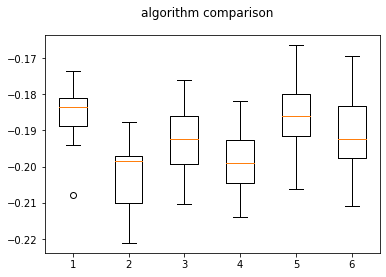

  Description      rmse
0          lr -0.185853
0         knn -0.202729
0          rf -0.192337
0    rf_boost -0.198650
0      gboost -0.186020
0         cbc -0.190691


In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()


linear_models.append(('lr',lr))
linear_models.append(('knn',knn))
non_linear_models.append(('rf',rf))
non_linear_models.append(('rf_boost',rf_boost))
non_linear_models.append(('gboost',gboost))
non_linear_models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [553]:

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr14.csv',index=False)



id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost14.csv',index=False)

id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
cbc.fit(x,y)
y_pred=cbc.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/cbc14.csv',index=False)

Learning rate set to 0.055186
0:	learn: 0.1856558	total: 2.32ms	remaining: 2.31s
1:	learn: 0.1855503	total: 4.79ms	remaining: 2.39s
2:	learn: 0.1854732	total: 7.11ms	remaining: 2.36s
3:	learn: 0.1853735	total: 9.34ms	remaining: 2.32s
4:	learn: 0.1852664	total: 11.9ms	remaining: 2.36s
5:	learn: 0.1851600	total: 14.2ms	remaining: 2.35s
6:	learn: 0.1850539	total: 16.4ms	remaining: 2.32s
7:	learn: 0.1849813	total: 18.6ms	remaining: 2.31s
8:	learn: 0.1848971	total: 20.9ms	remaining: 2.31s
9:	learn: 0.1848142	total: 23.4ms	remaining: 2.31s
10:	learn: 0.1847579	total: 25.7ms	remaining: 2.31s
11:	learn: 0.1846860	total: 28ms	remaining: 2.31s
12:	learn: 0.1846127	total: 30.7ms	remaining: 2.33s
13:	learn: 0.1845448	total: 33.1ms	remaining: 2.33s
14:	learn: 0.1844946	total: 35.5ms	remaining: 2.33s
15:	learn: 0.1843954	total: 37.9ms	remaining: 2.33s
16:	learn: 0.1843157	total: 40.7ms	remaining: 2.35s
17:	learn: 0.1842413	total: 43.2ms	remaining: 2.36s
18:	learn: 0.1841854	total: 46.3ms	remaining: 

185:	learn: 0.1749189	total: 499ms	remaining: 2.18s
186:	learn: 0.1748663	total: 507ms	remaining: 2.2s
187:	learn: 0.1748222	total: 510ms	remaining: 2.2s
188:	learn: 0.1747775	total: 513ms	remaining: 2.2s
189:	learn: 0.1747131	total: 517ms	remaining: 2.2s
190:	learn: 0.1746835	total: 520ms	remaining: 2.2s
191:	learn: 0.1746400	total: 523ms	remaining: 2.2s
192:	learn: 0.1745933	total: 527ms	remaining: 2.2s
193:	learn: 0.1745444	total: 529ms	remaining: 2.2s
194:	learn: 0.1744950	total: 533ms	remaining: 2.2s
195:	learn: 0.1744401	total: 536ms	remaining: 2.2s
196:	learn: 0.1743833	total: 538ms	remaining: 2.19s
197:	learn: 0.1743427	total: 543ms	remaining: 2.2s
198:	learn: 0.1742994	total: 547ms	remaining: 2.2s
199:	learn: 0.1742681	total: 550ms	remaining: 2.2s
200:	learn: 0.1742075	total: 552ms	remaining: 2.19s
201:	learn: 0.1741645	total: 557ms	remaining: 2.2s
202:	learn: 0.1741219	total: 560ms	remaining: 2.2s
203:	learn: 0.1740789	total: 563ms	remaining: 2.19s
204:	learn: 0.1740352	total

376:	learn: 0.1662566	total: 1.17s	remaining: 1.93s
377:	learn: 0.1662194	total: 1.17s	remaining: 1.93s
378:	learn: 0.1661819	total: 1.17s	remaining: 1.92s
379:	learn: 0.1661560	total: 1.18s	remaining: 1.92s
380:	learn: 0.1661366	total: 1.18s	remaining: 1.91s
381:	learn: 0.1661123	total: 1.18s	remaining: 1.91s
382:	learn: 0.1660771	total: 1.18s	remaining: 1.91s
383:	learn: 0.1660648	total: 1.19s	remaining: 1.9s
384:	learn: 0.1660326	total: 1.19s	remaining: 1.9s
385:	learn: 0.1659929	total: 1.19s	remaining: 1.89s
386:	learn: 0.1659626	total: 1.19s	remaining: 1.89s
387:	learn: 0.1659121	total: 1.2s	remaining: 1.89s
388:	learn: 0.1658784	total: 1.2s	remaining: 1.88s
389:	learn: 0.1658264	total: 1.2s	remaining: 1.88s
390:	learn: 0.1657762	total: 1.2s	remaining: 1.87s
391:	learn: 0.1657602	total: 1.2s	remaining: 1.87s
392:	learn: 0.1657188	total: 1.21s	remaining: 1.86s
393:	learn: 0.1656444	total: 1.21s	remaining: 1.86s
394:	learn: 0.1655906	total: 1.21s	remaining: 1.85s
395:	learn: 0.16556

569:	learn: 0.1590419	total: 1.66s	remaining: 1.25s
570:	learn: 0.1590079	total: 1.66s	remaining: 1.25s
571:	learn: 0.1589810	total: 1.66s	remaining: 1.25s
572:	learn: 0.1589609	total: 1.67s	remaining: 1.24s
573:	learn: 0.1589081	total: 1.67s	remaining: 1.24s
574:	learn: 0.1588744	total: 1.67s	remaining: 1.24s
575:	learn: 0.1588361	total: 1.67s	remaining: 1.23s
576:	learn: 0.1587889	total: 1.68s	remaining: 1.23s
577:	learn: 0.1587735	total: 1.68s	remaining: 1.23s
578:	learn: 0.1587438	total: 1.68s	remaining: 1.22s
579:	learn: 0.1587179	total: 1.68s	remaining: 1.22s
580:	learn: 0.1586809	total: 1.69s	remaining: 1.22s
581:	learn: 0.1586607	total: 1.69s	remaining: 1.21s
582:	learn: 0.1586185	total: 1.69s	remaining: 1.21s
583:	learn: 0.1585898	total: 1.69s	remaining: 1.21s
584:	learn: 0.1585609	total: 1.69s	remaining: 1.2s
585:	learn: 0.1585167	total: 1.7s	remaining: 1.2s
586:	learn: 0.1584966	total: 1.7s	remaining: 1.2s
587:	learn: 0.1584522	total: 1.7s	remaining: 1.19s
588:	learn: 0.1584

788:	learn: 0.1520471	total: 2.14s	remaining: 573ms
789:	learn: 0.1520289	total: 2.14s	remaining: 570ms
790:	learn: 0.1520147	total: 2.15s	remaining: 567ms
791:	learn: 0.1519615	total: 2.15s	remaining: 564ms
792:	learn: 0.1519417	total: 2.15s	remaining: 561ms
793:	learn: 0.1519017	total: 2.15s	remaining: 559ms
794:	learn: 0.1518651	total: 2.15s	remaining: 556ms
795:	learn: 0.1518110	total: 2.16s	remaining: 554ms
796:	learn: 0.1517772	total: 2.16s	remaining: 551ms
797:	learn: 0.1517447	total: 2.17s	remaining: 548ms
798:	learn: 0.1517255	total: 2.17s	remaining: 545ms
799:	learn: 0.1516976	total: 2.17s	remaining: 542ms
800:	learn: 0.1516650	total: 2.17s	remaining: 539ms
801:	learn: 0.1516349	total: 2.17s	remaining: 537ms
802:	learn: 0.1516228	total: 2.17s	remaining: 534ms
803:	learn: 0.1516007	total: 2.18s	remaining: 531ms
804:	learn: 0.1515696	total: 2.18s	remaining: 528ms
805:	learn: 0.1515557	total: 2.18s	remaining: 525ms
806:	learn: 0.1515164	total: 2.19s	remaining: 523ms
807:	learn: 

# Hypertuning of the model

In [564]:
train=df_fs[df_fs['train/test']==1]
test=df_fs[df_fs['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

auc_val=[]
for val in range(1,125):
    gboost=GradientBoostingRegressor(n_estimators=val)
    result=cross_val_score(gboost,x,y,scoring='neg_root_mean_squared_error',cv=15)
    auc_val.append(-(np.mean(result)))
    print(val,"--",-(np.mean(result)) )

1 -- 0.1854583152804179
2 -- 0.1854589468189031
3 -- 0.18542928684715604
4 -- 0.18545412729478664
5 -- 0.1854719337844635
6 -- 0.1854961257449557
7 -- 0.18551892417840973
8 -- 0.18554221378355146
9 -- 0.18556140147086603
10 -- 0.18555525805893996
11 -- 0.1855361926308667
12 -- 0.1855740410622346
13 -- 0.18554450043335488
14 -- 0.18555564909340888
15 -- 0.18554127917122815
16 -- 0.18557630975071587
17 -- 0.18559112131844385
18 -- 0.1855807625434205
19 -- 0.18555711503857458
20 -- 0.1855689401072506
21 -- 0.18558592060048965
22 -- 0.18556711580052726
23 -- 0.18558810855253974
24 -- 0.1855998813811363
25 -- 0.18558310382064389
26 -- 0.18553701791423377
27 -- 0.18555590368628092
28 -- 0.18556337708468268
29 -- 0.1855518624350419
30 -- 0.18554599922900003
31 -- 0.18554280702956097
32 -- 0.1855517931993037
33 -- 0.18552815701750666
34 -- 0.1855364156401077
35 -- 0.18553721045063012
36 -- 0.18552634992203995
37 -- 0.18555156890772367
38 -- 0.18557229114979232
39 -- 0.18559600681060912
40 -- 0

In [565]:
print(np.argmin(auc_val))

2


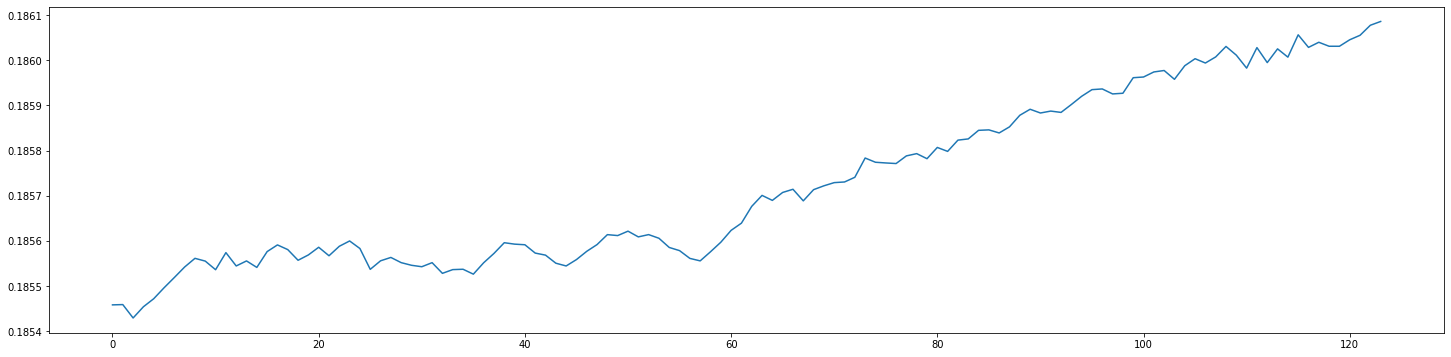

In [566]:
plt.figure(figsize=(25,6))
sns.lineplot(x=range(val),y=auc_val)
plt.show()

In [567]:
sign_df_final=sign_df1[sign_df1['sign']>=0.010609]
sign_df_final


index      sign
0                         growth_rate  0.138547
1                                 Age  0.089545
2                     Time_of_service  0.084779
3                              VAR1_5  0.034431
4                                VAR2  0.031143
5                          Unit_Sales  0.030450
6                              VAR6_6  0.026371
7                   Education_Level_2  0.026095
8                       Unit_Security  0.018784
9                       Pay_Scale_4.0  0.018455
10                             VAR7_2  0.018064
11     Unit_Human Resource Management  0.016446
12                             VAR6_7  0.015926
13                      Travel_Rate_1  0.015224
14                      Pay_Scale_2.0  0.014599
15                      Pay_Scale_9.0  0.014545
16                      Pay_Scale_5.0  0.014381
17                    Unit_Purchasing  0.012787
18              Work_Life_balance_2.0  0.012656
19                      Pay_Scale_3.0  0.011432
20                  Education_Level_4  0.010680
21  Decision_skill_possess_Behavioral  0.010610

In [568]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Attrition_rate')
print(len(list_cols))


24


In [569]:
df_fs=df5[list_cols]
print(df_fs.shape)

(10000, 24)


In [570]:
train=df_fs[df_fs['train/test']==1]
test=df_fs[df_fs['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 22)
y_train shape is  (7000,)
x_test shape is  (3000, 22)


In [573]:
gboost=GradientBoostingRegressor(n_estimators=2)
results=[]
names=[]

kfold=KFold(shuffle=True,n_splits=10,random_state=1)
cv_results=cross_val_score(gboost,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
results.append(cv_results)
names.append(gboost)
print("%s:%f (%f)" % (gboost,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False):-0.185462 (0.000139)


In [574]:
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost=GradientBoostingRegressor(n_estimators=2)
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost_hy.csv',index=False)

# feature transformation

In [578]:
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 24 columns):
growth_rate                          10000 non-null int64
Age                                  10000 non-null float64
Time_of_service                      10000 non-null float64
VAR1_5                               10000 non-null uint8
VAR2                                 10000 non-null float64
Unit_Sales                           10000 non-null uint8
VAR6_6                               10000 non-null uint8
Education_Level_2                    10000 non-null uint8
Unit_Security                        10000 non-null uint8
Pay_Scale_4.0                        10000 non-null uint8
VAR7_2                               10000 non-null uint8
Unit_Human Resource Management       10000 non-null uint8
VAR6_7                               10000 non-null uint8
Travel_Rate_1                        10000 non-null uint8
Pay_Scale_2.0                        10000 non-null uint8
Pay_Scale_9.0   

growth_rate


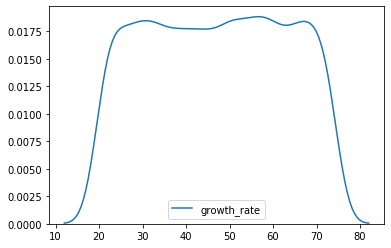


Age


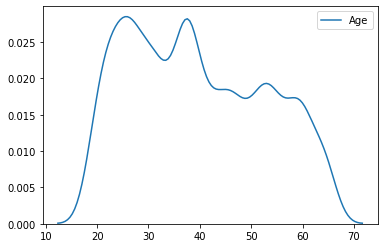


Time_of_service


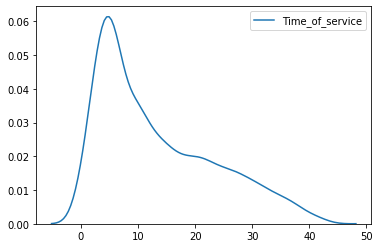


VAR2


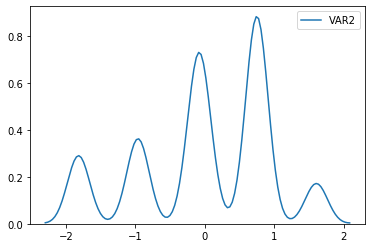

In [579]:
col_lst=["growth_rate","Age",'Time_of_service','VAR2']
for i in col_lst:
    print(i)
    sns.kdeplot(df_fs[i])
    plt.show()
    print()

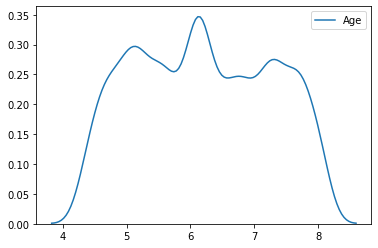

In [590]:
sns.kdeplot(np.sqrt(df_fs['Age']))
plt.show()

## checking possible transformation using box-cox transformations

Below are some common values for lambda

lambda = -1. is a reciprocal transform.
lambda = -0.5 is a reciprocal square root transform.
lambda = 0.0 is a log transform.
lambda = 0.5 is a square root transform.
lambda = 1.0 is no transform.

In [594]:
from scipy.stats import boxcox
col_lst=["growth_rate","Age",'Time_of_service','VAR2']

lam=boxcox(df_fs['growth_rate'])
print(lam[1])

0.7620434258055521


In [ ]:
#no transformation required in this feature.

In [595]:
lam=boxcox(df_fs['Age'])
print(lam[1])

0.3092046609338812


In [ ]:
#we can do square root transformation in "age" feature.

In [612]:
lam=boxcox(df_fs['Time_of_service']+0.00001)
print(lam[1])

0.38858854932882114


In [ ]:
#we can do square root transformation in "Time_of_service" feature.

In [621]:
df_ft=df_fs.copy()

#### feature transformation

In [622]:
df_ft['Age']=np.sqrt(df_ft['Age'])
df_ft['Time_of_service']=np.sqrt(df_ft['Time_of_service'])

In [623]:
train=df_ft[df_ft['train/test']==1]
test=df_ft[df_ft['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

x_test=test.drop(columns=["train/test",'Attrition_rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (7000, 22)
y_train shape is  (7000,)
x_test shape is  (3000, 22)


lr:-0.185865 (0.000094)
gboost:-0.186019 (0.000138)


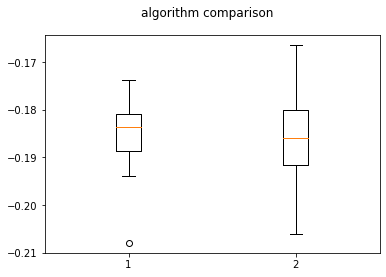

  Description      rmse
0          lr -0.185865
0      gboost -0.186019


In [624]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


non_linear_models=[]
linear_models=[]


lr=LinearRegression()
gboost=GradientBoostingRegressor()


linear_models.append(('lr',lr))
non_linear_models.append(('gboost',gboost))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])


results=[]
names=[]

for name,algo in linear_models:
    kfold=KFold(n_splits=10)
    pipe=Pipeline(steps=[('scaler', StandardScaler()),('regressor', algo)])
    cv_results=cross_val_score(pipe,x,y,cv=kfold,scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)   

for name,algo in non_linear_models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(algo,x,y,cv=kfold,scoring='neg_root_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)
    
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

print(output_result)

In [619]:
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
lr.fit(x,y)
y_pred=lr.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr_ft.csv',index=False)



id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost_ft.csv',index=False)


# hypertuning for gradient boosting

In [625]:
train=df_ft[df_ft['train/test']==1]
test=df_ft[df_ft['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

auc_val=[]
for val in range(1,125):
    gboost=GradientBoostingRegressor(n_estimators=val)
    result=cross_val_score(gboost,x,y,scoring='neg_root_mean_squared_error',cv=15,n_jobs=-1)
    auc_val.append(-(np.mean(result)))
    print(val,"->>",-(np.mean(result)) )

1 ->> 0.1854583152804179
2 ->> 0.1854589468189031
3 ->> 0.18542928684715604
4 ->> 0.18545412729478664
5 ->> 0.1854719337844635
6 ->> 0.1854961257449557
7 ->> 0.18551892417840973
8 ->> 0.1855422137835515
9 ->> 0.18556140147086606
10 ->> 0.18555525805893996
11 ->> 0.1855361926308667
12 ->> 0.1855740410622346
13 ->> 0.18554183767003804
14 ->> 0.1855362078440298
15 ->> 0.18552176805112466
16 ->> 0.18554806614636216
17 ->> 0.18556611712275028
18 ->> 0.1855593115983649
19 ->> 0.18554024566469768
20 ->> 0.18555595069735664
21 ->> 0.1855697807315245
22 ->> 0.18554587172701756
23 ->> 0.18556791122572103
24 ->> 0.18557586704089976
25 ->> 0.18556190096434477
26 ->> 0.18551696301475423
27 ->> 0.18553886170430492
28 ->> 0.1855413259810095
29 ->> 0.1855404728745796
30 ->> 0.18552686167804577
31 ->> 0.18553033932565038
32 ->> 0.1855308604784895
33 ->> 0.18550817999581817
34 ->> 0.18551232317920438
35 ->> 0.185520755911945
36 ->> 0.18549871572953738
37 ->> 0.18551349201152081
38 ->> 0.1855415145190316

In [626]:
print(np.argmin(auc_val))

2


In [627]:
gboost=GradientBoostingRegressor(n_estimators=3)
results=[]
names=[]

kfold=KFold(shuffle=True,n_splits=15,random_state=1)
cv_results=cross_val_score(gboost,x,y,cv=kfold,scoring='neg_root_mean_squared_error',n_jobs=-1) 
results.append(cv_results)
names.append(gboost)
print("%s:%f (%f)" % (gboost,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 15 auc scores. we are taking its average.
output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':np.mean(cv_results)},index=[count])],axis=0)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False):-0.185189 (0.000215)


In [628]:
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")
gboost=GradientBoostingRegressor(n_estimators=3)
gboost.fit(x,y)
y_pred=gboost.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/gboost_ft_hy.csv',index=False)

# regularization for linear regression

In [635]:
train=df_ft[df_ft['train/test']==1]
test=df_ft[df_ft['train/test']==0]
y=train['Attrition_rate']
x=train.drop(columns=['Attrition_rate',"train/test"])

In [640]:
x_test=test.drop(columns=["train/test",'Attrition_rate'])

In [636]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ridge=Ridge()

In [637]:
r_params={'alpha':np.arange(0.01,10,0.01)}

In [638]:
from sklearn.model_selection import GridSearchCV
gs_ridge=GridSearchCV(ridge,param_grid=r_params)
gs_ridge.fit(x,y)
gs_ridge.best_params_

{'alpha': 9.99}

In [639]:
ridge=Ridge(**gs_ridge.best_params_)
ridge.fit(x,y)

Ridge(alpha=9.99, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [642]:
id=pd.read_csv("C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/Dataset/Test.csv")

y_pred=ridge.predict(x_test)
r1=id['Employee_ID']
r2=pd.DataFrame(y_pred,columns=['Attrition_rate'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/Hackerearth_attretion rate_regression/results/lr_ft_ridge.csv',index=False)

